In [2]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()

In [3]:
cursor.execute("select column_name from user_tab_columns where table_name = '반기별구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

['고객번호', 'y14_1', 'y14_2', 'y15_1', 'y15_2', '선매품_1', '선매품_2', '선매품_3', '선매품_4', '편의품_1', '편의품_2', '편의품_3', '편의품_4', '전문품_1', '전문품_2', '전문품_3', '전문품_4', '기타_1', '기타_2', '기타_3', '기타_4']


In [4]:
cursor.execute("select * from 반기별구매액")
x = cursor.fetchall()
df1 = pd.DataFrame(x,columns = col_list)
df1

,고객번호,y14_1,y14_2,y15_1,y15_2,선매품_1,선매품_2,선매품_3,선매품_4,편의품_1,...,편의품_3,편의품_4,전문품_1,전문품_2,전문품_3,전문품_4,기타_1,기타_2,기타_3,기타_4
0,00001,19925355.0,34116312.0,17898365.0,13102518.0,17812110.0,30411510.0,14056600.0,11968620.0,2113245.0,...,3085065.0,1133898.0,NaN,236550.0,756700.0,NaN,NaN,NaN,NaN,NaN
1,00002,24323230.0,21922100.0,27791610.0,25843820.0,18215820.0,17382380.0,22353980.0,22431610.0,6107410.0,...,3893720.0,3412210.0,NaN,434150.0,1543910.0,NaN,NaN,NaN,NaN,NaN
2,00003,851215.0,1042554.0,592280.0,679118.0,80000.0,26900.0,NaN,7800.0,771215.0,...,592280.0,671318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00004,5042106.0,4257510.0,3656937.0,3737257.0,3309520.0,3244440.0,1748730.0,1939080.0,1732586.0,...,1908207.0,1628177.0,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN
4,00005,5460150.0,2225730.0,2934930.0,2616260.0,2054230.0,1105100.0,1902610.0,1423650.0,3348920.0,...,1032320.0,1192610.0,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,NaN,1190620.0,2395920.0,2192740.0,NaN,449900.0,742600.0,394680.0,NaN,...,1653320.0,1439010.0,NaN,NaN,NaN,359050.0,NaN,NaN,NaN,NaN
19379,19380,NaN,522700.0,837950.0,2552327.0,NaN,9900.0,47000.0,140990.0,NaN,...,790950.0,2411337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,NaN,2797171.0,3243498.0,NaN,NaN,564700.0,612000.0,NaN,...,2232471.0,2631498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19381,19382,NaN,NaN,1826739.0,2575034.0,NaN,NaN,183600.0,263800.0,NaN,...,1643139.0,2311234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1['label_14'] = df1.y15_2 - df1.y14_1*1.126
df1['label_14'] = np.where(df1.label_14>0,0,1)
df111 = df1[['고객번호','y14_1','y14_2','y15_1','선매품_1','선매품_2','선매품_3','편의품_1','편의품_2','편의품_3','전문품_1','전문품_2','전문품_3','기타_1','기타_2','기타_3','label_14']]
df111.fillna(0,inplace=True)
df111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,고객번호,y14_1,y14_2,y15_1,선매품_1,선매품_2,선매품_3,편의품_1,편의품_2,편의품_3,전문품_1,전문품_2,전문품_3,기타_1,기타_2,기타_3,label_14
0,00001,19925355.0,34116312.0,17898365.0,17812110.0,30411510.0,14056600.0,2113245.0,3468252.0,3085065.0,0.0,236550.0,756700.0,0.0,0.0,0.0,1
1,00002,24323230.0,21922100.0,27791610.0,18215820.0,17382380.0,22353980.0,6107410.0,4105570.0,3893720.0,0.0,434150.0,1543910.0,0.0,0.0,0.0,1
2,00003,851215.0,1042554.0,592280.0,80000.0,26900.0,0.0,771215.0,1015654.0,592280.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,00004,5042106.0,4257510.0,3656937.0,3309520.0,3244440.0,1748730.0,1732586.0,1013070.0,1908207.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,00005,5460150.0,2225730.0,2934930.0,2054230.0,1105100.0,1902610.0,3348920.0,1120630.0,1032320.0,57000.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,0.0,449900.0,742600.0,0.0,740720.0,1653320.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19379,19380,0.0,522700.0,837950.0,0.0,9900.0,47000.0,0.0,512800.0,790950.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19380,19381,0.0,0.0,2797171.0,0.0,0.0,564700.0,0.0,0.0,2232471.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19381,19382,0.0,0.0,1826739.0,0.0,0.0,183600.0,0.0,0.0,1643139.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [6]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      19383 non-null  object 
 1   y14_1     19383 non-null  float64
 2   y14_2     19383 non-null  float64
 3   y15_1     19383 non-null  float64
 4   선매품_1     19383 non-null  float64
 5   선매품_2     19383 non-null  float64
 6   선매품_3     19383 non-null  float64
 7   편의품_1     19383 non-null  float64
 8   편의품_2     19383 non-null  float64
 9   편의품_3     19383 non-null  float64
 10  전문품_1     19383 non-null  float64
 11  전문품_2     19383 non-null  float64
 12  전문품_3     19383 non-null  float64
 13  기타_1      19383 non-null  float64
 14  기타_2      19383 non-null  float64
 15  기타_3      19383 non-null  float64
 16  label_14  19383 non-null  int32  
dtypes: float64(15), int32(1), object(1)
memory usage: 2.4+ MB


In [7]:
col_list = list(df111.iloc[:,1:16].columns)
for col in col_list:
    q1 = np.percentile(df111[col],10)
    q2 = np.percentile(df111[col],20)
    q3 = np.percentile(df111[col],30)
    q4 = np.percentile(df111[col],40)
    q5 = np.percentile(df111[col],50)
    q6 = np.percentile(df111[col],60)
    q7 = np.percentile(df111[col],70)
    q8 = np.percentile(df111[col],80)
    q9 = np.percentile(df111[col],90)
    df111.loc[(df111[col]>0)&(df111[col]<q1),col] = 1
    df111.loc[(df111[col]>0)&(df111[col]>=q1)&(df111[col]<q2),col] = 2
    df111.loc[(df111[col]>0)&(df111[col]>=q2)&(df111[col]<q3),col] = 3
    df111.loc[(df111[col]>0)&(df111[col]>=q3)&(df111[col]<q4),col] = 4
    df111.loc[(df111[col]>0)&(df111[col]>=q4)&(df111[col]<q5),col] = 5
    df111.loc[(df111[col]>0)&(df111[col]>=q5)&(df111[col]<q6),col] = 6
    df111.loc[(df111[col]>0)&(df111[col]>=q6)&(df111[col]<q7),col] = 7
    df111.loc[(df111[col]>0)&(df111[col]>=q7)&(df111[col]<q8),col] = 8
    df111.loc[(df111[col]>0)&(df111[col]>=q8)&(df111[col]<q9),col] = 9
    df111.loc[(df111[col]>0)&(df111[col]>=q9),col] = 10
    
prod_list = ['선매품','편의품','전문품','기타']    
for prod in prod_list:
    df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']
    df111[f'{prod}_등급변동2'] = df111[f'{prod}_3'] - df111[f'{prod}_2']

    df111[f'{prod}_구매지수'] = 0.8 * (df111[f'{prod}_등급변동1']+df111[f'{prod}_등급변동2']) + 0.2 * (df111[f'{prod}_등급변동1'].apply(lambda x: abs(x))+ df111[f'{prod}_등급변동2'].apply(lambda x: abs(x)))
df111['총구매_등급변동1'] = df111['y14_2'] - df111['y14_1']
df111['총구매_등급변동2'] = df111['y15_1'] - df111['y14_2']

df111['총구매지수'] = 0.8 *(df111['총구매_등급변동1']+df111['총구매_등급변동2']) + 0.2 *(df111['총구매_등급변동1'].apply(lambda x: abs(x)) + df111['총구매_등급변동2'].apply(lambda x: abs(x)))
    
df111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Master\AppData\Local\Temp\ipykernel_10624\2287045813.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']
C:\Users\Master\AppData\Local\Temp\ipykernel_10624\2287045813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,고객번호,y14_1,y14_2,y15_1,선매품_1,선매품_2,선매품_3,편의품_1,편의품_2,편의품_3,...,편의품_구매지수,전문품_등급변동1,전문품_등급변동2,전문품_구매지수,기타_등급변동1,기타_등급변동2,기타_구매지수,총구매_등급변동1,총구매_등급변동2,총구매지수
0,00001,10.0,10.0,9.0,10.0,10.0,10.0,6.0,9.0,8.0,...,2.4,8.0,1.0,9.0,0.0,0.0,0.0,0.0,-1.0,-0.6
1,00002,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,...,-0.6,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00003,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,...,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004,7.0,5.0,5.0,7.0,7.0,6.0,5.0,2.0,4.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-1.2
4,00005,7.0,2.0,3.0,6.0,5.0,6.0,9.0,2.0,2.0,...,-4.2,-8.0,0.0,-4.8,0.0,0.0,0.0,-5.0,1.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1.0,2.0,0.0,4.0,4.0,0.0,1.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
19379,19380,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19380,19381,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,6.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
19381,19382,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [8]:
df1111 = df111[['고객번호','총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수','label_14']]
df1111.고객번호 = df1111.고객번호.astype(int)
df1111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14
0,1,-0.6,0.0,2.4,9.0,0.0,1
1,2,0.0,0.0,-0.6,9.0,0.0,1
2,3,0.0,-1.2,-0.6,0.0,0.0,1
3,4,-1.2,-0.6,0.2,0.0,0.0,1
4,5,-2.0,0.4,-4.2,-4.8,0.0,1
...,...,...,...,...,...,...,...
19378,19379,2.0,4.0,3.0,0.0,0.0,1
19379,19380,1.0,1.0,1.0,0.0,0.0,1
19380,19381,3.0,4.0,6.0,0.0,0.0,1
19381,19382,2.0,2.0,3.0,0.0,0.0,1


In [9]:
cursor.execute("select column_name from user_tab_columns where table_name = '제휴사별반기구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from 제휴사별반기구매액")
x = cursor.fetchall()
df1234 = pd.DataFrame(x,columns = col_list)
df1234.고객번호 = df1234.고객번호.astype(int)
df1234.fillna(0,inplace=True)
df1234

['고객번호', 'A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'B_4', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'D_4']


,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,C_2,C_3,C_4,D_1,D_2,D_3,D_4
0,1,19703210.0,33340300.0,17382750.0,12800890.0,21800.0,376140.0,208136.0,184900.0,200345.0,399872.0,307479.0,116728.0,0.0,0.0,0.0,0.0
1,2,24292730.0,21875650.0,27486650.0,25799820.0,30500.0,46450.0,132500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172460.0,44000.0
2,3,80000.0,0.0,0.0,0.0,0.0,6960.0,0.0,0.0,771215.0,1035594.0,592280.0,679118.0,0.0,0.0,0.0,0.0
3,4,4628260.0,3711520.0,3170780.0,2764050.0,80060.0,420740.0,333864.0,759402.0,333786.0,125250.0,152293.0,213805.0,0.0,0.0,0.0,0.0
4,5,5444150.0,2225730.0,2917380.0,2586960.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17550.0,29300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,469900.0,699820.0,840300.0,0.0,0.0,203290.0,97690.0,0.0,0.0,54570.0,0.0,0.0,720720.0,1438240.0,1254750.0
19379,19380,0.0,0.0,0.0,52300.0,0.0,0.0,30280.0,30000.0,0.0,0.0,0.0,146837.0,0.0,522700.0,807670.0,2323190.0
19380,19381,0.0,0.0,326100.0,76500.0,0.0,0.0,2471071.0,3143508.0,0.0,0.0,0.0,23490.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,175100.0,0.0,0.0,0.0,1651639.0,2567044.0,0.0,0.0,0.0,7990.0,0.0,0.0,0.0,0.0


In [10]:
col_list = list(df1234.iloc[:,1:].columns)
for col in col_list:
    q1 = np.percentile(df1234[col],10)
    q2 = np.percentile(df1234[col],20)
    q3 = np.percentile(df1234[col],30)
    q4 = np.percentile(df1234[col],40)
    q5 = np.percentile(df1234[col],50)
    q6 = np.percentile(df1234[col],60)
    q7 = np.percentile(df1234[col],70)
    q8 = np.percentile(df1234[col],80)
    q9 = np.percentile(df1234[col],90)
    df1234.loc[(df1234[col]>0)&(df1234[col]<q1),col] = 1
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q1)&(df1234[col]<q2),col] = 2
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q2)&(df1234[col]<q3),col] = 3
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q3)&(df1234[col]<q4),col] = 4
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q4)&(df1234[col]<q5),col] = 5
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q5)&(df1234[col]<q6),col] = 6
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q6)&(df1234[col]<q7),col] = 7
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q7)&(df1234[col]<q8),col] = 8
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q8)&(df1234[col]<q9),col] = 9
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q9),col] = 10
    
    
com_list = ['A','B','C','D']

for prod in com_list:
    df1234[f'{prod}_등급변동1'] = df1234[f'{prod}_2'] - df1234[f'{prod}_1']
    df1234[f'{prod}_등급변동2'] = df1234[f'{prod}_3'] - df1234[f'{prod}_2']

    df1234[f'{prod}_구매지수'] = 0.8 * (df1234[f'{prod}_등급변동1']+df1234[f'{prod}_등급변동2']) + 0.2 * (df1234[f'{prod}_등급변동1'].apply(lambda x: abs(x))+df1234[f'{prod}_등급변동2'].apply(lambda x: abs(x)))
df1234

,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,...,A_구매지수,B_등급변동1,B_등급변동2,B_구매지수,C_등급변동1,C_등급변동2,C_구매지수,D_등급변동1,D_등급변동2,D_구매지수
0,1,10.0,10.0,9.0,9.0,3.0,5.0,4.0,4.0,8.0,...,-0.6,2.0,-1.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10.0,10.0,10.0,10.0,3.0,3.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0
2,3,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,...,-1.8,2.0,-2.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
3,4,7.0,7.0,7.0,6.0,4.0,5.0,5.0,6.0,8.0,...,0.0,1.0,0.0,1.0,-1.0,0.0,-0.6,0.0,0.0,0.0
4,5,7.0,6.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,...,-0.6,-3.0,0.0,-1.8,0.0,0.0,0.0,0.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,5.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,...,5.0,0.0,4.0,4.0,0.0,7.0,7.0,10.0,0.0,10.0
19379,19380,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,...,0.0,0.0,3.0,3.0,0.0,0.0,0.0,10.0,0.0,10.0
19380,19381,0.0,0.0,4.0,3.0,0.0,0.0,8.0,9.0,0.0,...,4.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,4.0,0.0,0.0,0.0,7.0,8.0,0.0,...,4.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df11111 = pd.merge(df1111,df1234[['고객번호','A_구매지수','B_구매지수','C_구매지수','D_구매지수']],how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,0.0
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,10.0
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,0.0
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,0.0
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,10.0
19379,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,10.0
19380,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,0.0
19381,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,0.0


In [12]:
df1001 = pd.read_csv('df.csv',index_col = 0)
df1001.columns = ['고객번호','선매품_횟수_1','선매품_횟수_2','선매품_횟수_3','선매품_횟수_4']
df1001['선매품_횟수변동'] = df1001['선매품_횟수_3'] - df1001['선매품_횟수_1']


df1002 = pd.read_csv('df1.csv',index_col = 0)
df1002.columns = ['고객번호','편의품_횟수_1','편의품_횟수_2','편의품_횟수_3','편의품_횟수_4']
df1002['편의품_횟수변동'] = df1002['편의품_횟수_3'] - df1002['편의품_횟수_1']

df1003 = pd.read_csv('df2.csv',index_col = 0)
df1003.columns = ['고객번호','전문품_횟수_1','전문품_횟수_2','전문품_횟수_3','전문품_횟수_4']
df1003['전문품_횟수변동'] = df1003['전문품_횟수_3'] - df1003['전문품_횟수_1']

df1004 = pd.read_csv('df3.csv',index_col = 0)
df1004.columns = ['고객번호','기타_횟수_1','기타_횟수_2','기타_횟수_3','기타_횟수_4']
df1004['기타_횟수변동'] = df1004['기타_횟수_3'] - df1004['기타_횟수_1']

df11111['총구매횟수변동'] = df1001['선매품_횟수변동'] + df1002['편의품_횟수변동'] + df1003['전문품_횟수변동'] + df1004['기타_횟수변동']

df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,0.0,66
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,10.0,-54
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,0.0,-107
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,0.0,-29
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,10.0,-194
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,10.0,200
19379,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,10.0,95
19380,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,0.0,291
19381,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,0.0,321


In [13]:
cursor.execute("select 고객번호, to_date('2015-07-01','YYYY-MM-DD') - to_date(max(구매일자),'YYYY-MM-DD')  as recency_1 from purprod where 구매일자 <20150701 group by 고객번호 order by 고객번호")
x = cursor.fetchall()
df144 = pd.DataFrame(x,columns = ['고객번호','RECENCY'])
df144.고객번호 = df144.고객번호.astype(int)
df144

,고객번호,RECENCY
0,1,4
1,2,7
2,3,2
3,4,1
4,5,41
...,...,...
19367,19379,1
19368,19380,1
19369,19381,2
19370,19382,1


In [16]:
df11111 = pd.merge(df11111,df144,how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,RECENCY
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,0.0,7,4
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,10.0,5,7
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,0.0,5,2
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,0.0,5,1
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,10.0,5,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,10.0,10,1
19368,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,10.0,8,1
19369,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,0.0,10,2
19370,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,0.0,10,1


In [17]:
col_list = ['총구매횟수변동']
for col in col_list:
    q1 = np.percentile(df11111[col],10)
    q2 = np.percentile(df11111[col],20)
    q3 = np.percentile(df11111[col],30)
    q4 = np.percentile(df11111[col],40)
    q5 = np.percentile(df11111[col],50)
    q6 = np.percentile(df11111[col],60)
    q7 = np.percentile(df11111[col],70)
    q8 = np.percentile(df11111[col],80)
    q9 = np.percentile(df11111[col],90)
    df11111.loc[(df11111[col]<q1),col] = 1
    df11111.loc[(df11111[col]>=q1)&(df11111[col]<q2),col] = 2
    df11111.loc[(df11111[col]>=q2)&(df11111[col]<q3),col] = 3
    df11111.loc[(df11111[col]>=q3)&(df11111[col]<q4),col] = 4
    df11111.loc[(df11111[col]>=q4)&(df11111[col]<q5),col] = 5
    df11111.loc[(df11111[col]>=q5)&(df11111[col]<q6),col] = 6
    df11111.loc[(df11111[col]>=q6)&(df11111[col]<q7),col] = 7
    df11111.loc[(df11111[col]>=q7)&(df11111[col]<q8),col] = 8
    df11111.loc[(df11111[col]>=q8)&(df11111[col]<q9),col] = 9
    df11111.loc[(df11111[col]>=q9),col] = 10
    
    print(q1,q2,q3,q4,q5,q6,q7,q8,q9)
    
df11111

5.0 5.0 5.0 5.0 6.0 7.0 8.0 9.0 10.0


,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,RECENCY
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,0.0,7,4
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,10.0,5,7
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,0.0,5,2
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,0.0,5,1
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,10.0,5,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,10.0,10,1
19368,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,10.0,8,1
19369,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,0.0,10,2
19370,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,0.0,10,1


In [18]:
cursor.execute("select column_name from user_tab_columns where table_name = '공통분류별반기구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from 공통분류별반기구매액")
x = cursor.fetchall()
df10789 = pd.DataFrame(x,columns = col_list)
df10789.fillna(0,inplace=True)
df10789.고객번호 = df10789.고객번호.astype(int)
df10789

['고객번호', '가공식품_1', '가공식품_2', '가공식품_3', '가공식품_4', '신선식품_1', '신선식품_2', '신선식품_3', '신선식품_4', '일상용품_1', '일상용품_2', '일상용품_3', '일상용품_4', '의류_1', '의류_2', '의류_3', '의류_4', '패션잡화_1', '패션잡화_2', '패션잡화_3', '패션잡화_4', '전문스포츠/레저_1', '전문스포츠/레저_2', '전문스포츠/레저_3', '전문스포츠/레저_4', '디지털/가전_1', '디지털/가전_2', '디지털/가전_3', '디지털/가전_4', '교육/문화용품_1', '교육/문화용품_2', '교육/문화용품_3', '교육/문화용품_4', '가구/인테리어_1', '가구/인테리어_2', '가구/인테리어_3', '가구/인테리어_4', '시설_1', '시설_2', '시설_3', '시설_4', '의약품/의료기기_1', '의약품/의료기기_2', '의약품/의료기기_3', '의약품/의료기기_4']


,고객번호,가공식품_1,가공식품_2,가공식품_3,가공식품_4,신선식품_1,신선식품_2,신선식품_3,신선식품_4,일상용품_1,...,가구/인테리어_3,가구/인테리어_4,시설_1,시설_2,시설_3,시설_4,의약품/의료기기_1,의약품/의료기기_2,의약품/의료기기_3,의약품/의료기기_4
0,1,3677680.0,1839680.0,1783020.0,782980.0,1091325.0,1281092.0,1097665.0,352858.0,1739210.0,...,900430.0,836950.0,0.0,0.0,0.0,67700.0,0.0,0.0,17800.0,0.0
1,2,1768030.0,1414850.0,676860.0,1166000.0,3586000.0,2264920.0,2166870.0,1920330.0,8059210.0,...,1991970.0,1322320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,489440.0,588460.0,318970.0,326860.0,218015.0,301234.0,177060.0,266508.0,22950.0,...,0.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,970440.0,599830.0,1036594.0,1032549.0,632466.0,258080.0,747713.0,442458.0,131630.0,...,29000.0,127700.0,0.0,0.0,0.0,0.0,20320.0,0.0,0.0,10160.0
4,5,2348240.0,1088700.0,1701140.0,1528290.0,947820.0,337680.0,287790.0,170630.0,1280940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,127740.0,202220.0,279770.0,0.0,0.0,33060.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500.0,27900.0,29450.0
19379,19380,0.0,16800.0,166120.0,390800.0,0.0,0.0,0.0,78047.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11680.0,3500.0
19380,19381,0.0,0.0,907150.0,1465700.0,0.0,0.0,1120126.0,1125908.0,0.0,...,100775.0,30410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,848340.0,1290050.0,0.0,0.0,583379.0,837924.0,0.0,...,25270.0,77790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
col_list = df10789.iloc[:,1:].columns
for col in col_list:
    q1 = np.percentile(df10789[col],10)
    q2 = np.percentile(df10789[col],20)
    q3 = np.percentile(df10789[col],30)
    q4 = np.percentile(df10789[col],40)
    q5 = np.percentile(df10789[col],50)
    q6 = np.percentile(df10789[col],60)
    q7 = np.percentile(df10789[col],70)
    q8 = np.percentile(df10789[col],80)
    q9 = np.percentile(df10789[col],90)
    df10789.loc[(df10789[col]>0)&(df10789[col]<q1),col] = 1
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q1)&(df10789[col]<q2),col] = 2
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q2)&(df10789[col]<q3),col] = 3
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q3)&(df10789[col]<q4),col] = 4
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q4)&(df10789[col]<q5),col] = 5
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q5)&(df10789[col]<q6),col] = 6
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q6)&(df10789[col]<q7),col] = 7
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q7)&(df10789[col]<q8),col] = 8
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q8)&(df10789[col]<q9),col] = 9
    df10789.loc[(df10789[col]>0)&(df10789[col]>=q9),col] = 10
    
prod_list = ['가공식품','신선식품','일상용품','의류','패션잡화','전문스포츠/레저','디지털/가전','교육/문화용품','가구/인테리어','시설','의약품/의료기기']    
for prod in prod_list:
    df10789[f'{prod}_등급변동1'] = df10789[f'{prod}_2'] - df10789[f'{prod}_1']
    df10789[f'{prod}_등급변동2'] = df10789[f'{prod}_3'] - df10789[f'{prod}_2']

    df10789[f'{prod}_구매지수'] = 0.8 * (df10789[f'{prod}_등급변동1'] + df10789[f'{prod}_등급변동2']) + 0.2 * (df10789[f'{prod}_등급변동1'].apply(lambda x: abs(x)) + df10789[f'{prod}_등급변동2'].apply(lambda x: abs(x)))
    
df10789

,고객번호,가공식품_1,가공식품_2,가공식품_3,가공식품_4,신선식품_1,신선식품_2,신선식품_3,신선식품_4,일상용품_1,...,교육/문화용품_구매지수,가구/인테리어_등급변동1,가구/인테리어_등급변동2,가구/인테리어_구매지수,시설_등급변동1,시설_등급변동2,시설_구매지수,의약품/의료기기_등급변동1,의약품/의료기기_등급변동2,의약품/의료기기_구매지수
0,1,10.0,9.0,9.0,4.0,8.0,9.0,8.0,3.0,10.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0
1,2,9.0,8.0,3.0,6.0,10.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,2.0,...,0.0,3.0,-4.0,0.6,0.0,0.0,0.0,-10.0,0.0,-6.0
4,5,10.0,6.0,9.0,8.0,8.0,3.0,2.0,2.0,9.0,...,0.0,3.0,-8.0,-1.8,0.0,0.0,0.0,0.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
19379,19380,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
19380,19381,0.0,0.0,5.0,8.0,0.0,0.0,8.0,8.0,0.0,...,5.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,4.0,7.0,0.0,0.0,5.0,7.0,0.0,...,6.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df11111 = pd.merge(df11111,df10789[['고객번호','가공식품_구매지수','신선식품_구매지수','일상용품_구매지수','의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수','디지털/가전_구매지수','교육/문화용품_구매지수','가구/인테리어_구매지수','시설_구매지수','의약품/의료기기_구매지수']],how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,...,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,...,0.4,-1.8,0.0,0.0,2.0,9.4,0.0,1.0,0.0,10.0
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,...,0.4,0.0,-1.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,...,1.6,3.2,-0.6,-1.8,-1.8,3.0,0.0,0.6,0.0,-6.0
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,...,-3.6,-0.6,0.8,-3.6,-3.0,-3.0,0.0,-1.8,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,...,1.0,9.0,5.0,6.4,0.0,5.0,0.0,0.0,0.0,10.0
19368,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,...,0.0,7.0,0.0,3.0,0.0,6.0,2.0,0.0,0.0,9.0
19369,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,...,8.0,2.0,5.0,4.0,4.0,0.0,5.0,7.0,0.0,0.0
19370,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,...,5.0,2.0,2.0,3.0,5.0,0.0,6.0,5.0,0.0,0.0


In [21]:
cursor.execute("select column_name from user_tab_columns where table_name = 'CUSTDEMO'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from custdemo order by 고객번호")
x = cursor.fetchall()
df122 = pd.DataFrame(x,columns = col_list)
df1222 = df122[['고객번호','성별','연령대','거주지역']]
df1222.고객번호 = df1222.고객번호.astype(int)
df1222.거주지역 = df1222.거주지역.astype(float)
df1222
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1222.성별 = le.fit_transform(df1222.성별)
df1222.연령대 = le.fit_transform(df1222.연령대)

def region_cat(x):
    cat = ''
    if x >= 10 and x < 100:
        cat = '서울'
    elif x>=100 and x < 210:
        cat = '경기'
    elif x>=210 and x < 240:
        cat = '인천'
    elif x>=240 and x < 270:
        cat = '강원'
    elif x>=270 and x < 300:
        cat = '충북'
    elif x>300 and x <310:
        cat = '세종'
    elif x>=310 and x<340:
        cat = '충남'
    elif x>=340 and x<360:
        cat = '대전'
    elif x>=360 and x<410:
        cat = '경북'
    elif x>=410 and x<440:
        cat = '대구'
    elif x>=440 and x<460:
        cat = '울산'
    elif x>=460 and x<500:
        cat = '부산'
    elif x>=500 and x<540:
        cat = '경남'
    elif x>=540 and x<570:
        cat = '전북'
    elif x>=570 and x<610:
        cat = '전남'
    elif x>=610 and x<630:
        cat = '광주'
    elif x>=630 and x<640:
        cat = '제주'
    return cat

df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))
df1222.거주지역 = le.fit_transform(df1222.거주지역)
df1222

['고객번호', '성별', '연령대', '거주지역', '14년도_상반기', '14년도_하반기', '15년도_상반기', '15년도_하반기', '14년도_상반기_구매액', '14년도_하반기_구매액', '15년도_상반기_구매액', '15년도_하반기_구매액']


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Master\AppData\Local\Temp\ipykernel_10624\1382970817.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))


,고객번호,성별,연령대,거주지역
0,1,1,9,9
1,2,1,9,2
2,3,1,9,9
3,4,0,9,9
4,5,1,9,2
...,...,...,...,...
19378,19379,0,1,9
19379,19380,0,1,9
19380,19381,0,5,8
19381,19382,0,6,8


In [22]:
df11111 = pd.merge(df11111,df1222,how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,...,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,교육/문화용품_구매지수,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,성별,연령대,거주지역
0,1,-0.6,0.0,2.4,9.0,0.0,1,-0.6,1.4,0.0,...,0.0,2.0,9.4,0.0,1.0,0.0,10.0,1,9,9
1,2,0.0,0.0,-0.6,9.0,0.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9,2
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,0.8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,9,9
3,4,-1.2,-0.6,0.2,0.0,0.0,1,0.0,1.0,-0.6,...,-1.8,-1.8,3.0,0.0,0.6,0.0,-6.0,0,9,9
4,5,-2.0,0.4,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,...,-3.6,-3.0,-3.0,0.0,-1.8,0.0,9.0,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,1,5.0,4.0,7.0,...,6.4,0.0,5.0,0.0,0.0,0.0,10.0,0,1,9
19368,19380,1.0,1.0,1.0,0.0,0.0,1,0.0,3.0,0.0,...,3.0,0.0,6.0,2.0,0.0,0.0,9.0,0,1,9
19369,19381,3.0,4.0,6.0,0.0,0.0,1,4.0,8.0,0.0,...,4.0,4.0,0.0,5.0,7.0,0.0,0.0,0,5,8
19370,19382,2.0,2.0,3.0,0.0,0.0,1,4.0,7.0,0.0,...,3.0,5.0,0.0,6.0,5.0,0.0,0.0,0,6,8


In [23]:
df11111['label'] = df11111['label_14']

In [24]:
df1415 = pd.read_csv('PROD12.csv',index_col=0)
df1415.columns = ['고객번호','성장률_15_1']
df1415.fillna(0,inplace=True)
df1415

,고객번호,성장률_15_1
0,1,-10.0
1,2,14.0
2,3,-30.0
3,4,-27.0
4,5,-46.0
...,...,...
19378,19379,0.0
19379,19380,0.0
19380,19381,0.0
19381,19382,0.0


In [25]:
df11111 = pd.merge(df11111,df1415[['고객번호','성장률_15_1']],how = 'inner',on='고객번호')
df11111['성장률'] = df11111['성장률_15_1']

In [26]:
df111111 = df11111[['고객번호','총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수',
                    'A_구매지수','B_구매지수','C_구매지수','D_구매지수',
                    '가공식품_구매지수','신선식품_구매지수','일상용품_구매지수','의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수','디지털/가전_구매지수','교육/문화용품_구매지수','가구/인테리어_구매지수','시설_구매지수','의약품/의료기기_구매지수',
                   '총구매횟수변동','성별','연령대','거주지역','RECENCY','성장률','label']]
df111111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,...,가구/인테리어_구매지수,시설_구매지수,의약품/의료기기_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label
0,1,-0.6,0.0,2.4,9.0,0.0,-0.6,1.4,0.0,0.0,...,1.0,0.0,10.0,7,1,9,9,4,-10.0,1
1,2,0.0,0.0,-0.6,9.0,0.0,0.0,1.0,0.0,10.0,...,0.0,0.0,0.0,5,1,9,2,7,14.0,1
2,3,0.0,-1.2,-0.6,0.0,0.0,-1.8,0.8,0.0,0.0,...,0.0,0.0,0.0,5,1,9,9,2,-30.0,1
3,4,-1.2,-0.6,0.2,0.0,0.0,0.0,1.0,-0.6,0.0,...,0.6,0.0,-6.0,5,0,9,9,1,-27.0,1
4,5,-2.0,0.4,-4.2,-4.8,0.0,-0.6,-1.8,0.0,10.0,...,-1.8,0.0,9.0,5,1,9,2,41,-46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.0,4.0,3.0,0.0,0.0,5.0,4.0,7.0,10.0,...,0.0,0.0,10.0,10,0,1,9,1,0.0,1
19368,19380,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,10.0,...,0.0,0.0,9.0,8,0,1,9,1,0.0,1
19369,19381,3.0,4.0,6.0,0.0,0.0,4.0,8.0,0.0,0.0,...,7.0,0.0,0.0,10,0,5,8,2,0.0,1
19370,19382,2.0,2.0,3.0,0.0,0.0,4.0,7.0,0.0,0.0,...,5.0,0.0,0.0,10,0,6,8,1,0.0,1


In [27]:
df111111.to_csv('test.csv')

<AxesSubplot:>

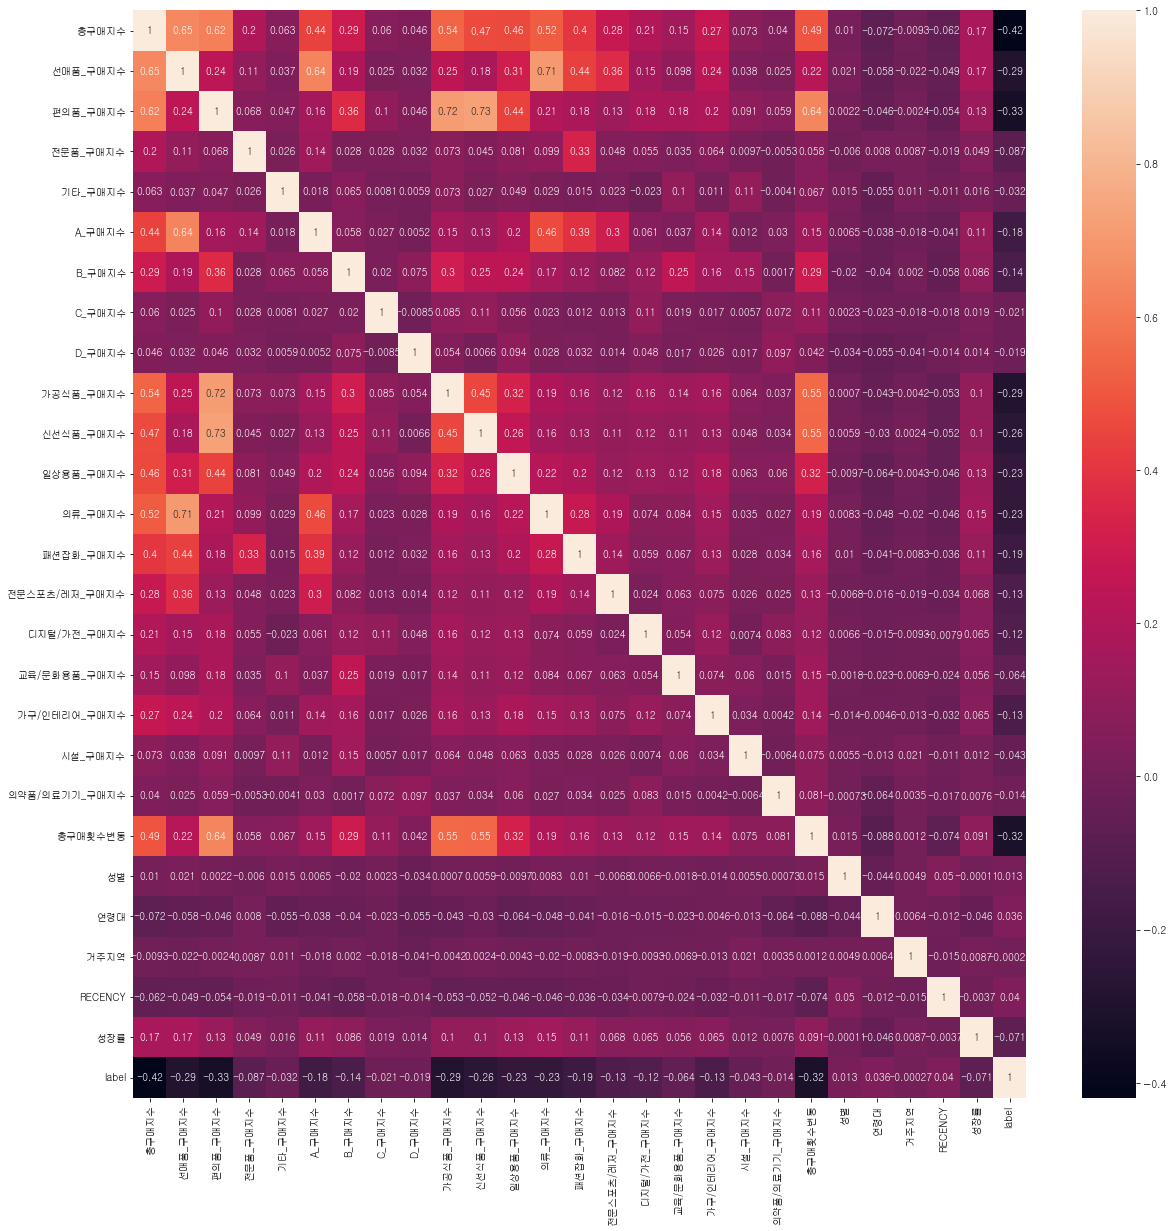

In [159]:
plt.figure(figsize = (20,20))
sns.heatmap(df111111.corr(),annot=True)

In [160]:
# df111112 = df11111[['총구매지수','선매품_구매지수','편의품_구매지수',
#                     'A_구매지수','B_구매지수',
#                     '가공식품_구매지수','신선식품_구매지수','일상용품_구매지수',
#                     '의류_구매지수','패션잡화_구매지수','전문스포츠/레저_구매지수',
#                     '디지털/가전_구매지수','가구/인테리어_구매지수','성장률',
#                     'label']]
# df111112

,총구매지수,선매품_구매지수,편의품_구매지수,A_구매지수,B_구매지수,가공식품_구매지수,신선식품_구매지수,일상용품_구매지수,의류_구매지수,패션잡화_구매지수,전문스포츠/레저_구매지수,디지털/가전_구매지수,가구/인테리어_구매지수,성장률,label
0,-0.6,0.0,2.4,-0.6,1.4,-0.6,0.4,-1.8,0.0,0.0,2.0,9.4,1.0,-10.0,1
1,0.0,0.0,-0.6,0.0,1.0,-3.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,1
2,0.0,-1.2,-0.6,-1.8,0.8,-0.6,0.4,0.0,-1.8,0.0,0.0,1.0,0.0,-30.0,1
3,-1.2,-0.6,0.2,0.0,1.0,1.6,1.6,3.2,-0.6,-1.8,-1.8,3.0,0.6,-27.0,1
4,-2.0,0.4,-4.2,-0.6,-1.8,0.6,-3.6,-0.6,0.8,-3.6,-3.0,-3.0,-1.8,-46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,2.0,4.0,3.0,5.0,4.0,1.0,1.0,9.0,5.0,6.4,0.0,5.0,0.0,0.0,1
19368,1.0,1.0,1.0,0.0,3.0,1.0,0.0,7.0,0.0,3.0,0.0,6.0,0.0,0.0,1
19369,3.0,4.0,6.0,4.0,8.0,5.0,8.0,2.0,5.0,4.0,4.0,0.0,7.0,0.0,1
19370,2.0,2.0,3.0,4.0,7.0,4.0,5.0,2.0,2.0,3.0,5.0,0.0,5.0,0.0,1


In [161]:
# df111112.to_csv('test2.csv')

In [71]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
y, X = dmatrices('label ~  총구매지수 + 선매품_구매지수 + 편의품_구매지수 + 전문품_구매지수 + 기타_구매지수 + A_구매지수 + B_구매지수 + C_구매지수 + D_구매지수 + 총구매횟수변동 + 성별 + 연령대 + 거주지역 + RECENCY + 성장률',
                 df111111, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,35.473542,Intercept
1,2.940238,총구매지수
2,2.482443,선매품_구매지수
3,2.327129,편의품_구매지수
4,1.056852,전문품_구매지수
5,1.011388,기타_구매지수
6,1.689985,A_구매지수
7,1.184945,B_구매지수
8,1.016621,C_구매지수
9,1.013999,D_구매지수


In [28]:
df_train = pd.read_csv('train.csv',index_col=0)
df_test = pd.read_csv('test.csv',index_col=0)

df_train.drop('고객번호',axis = 1,inplace=True)
df_test.drop('고객번호',axis = 1,inplace=True)

In [29]:
X_train = df_train.drop('label',axis = 1)
X_test = df_test.drop('label',axis = 1)
y_train = df_train['label']
y_test = df_test['label']

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score, roc_auc_score
from sklearn.metrics import roc_curve
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f},f1:{3:.4f},roc:{4:4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test,pred)

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[5914 3118]
 [4061 6279]]
정확도:0.6294,정밀도:0.6682,재현율:0.6073,f1:0.6363,roc:0.631018


In [51]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[4,8,12,16,20,24]
}

dt_cv = GridSearchCV(dt_clf,param_grid = dt_params,scoring='accuracy',cv=5,verbose=1)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_score_,dt_cv.best_params_)

best_dt_clf = dt_cv.best_estimator_
pred_cv = best_dt_clf.predict(X_test)
pred_proba = best_dt_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred_cv,pred_proba)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.703951835446914 {'max_depth': 2, 'min_samples_split': 4}
오차행렬
[[7449 1583]
 [3923 6417]]
정확도:0.7158,정밀도:0.8021,재현율:0.6206,f1:0.6998,roc:0.786924


<AxesSubplot:>

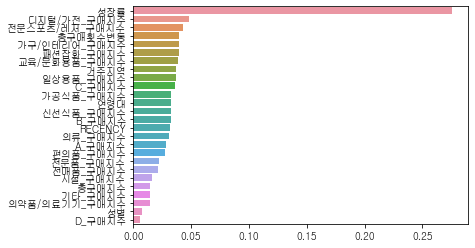

In [176]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train,y_train)

feature_series = pd.Series(data=dt_reg.feature_importances_,index = X_train.columns)
feature_series = feature_series.sort_values(ascending=False)

sns.barplot(x=feature_series, y=feature_series.index)

<AxesSubplot:>

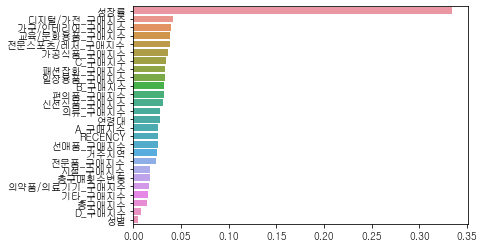

In [177]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_test,y_test)

feature_series = pd.Series(data=dt_reg.feature_importances_,index = X_train.columns)
feature_series = feature_series.sort_values(ascending=False)

sns.barplot(x=feature_series, y=feature_series.index)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,rf_pred,pred_proba)

오차행렬
[[6887 2145]
 [3274 7066]]
정확도:0.7203,정밀도:0.7671,재현율:0.6834,f1:0.7228,roc:0.796082


In [53]:
rf_params = {
    'n_estimators':[100],
    'max_depth':[10,12,16],
    'min_samples_leaf':[10,12,14],
    'min_samples_split':[6,8,10]
}

rf_cv = GridSearchCV(rf,param_grid = rf_params,scoring='accuracy',cv=3,verbose=1)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_score_,rf_cv.best_params_)

best_rf_clf = rf_cv.best_estimator_
rf_pred_cv = best_rf_clf.predict(X_test)
pred_proba = best_rf_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,rf_pred_cv,pred_proba)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.7108284207260317 {'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 10, 'n_estimators': 100}
오차행렬
[[6990 2042]
 [3215 7125]]
정확도:0.7286,정밀도:0.7772,재현율:0.6891,f1:0.7305,roc:0.804436


In [54]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lr_pred,pred_proba)

오차행렬
[[6941 2091]
 [3273 7067]]
정확도:0.7231,정밀도:0.7717,재현율:0.6835,f1:0.7249,roc:0.801351


In [55]:
lr_params = {
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,5,10]
}

lr_cv = GridSearchCV(lr_clf,param_grid = lr_params,scoring='accuracy',cv=3,verbose=1)
lr_cv.fit(X_train,y_train)
print(lr_cv.best_score_,lr_cv.best_params_)

best_lr_clf = lr_cv.best_estimator_
lr_pred_cv = best_lr_clf.predict(X_test)
pred_proba = best_lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lr_pred_cv,pred_proba)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.7040024821594787 {'C': 0.01, 'penalty': 'l1'}
오차행렬
[[6878 2154]
 [3131 7209]]
정확도:0.7272,정밀도:0.7699,재현율:0.6972,f1:0.7318,roc:0.803480


In [56]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimator=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set = evals,verbose=True)
lgbm_pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lgbm_pred,pred_proba)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's binary_logloss: 0.669563
[2]	valid_0's binary_logloss: 0.648685
[3]	valid_0's binary_logloss: 0.632192
[4]	valid_0's binary_logloss: 0.619814
[5]	valid_0's binary_logloss: 0.61002
[6]	valid_0's binary_logloss: 0.602504
[7]	valid_0's binary_logloss: 0.594159
[8]	valid_0's binary_logloss: 0.58972
[9]	valid_0's binary_logloss: 0.584121
[10]	valid_0's binary_logloss: 0.581916
[11]	valid_0's binary_logloss: 0.578456
[12]	valid_0's binary_logloss: 0.574805
[13]	valid_0's binary_logloss: 0.571923
[14]	valid_0's binary_logloss: 0.572199
[15]	valid_0's binary_logloss: 0.569974
[16]	valid_0's binary_logloss: 0.571403
[17]	valid_0's binary_logloss: 0.569537
[18]	valid_0's binary_logloss: 0.570995
[19]	valid_0's binary_logloss: 0.569698
[20]	valid_0's binary_logloss: 0.569
[21]	valid_0's binary_logloss: 0.568175
[22]	valid_0's binary_logloss: 0.567716
[23]	valid_0's binary_logloss: 0.568526
[24]	valid_0's binary_logloss: 0.569186
[2

In [57]:
lgbm_params = {
    'num_leaves':[32,64,128],
    'max_depth':[32,64,128],
    'min_child_samples':[20,40,60],
    'subsamples':[0.4,0.6,0.8]
}

lgbm_cv = GridSearchCV(lgbm_wrapper,param_grid = lgbm_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
lgbm_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(lgbm_cv.best_score_,lgbm_cv.best_params_)

best_lgbm_clf = lgbm_cv.best_estimator_
lgbm_pred_cv = best_lgbm_clf.predict(X_test)
pred_proba = best_lgbm_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,lgbm_pred_cv,pred_proba)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669997
[2]	valid_0's binary_logloss: 0.65106
[3]	valid_0's binary_logloss: 0.63614
[4]	valid_0's binary_logloss: 0.624713
[5]	valid_0's binary_logloss: 0.612782
[6]	valid_0's binary_logloss: 0.602784
[7]	valid_0's binary_logloss: 0.594516
[8]	valid_0's binary_logloss: 0.590472
[9]	valid_0's binary_logloss: 0.58469
[10]	valid_0's binary_logloss: 0.582843
[11]	valid_0's binary_logloss: 0.58211
[12]	valid_0's binary_logloss: 0.578426
[13]	valid_0's binary_logloss: 0.575536
[14]	valid_0's binary_logloss: 0.572603
[15]	valid_0's binary_logloss: 0.574169
[16]	valid_0's binary_logloss: 0.572223
[17]	valid_0's binary_logloss: 0.570543
[18]	valid_0's binary_logloss: 0.572774
[19]	valid_0's binary_logloss: 0.575735
[20]	valid_0's binary_logloss: 0.574928
[21]	valid_0's binary_logloss: 0.577971
[22]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[98]	valid_0's binary_logloss: 0.597263
[99]	valid_0's binary_logloss: 0.596577
[100]	valid_0's binary_logloss: 0.596828
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.671124
[2]	valid_0's binary_logloss: 0.651521
[3]	valid_0's binary_logloss: 0.635654
[4]	valid_0's binary_logloss: 0.622685
[5]	valid_0's binary_logloss: 0.614426
[6]	valid_0's binary_logloss: 0.607413
[7]	valid_0's binary_logloss: 0.599649
[8]	valid_0's binary_logloss: 0.595319
[9]	valid_0's binary_logloss: 0.59115
[10]	valid_0's binary_logloss: 0.588225
[11]	valid_0's binary_logloss: 0.586311
[12]	valid_0's binary_logloss: 0.583041
[13]	valid_0's binary_logloss: 0.579532
[14]	valid_0's binary_logloss: 0.57835
[15]	valid_0's binary_logloss: 0.575785
[16]	valid_0's binary_logloss: 0.574199
[17]	valid_0's binary_logloss: 0.574605
[18]	valid_0's binary_logloss: 0.573297
[19]	valid_0's binary_logloss: 0.571693
[20]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[93]	valid_0's binary_logloss: 0.597833
[94]	valid_0's binary_logloss: 0.597857
[95]	valid_0's binary_logloss: 0.59852
[96]	valid_0's binary_logloss: 0.598877
[97]	valid_0's binary_logloss: 0.599358
[98]	valid_0's binary_logloss: 0.599692
[99]	valid_0's binary_logloss: 0.599822
[100]	valid_0's binary_logloss: 0.59985
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670011
[2]	valid_0's binary_logloss: 0.649938
[3]	valid_0's binary_logloss: 0.633218
[4]	valid_0's binary_logloss: 0.619517
[5]	valid_0's binary_logloss: 0.608041
[6]	valid_0's binary_logloss: 0.599934
[7]	valid_0's binary_logloss: 0.593179
[8]	valid_0's binary_logloss: 0.588075
[9]	valid_0's binary_logloss: 0.583171
[10]	valid_0's binary_logloss: 0.578019
[11]	valid_0's binary_logloss: 0.576302
[12]	valid_0's binary_logloss: 0.575052
[13]	valid_0's binary_logloss: 0.572134
[14]	valid_0's binary_logloss: 0.572011
[15]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[82]	valid_0's binary_logloss: 0.593541
[83]	valid_0's binary_logloss: 0.593658
[84]	valid_0's binary_logloss: 0.59429
[85]	valid_0's binary_logloss: 0.594402
[86]	valid_0's binary_logloss: 0.594459
[87]	valid_0's binary_logloss: 0.594537
[88]	valid_0's binary_logloss: 0.594659
[89]	valid_0's binary_logloss: 0.594992
[90]	valid_0's binary_logloss: 0.5949
[91]	valid_0's binary_logloss: 0.595147
[92]	valid_0's binary_logloss: 0.59551
[93]	valid_0's binary_logloss: 0.595603
[94]	valid_0's binary_logloss: 0.596416
[95]	valid_0's binary_logloss: 0.596891
[96]	valid_0's binary_logloss: 0.596801
[97]	valid_0's binary_logloss: 0.596974
[98]	valid_0's binary_logloss: 0.597263
[99]	valid_0's binary_logloss: 0.596577
[100]	valid_0's binary_logloss: 0.596828
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.671124
[2]	valid_0's binary_logloss: 0.651521
[3]	valid_0's binary_logloss: 0.635654
[4]	valid_0's binary_lo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[76]	valid_0's binary_logloss: 0.584879
[77]	valid_0's binary_logloss: 0.5848
[78]	valid_0's binary_logloss: 0.585027
[79]	valid_0's binary_logloss: 0.585361
[80]	valid_0's binary_logloss: 0.58566
[81]	valid_0's binary_logloss: 0.585801
[82]	valid_0's binary_logloss: 0.585906
[83]	valid_0's binary_logloss: 0.586117
[84]	valid_0's binary_logloss: 0.586289
[85]	valid_0's binary_logloss: 0.586702
[86]	valid_0's binary_logloss: 0.586954
[87]	valid_0's binary_logloss: 0.587382
[88]	valid_0's binary_logloss: 0.587498
[89]	valid_0's binary_logloss: 0.587633
[90]	valid_0's binary_logloss: 0.587766
[91]	valid_0's binary_logloss: 0.587952
[92]	valid_0's binary_logloss: 0.587925
[93]	valid_0's binary_logloss: 0.587996
[94]	valid_0's binary_logloss: 0.588109
[95]	valid_0's binary_logloss: 0.588529
[96]	valid_0's binary_logloss: 0.588619
[97]	valid_0's binary_logloss: 0.588969
[98]	valid_0's binary_logloss: 0.58909
[99]	valid_0's binary_logloss: 0.58907
[100]	valid_0's binary_logloss: 0.589502
[Lig

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[72]	valid_0's binary_logloss: 0.592407
[73]	valid_0's binary_logloss: 0.592527
[74]	valid_0's binary_logloss: 0.592539
[75]	valid_0's binary_logloss: 0.592398
[76]	valid_0's binary_logloss: 0.592694
[77]	valid_0's binary_logloss: 0.592796
[78]	valid_0's binary_logloss: 0.592909
[79]	valid_0's binary_logloss: 0.592848
[80]	valid_0's binary_logloss: 0.592968
[81]	valid_0's binary_logloss: 0.593562
[82]	valid_0's binary_logloss: 0.593541
[83]	valid_0's binary_logloss: 0.593658
[84]	valid_0's binary_logloss: 0.59429
[85]	valid_0's binary_logloss: 0.594402
[86]	valid_0's binary_logloss: 0.594459
[87]	valid_0's binary_logloss: 0.594537
[88]	valid_0's binary_logloss: 0.594659
[89]	valid_0's binary_logloss: 0.594992
[90]	valid_0's binary_logloss: 0.5949
[91]	valid_0's binary_logloss: 0.595147
[92]	valid_0's binary_logloss: 0.59551
[93]	valid_0's binary_logloss: 0.595603
[94]	valid_0's binary_logloss: 0.596416
[95]	valid_0's binary_logloss: 0.596891
[96]	valid_0's binary_logloss: 0.596801
[97]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[55]	valid_0's binary_logloss: 0.579575
[56]	valid_0's binary_logloss: 0.579692
[57]	valid_0's binary_logloss: 0.579774
[58]	valid_0's binary_logloss: 0.58019
[59]	valid_0's binary_logloss: 0.580309
[60]	valid_0's binary_logloss: 0.580322
[61]	valid_0's binary_logloss: 0.580638
[62]	valid_0's binary_logloss: 0.580816
[63]	valid_0's binary_logloss: 0.581141
[64]	valid_0's binary_logloss: 0.581484
[65]	valid_0's binary_logloss: 0.581612
[66]	valid_0's binary_logloss: 0.581838
[67]	valid_0's binary_logloss: 0.58216
[68]	valid_0's binary_logloss: 0.58227
[69]	valid_0's binary_logloss: 0.582441
[70]	valid_0's binary_logloss: 0.582573
[71]	valid_0's binary_logloss: 0.582864
[72]	valid_0's binary_logloss: 0.583142
[73]	valid_0's binary_logloss: 0.583325
[74]	valid_0's binary_logloss: 0.583768
[75]	valid_0's binary_logloss: 0.584435
[76]	valid_0's binary_logloss: 0.584879
[77]	valid_0's binary_logloss: 0.5848
[78]	valid_0's binary_logloss: 0.585027
[79]	valid_0's binary_logloss: 0.585361
[80]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.58317
[34]	valid_0's binary_logloss: 0.583265
[35]	valid_0's binary_logloss: 0.58383
[36]	valid_0's binary_logloss: 0.586987
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.591435
[39]	valid_0's binary_logloss: 0.592077
[40]	valid_0's binary_logloss: 0.592019
[41]	valid_0's binary_logloss: 0.592714
[42]	valid_0's binary_logloss: 0.592909
[43]	valid_0's binary_logloss: 0.593137
[44]	valid_0's binary_logloss: 0.593747
[45]	valid_0's binary_logloss: 0.593969
[46]	valid_0's binary_logloss: 0.59439
[47]	valid_0's binary_logloss: 0.594804
[48]	valid_0's binary_logloss: 0.595125
[49]	valid_0's binary_logloss: 0.595386
[50]	valid_0's binary_logloss: 0.595624
[51]	valid_0's binary_logloss: 0.595665
[52]	valid_0's binary_logloss: 0.596118
[53]	valid_0's binary_logloss: 0.596569
[54]	valid_0's binary_logloss: 0.596829
[55]	valid_0's binary_logloss: 0.597228
[56]	valid_0's binary_logloss: 0.597582
[57]	valid_0's binary_logloss: 0.597657
[58]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670854
[2]	valid_0's binary_logloss: 0.651295
[3]	valid_0's binary_logloss: 0.635448
[4]	valid_0's binary_logloss: 0.62339
[5]	valid_0's binary_logloss: 0.614933
[6]	valid_0's binary_logloss: 0.607677
[7]	valid_0's binary_logloss: 0.602369
[8]	valid_0's binary_logloss: 0.598146
[9]	valid_0's binary_logloss: 0.592075
[10]	valid_0's binary_logloss: 0.589669
[11]	valid_0's binary_logloss: 0.587808
[12]	valid_0's binary_logloss: 0.58343
[13]	valid_0's binary_logloss: 0.581681
[14]	valid_0's binary_logloss: 0.579091
[15]	valid_0's binary_logloss: 0.577635
[16]	valid_0's binary_logloss: 0.578518
[17]	valid_0's binary_logloss: 0.577257
[18]	valid_0's binary_logloss: 0.576061
[19]	valid_0's binary_logloss: 0.574699
[20]	valid_0's binary_logloss: 0.574234
[21]	valid_0's binary_logloss: 0.573302
[22]	valid_0's binary_logloss: 0.572645
[23]	valid_0's binary_logloss: 0.573718
[24]	valid_0's binary_logloss: 0.574547


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.572376
[27]	valid_0's binary_logloss: 0.573804
[28]	valid_0's binary_logloss: 0.573666
[29]	valid_0's binary_logloss: 0.575646
[30]	valid_0's binary_logloss: 0.57627
[31]	valid_0's binary_logloss: 0.578788
[32]	valid_0's binary_logloss: 0.578764
[33]	valid_0's binary_logloss: 0.579777
[34]	valid_0's binary_logloss: 0.579674
[35]	valid_0's binary_logloss: 0.580529
[36]	valid_0's binary_logloss: 0.583563
[37]	valid_0's binary_logloss: 0.584186
[38]	valid_0's binary_logloss: 0.58445
[39]	valid_0's binary_logloss: 0.585314
[40]	valid_0's binary_logloss: 0.586185
[41]	valid_0's binary_logloss: 0.586413
[42]	valid_0's binary_logloss: 0.586436
[43]	valid_0's binary_logloss: 0.586858
[44]	valid_0's binary_logloss: 0.587435
[45]	valid_0's binary_logloss: 0.588218
[46]	valid_0's binary_logloss: 0.58862
[47]	valid_0's binary_logloss: 0.588411
[48]	valid_0's binary_logloss: 0.588728
[49]	valid_0's binary_logloss: 0.589003
[50]	valid_0's binary_logloss: 0.589199
[51

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.6507
[3]	valid_0's binary_logloss: 0.635815
[4]	valid_0's binary_logloss: 0.624322
[5]	valid_0's binary_logloss: 0.612551
[6]	valid_0's binary_logloss: 0.603106
[7]	valid_0's binary_logloss: 0.59551
[8]	valid_0's binary_logloss: 0.588861
[9]	valid_0's binary_logloss: 0.585811
[10]	valid_0's binary_logloss: 0.581584
[11]	valid_0's binary_logloss: 0.577264
[12]	valid_0's binary_logloss: 0.576961
[13]	valid_0's binary_logloss: 0.574107
[14]	valid_0's binary_logloss: 0.573306
[15]	valid_0's binary_logloss: 0.574411
[16]	valid_0's binary_logloss: 0.572709
[17]	valid_0's binary_logloss: 0.571587
[18]	valid_0's binary_logloss: 0.570223
[19]	valid_0's binary_logloss: 0.569053
[20]	valid_0's binary_logloss: 0.568504
[21]	valid_0's binary_logloss: 0.567819
[22]	valid_0's binary_logloss: 0.567131
[23]	valid_0's binary_logloss: 0.570176
[24]	valid_0's binary_logloss: 0.569637
[25]	valid_0's binary_logloss: 0.57303
[26]	valid_0's binary_logloss: 0.57279
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.577912
[28]	valid_0's binary_logloss: 0.57811
[29]	valid_0's binary_logloss: 0.57858
[30]	valid_0's binary_logloss: 0.581276
[31]	valid_0's binary_logloss: 0.58212
[32]	valid_0's binary_logloss: 0.582403
[33]	valid_0's binary_logloss: 0.584252
[34]	valid_0's binary_logloss: 0.585025
[35]	valid_0's binary_logloss: 0.584938
[36]	valid_0's binary_logloss: 0.586019
[37]	valid_0's binary_logloss: 0.587256
[38]	valid_0's binary_logloss: 0.587806
[39]	valid_0's binary_logloss: 0.588267
[40]	valid_0's binary_logloss: 0.589033
[41]	valid_0's binary_logloss: 0.589538
[42]	valid_0's binary_logloss: 0.590677
[43]	valid_0's binary_logloss: 0.591217
[44]	valid_0's binary_logloss: 0.591652
[45]	valid_0's binary_logloss: 0.591975
[46]	valid_0's binary_logloss: 0.592905
[47]	valid_0's binary_logloss: 0.593667
[48]	valid_0's binary_logloss: 0.593841
[49]	valid_0's binary_logloss: 0.594284
[50]	valid_0's binary_logloss: 0.594703
[51]	valid_0's binary_logloss: 0.595077
[52

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669436
[2]	valid_0's binary_logloss: 0.649325
[3]	valid_0's binary_logloss: 0.632766
[4]	valid_0's binary_logloss: 0.619025
[5]	valid_0's binary_logloss: 0.607835
[6]	valid_0's binary_logloss: 0.599766
[7]	valid_0's binary_logloss: 0.593423
[8]	valid_0's binary_logloss: 0.588282
[9]	valid_0's binary_logloss: 0.58458
[10]	valid_0's binary_logloss: 0.579861
[11]	valid_0's binary_logloss: 0.57827
[12]	valid_0's binary_logloss: 0.574873
[13]	valid_0's binary_logloss: 0.574675
[14]	valid_0's binary_logloss: 0.574501
[15]	valid_0's binary_logloss: 0.574945
[16]	valid_0's binary_logloss: 0.573474
[17]	valid_0's binary_logloss: 0.574612
[18]	valid_0's binary_logloss: 0.572978
[19]	valid_0's binary_logloss: 0.572075
[20]	valid_0's binary_logloss: 0.571737
[21]	valid_0's binary_logloss: 0.571131
[22]	valid_0's binary_logloss: 0.570821
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[28]	valid_0's binary_logloss: 0.575009
[29]	valid_0's binary_logloss: 0.579234
[30]	valid_0's binary_logloss: 0.578572
[31]	valid_0's binary_logloss: 0.578824
[32]	valid_0's binary_logloss: 0.58251
[33]	valid_0's binary_logloss: 0.58317
[34]	valid_0's binary_logloss: 0.583265
[35]	valid_0's binary_logloss: 0.58383
[36]	valid_0's binary_logloss: 0.586987
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.591435
[39]	valid_0's binary_logloss: 0.592077
[40]	valid_0's binary_logloss: 0.592019
[41]	valid_0's binary_logloss: 0.592714
[42]	valid_0's binary_logloss: 0.592909
[43]	valid_0's binary_logloss: 0.593137
[44]	valid_0's binary_logloss: 0.593747
[45]	valid_0's binary_logloss: 0.593969
[46]	valid_0's binary_logloss: 0.59439
[47]	valid_0's binary_logloss: 0.594804
[48]	valid_0's binary_logloss: 0.595125
[49]	valid_0's binary_logloss: 0.595386
[50]	valid_0's binary_logloss: 0.595624
[51]	valid_0's binary_logloss: 0.595665
[52]	valid_0's binary_logloss: 0.596118
[53]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.592905
[47]	valid_0's binary_logloss: 0.593667
[48]	valid_0's binary_logloss: 0.593841
[49]	valid_0's binary_logloss: 0.594284
[50]	valid_0's binary_logloss: 0.594703
[51]	valid_0's binary_logloss: 0.595077
[52]	valid_0's binary_logloss: 0.595051
[53]	valid_0's binary_logloss: 0.595683
[54]	valid_0's binary_logloss: 0.595801
[55]	valid_0's binary_logloss: 0.59592
[56]	valid_0's binary_logloss: 0.596708
[57]	valid_0's binary_logloss: 0.598642
[58]	valid_0's binary_logloss: 0.598911
[59]	valid_0's binary_logloss: 0.599617
[60]	valid_0's binary_logloss: 0.600362
[61]	valid_0's binary_logloss: 0.601144
[62]	valid_0's binary_logloss: 0.602789
[63]	valid_0's binary_logloss: 0.604219
[64]	valid_0's binary_logloss: 0.604393
[65]	valid_0's binary_logloss: 0.604652
[66]	valid_0's binary_logloss: 0.604502
[67]	valid_0's binary_logloss: 0.604705
[68]	valid_0's binary_logloss: 0.605287
[69]	valid_0's binary_logloss: 0.605986
[70]	valid_0's binary_logloss: 0.605903
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.574501
[15]	valid_0's binary_logloss: 0.574945
[16]	valid_0's binary_logloss: 0.573474
[17]	valid_0's binary_logloss: 0.574612
[18]	valid_0's binary_logloss: 0.572978
[19]	valid_0's binary_logloss: 0.572075
[20]	valid_0's binary_logloss: 0.571737
[21]	valid_0's binary_logloss: 0.571131
[22]	valid_0's binary_logloss: 0.570821
[23]	valid_0's binary_logloss: 0.572811
[24]	valid_0's binary_logloss: 0.572526
[25]	valid_0's binary_logloss: 0.572541
[26]	valid_0's binary_logloss: 0.572376
[27]	valid_0's binary_logloss: 0.573804
[28]	valid_0's binary_logloss: 0.573666
[29]	valid_0's binary_logloss: 0.575646
[30]	valid_0's binary_logloss: 0.57627
[31]	valid_0's binary_logloss: 0.578788
[32]	valid_0's binary_logloss: 0.578764
[33]	valid_0's binary_logloss: 0.579777
[34]	valid_0's binary_logloss: 0.579674
[35]	valid_0's binary_logloss: 0.580529
[36]	valid_0's binary_logloss: 0.583563
[37]	valid_0's binary_logloss: 0.584186
[38]	valid_0's binary_logloss: 0.58445
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	valid_0's binary_logloss: 0.59976
[36]	valid_0's binary_logloss: 0.599724
[37]	valid_0's binary_logloss: 0.600277
[38]	valid_0's binary_logloss: 0.600695
[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]	valid_0's binary_logloss: 0.603655
[43]	valid_0's binary_logloss: 0.604545
[44]	valid_0's binary_logloss: 0.605257
[45]	valid_0's binary_logloss: 0.605795
[46]	valid_0's binary_logloss: 0.606272
[47]	valid_0's binary_logloss: 0.606691
[48]	valid_0's binary_logloss: 0.606628
[49]	valid_0's binary_logloss: 0.607103
[50]	valid_0's binary_logloss: 0.607972
[51]	valid_0's binary_logloss: 0.60883
[52]	valid_0's binary_logloss: 0.609018
[53]	valid_0's binary_logloss: 0.610206
[54]	valid_0's binary_logloss: 0.611189
[55]	valid_0's binary_logloss: 0.611749
[56]	valid_0's binary_logloss: 0.612326
[57]	valid_0's binary_logloss: 0.612808
[58]	valid_0's binary_logloss: 0.613964
[59]	valid_0's binary_logloss: 0.613983
[60]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid_0's binary_logloss: 0.587785
[28]	valid_0's binary_logloss: 0.587227
[29]	valid_0's binary_logloss: 0.587489
[30]	valid_0's binary_logloss: 0.587687
[31]	valid_0's binary_logloss: 0.589294
[32]	valid_0's binary_logloss: 0.591424
[33]	valid_0's binary_logloss: 0.592989
[34]	valid_0's binary_logloss: 0.593093
[35]	valid_0's binary_logloss: 0.593601
[36]	valid_0's binary_logloss: 0.594686
[37]	valid_0's binary_logloss: 0.596664
[38]	valid_0's binary_logloss: 0.597258
[39]	valid_0's binary_logloss: 0.598207
[40]	valid_0's binary_logloss: 0.600303
[41]	valid_0's binary_logloss: 0.600595
[42]	valid_0's binary_logloss: 0.602241
[43]	valid_0's binary_logloss: 0.602934
[44]	valid_0's binary_logloss: 0.603628
[45]	valid_0's binary_logloss: 0.603907
[46]	valid_0's binary_logloss: 0.605685
[47]	valid_0's binary_logloss: 0.606141

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901
[25]	valid_0's binary_logloss: 0.571932
[26]	valid_0's binary_logloss: 0.572555
[27]	valid_0's binary_logloss: 0.572827
[28]	valid_0's binary_logloss: 0.574945
[29]	valid_0's binary_logloss: 0.574956
[30]	valid_0's binary_logloss: 0.575326
[31]	valid_0's binary_logloss: 0.575481
[32]	valid_0's binary_logloss: 0.575835
[33]	valid_0's binary_logloss: 0.576227
[34]	valid_0's binary_logloss: 0.57631
[35]	valid_0's binary_logloss: 0.57609
[36]	valid_0's binary_logloss: 0.578282
[37]	valid_0's binary_logloss: 0.579358
[38]	valid_0's binary_logloss: 0.580024
[39

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.598271
[9]	valid_0's binary_logloss: 0.592529
[10]	valid_0's binary_logloss: 0.587372
[11]	valid_0's binary_logloss: 0.583821
[12]	valid_0's binary_logloss: 0.581311
[13]	valid_0's binary_logloss: 0.582235
[14]	valid_0's binary_logloss: 0.580472
[15]	valid_0's binary_logloss: 0.578856
[16]	valid_0's binary_logloss: 0.580472
[17]	valid_0's binary_logloss: 0.579386
[18]	valid_0's binary_logloss: 0.578315
[19]	valid_0's binary_logloss: 0.581448
[20]	valid_0's binary_logloss: 0.580185
[21]	valid_0's binary_logloss: 0.583529
[22]	valid_0's binary_logloss: 0.582473
[23]	valid_0's binary_logloss: 0.585921
[24]	valid_0's binary_logloss: 0.589942
[25]	valid_0's binary_logloss: 0.589471
[26]	valid_0's binary_logloss: 0.589841
[27]	valid_0's binary_logloss: 0.589571
[28]	valid_0's binary_logloss: 0.589646
[29]	valid_0's binary_logloss: 0.589756
[30]	valid_0's binary_logloss: 0.594199
[31]	valid_0's binary_logloss: 0.59418
[32]	valid_0's binary_logloss: 0.596101
[33

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.6252
[5]	valid_0's binary_logloss: 0.614751
[6]	valid_0's binary_logloss: 0.608271
[7]	valid_0's binary_logloss: 0.603018
[8]	valid_0's binary_logloss: 0.598924
[9]	valid_0's binary_logloss: 0.593863
[10]	valid_0's binary_logloss: 0.591748
[11]	valid_0's binary_logloss: 0.590315
[12]	valid_0's binary_logloss: 0.589168
[13]	valid_0's binary_logloss: 0.586976
[14]	valid_0's binary_logloss: 0.586871
[15]	valid_0's binary_logloss: 0.586658
[16]	valid_0's binary_logloss: 0.585101
[17]	valid_0's binary_logloss: 0.584582
[18]	valid_0's binary_logloss: 0.584804
[19]	valid_0's binary_logloss: 0.584283
[20]	valid_0's binary_logloss: 0.583711
[21]	valid_0's binary_logloss: 0.586007
[22]	valid_0's binary_logloss: 0.585765
[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid_0's binary_logloss: 0.587785
[28]	valid_0's binary_logloss: 0.587227
[29]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649036
[3]	valid_0's binary_logloss: 0.633198
[4]	valid_0's binary_logloss: 0.619415
[5]	valid_0's binary_logloss: 0.608477
[6]	valid_0's binary_logloss: 0.599395
[7]	valid_0's binary_logloss: 0.591739
[8]	valid_0's binary_logloss: 0.585876
[9]	valid_0's binary_logloss: 0.581806
[10]	valid_0's binary_logloss: 0.578602
[11]	valid_0's binary_logloss: 0.576631
[12]	valid_0's binary_logloss: 0.573941
[13]	valid_0's binary_logloss: 0.571949
[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901
[25]	valid_0's binary_logloss: 0.571932
[26]	valid_0's binary_logloss: 0.572555
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]	valid_0's binary_logloss: 0.603655
[43]	valid_0's binary_logloss: 0.604545
[44]	valid_0's binary_logloss: 0.605257
[45]	valid_0's binary_logloss: 0.605795
[46]	valid_0's binary_logloss: 0.606272
[47]	valid_0's binary_logloss: 0.606691
[48]	valid_0's binary_logloss: 0.606628
[49]	valid_0's binary_logloss: 0.607103
[50]	valid_0's binary_logloss: 0.607972
[51]	valid_0's binary_logloss: 0.60883
[52]	valid_0's binary_logloss: 0.609018
[53]	valid_0's binary_logloss: 0.610206
[54]	valid_0's binary_logloss: 0.611189
[55]	valid_0's binary_logloss: 0.611749
[56]	valid_0's binary_logloss: 0.612326
[57]	valid_0's binary_logloss: 0.612808
[58]	valid_0's binary_logloss: 0.613964
[59]	valid_0's binary_logloss: 0.613983
[60]	valid_0's binary_logloss: 0.614533
[61]	valid_0's binary_logloss: 0.614745
[62]	valid_0's binary_logloss: 0.615551
[63]	valid_0's binary_logloss: 0.615988
[64

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.592989
[34]	valid_0's binary_logloss: 0.593093
[35]	valid_0's binary_logloss: 0.593601
[36]	valid_0's binary_logloss: 0.594686
[37]	valid_0's binary_logloss: 0.596664
[38]	valid_0's binary_logloss: 0.597258
[39]	valid_0's binary_logloss: 0.598207
[40]	valid_0's binary_logloss: 0.600303
[41]	valid_0's binary_logloss: 0.600595
[42]	valid_0's binary_logloss: 0.602241
[43]	valid_0's binary_logloss: 0.602934
[44]	valid_0's binary_logloss: 0.603628
[45]	valid_0's binary_logloss: 0.603907
[46]	valid_0's binary_logloss: 0.605685
[47]	valid_0's binary_logloss: 0.606141
[48]	valid_0's binary_logloss: 0.60878
[49]	valid_0's binary_logloss: 0.609689
[50]	valid_0's binary_logloss: 0.611761
[51]	valid_0's binary_logloss: 0.612223
[52]	valid_0's binary_logloss: 0.61391
[53]	valid_0's binary_logloss: 0.614925
[54]	valid_0's binary_logloss: 0.615282
[55]	valid_0's binary_logloss: 0.616588
[56]	valid_0's binary_logloss: 0.61747
[57]	valid_0's binary_logloss: 0.619102
[58

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.572555
[27]	valid_0's binary_logloss: 0.572827
[28]	valid_0's binary_logloss: 0.574945
[29]	valid_0's binary_logloss: 0.574956
[30]	valid_0's binary_logloss: 0.575326
[31]	valid_0's binary_logloss: 0.575481
[32]	valid_0's binary_logloss: 0.575835
[33]	valid_0's binary_logloss: 0.576227
[34]	valid_0's binary_logloss: 0.57631
[35]	valid_0's binary_logloss: 0.57609
[36]	valid_0's binary_logloss: 0.578282
[37]	valid_0's binary_logloss: 0.579358
[38]	valid_0's binary_logloss: 0.580024
[39]	valid_0's binary_logloss: 0.5829
[40]	valid_0's binary_logloss: 0.583384
[41]	valid_0's binary_logloss: 0.583932
[42]	valid_0's binary_logloss: 0.584959
[43]	valid_0's binary_logloss: 0.585768
[44]	valid_0's binary_logloss: 0.58636
[45]	valid_0's binary_logloss: 0.586944
[46]	valid_0's binary_logloss: 0.586884
[47]	valid_0's binary_logloss: 0.587421
[48]	valid_0's binary_logloss: 0.587544
[49]	valid_0's binary_logloss: 0.58788
[50]	valid_0's binary_logloss: 0.588049
[51]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[43]	valid_0's binary_logloss: 0.575705
[44]	valid_0's binary_logloss: 0.57614
[45]	valid_0's binary_logloss: 0.576168
[46]	valid_0's binary_logloss: 0.576632
[47]	valid_0's binary_logloss: 0.576772
[48]	valid_0's binary_logloss: 0.576556
[49]	valid_0's binary_logloss: 0.576718
[50]	valid_0's binary_logloss: 0.576581
[51]	valid_0's binary_logloss: 0.576653
[52]	valid_0's binary_logloss: 0.57676
[53]	valid_0's binary_logloss: 0.576581
[54]	valid_0's binary_logloss: 0.576875
[55]	valid_0's binary_logloss: 0.576781
[56]	valid_0's binary_logloss: 0.577087
[57]	valid_0's binary_logloss: 0.577089
[58]	valid_0's binary_logloss: 0.577405
[59]	valid_0's binary_logloss: 0.577463
[60]	valid_0's binary_logloss: 0.577626
[61]	valid_0's binary_logloss: 0.578268
[62]	valid_0's binary_logloss: 0.578513
[63]	valid_0's binary_logloss: 0.578662
[64]	valid_0's binary_logloss: 0.578758
[65]	valid_0's binary_logloss: 0.578769
[66]	valid_0's binary_logloss: 0.579426
[67]	valid_0's binary_logloss: 0.579901
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[30]	valid_0's binary_logloss: 0.576196
[31]	valid_0's binary_logloss: 0.576514
[32]	valid_0's binary_logloss: 0.576538
[33]	valid_0's binary_logloss: 0.577882
[34]	valid_0's binary_logloss: 0.578372
[35]	valid_0's binary_logloss: 0.578897
[36]	valid_0's binary_logloss: 0.58067
[37]	valid_0's binary_logloss: 0.581303
[38]	valid_0's binary_logloss: 0.581342
[39]	valid_0's binary_logloss: 0.581568
[40]	valid_0's binary_logloss: 0.582321
[41]	valid_0's binary_logloss: 0.583007
[42]	valid_0's binary_logloss: 0.583424
[43]	valid_0's binary_logloss: 0.585572
[44]	valid_0's binary_logloss: 0.586496
[45]	valid_0's binary_logloss: 0.586773
[46]	valid_0's binary_logloss: 0.587133
[47]	valid_0's binary_logloss: 0.587372
[48]	valid_0's binary_logloss: 0.587808
[49]	valid_0's binary_logloss: 0.588377
[50]	valid_0's binary_logloss: 0.588779
[51]	valid_0's binary_logloss: 0.588594
[52]	valid_0's binary_logloss: 0.590749
[53]	valid_0's binary_logloss: 0.591298
[54]	valid_0's binary_logloss: 0.591689
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.580001
[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.573694
[25]	valid_0's binary_logloss: 0.572791
[26]	valid_0's binary_logloss: 0.572496
[27]	valid_0's binary_logloss: 0.572275
[28]	valid_0's binary_logloss: 0.57248
[29]	valid_0's binary_logloss: 0.572084
[30]	valid_0's binary_logloss: 0.572482
[31]	valid_0's binary_logloss: 0.572865
[32]	valid_0's binary_logloss: 0.572674
[33]	valid_0's binary_logloss: 0.572725
[34]	valid_0's binary_logloss: 0.573478
[35]	valid_0's binary_logloss: 0.573609
[36]	valid_0's binary_logloss: 0.573788
[37]	valid_0's binary_logloss: 0.574333
[38]	valid_0's binary_logloss: 0.574373
[39]	valid_0's binary_logloss: 0.574644
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.590106
[11]	valid_0's binary_logloss: 0.588046
[12]	valid_0's binary_logloss: 0.58459
[13]	valid_0's binary_logloss: 0.581286
[14]	valid_0's binary_logloss: 0.579217
[15]	valid_0's binary_logloss: 0.577194
[16]	valid_0's binary_logloss: 0.57759
[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0's binary_logloss: 0.576031
[28]	valid_0's binary_logloss: 0.576033
[29]	valid_0's binary_logloss: 0.575738
[30]	valid_0's binary_logloss: 0.576196
[31]	valid_0's binary_logloss: 0.576514
[32]	valid_0's binary_logloss: 0.576538
[33]	valid_0's binary_logloss: 0.577882
[34]	valid_0's binary_logloss: 0.578372
[35

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[5]	valid_0's binary_logloss: 0.609051
[6]	valid_0's binary_logloss: 0.599595
[7]	valid_0's binary_logloss: 0.593003
[8]	valid_0's binary_logloss: 0.586322
[9]	valid_0's binary_logloss: 0.582522
[10]	valid_0's binary_logloss: 0.577656
[11]	valid_0's binary_logloss: 0.575013
[12]	valid_0's binary_logloss: 0.573664
[13]	valid_0's binary_logloss: 0.571306
[14]	valid_0's binary_logloss: 0.570115
[15]	valid_0's binary_logloss: 0.567957
[16]	valid_0's binary_logloss: 0.566681
[17]	valid_0's binary_logloss: 0.565511
[18]	valid_0's binary_logloss: 0.564574
[19]	valid_0's binary_logloss: 0.565765
[20]	valid_0's binary_logloss: 0.56499
[21]	valid_0's binary_logloss: 0.56419
[22]	valid_0's binary_logloss: 0.56608
[23]	valid_0's binary_logloss: 0.568359
[24]	valid_0's binary_logloss: 0.56776
[25]	valid_0's binary_logloss: 0.567864
[26]	valid_0's binary_logloss: 0.567618
[27]	valid_0's binary_logloss: 0.567419
[28]	valid_0's binary_logloss: 0.569601
[29]	valid_0's binary_logloss: 0.569365
[30]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[4]	valid_0's binary_logloss: 0.623431
[5]	valid_0's binary_logloss: 0.614605
[6]	valid_0's binary_logloss: 0.607694
[7]	valid_0's binary_logloss: 0.601783
[8]	valid_0's binary_logloss: 0.597179
[9]	valid_0's binary_logloss: 0.59254
[10]	valid_0's binary_logloss: 0.590106
[11]	valid_0's binary_logloss: 0.588046
[12]	valid_0's binary_logloss: 0.58459
[13]	valid_0's binary_logloss: 0.581286
[14]	valid_0's binary_logloss: 0.579217
[15]	valid_0's binary_logloss: 0.577194
[16]	valid_0's binary_logloss: 0.57759
[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0's binary_logloss: 0.576031
[28]	valid_0's binary_logloss: 0.576033
[29]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650551
[3]	valid_0's binary_logloss: 0.635535
[4]	valid_0's binary_logloss: 0.62345
[5]	valid_0's binary_logloss: 0.612036
[6]	valid_0's binary_logloss: 0.605186
[7]	valid_0's binary_logloss: 0.597124
[8]	valid_0's binary_logloss: 0.5907
[9]	valid_0's binary_logloss: 0.588391
[10]	valid_0's binary_logloss: 0.583011
[11]	valid_0's binary_logloss: 0.582553
[12]	valid_0's binary_logloss: 0.581063
[13]	valid_0's binary_logloss: 0.580242
[14]	valid_0's binary_logloss: 0.578689
[15]	valid_0's binary_logloss: 0.580445
[16]	valid_0's binary_logloss: 0.578364
[17]	valid_0's binary_logloss: 0.57718
[18]	valid_0's binary_logloss: 0.575875
[19]	valid_0's binary_logloss: 0.579089
[20]	valid_0's binary_logloss: 0.578386
[21]	valid_0's binary_logloss: 0.577824
[22]	valid_0's binary_logloss: 0.577177
[23]	valid_0's binary_logloss: 0.577351
[24]	valid_0's binary_logloss: 0.577059
[25]	valid_0's binary_logloss: 0.577499
[26]	valid_0's binary_logloss: 0.57735
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.596133
[47]	valid_0's binary_logloss: 0.59676
[48]	valid_0's binary_logloss: 0.597161
[49]	valid_0's binary_logloss: 0.597714
[50]	valid_0's binary_logloss: 0.598953
[51]	valid_0's binary_logloss: 0.600705
[52]	valid_0's binary_logloss: 0.602152
[53]	valid_0's binary_logloss: 0.602464
[54]	valid_0's binary_logloss: 0.602748
[55]	valid_0's binary_logloss: 0.603199
[56]	valid_0's binary_logloss: 0.60396
[57]	valid_0's binary_logloss: 0.604033
[58]	valid_0's binary_logloss: 0.604131
[59]	valid_0's binary_logloss: 0.604014
[60]	valid_0's binary_logloss: 0.605587
[61]	valid_0's binary_logloss: 0.606077
[62]	valid_0's binary_logloss: 0.60626
[63]	valid_0's binary_logloss: 0.607154
[64]	valid_0's binary_logloss: 0.607085
[65]	valid_0's binary_logloss: 0.609038
[66]	valid_0's binary_logloss: 0.609448
[67]	valid_0's binary_logloss: 0.610012
[68]	valid_0's binary_logloss: 0.610916
[69]	valid_0's binary_logloss: 0.610791
[70]	valid_0's binary_logloss: 0.610831
[71

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.57243
[15]	valid_0's binary_logloss: 0.573163
[16]	valid_0's binary_logloss: 0.571495
[17]	valid_0's binary_logloss: 0.572401
[18]	valid_0's binary_logloss: 0.571231
[19]	valid_0's binary_logloss: 0.572174
[20]	valid_0's binary_logloss: 0.574309
[21]	valid_0's binary_logloss: 0.573922
[22]	valid_0's binary_logloss: 0.576372
[23]	valid_0's binary_logloss: 0.575969
[24]	valid_0's binary_logloss: 0.576146
[25]	valid_0's binary_logloss: 0.576024
[26]	valid_0's binary_logloss: 0.575895
[27]	valid_0's binary_logloss: 0.575731
[28]	valid_0's binary_logloss: 0.576671
[29]	valid_0's binary_logloss: 0.578771
[30]	valid_0's binary_logloss: 0.578344
[31]	valid_0's binary_logloss: 0.578183
[32]	valid_0's binary_logloss: 0.578988
[33]	valid_0's binary_logloss: 0.581984
[34]	valid_0's binary_logloss: 0.582098
[35]	valid_0's binary_logloss: 0.582485
[36]	valid_0's binary_logloss: 0.585359
[37]	valid_0's binary_logloss: 0.585867
[38]	valid_0's binary_logloss: 0.586431
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[56]	valid_0's binary_logloss: 0.588099
[57]	valid_0's binary_logloss: 0.58841
[58]	valid_0's binary_logloss: 0.589426
[59]	valid_0's binary_logloss: 0.589365
[60]	valid_0's binary_logloss: 0.589559
[61]	valid_0's binary_logloss: 0.589919
[62]	valid_0's binary_logloss: 0.591155
[63]	valid_0's binary_logloss: 0.591426
[64]	valid_0's binary_logloss: 0.591646
[65]	valid_0's binary_logloss: 0.591954
[66]	valid_0's binary_logloss: 0.592694
[67]	valid_0's binary_logloss: 0.592698
[68]	valid_0's binary_logloss: 0.592482
[69]	valid_0's binary_logloss: 0.592658
[70]	valid_0's binary_logloss: 0.592594
[71]	valid_0's binary_logloss: 0.592692
[72]	valid_0's binary_logloss: 0.592883
[73]	valid_0's binary_logloss: 0.593699
[74]	valid_0's binary_logloss: 0.593981
[75]	valid_0's binary_logloss: 0.594131
[76]	valid_0's binary_logloss: 0.594476
[77]	valid_0's binary_logloss: 0.594593
[78]	valid_0's binary_logloss: 0.594626
[79]	valid_0's binary_logloss: 0.59441
[80]	valid_0's binary_logloss: 0.595061
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_logloss: 0.580203
[24]	valid_0's binary_logloss: 0.580905
[25]	valid_0's binary_logloss: 0.581059
[26]	valid_0's binary_logloss: 0.58101
[27]	valid_0's binary_logloss: 0.581281
[28]	valid_0's binary_logloss: 0.582151
[29]	valid_0's binary_logloss: 0.584197
[30]	valid_0's binary_logloss: 0.584967
[31]	valid_0's binary_logloss: 0.585556
[32]	valid_0's binary_logloss: 0.586237
[33]	valid_0's binary_logloss: 0.586916
[34]	valid_0's binary_logloss: 0.587355
[35]	valid_0's binary_logloss: 0.58724
[36]	valid_0's binary_logloss: 0.587858
[37]	valid_0's binary_logloss: 0.588113
[38]	valid_0's binary_logloss: 0.588413
[39]	valid_0's binary_logloss: 0.590392
[40]	valid_0's binary_logloss: 0.591192
[41]	valid_0's binary_logloss: 0.591515
[42]	valid_0's binary_logloss: 0.592364
[43]	valid_0's binary_logloss: 0.592746
[44]	valid_0's binary_logloss: 0.594485
[45]	valid_0's binary_logloss: 0.595258
[46]	valid_0's binary_logloss: 0.596133
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669308
[2]	valid_0's binary_logloss: 0.648827
[3]	valid_0's binary_logloss: 0.632818
[4]	valid_0's binary_logloss: 0.619748
[5]	valid_0's binary_logloss: 0.609289
[6]	valid_0's binary_logloss: 0.599831
[7]	valid_0's binary_logloss: 0.59292
[8]	valid_0's binary_logloss: 0.58788
[9]	valid_0's binary_logloss: 0.583788
[10]	valid_0's binary_logloss: 0.580645
[11]	valid_0's binary_logloss: 0.578837
[12]	valid_0's binary_logloss: 0.577757
[13]	valid_0's binary_logloss: 0.57471
[14]	valid_0's binary_logloss: 0.57243
[15]	valid_0's binary_logloss: 0.573163
[16]	valid_0's binary_logloss: 0.571495
[17]	valid_0's binary_logloss: 0.572401
[18]	valid_0's binary_logloss: 0.571231
[19]	valid_0's binary_logloss: 0.572174
[20]	valid_0's binary_logloss: 0.574309
[21]	valid_0's binary_logloss: 0.573922
[22]	valid_0's binary_logloss: 0.576372
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.577361
[29]	valid_0's binary_logloss: 0.577239
[30]	valid_0's binary_logloss: 0.577617
[31]	valid_0's binary_logloss: 0.578127
[32]	valid_0's binary_logloss: 0.578957
[33]	valid_0's binary_logloss: 0.579277
[34]	valid_0's binary_logloss: 0.579528
[35]	valid_0's binary_logloss: 0.580242
[36]	valid_0's binary_logloss: 0.580516
[37]	valid_0's binary_logloss: 0.581056
[38]	valid_0's binary_logloss: 0.580969
[39]	valid_0's binary_logloss: 0.581336
[40]	valid_0's binary_logloss: 0.581488
[41]	valid_0's binary_logloss: 0.581701
[42]	valid_0's binary_logloss: 0.582244
[43]	valid_0's binary_logloss: 0.582935
[44]	valid_0's binary_logloss: 0.583359
[45]	valid_0's binary_logloss: 0.583657
[46]	valid_0's binary_logloss: 0.583992
[47]	valid_0's binary_logloss: 0.584795
[48]	valid_0's binary_logloss: 0.584955
[49]	valid_0's binary_logloss: 0.585505
[50]	valid_0's binary_logloss: 0.585933
[51]	valid_0's binary_logloss: 0.58622
[52]	valid_0's binary_logloss: 0.586798
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650901
[3]	valid_0's binary_logloss: 0.635135
[4]	valid_0's binary_logloss: 0.623273
[5]	valid_0's binary_logloss: 0.614143
[6]	valid_0's binary_logloss: 0.606044
[7]	valid_0's binary_logloss: 0.599378
[8]	valid_0's binary_logloss: 0.595803
[9]	valid_0's binary_logloss: 0.591777
[10]	valid_0's binary_logloss: 0.588083
[11]	valid_0's binary_logloss: 0.586438
[12]	valid_0's binary_logloss: 0.581912
[13]	valid_0's binary_logloss: 0.579152
[14]	valid_0's binary_logloss: 0.578436
[15]	valid_0's binary_logloss: 0.579027
[16]	valid_0's binary_logloss: 0.576885
[17]	valid_0's binary_logloss: 0.574873
[18]	valid_0's binary_logloss: 0.576445
[19]	valid_0's binary_logloss: 0.578103
[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_logloss: 0.580203
[24]	valid_0's binary_logloss: 0.580905
[25]	valid_0's binary_logloss: 0.581059
[26]	valid_0's binary_logloss: 0.58101
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[50]	valid_0's binary_logloss: 0.590506
[51]	valid_0's binary_logloss: 0.590756
[52]	valid_0's binary_logloss: 0.591195
[53]	valid_0's binary_logloss: 0.591552
[54]	valid_0's binary_logloss: 0.591757
[55]	valid_0's binary_logloss: 0.591937
[56]	valid_0's binary_logloss: 0.592288
[57]	valid_0's binary_logloss: 0.592186
[58]	valid_0's binary_logloss: 0.592533
[59]	valid_0's binary_logloss: 0.593223
[60]	valid_0's binary_logloss: 0.593568
[61]	valid_0's binary_logloss: 0.593607
[62]	valid_0's binary_logloss: 0.594007
[63]	valid_0's binary_logloss: 0.594687
[64]	valid_0's binary_logloss: 0.595012
[65]	valid_0's binary_logloss: 0.595289
[66]	valid_0's binary_logloss: 0.595713
[67]	valid_0's binary_logloss: 0.59617
[68]	valid_0's binary_logloss: 0.596455
[69]	valid_0's binary_logloss: 0.596737
[70]	valid_0's binary_logloss: 0.597187
[71]	valid_0's binary_logloss: 0.597155
[72]	valid_0's binary_logloss: 0.597224
[73]	valid_0's binary_logloss: 0.597455
[74]	valid_0's binary_logloss: 0.597552


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	valid_0's binary_logloss: 0.573442
[28]	valid_0's binary_logloss: 0.573381
[29]	valid_0's binary_logloss: 0.573397
[30]	valid_0's binary_logloss: 0.573571
[31]	valid_0's binary_logloss: 0.573563
[32]	valid_0's binary_logloss: 0.574505
[33

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669887
[2]	valid_0's binary_logloss: 0.649857
[3]	valid_0's binary_logloss: 0.633818
[4]	valid_0's binary_logloss: 0.621561
[5]	valid_0's binary_logloss: 0.612496
[6]	valid_0's binary_logloss: 0.60492
[7]	valid_0's binary_logloss: 0.600189
[8]	valid_0's binary_logloss: 0.594129
[9]	valid_0's binary_logloss: 0.590275
[10]	valid_0's binary_logloss: 0.586846
[11]	valid_0's binary_logloss: 0.585061
[12]	valid_0's binary_logloss: 0.583993
[13]	valid_0's binary_logloss: 0.581679
[14]	valid_0's binary_logloss: 0.579625
[15]	valid_0's binary_logloss: 0.579259
[16]	valid_0's binary_logloss: 0.577469
[17]	valid_0's binary_logloss: 0.576762
[18]	valid_0's binary_logloss: 0.575491
[19]	valid_0's binary_logloss: 0.577317
[20]	valid_0's binary_logloss: 0.578506
[21]	valid_0's binary_logloss: 0.578263
[22]	valid_0's binary_logloss: 0.578741
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585268
[38]	valid_0's binary_logloss: 0.58515
[39]	valid_0's binary_logloss: 0.585638
[40]	valid_0's binary_logloss: 0.586442
[41]	valid_0's binary_logloss: 0.587663
[42]	valid_0's binary_logloss: 0.587909
[43]	valid_0's binary_logloss: 0.588769
[44]	valid_0's binary_logloss: 0.589513
[45]	valid_0's binary_logloss: 0.589441
[46]	valid_0's binary_logloss: 0.590225
[47]	valid_0's binary_logloss: 0.59083
[48]	valid_0's binary_logloss: 0.591284
[49]	valid_0's binary_logloss: 0.592102
[50]	valid_0's binary_logloss: 0.592572
[51]	valid_0's binary_logloss: 0.592996
[52

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	valid_0's binary_logloss: 0.573442
[28]	valid_0's binary_logloss: 0.573381
[29]	valid_0's binary_logloss: 0.573397
[30]	valid_0's binary_logloss: 0.573571
[31]	valid_0's binary_logloss: 0.573563
[32]	valid_0's binary_logloss: 0.574505
[33]	valid_0's binary_logloss: 0.574483
[34]	valid_0's binary_logloss: 0.575282
[35]	valid_0's binary_logloss: 0.575935
[36]	valid_0's binary_logloss: 0.57645
[37]	valid_0's binary_logloss: 0.576798
[38]	valid_0's binary_logloss: 0.577757
[39]	valid_0's binary_logloss: 0.577815
[40]	valid_0's binary_logloss: 0.578909
[41]	valid_0's binary_logloss: 0.579509
[42]	valid_0's binary_logloss: 0.580144
[43]	valid_0's binary_logloss: 0.580305


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.594129
[9]	valid_0's binary_logloss: 0.590275
[10]	valid_0's binary_logloss: 0.586846
[11]	valid_0's binary_logloss: 0.585061
[12]	valid_0's binary_logloss: 0.583993
[13]	valid_0's binary_logloss: 0.581679
[14]	valid_0's binary_logloss: 0.579625
[15]	valid_0's binary_logloss: 0.579259
[16]	valid_0's binary_logloss: 0.577469
[17]	valid_0's binary_logloss: 0.576762
[18]	valid_0's binary_logloss: 0.575491
[19]	valid_0's binary_logloss: 0.577317
[20]	valid_0's binary_logloss: 0.578506
[21]	valid_0's binary_logloss: 0.578263
[22]	valid_0's binary_logloss: 0.578741
[23]	valid_0's binary_logloss: 0.579347
[24]	valid_0's binary_logloss: 0.579377
[25]	valid_0's binary_logloss: 0.579539
[26]	valid_0's binary_logloss: 0.579672
[27]	valid_0's binary_logloss: 0.581154
[28]	valid_0's binary_logloss: 0.581618
[29]	valid_0's binary_logloss: 0.581634
[30]	valid_0's binary_logloss: 0.581629
[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.648236
[3]	valid_0's binary_logloss: 0.632405
[4]	valid_0's binary_logloss: 0.619618
[5]	valid_0's binary_logloss: 0.609358
[6]	valid_0's binary_logloss: 0.600343
[7]	valid_0's binary_logloss: 0.592776
[8]	valid_0's binary_logloss: 0.586113
[9]	valid_0's binary_logloss: 0.58225
[10]	valid_0's binary_logloss: 0.579564
[11]	valid_0's binary_logloss: 0.578072
[12]	valid_0's binary_logloss: 0.577289
[13]	valid_0's binary_logloss: 0.576318
[14]	valid_0's binary_logloss: 0.576519
[15]	valid_0's binary_logloss: 0.574379
[16]	valid_0's binary_logloss: 0.572644
[17]	valid_0's binary_logloss: 0.573703
[18]	valid_0's binary_logloss: 0.573235
[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669704
[2]	valid_0's binary_logloss: 0.650459
[3]	valid_0's binary_logloss: 0.635704
[4]	valid_0's binary_logloss: 0.624008
[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.581154
[28]	valid_0's binary_logloss: 0.581618
[29]	valid_0's binary_logloss: 0.581634
[30]	valid_0's binary_logloss: 0.581629
[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[33]	valid_0's binary_logloss: 0.582868
[34]	valid_0's binary_logloss: 0.583731
[35]	valid_0's binary_logloss: 0.584355
[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593435
[47]	valid_0's binary_logloss: 0.595361
[48]	valid_0's binary_logloss: 0.596022
[49]	valid_0's binary_logloss: 0.596371
[50]	valid_0's binary_logloss: 0.597034
[51]	valid_0's binary_logloss: 0.597963
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.576318
[14]	valid_0's binary_logloss: 0.576519
[15]	valid_0's binary_logloss: 0.574379
[16]	valid_0's binary_logloss: 0.572644
[17]	valid_0's binary_logloss: 0.573703
[18]	valid_0's binary_logloss: 0.573235
[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585268
[38]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650722
[3]	valid_0's binary_logloss: 0.635799
[4]	valid_0's binary_logloss: 0.624531
[5]	valid_0's binary_logloss: 0.612524
[6]	valid_0's binary_logloss: 0.605816
[7]	valid_0's binary_logloss: 0.600993
[8]	valid_0's binary_logloss: 0.594296
[9]	valid_0's binary_logloss: 0.588349
[10]	valid_0's binary_logloss: 0.582839
[11]	valid_0's binary_logloss: 0.579908
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.57419
[14]	valid_0's binary_logloss: 0.571801
[15]	valid_0's binary_logloss: 0.569494
[16]	valid_0's binary_logloss: 0.567483
[17]	valid_0's binary_logloss: 0.566172
[18]	valid_0's binary_logloss: 0.564822
[19]	valid_0's binary_logloss: 0.563906
[20]	valid_0's binary_logloss: 0.56304
[21]	valid_0's binary_logloss: 0.562912
[22]	valid_0's binary_logloss: 0.56218
[23]	valid_0's binary_logloss: 0.561658
[24]	valid_0's binary_logloss: 0.561267
[25]	valid_0's binary_logloss: 0.561128
[26]	valid_0's binary_logloss: 0.560306
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[83]	valid_0's binary_logloss: 0.596607
[84]	valid_0's binary_logloss: 0.596347
[85]	valid_0's binary_logloss: 0.596744
[86]	valid_0's binary_logloss: 0.596817
[87]	valid_0's binary_logloss: 0.596929
[88]	valid_0's binary_logloss: 0.597008
[89]	valid_0's binary_logloss: 0.597184
[90]	valid_0's binary_logloss: 0.597016
[91]	valid_0's binary_logloss: 0.596858
[92]	valid_0's binary_logloss: 0.597458
[93]	valid_0's binary_logloss: 0.597641
[94]	valid_0's binary_logloss: 0.59724
[95]	valid_0's binary_logloss: 0.597448
[96]	valid_0's binary_logloss: 0.597619
[97]	valid_0's binary_logloss: 0.597898
[98]	valid_0's binary_logloss: 0.597899
[99]	valid_0's binary_logloss: 0.59801
[100]	valid_0's binary_logloss: 0.598247
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669601
[2]	valid_0's binary_logloss: 0.649232
[3]	valid_0's binary_logloss: 0.633409
[4]	valid_0's binary_logloss: 0.619264
[5]	valid_0's binary_l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[70]	valid_0's binary_logloss: 0.583727
[71]	valid_0's binary_logloss: 0.583921
[72]	valid_0's binary_logloss: 0.583926
[73]	valid_0's binary_logloss: 0.584526
[74]	valid_0's binary_logloss: 0.584975
[75]	valid_0's binary_logloss: 0.584939
[76]	valid_0's binary_logloss: 0.585049
[77]	valid_0's binary_logloss: 0.585268
[78]	valid_0's binary_logloss: 0.585281
[79]	valid_0's binary_logloss: 0.585145
[80]	valid_0's binary_logloss: 0.585038
[81]	valid_0's binary_logloss: 0.585361
[82]	valid_0's binary_logloss: 0.585263
[83]	valid_0's binary_logloss: 0.585313
[84]	valid_0's binary_logloss: 0.585178
[85]	valid_0's binary_logloss: 0.585249
[86]	valid_0's binary_logloss: 0.585501
[87]	valid_0's binary_logloss: 0.585562
[88]	valid_0's binary_logloss: 0.585685
[89]	valid_0's binary_logloss: 0.585441
[90]	valid_0's binary_logloss: 0.585672
[91]	valid_0's binary_logloss: 0.585737
[92]	valid_0's binary_logloss: 0.586167
[93]	valid_0's binary_logloss: 0.586344
[94]	valid_0's binary_logloss: 0.586484


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.561965
[34]	valid_0's binary_logloss: 0.562234
[35]	valid_0's binary_logloss: 0.562355
[36]	valid_0's binary_logloss: 0.56261
[37]	valid_0's binary_logloss: 0.563069
[38]	valid_0's binary_logloss: 0.563025
[39]	valid_0's binary_logloss: 0.563486
[40]	valid_0's binary_logloss: 0.563632
[41]	valid_0's binary_logloss: 0.56359
[42]	valid_0's binary_logloss: 0.564057
[43]	valid_0's binary_logloss: 0.564269
[44]	valid_0's binary_logloss: 0.564332
[45]	valid_0's binary_logloss: 0.564569
[46]	valid_0's binary_logloss: 0.564467
[47]	valid_0's binary_logloss: 0.564866
[48]	valid_0's binary_logloss: 0.565159
[49]	valid_0's binary_logloss: 0.565433
[50]	valid_0's binary_logloss: 0.565705
[51]	valid_0's binary_logloss: 0.565944
[52]	valid_0's binary_logloss: 0.566142
[53]	valid_0's binary_logloss: 0.566316
[54]	valid_0's binary_logloss: 0.566443
[55]	valid_0's binary_logloss: 0.566601
[56]	valid_0's binary_logloss: 0.566969
[57]	valid_0's binary_logloss: 0.567097
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.58177
[13]	valid_0's binary_logloss: 0.580221
[14]	valid_0's binary_logloss: 0.577967
[15]	valid_0's binary_logloss: 0.575895
[16]	valid_0's binary_logloss: 0.575926
[17]	valid_0's binary_logloss: 0.573796
[18]	valid_0's binary_logloss: 0.572483
[19]	valid_0's binary_logloss: 0.572253
[20]	valid_0's binary_logloss: 0.571527
[21]	valid_0's binary_logloss: 0.570877
[22]	valid_0's binary_logloss: 0.570331
[23]	valid_0's binary_logloss: 0.569445
[24]	valid_0's binary_logloss: 0.570676
[25]	valid_0's binary_logloss: 0.571043
[26]	valid_0's binary_logloss: 0.571276
[27]	valid_0's binary_logloss: 0.571095
[28]	valid_0's binary_logloss: 0.571733
[29]	valid_0's binary_logloss: 0.572269
[30]	valid_0's binary_logloss: 0.572116
[31]	valid_0's binary_logloss: 0.572303
[32]	valid_0's binary_logloss: 0.573507
[33]	valid_0's binary_logloss: 0.576151
[34]	valid_0's binary_logloss: 0.5767
[35]	valid_0's binary_logloss: 0.57787
[36]	valid_0's binary_logloss: 0.579302
[37]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649232
[3]	valid_0's binary_logloss: 0.633409
[4]	valid_0's binary_logloss: 0.619264
[5]	valid_0's binary_logloss: 0.607863
[6]	valid_0's binary_logloss: 0.600169
[7]	valid_0's binary_logloss: 0.593747
[8]	valid_0's binary_logloss: 0.58899
[9]	valid_0's binary_logloss: 0.585351
[10]	valid_0's binary_logloss: 0.582901
[11]	valid_0's binary_logloss: 0.578875
[12]	valid_0's binary_logloss: 0.575751
[13]	valid_0's binary_logloss: 0.573062
[14]	valid_0's binary_logloss: 0.570588
[15]	valid_0's binary_logloss: 0.571103
[16]	valid_0's binary_logloss: 0.569002
[17]	valid_0's binary_logloss: 0.567588
[18]	valid_0's binary_logloss: 0.566536
[19]	valid_0's binary_logloss: 0.568321
[20]	valid_0's binary_logloss: 0.567975
[21]	valid_0's binary_logloss: 0.569783
[22]	valid_0's binary_logloss: 0.569405
[23]	valid_0's binary_logloss: 0.569851
[24]	valid_0's binary_logloss: 0.569355
[25]	valid_0's binary_logloss: 0.569308
[26]	valid_0's binary_logloss: 0.56936
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669911
[2]	valid_0's binary_logloss: 0.650722
[3]	valid_0's binary_logloss: 0.635799
[4]	valid_0's binary_logloss: 0.624531
[5]	valid_0's binary_logloss: 0.612524
[6]	valid_0's binary_logloss: 0.605816
[7]	valid_0's binary_logloss: 0.600993
[8]	valid_0's binary_logloss: 0.594296
[9]	valid_0's binary_logloss: 0.588349
[10]	valid_0's binary_logloss: 0.582839
[11]	valid_0's binary_logloss: 0.579908
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.57419
[14]	valid_0's binary_logloss: 0.571801
[15]	valid_0's binary_logloss: 0.569494
[16]	valid_0's binary_logloss: 0.567483
[17]	valid_0's binary_logloss: 0.566172
[18]	valid_0's binary_logloss: 0.564822
[19]	valid_0's binary_logloss: 0.563906
[20]	valid_0's binary_logloss: 0.56304
[21]	valid_0's binary_logloss: 0.562912
[22]	valid_0's binary_logloss: 0.56218
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[69]	valid_0's binary_logloss: 0.590925
[70]	valid_0's binary_logloss: 0.590931
[71]	valid_0's binary_logloss: 0.591809
[72]	valid_0's binary_logloss: 0.591949
[73]	valid_0's binary_logloss: 0.592294
[74]	valid_0's binary_logloss: 0.592424
[75]	valid_0's binary_logloss: 0.592536
[76]	valid_0's binary_logloss: 0.592877
[77]	valid_0's binary_logloss: 0.59446
[78]	valid_0's binary_logloss: 0.594616
[79]	valid_0's binary_logloss: 0.594672
[80]	valid_0's binary_logloss: 0.594853
[81]	valid_0's binary_logloss: 0.595101
[82]	valid_0's binary_logloss: 0.59511
[83]	valid_0's binary_logloss: 0.596607
[84]	valid_0's binary_logloss: 0.596347
[85]	valid_0's binary_logloss: 0.596744
[86]	valid_0's binary_logloss: 0.596817
[87]	valid_0's binary_logloss: 0.596929
[88]	valid_0's binary_logloss: 0.597008
[89]	valid_0's binary_logloss: 0.597184
[90]	valid_0's binary_logloss: 0.597016
[91]	valid_0's binary_logloss: 0.596858
[92]	valid_0's binary_logloss: 0.597458
[93]	valid_0's binary_logloss: 0.597641
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[59]	valid_0's binary_logloss: 0.581549
[60]	valid_0's binary_logloss: 0.58175
[61]	valid_0's binary_logloss: 0.581933
[62]	valid_0's binary_logloss: 0.582283
[63]	valid_0's binary_logloss: 0.582388
[64]	valid_0's binary_logloss: 0.582541
[65]	valid_0's binary_logloss: 0.582592
[66]	valid_0's binary_logloss: 0.582974
[67]	valid_0's binary_logloss: 0.58311
[68]	valid_0's binary_logloss: 0.583434
[69]	valid_0's binary_logloss: 0.583623
[70]	valid_0's binary_logloss: 0.583727
[71]	valid_0's binary_logloss: 0.583921
[72]	valid_0's binary_logloss: 0.583926
[73]	valid_0's binary_logloss: 0.584526
[74]	valid_0's binary_logloss: 0.584975
[75]	valid_0's binary_logloss: 0.584939
[76]	valid_0's binary_logloss: 0.585049
[77]	valid_0's binary_logloss: 0.585268
[78]	valid_0's binary_logloss: 0.585281
[79]	valid_0's binary_logloss: 0.585145
[80]	valid_0's binary_logloss: 0.585038
[81]	valid_0's binary_logloss: 0.585361
[82]	valid_0's binary_logloss: 0.585263
[83]	valid_0's binary_logloss: 0.585313
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	valid_0's binary_logloss: 0.56356
[35]	valid_0's binary_logloss: 0.563965
[36]	valid_0's binary_logloss: 0.564315
[37]	valid_0's binary_logloss: 0.564496
[38]	valid_0's binary_logloss: 0.565634
[39]	valid_0's binary_logloss: 0.566091
[40]	valid_0's binary_logloss: 0.56667
[41]	valid_0's binary_logloss: 0.567061
[42]	valid_0's binary_logloss: 0.567082
[43]	valid_0's binary_logloss: 0.567305
[44]	valid_0's binary_logloss: 0.567805
[45]	valid_0's binary_logloss: 0.568666
[46]	valid_0's binary_logloss: 0.568853
[47]	valid_0's binary_logloss: 0.569304
[48]	valid_0's binary_logloss: 0.569313
[49]	valid_0's binary_logloss: 0.569449
[50]	valid_0's binary_logloss: 0.569332
[51]	valid_0's binary_logloss: 0.569292
[52]	valid_0's binary_logloss: 0.569787
[53]	valid_0's binary_logloss: 0.569857
[54]	valid_0's binary_logloss: 0.570266
[55]	valid_0's binary_logloss: 0.57039
[56]	valid_0's binary_logloss: 0.570404
[57]	valid_0's binary_logloss: 0.570721
[58]	valid_0's binary_logloss: 0.570842
[59

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650191
[3]	valid_0's binary_logloss: 0.634233
[4]	valid_0's binary_logloss: 0.622086
[5]	valid_0's binary_logloss: 0.612432
[6]	valid_0's binary_logloss: 0.606186
[7]	valid_0's binary_logloss: 0.600818
[8]	valid_0's binary_logloss: 0.596836
[9]	valid_0's binary_logloss: 0.593075
[10]	valid_0's binary_logloss: 0.588657
[11]	valid_0's binary_logloss: 0.586354
[12]	valid_0's binary_logloss: 0.583331
[13]	valid_0's binary_logloss: 0.58049
[14]	valid_0's binary_logloss: 0.578333
[15]	valid_0's binary_logloss: 0.57666
[16]	valid_0's binary_logloss: 0.574715
[17]	valid_0's binary_logloss: 0.573149
[18]	valid_0's binary_logloss: 0.571602
[19]	valid_0's binary_logloss: 0.572886
[20]	valid_0's binary_logloss: 0.572259
[21]	valid_0's binary_logloss: 0.571671
[22]	valid_0's binary_logloss: 0.571526
[23]	valid_0's binary_logloss: 0.571702
[24]	valid_0's binary_logloss: 0.571682
[25]	valid_0's binary_logloss: 0.572249
[26]	valid_0's binary_logloss: 0.573512
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	valid_0's binary_logloss: 0.580376
[35]	valid_0's binary_logloss: 0.581013
[36]	valid_0's binary_logloss: 0.581288
[37]	valid_0's binary_logloss: 0.582447
[38]	valid_0's binary_logloss: 0.582453
[39]	valid_0's binary_logloss: 0.582448
[40]	valid_0's binary_logloss: 0.582242
[41]	valid_0's binary_logloss: 0.582748
[42]	valid_0's binary_logloss: 0.582576
[43]	valid_0's binary_logloss: 0.582665
[44]	valid_0's binary_logloss: 0.583146
[45]	valid_0's binary_logloss: 0.583388
[46]	valid_0's binary_logloss: 0.584272
[47]	valid_0's binary_logloss: 0.584797
[48]	valid_0's binary_logloss: 0.584881
[49]	valid_0's binary_logloss: 0.585135
[50]	valid_0's binary_logloss: 0.585877
[51]	valid_0's binary_logloss: 0.586193
[52]	valid_0's binary_logloss: 0.586356
[53]	valid_0's binary_logloss: 0.586936
[54]	valid_0's binary_logloss: 0.587506
[55]	valid_0's binary_logloss: 0.587593
[56]	valid_0's binary_logloss: 0.588
[57]	valid_0's binary_logloss: 0.588245
[58]	valid_0's binary_logloss: 0.58853
[59]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.669717
[2]	valid_0's binary_logloss: 0.650115
[3]	valid_0's binary_logloss: 0.635078
[4]	valid_0's binary_logloss: 0.623707
[5]	valid_0's binary_logloss: 0.611699
[6]	valid_0's binary_logloss: 0.601778
[7]	valid_0's binary_logloss: 0.593345
[8]	valid_0's binary_logloss: 0.586079
[9]	valid_0's binary_logloss: 0.583495
[10]	valid_0's binary_logloss: 0.57938
[11]	valid_0's binary_logloss: 0.576047
[12]	valid_0's binary_logloss: 0.573687
[13]	valid_0's binary_logloss: 0.570927
[14]	valid_0's binary_logloss: 0.570087
[15]	valid_0's binary_logloss: 0.568115
[16]	valid_0's binary_logloss: 0.56635
[17]	valid_0's binary_logloss: 0.565146
[18]	valid_0's binary_logloss: 0.564202
[19]	valid_0's binary_logloss: 0.563291
[20]	valid_0's binary_logloss: 0.562842
[21]	valid_0's binary_logloss: 0.562494
[22]	valid_0's binary_logloss: 0.561792
[23]	valid_0's binary_logloss: 0.561827
[24]	valid_0's binary_logloss: 0.561312
[25]	valid_0's binary_logloss: 0.561839
[26]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[39]	valid_0's binary_logloss: 0.580055
[40]	valid_0's binary_logloss: 0.580895
[41]	valid_0's binary_logloss: 0.581348
[42]	valid_0's binary_logloss: 0.581789
[43]	valid_0's binary_logloss: 0.582483
[44]	valid_0's binary_logloss: 0.58299
[45]	valid_0's binary_logloss: 0.583161
[46]	valid_0's binary_logloss: 0.583366
[47]	valid_0's binary_logloss: 0.584788
[48]	valid_0's binary_logloss: 0.585122
[49]	valid_0's binary_logloss: 0.586578
[50]	valid_0's binary_logloss: 0.588192
[51]	valid_0's binary_logloss: 0.589199
[52]	valid_0's binary_logloss: 0.5895
[53]	valid_0's binary_logloss: 0.590234
[54]	valid_0's binary_logloss: 0.590897
[55]	valid_0's binary_logloss: 0.591045
[56]	valid_0's binary_logloss: 0.591313
[57]	valid_0's binary_logloss: 0.59242
[58]	valid_0's binary_logloss: 0.592457
[59]	valid_0's binary_logloss: 0.592669
[60]	valid_0's binary_logloss: 0.592934
[61]	valid_0's binary_logloss: 0.592981
[62]	valid_0's binary_logloss: 0.593397
[63]	valid_0's binary_logloss: 0.593522
[64]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.619302
[5]	valid_0's binary_logloss: 0.608104
[6]	valid_0's binary_logloss: 0.598828
[7]	valid_0's binary_logloss: 0.592655
[8]	valid_0's binary_logloss: 0.587719
[9]	valid_0's binary_logloss: 0.583912
[10]	valid_0's binary_logloss: 0.581553
[11]	valid_0's binary_logloss: 0.580292
[12]	valid_0's binary_logloss: 0.577018
[13]	valid_0's binary_logloss: 0.576618
[14]	valid_0's binary_logloss: 0.573821
[15]	valid_0's binary_logloss: 0.571637
[16]	valid_0's binary_logloss: 0.570295
[17]	valid_0's binary_logloss: 0.569121
[18]	valid_0's binary_logloss: 0.570557
[19]	valid_0's binary_logloss: 0.569375
[20]	valid_0's binary_logloss: 0.568963
[21]	valid_0's binary_logloss: 0.568374
[22]	valid_0's binary_logloss: 0.569797
[23]	valid_0's binary_logloss: 0.571697
[24]	valid_0's binary_logloss: 0.571679
[25]	valid_0's binary_logloss: 0.571699
[26]	valid_0's binary_logloss: 0.574056
[27]	valid_0's binary_logloss: 0.574231
[28]	valid_0's binary_logloss: 0.574091
[29]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.567805
[45]	valid_0's binary_logloss: 0.568666
[46]	valid_0's binary_logloss: 0.568853
[47]	valid_0's binary_logloss: 0.569304
[48]	valid_0's binary_logloss: 0.569313
[49]	valid_0's binary_logloss: 0.569449
[50]	valid_0's binary_logloss: 0.569332
[51]	valid_0's binary_logloss: 0.569292
[52]	valid_0's binary_logloss: 0.569787
[53]	valid_0's binary_logloss: 0.569857
[54]	valid_0's binary_logloss: 0.570266
[55]	valid_0's binary_logloss: 0.57039
[56]	valid_0's binary_logloss: 0.570404
[57]	valid_0's binary_logloss: 0.570721
[58]	valid_0's binary_logloss: 0.570842
[59]	valid_0's binary_logloss: 0.570902
[60]	valid_0's binary_logloss: 0.571301
[61]	valid_0's binary_logloss: 0.571563
[62]	valid_0's binary_logloss: 0.572307
[63]	valid_0's binary_logloss: 0.572689
[64]	valid_0's binary_logloss: 0.573198
[65]	valid_0's binary_logloss: 0.573509
[66]	valid_0's binary_logloss: 0.573773
[67]	valid_0's binary_logloss: 0.574097
[68]	valid_0's binary_logloss: 0.574746
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.588657
[11]	valid_0's binary_logloss: 0.586354
[12]	valid_0's binary_logloss: 0.583331
[13]	valid_0's binary_logloss: 0.58049
[14]	valid_0's binary_logloss: 0.578333
[15]	valid_0's binary_logloss: 0.57666
[16]	valid_0's binary_logloss: 0.574715
[17]	valid_0's binary_logloss: 0.573149
[18]	valid_0's binary_logloss: 0.571602
[19]	valid_0's binary_logloss: 0.572886
[20]	valid_0's binary_logloss: 0.572259
[21]	valid_0's binary_logloss: 0.571671
[22]	valid_0's binary_logloss: 0.571526
[23]	valid_0's binary_logloss: 0.571702
[24]	valid_0's binary_logloss: 0.571682
[25]	valid_0's binary_logloss: 0.572249
[26]	valid_0's binary_logloss: 0.573512
[27]	valid_0's binary_logloss: 0.574408
[28]	valid_0's binary_logloss: 0.575123
[29]	valid_0's binary_logloss: 0.575479
[30]	valid_0's binary_logloss: 0.576295
[31]	valid_0's binary_logloss: 0.576653
[32]	valid_0's binary_logloss: 0.57672
[33]	valid_0's binary_logloss: 0.577287
[34]	valid_0's binary_logloss: 0.578015
[35

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[51]	valid_0's binary_logloss: 0.586193
[52]	valid_0's binary_logloss: 0.586356
[53]	valid_0's binary_logloss: 0.586936
[54]	valid_0's binary_logloss: 0.587506
[55]	valid_0's binary_logloss: 0.587593
[56]	valid_0's binary_logloss: 0.588
[57]	valid_0's binary_logloss: 0.588245
[58]	valid_0's binary_logloss: 0.58853
[59]	valid_0's binary_logloss: 0.588921
[60]	valid_0's binary_logloss: 0.588931
[61]	valid_0's binary_logloss: 0.589024
[62]	valid_0's binary_logloss: 0.589027
[63]	valid_0's binary_logloss: 0.589256
[64]	valid_0's binary_logloss: 0.589136
[65]	valid_0's binary_logloss: 0.589091
[66]	valid_0's binary_logloss: 0.58902
[67]	valid_0's binary_logloss: 0.58915
[68]	valid_0's binary_logloss: 0.589803
[69]	valid_0's binary_logloss: 0.590684
[70]	valid_0's binary_logloss: 0.590854
[71]	valid_0's binary_logloss: 0.590864
[72]	valid_0's binary_logloss: 0.591853
[73]	valid_0's binary_logloss: 0.591966
[74]	valid_0's binary_logloss: 0.592547
[75]	valid_0's binary_logloss: 0.592999
[76]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650303
[3]	valid_0's binary_logloss: 0.635089
[4]	valid_0's binary_logloss: 0.623734
[5]	valid_0's binary_logloss: 0.612021
[6]	valid_0's binary_logloss: 0.602434
[7]	valid_0's binary_logloss: 0.593979
[8]	valid_0's binary_logloss: 0.586863
[9]	valid_0's binary_logloss: 0.581125
[10]	valid_0's binary_logloss: 0.576508
[11]	valid_0's binary_logloss: 0.573333
[12]	valid_0's binary_logloss: 0.571016
[13]	valid_0's binary_logloss: 0.568635
[14]	valid_0's binary_logloss: 0.56711
[15]	valid_0's binary_logloss: 0.565502
[16]	valid_0's binary_logloss: 0.564136
[17]	valid_0's binary_logloss: 0.563146
[18]	valid_0's binary_logloss: 0.561826
[19]	valid_0's binary_logloss: 0.561057
[20]	valid_0's binary_logloss: 0.560386
[21]	valid_0's binary_logloss: 0.560063
[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[38]	valid_0's binary_logloss: 0.584864
[39]	valid_0's binary_logloss: 0.586525
[40]	valid_0's binary_logloss: 0.587558
[41]	valid_0's binary_logloss: 0.588061
[42]	valid_0's binary_logloss: 0.589822
[43]	valid_0's binary_logloss: 0.590542
[44]	valid_0's binary_logloss: 0.591476
[45]	valid_0's binary_logloss: 0.593457
[46]	valid_0's binary_logloss: 0.594891
[47]	valid_0's binary_logloss: 0.595194
[48]	valid_0's binary_logloss: 0.595833
[49]	valid_0's binary_logloss: 0.59741
[50]	valid_0's binary_logloss: 0.597731
[51]	valid_0's binary_logloss: 0.598349
[52]	valid_0's binary_logloss: 0.5999
[53]	valid_0's binary_logloss: 0.600083
[54]	valid_0's binary_logloss: 0.600894
[55]	valid_0's binary_logloss: 0.602226
[56]	valid_0's binary_logloss: 0.602505
[57]	valid_0's binary_logloss: 0.60298
[58]	valid_0's binary_logloss: 0.60355
[59]	valid_0's binary_logloss: 0.605557
[60]	valid_0's binary_logloss: 0.605901
[61]	valid_0's binary_logloss: 0.606437
[62]	valid_0's binary_logloss: 0.607003
[63]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.56902
[28]	valid_0's binary_logloss: 0.569249
[29]	valid_0's binary_logloss: 0.569725
[30]	valid_0's binary_logloss: 0.569642
[31]	valid_0's binary_logloss: 0.570391
[32]	valid_0's binary_logloss: 0.570654
[33]	valid_0's binary_logloss: 0.571271
[34]	valid_0's binary_logloss: 0.572148
[35]	valid_0's binary_logloss: 0.573208
[36]	valid_0's binary_logloss: 0.573751
[37]	valid_0's binary_logloss: 0.574361
[38]	valid_0's binary_logloss: 0.575116
[39]	valid_0's binary_logloss: 0.575793
[40]	valid_0's binary_logloss: 0.576733
[41]	valid_0's binary_logloss: 0.577606
[42]	valid_0's binary_logloss: 0.578296
[43]	valid_0's binary_logloss: 0.57918
[44]	valid_0's binary_logloss: 0.580268
[45]	valid_0's binary_logloss: 0.581
[46]	valid_0's binary_logloss: 0.581519
[47]	valid_0's binary_logloss: 0.581876
[48]	valid_0's binary_logloss: 0.582785
[49]	valid_0's binary_logloss: 0.583435
[50]	valid_0's binary_logloss: 0.583371
[51]	valid_0's binary_logloss: 0.583994
[52]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.565502
[16]	valid_0's binary_logloss: 0.564136
[17]	valid_0's binary_logloss: 0.563146
[18]	valid_0's binary_logloss: 0.561826
[19]	valid_0's binary_logloss: 0.561057
[20]	valid_0's binary_logloss: 0.560386
[21]	valid_0's binary_logloss: 0.560063
[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_0's binary_logloss: 0.561271
[28]	valid_0's binary_logloss: 0.561597
[29]	valid_0's binary_logloss: 0.562399
[30]	valid_0's binary_logloss: 0.562618
[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38]	valid_0's binary_logloss: 0.5672
[39]	valid_0's binary_logloss: 0.567873
[40]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.633074
[4]	valid_0's binary_logloss: 0.620276
[5]	valid_0's binary_logloss: 0.611117
[6]	valid_0's binary_logloss: 0.603167
[7]	valid_0's binary_logloss: 0.598308
[8]	valid_0's binary_logloss: 0.593524
[9]	valid_0's binary_logloss: 0.588655
[10]	valid_0's binary_logloss: 0.585585
[11]	valid_0's binary_logloss: 0.582908
[12]	valid_0's binary_logloss: 0.581798
[13]	valid_0's binary_logloss: 0.579092
[14]	valid_0's binary_logloss: 0.578356
[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.668733
[2]	valid_0's binary_logloss: 0.647807
[3]	valid_0's binary_logloss: 0.631672
[4]	valid_0's binary_logloss: 0.618852
[5]	valid_0's binary_logloss: 0.608215
[6]	valid_0's binary_logloss: 0.599101
[7]	valid_0's binary_logloss: 0.590865
[8]	valid_0's binary_logloss: 0.584772
[9]	valid_0's binary_logloss: 0.579837
[10]	valid_0's binary_logloss: 0.57684
[11]	valid_0's binary_logloss: 0.57308
[12]	valid_0's binary_logloss: 0.571678
[13]	valid_0's binary_logloss: 0.56894
[14]	valid_0's binary_logloss: 0.568552
[15]	valid_0's binary_logloss: 0.568241
[16]	valid_0's binary_logloss: 0.568589
[17]	valid_0's binary_logloss: 0.567202
[18]	valid_0's binary_logloss: 0.566429
[19]	valid_0's binary_logloss: 0.565719
[20]	valid_0's binary_logloss: 0.565344
[21]	valid_0's binary_logloss: 0.565675
[22]	valid_0's binary_logloss: 0.565509
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38]	valid_0's binary_logloss: 0.5672
[39]	valid_0's binary_logloss: 0.567873
[40]	valid_0's binary_logloss: 0.568492
[41]	valid_0's binary_logloss: 0.568962
[42]	valid_0's binary_logloss: 0.569351
[43]	valid_0's binary_logloss: 0.569741
[44]	valid_0's binary_logloss: 0.570068
[45]	valid_0's binary_logloss: 0.570305
[46]	valid_0's binary_logloss: 0.570777
[47]	valid_0's binary_logloss: 0.571367
[48]	valid_0's binary_logloss: 0.571908
[49]	valid_0's binary_logloss: 0.572551
[50]	valid_0's binary_logloss: 0.573159
[51]	valid_0's binary_logloss: 0.573329
[52]	valid_0's binary_logloss: 0.573436
[53]	valid_0's binary_logloss: 0.574036
[54]	valid_0's binary_logloss: 0.574976
[55]	valid_0's binary_logloss: 0.5759
[56]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid_0's binary_logloss: 0.575815
[29]	valid_0's binary_logloss: 0.575958
[30]	valid_0's binary_logloss: 0.576794
[31]	valid_0's binary_logloss: 0.577532
[32]	valid_0's binary_logloss: 0.577741
[33]	valid_0's binary_logloss: 0.57853
[34]	valid_0's binary_logloss: 0.580934
[35]	valid_0's binary_logloss: 0.581783
[36]	valid_0's binary_logloss: 0.583041
[37]	valid_0's binary_logloss: 0.583749
[38]	valid_0's binary_logloss: 0.584864
[39]	valid_0's binary_logloss: 0.586525
[40]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.668733
[2]	valid_0's binary_logloss: 0.647807
[3]	valid_0's binary_logloss: 0.631672
[4]	valid_0's binary_logloss: 0.618852
[5]	valid_0's binary_logloss: 0.608215
[6]	valid_0's binary_logloss: 0.599101
[7]	valid_0's binary_logloss: 0.590865
[8]	valid_0's binary_logloss: 0.584772
[9]	valid_0's binary_logloss: 0.579837
[10]	valid_0's binary_logloss: 0.57684
[11]	valid_0's binary_logloss: 0.57308
[12]	valid_0's binary_logloss: 0.571678
[13]	valid_0's binary_logloss: 0.56894
[14]	valid_0's binary_logloss: 0.568552
[15]	valid_0's binary_logloss: 0.568241
[16]	valid_0's binary_logloss: 0.568589
[17]	valid_0's binary_logloss: 0.567202
[18]	valid_0's binary_logloss: 0.566429
[19]	valid_0's binary_logloss: 0.565719
[20]	valid_0's binary_logloss: 0.565344
[21]	valid_0's binary_logloss: 0.565675
[22]	valid_0's binary_logloss: 0.565509
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[79]	valid_0's binary_logloss: 0.592848
[80]	valid_0's binary_logloss: 0.592968
[81]	valid_0's binary_logloss: 0.593562
[82]	valid_0's binary_logloss: 0.593541
[83]	valid_0's binary_logloss: 0.593658
[84]	valid_0's binary_logloss: 0.59429
[85]	valid_0's binary_logloss: 0.594402
[86]	valid_0's binary_logloss: 0.594459
[87]	valid_0's binary_logloss: 0.594537
[88]	valid_0's binary_logloss: 0.594659
[89]	valid_0's binary_logloss: 0.594992
[90]	valid_0's binary_logloss: 0.5949
[91]	valid_0's binary_logloss: 0.595147
[92]	valid_0's binary_logloss: 0.59551
[93]	valid_0's binary_logloss: 0.595603
[94]	valid_0's binary_logloss: 0.596416
[95]	valid_0's binary_logloss: 0.596891
[96]	valid_0's binary_logloss: 0.596801
[97]	valid_0's binary_logloss: 0.596974
[98]	valid_0's binary_logloss: 0.597263
[99]	valid_0's binary_logloss: 0.596577
[100]	valid_0's binary_logloss: 0.596828
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[73]	valid_0's binary_logloss: 0.594128
[74]	valid_0's binary_logloss: 0.594274
[75]	valid_0's binary_logloss: 0.594328
[76]	valid_0's binary_logloss: 0.594916
[77]	valid_0's binary_logloss: 0.59549
[78]	valid_0's binary_logloss: 0.595509
[79]	valid_0's binary_logloss: 0.595293
[80]	valid_0's binary_logloss: 0.595194
[81]	valid_0's binary_logloss: 0.595175
[82]	valid_0's binary_logloss: 0.595433
[83]	valid_0's binary_logloss: 0.595479
[84]	valid_0's binary_logloss: 0.595677
[85]	valid_0's binary_logloss: 0.596135
[86]	valid_0's binary_logloss: 0.596236
[87]	valid_0's binary_logloss: 0.596847
[88]	valid_0's binary_logloss: 0.597409
[89]	valid_0's binary_logloss: 0.597464
[90]	valid_0's binary_logloss: 0.597519
[91]	valid_0's binary_logloss: 0.597497
[92]	valid_0's binary_logloss: 0.597701
[93]	valid_0's binary_logloss: 0.597833
[94]	valid_0's binary_logloss: 0.597857
[95]	valid_0's binary_logloss: 0.59852
[96]	valid_0's binary_logloss: 0.598877
[97]	valid_0's binary_logloss: 0.599358
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[64]	valid_0's binary_logloss: 0.590629
[65]	valid_0's binary_logloss: 0.590867
[66]	valid_0's binary_logloss: 0.591188
[67]	valid_0's binary_logloss: 0.59123
[68]	valid_0's binary_logloss: 0.59126
[69]	valid_0's binary_logloss: 0.591379
[70]	valid_0's binary_logloss: 0.591758
[71]	valid_0's binary_logloss: 0.591952
[72]	valid_0's binary_logloss: 0.592407
[73]	valid_0's binary_logloss: 0.592527
[74]	valid_0's binary_logloss: 0.592539
[75]	valid_0's binary_logloss: 0.592398
[76]	valid_0's binary_logloss: 0.592694
[77]	valid_0's binary_logloss: 0.592796
[78]	valid_0's binary_logloss: 0.592909
[79]	valid_0's binary_logloss: 0.592848
[80]	valid_0's binary_logloss: 0.592968
[81]	valid_0's binary_logloss: 0.593562
[82]	valid_0's binary_logloss: 0.593541
[83]	valid_0's binary_logloss: 0.593658
[84]	valid_0's binary_logloss: 0.59429
[85]	valid_0's binary_logloss: 0.594402
[86]	valid_0's binary_logloss: 0.594459
[87]	valid_0's binary_logloss: 0.594537
[88]	valid_0's binary_logloss: 0.594659
[89

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[59]	valid_0's binary_logloss: 0.580309
[60]	valid_0's binary_logloss: 0.580322
[61]	valid_0's binary_logloss: 0.580638
[62]	valid_0's binary_logloss: 0.580816
[63]	valid_0's binary_logloss: 0.581141
[64]	valid_0's binary_logloss: 0.581484
[65]	valid_0's binary_logloss: 0.581612
[66]	valid_0's binary_logloss: 0.581838
[67]	valid_0's binary_logloss: 0.58216
[68]	valid_0's binary_logloss: 0.58227
[69]	valid_0's binary_logloss: 0.582441
[70]	valid_0's binary_logloss: 0.582573
[71]	valid_0's binary_logloss: 0.582864
[72]	valid_0's binary_logloss: 0.583142
[73]	valid_0's binary_logloss: 0.583325
[74]	valid_0's binary_logloss: 0.583768
[75]	valid_0's binary_logloss: 0.584435
[76]	valid_0's binary_logloss: 0.584879
[77]	valid_0's binary_logloss: 0.5848
[78]	valid_0's binary_logloss: 0.585027
[79]	valid_0's binary_logloss: 0.585361
[80]	valid_0's binary_logloss: 0.58566
[81]	valid_0's binary_logloss: 0.585801
[82]	valid_0's binary_logloss: 0.585906
[83]	valid_0's binary_logloss: 0.586117
[84]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[57]	valid_0's binary_logloss: 0.588795
[58]	valid_0's binary_logloss: 0.589167
[59]	valid_0's binary_logloss: 0.589437
[60]	valid_0's binary_logloss: 0.58966
[61]	valid_0's binary_logloss: 0.590014
[62]	valid_0's binary_logloss: 0.590122
[63]	valid_0's binary_logloss: 0.590572
[64]	valid_0's binary_logloss: 0.590629
[65]	valid_0's binary_logloss: 0.590867
[66]	valid_0's binary_logloss: 0.591188
[67]	valid_0's binary_logloss: 0.59123
[68]	valid_0's binary_logloss: 0.59126
[69]	valid_0's binary_logloss: 0.591379
[70]	valid_0's binary_logloss: 0.591758
[71]	valid_0's binary_logloss: 0.591952
[72]	valid_0's binary_logloss: 0.592407
[73]	valid_0's binary_logloss: 0.592527
[74]	valid_0's binary_logloss: 0.592539
[75]	valid_0's binary_logloss: 0.592398
[76]	valid_0's binary_logloss: 0.592694
[77]	valid_0's binary_logloss: 0.592796
[78]	valid_0's binary_logloss: 0.592909
[79]	valid_0's binary_logloss: 0.592848
[80]	valid_0's binary_logloss: 0.592968
[81]	valid_0's binary_logloss: 0.593562
[82

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[56]	valid_0's binary_logloss: 0.587253
[57]	valid_0's binary_logloss: 0.589089
[58]	valid_0's binary_logloss: 0.589606
[59]	valid_0's binary_logloss: 0.590329
[60]	valid_0's binary_logloss: 0.590431
[61]	valid_0's binary_logloss: 0.590539
[62]	valid_0's binary_logloss: 0.590759
[63]	valid_0's binary_logloss: 0.590993
[64]	valid_0's binary_logloss: 0.591019
[65]	valid_0's binary_logloss: 0.590985
[66]	valid_0's binary_logloss: 0.590955
[67]	valid_0's binary_logloss: 0.591511
[68]	valid_0's binary_logloss: 0.593723
[69]	valid_0's binary_logloss: 0.593497
[70]	valid_0's binary_logloss: 0.593527
[71]	valid_0's binary_logloss: 0.593796
[72]	valid_0's binary_logloss: 0.593923
[73]	valid_0's binary_logloss: 0.594128
[74]	valid_0's binary_logloss: 0.594274
[75]	valid_0's binary_logloss: 0.594328
[76]	valid_0's binary_logloss: 0.594916
[77]	valid_0's binary_logloss: 0.59549
[78]	valid_0's binary_logloss: 0.595509
[79]	valid_0's binary_logloss: 0.595293
[80]	valid_0's binary_logloss: 0.595194
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.592714
[42]	valid_0's binary_logloss: 0.592909
[43]	valid_0's binary_logloss: 0.593137
[44]	valid_0's binary_logloss: 0.593747
[45]	valid_0's binary_logloss: 0.593969
[46]	valid_0's binary_logloss: 0.59439
[47]	valid_0's binary_logloss: 0.594804
[48]	valid_0's binary_logloss: 0.595125
[49]	valid_0's binary_logloss: 0.595386
[50]	valid_0's binary_logloss: 0.595624
[51]	valid_0's binary_logloss: 0.595665
[52]	valid_0's binary_logloss: 0.596118
[53]	valid_0's binary_logloss: 0.596569
[54]	valid_0's binary_logloss: 0.596829
[55]	valid_0's binary_logloss: 0.597228
[56]	valid_0's binary_logloss: 0.597582
[57]	valid_0's binary_logloss: 0.597657
[58]	valid_0's binary_logloss: 0.597753
[59]	valid_0's binary_logloss: 0.598707
[60]	valid_0's binary_logloss: 0.598886
[61]	valid_0's binary_logloss: 0.599094
[62]	valid_0's binary_logloss: 0.599067
[63]	valid_0's binary_logloss: 0.599656
[64]	valid_0's binary_logloss: 0.600356
[65]	valid_0's binary_logloss: 0.600652
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.587808
[12]	valid_0's binary_logloss: 0.58343
[13]	valid_0's binary_logloss: 0.581681
[14]	valid_0's binary_logloss: 0.579091
[15]	valid_0's binary_logloss: 0.577635
[16]	valid_0's binary_logloss: 0.578518
[17]	valid_0's binary_logloss: 0.577257
[18]	valid_0's binary_logloss: 0.576061
[19]	valid_0's binary_logloss: 0.574699
[20]	valid_0's binary_logloss: 0.574234
[21]	valid_0's binary_logloss: 0.573302
[22]	valid_0's binary_logloss: 0.572645
[23]	valid_0's binary_logloss: 0.573718
[24]	valid_0's binary_logloss: 0.574547
[25]	valid_0's binary_logloss: 0.575589
[26]	valid_0's binary_logloss: 0.575634
[27]	valid_0's binary_logloss: 0.577912
[28]	valid_0's binary_logloss: 0.57811
[29]	valid_0's binary_logloss: 0.57858
[30]	valid_0's binary_logloss: 0.581276
[31]	valid_0's binary_logloss: 0.58212
[32]	valid_0's binary_logloss: 0.582403
[33]	valid_0's binary_logloss: 0.584252
[34]	valid_0's binary_logloss: 0.585025
[35]	valid_0's binary_logloss: 0.584938
[36]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[54]	valid_0's binary_logloss: 0.591002
[55]	valid_0's binary_logloss: 0.591337
[56]	valid_0's binary_logloss: 0.591581
[57]	valid_0's binary_logloss: 0.592164
[58]	valid_0's binary_logloss: 0.59252
[59]	valid_0's binary_logloss: 0.592906
[60]	valid_0's binary_logloss: 0.5933
[61]	valid_0's binary_logloss: 0.593462
[62]	valid_0's binary_logloss: 0.593786
[63]	valid_0's binary_logloss: 0.594136
[64]	valid_0's binary_logloss: 0.59448
[65]	valid_0's binary_logloss: 0.594904
[66]	valid_0's binary_logloss: 0.595693
[67]	valid_0's binary_logloss: 0.595761
[68]	valid_0's binary_logloss: 0.596095
[69]	valid_0's binary_logloss: 0.596432
[70]	valid_0's binary_logloss: 0.596695
[71]	valid_0's binary_logloss: 0.597311
[72]	valid_0's binary_logloss: 0.597563
[73]	valid_0's binary_logloss: 0.597903
[74]	valid_0's binary_logloss: 0.598352
[75]	valid_0's binary_logloss: 0.598717
[76]	valid_0's binary_logloss: 0.599017
[77]	valid_0's binary_logloss: 0.59919
[78]	valid_0's binary_logloss: 0.59924
[79]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[21]	valid_0's binary_logloss: 0.567819
[22]	valid_0's binary_logloss: 0.567131
[23]	valid_0's binary_logloss: 0.570176
[24]	valid_0's binary_logloss: 0.569637
[25]	valid_0's binary_logloss: 0.57303
[26]	valid_0's binary_logloss: 0.57279
[27]	valid_0's binary_logloss: 0.575097
[28]	valid_0's binary_logloss: 0.575009
[29]	valid_0's binary_logloss: 0.579234
[30]	valid_0's binary_logloss: 0.578572
[31]	valid_0's binary_logloss: 0.578824
[32]	valid_0's binary_logloss: 0.58251
[33]	valid_0's binary_logloss: 0.58317
[34]	valid_0's binary_logloss: 0.583265
[35]	valid_0's binary_logloss: 0.58383
[36]	valid_0's binary_logloss: 0.586987
[37]	valid_0's binary_logloss: 0.5872
[38]	valid_0's binary_logloss: 0.591435
[39]	valid_0's binary_logloss: 0.592077
[40]	valid_0's binary_logloss: 0.592019
[41]	valid_0's binary_logloss: 0.592714
[42]	valid_0's binary_logloss: 0.592909
[43]	valid_0's binary_logloss: 0.593137
[44]	valid_0's binary_logloss: 0.593747
[45]	valid_0's binary_logloss: 0.593969
[46]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670854
[2]	valid_0's binary_logloss: 0.651295
[3]	valid_0's binary_logloss: 0.635448
[4]	valid_0's binary_logloss: 0.62339
[5]	valid_0's binary_logloss: 0.614933
[6]	valid_0's binary_logloss: 0.607677
[7]	valid_0's binary_logloss: 0.602369
[8]	valid_0's binary_logloss: 0.598146
[9]	valid_0's binary_logloss: 0.592075
[10]	valid_0's binary_logloss: 0.589669
[11]	valid_0's binary_logloss: 0.587808
[12]	valid_0's binary_logloss: 0.58343
[13]	valid_0's binary_logloss: 0.581681
[14]	valid_0's binary_logloss: 0.579091
[15]	valid_0's binary_logloss: 0.577635
[16]	valid_0's binary_logloss: 0.578518
[17]	valid_0's binary_logloss: 0.577257
[18]	valid_0's binary_logloss: 0.576061
[19]	valid_0's binary_logloss: 0.574699
[20]	valid_0's binary_logloss: 0.574234
[21]	valid_0's binary_logloss: 0.573302
[22]	valid_0's binary_logloss: 0.572645
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.586413
[42]	valid_0's binary_logloss: 0.586436
[43]	valid_0's binary_logloss: 0.586858
[44]	valid_0's binary_logloss: 0.587435
[45]	valid_0's binary_logloss: 0.588218
[46]	valid_0's binary_logloss: 0.58862
[47]	valid_0's binary_logloss: 0.588411
[48]	valid_0's binary_logloss: 0.588728
[49]	valid_0's binary_logloss: 0.589003
[50]	valid_0's binary_logloss: 0.589199
[51]	valid_0's binary_logloss: 0.589863
[52]	valid_0's binary_logloss: 0.589853
[53]	valid_0's binary_logloss: 0.590021
[54]	valid_0's binary_logloss: 0.591002
[55]	valid_0's binary_logloss: 0.591337
[56]	valid_0's binary_logloss: 0.591581
[57]	valid_0's binary_logloss: 0.592164
[58]	valid_0's binary_logloss: 0.59252
[59]	valid_0's binary_logloss: 0.592906
[60]	valid_0's binary_logloss: 0.5933
[61]	valid_0's binary_logloss: 0.593462
[62]	valid_0's binary_logloss: 0.593786
[63]	valid_0's binary_logloss: 0.594136
[64]	valid_0's binary_logloss: 0.59448
[65]	valid_0's binary_logloss: 0.594904
[66]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.576961
[13]	valid_0's binary_logloss: 0.574107
[14]	valid_0's binary_logloss: 0.573306
[15]	valid_0's binary_logloss: 0.574411
[16]	valid_0's binary_logloss: 0.572709
[17]	valid_0's binary_logloss: 0.571587
[18]	valid_0's binary_logloss: 0.570223
[19]	valid_0's binary_logloss: 0.569053
[20]	valid_0's binary_logloss: 0.568504
[21]	valid_0's binary_logloss: 0.567819
[22]	valid_0's binary_logloss: 0.567131
[23]	valid_0's binary_logloss: 0.570176
[24]	valid_0's binary_logloss: 0.569637
[25]	valid_0's binary_logloss: 0.57303
[26]	valid_0's binary_logloss: 0.57279
[27]	valid_0's binary_logloss: 0.575097
[28]	valid_0's binary_logloss: 0.575009
[29]	valid_0's binary_logloss: 0.579234
[30]	valid_0's binary_logloss: 0.578572
[31]	valid_0's binary_logloss: 0.578824
[32]	valid_0's binary_logloss: 0.58251
[33]	valid_0's binary_logloss: 0.58317
[34]	valid_0's binary_logloss: 0.583265
[35]	valid_0's binary_logloss: 0.58383
[36]	valid_0's binary_logloss: 0.586987
[37]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[63]	valid_0's binary_logloss: 0.604219
[64]	valid_0's binary_logloss: 0.604393
[65]	valid_0's binary_logloss: 0.604652
[66]	valid_0's binary_logloss: 0.604502
[67]	valid_0's binary_logloss: 0.604705
[68]	valid_0's binary_logloss: 0.605287
[69]	valid_0's binary_logloss: 0.605986
[70]	valid_0's binary_logloss: 0.605903
[71]	valid_0's binary_logloss: 0.606562
[72]	valid_0's binary_logloss: 0.606476
[73]	valid_0's binary_logloss: 0.606405
[74]	valid_0's binary_logloss: 0.606614
[75]	valid_0's binary_logloss: 0.607048
[76]	valid_0's binary_logloss: 0.607314
[77]	valid_0's binary_logloss: 0.607441
[78]	valid_0's binary_logloss: 0.607894
[79]	valid_0's binary_logloss: 0.60903
[80]	valid_0's binary_logloss: 0.609484
[81]	valid_0's binary_logloss: 0.609518
[82]	valid_0's binary_logloss: 0.609822
[83]	valid_0's binary_logloss: 0.610598
[84]	valid_0's binary_logloss: 0.611617
[85]	valid_0's binary_logloss: 0.611908
[86]	valid_0's binary_logloss: 0.612024
[87]	valid_0's binary_logloss: 0.612223
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.579777
[34]	valid_0's binary_logloss: 0.579674
[35]	valid_0's binary_logloss: 0.580529
[36]	valid_0's binary_logloss: 0.583563
[37]	valid_0's binary_logloss: 0.584186
[38]	valid_0's binary_logloss: 0.58445
[39]	valid_0's binary_logloss: 0.585314
[40]	valid_0's binary_logloss: 0.586185
[41]	valid_0's binary_logloss: 0.586413
[42]	valid_0's binary_logloss: 0.586436
[43]	valid_0's binary_logloss: 0.586858
[44]	valid_0's binary_logloss: 0.587435
[45]	valid_0's binary_logloss: 0.588218
[46]	valid_0's binary_logloss: 0.58862
[47]	valid_0's binary_logloss: 0.588411
[48]	valid_0's binary_logloss: 0.588728
[49]	valid_0's binary_logloss: 0.589003
[50]	valid_0's binary_logloss: 0.589199
[51]	valid_0's binary_logloss: 0.589863
[52]	valid_0's binary_logloss: 0.589853
[53]	valid_0's binary_logloss: 0.590021
[54]	valid_0's binary_logloss: 0.591002
[55]	valid_0's binary_logloss: 0.591337
[56]	valid_0's binary_logloss: 0.591581
[57]	valid_0's binary_logloss: 0.592164
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.6353
[4]	valid_0's binary_logloss: 0.624216
[5]	valid_0's binary_logloss: 0.615758
[6]	valid_0's binary_logloss: 0.609386
[7]	valid_0's binary_logloss: 0.60177
[8]	valid_0's binary_logloss: 0.598271
[9]	valid_0's binary_logloss: 0.592529
[10]	valid_0's binary_logloss: 0.587372
[11]	valid_0's binary_logloss: 0.583821
[12]	valid_0's binary_logloss: 0.581311
[13]	valid_0's binary_logloss: 0.582235
[14]	valid_0's binary_logloss: 0.580472
[15]	valid_0's binary_logloss: 0.578856
[16]	valid_0's binary_logloss: 0.580472
[17]	valid_0's binary_logloss: 0.579386
[18]	valid_0's binary_logloss: 0.578315
[19]	valid_0's binary_logloss: 0.581448
[20]	valid_0's binary_logloss: 0.580185
[21]	valid_0's binary_logloss: 0.583529
[22]	valid_0's binary_logloss: 0.582473
[23]	valid_0's binary_logloss: 0.585921
[24]	valid_0's binary_logloss: 0.589942
[25]	valid_0's binary_logloss: 0.589471
[26]	valid_0's binary_logloss: 0.589841
[27]	valid_0's binary_logloss: 0.589571
[28]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.652471
[3]	valid_0's binary_logloss: 0.636579
[4]	valid_0's binary_logloss: 0.6252
[5]	valid_0's binary_logloss: 0.614751
[6]	valid_0's binary_logloss: 0.608271
[7]	valid_0's binary_logloss: 0.603018
[8]	valid_0's binary_logloss: 0.598924
[9]	valid_0's binary_logloss: 0.593863
[10]	valid_0's binary_logloss: 0.591748
[11]	valid_0's binary_logloss: 0.590315
[12]	valid_0's binary_logloss: 0.589168
[13]	valid_0's binary_logloss: 0.586976
[14]	valid_0's binary_logloss: 0.586871
[15]	valid_0's binary_logloss: 0.586658
[16]	valid_0's binary_logloss: 0.585101
[17]	valid_0's binary_logloss: 0.584582
[18]	valid_0's binary_logloss: 0.584804
[19]	valid_0's binary_logloss: 0.584283
[20]	valid_0's binary_logloss: 0.583711
[21]	valid_0's binary_logloss: 0.586007
[22]	valid_0's binary_logloss: 0.585765
[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669222
[2]	valid_0's binary_logloss: 0.649036
[3]	valid_0's binary_logloss: 0.633198
[4]	valid_0's binary_logloss: 0.619415
[5]	valid_0's binary_logloss: 0.608477
[6]	valid_0's binary_logloss: 0.599395
[7]	valid_0's binary_logloss: 0.591739
[8]	valid_0's binary_logloss: 0.585876
[9]	valid_0's binary_logloss: 0.581806
[10]	valid_0's binary_logloss: 0.578602
[11]	valid_0's binary_logloss: 0.576631
[12]	valid_0's binary_logloss: 0.573941
[13]	valid_0's binary_logloss: 0.571949
[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[38]	valid_0's binary_logloss: 0.600695
[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]	valid_0's binary_logloss: 0.603655
[43]	valid_0's binary_logloss: 0.604545
[44]	valid_0's binary_logloss: 0.605257
[45]	valid_0's binary_logloss: 0.605795
[46]	valid_0's binary_logloss: 0.606272
[47]	valid_0's binary_logloss: 0.606691
[48]	valid_0's binary_logloss: 0.606628
[49]	valid_0's binary_logloss: 0.607103
[50]	valid_0's binary_logloss: 0.607972
[51]	valid_0's binary_logloss: 0.60883
[52]	valid_0's binary_logloss: 0.609018
[53]	valid_0's binary_logloss: 0.610208
[54]	valid_0's binary_logloss: 0.610597
[55]	valid_0's binary_logloss: 0.611396
[56]	valid_0's binary_logloss: 0.611554
[57]	valid_0's binary_logloss: 0.611604
[58]	valid_0's binary_logloss: 0.612146
[59]	valid_0's binary_logloss: 0.612332
[60]	valid_0's binary_logloss: 0.6132
[61]	valid_0's binary_logloss: 0.613121
[62]	valid_0's binary_logloss: 0.613489
[63]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[36]	valid_0's binary_logloss: 0.594639
[37]	valid_0's binary_logloss: 0.596798
[38]	valid_0's binary_logloss: 0.598856
[39]	valid_0's binary_logloss: 0.599812
[40]	valid_0's binary_logloss: 0.600784
[41]	valid_0's binary_logloss: 0.602066
[42]	valid_0's binary_logloss: 0.603576
[43]	valid_0's binary_logloss: 0.604524
[44]	valid_0's binary_logloss: 0.605229
[45]	valid_0's binary_logloss: 0.607117
[46]	valid_0's binary_logloss: 0.607679
[47]	valid_0's binary_logloss: 0.609889
[48]	valid_0's binary_logloss: 0.611873
[49]	valid_0's binary_logloss: 0.612508
[50]	valid_0's binary_logloss: 0.614722
[51]	valid_0's binary_logloss: 0.615681
[52]	valid_0's binary_logloss: 0.616395
[53]	valid_0's binary_logloss: 0.616616
[54]	valid_0's binary_logloss: 0.618976
[55]	valid_0's binary_logloss: 0.619455
[56]	valid_0's binary_logloss: 0.620097
[57]	valid_0's binary_logloss: 0.62205
[58]	valid_0's binary_logloss: 0.622866
[59]	valid_0's binary_logloss: 0.62318
[60]	valid_0's binary_logloss: 0.623887
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.575326
[31]	valid_0's binary_logloss: 0.575481
[32]	valid_0's binary_logloss: 0.575835
[33]	valid_0's binary_logloss: 0.576227
[34]	valid_0's binary_logloss: 0.57631
[35]	valid_0's binary_logloss: 0.57609
[36]	valid_0's binary_logloss: 0.578282
[37]	valid_0's binary_logloss: 0.579358
[38]	valid_0's binary_logloss: 0.580024
[39]	valid_0's binary_logloss: 0.5829
[40]	valid_0's binary_logloss: 0.583384
[41]	valid_0's binary_logloss: 0.583932
[42]	valid_0's binary_logloss: 0.584959
[43]	valid_0's binary_logloss: 0.585768
[44]	valid_0's binary_logloss: 0.58636
[45]	valid_0's binary_logloss: 0.586944
[46]	valid_0's binary_logloss: 0.586884
[47]	valid_0's binary_logloss: 0.587421
[48]	valid_0's binary_logloss: 0.587544
[49]	valid_0's binary_logloss: 0.58788
[50]	valid_0's binary_logloss: 0.588049
[51]	valid_0's binary_logloss: 0.588862
[52]	valid_0's binary_logloss: 0.589316
[53]	valid_0's binary_logloss: 0.589644
[54]	valid_0's binary_logloss: 0.590104
[55]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.589942
[25]	valid_0's binary_logloss: 0.589471
[26]	valid_0's binary_logloss: 0.589841
[27]	valid_0's binary_logloss: 0.589571
[28]	valid_0's binary_logloss: 0.589646
[29]	valid_0's binary_logloss: 0.589756
[30]	valid_0's binary_logloss: 0.594199
[31]	valid_0's binary_logloss: 0.59418
[32]	valid_0's binary_logloss: 0.596101
[33]	valid_0's binary_logloss: 0.59631
[34]	valid_0's binary_logloss: 0.596355
[35]	valid_0's binary_logloss: 0.59976
[36]	valid_0's binary_logloss: 0.599724
[37]	valid_0's binary_logloss: 0.600277
[38]	valid_0's binary_logloss: 0.600695
[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]	valid_0's binary_logloss: 0.603655
[43]	valid_0's binary_logloss: 0.604545
[44]	valid_0's binary_logloss: 0.605257
[45]	valid_0's binary_logloss: 0.605795
[46]	valid_0's binary_logloss: 0.606272
[47]	valid_0's binary_logloss: 0.606691
[48]	valid_0's binary_logloss: 0.606628
[49]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[18]	valid_0's binary_logloss: 0.584804
[19]	valid_0's binary_logloss: 0.584283
[20]	valid_0's binary_logloss: 0.583711
[21]	valid_0's binary_logloss: 0.586007
[22]	valid_0's binary_logloss: 0.585765
[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid_0's binary_logloss: 0.587785
[28]	valid_0's binary_logloss: 0.587227
[29]	valid_0's binary_logloss: 0.587489
[30]	valid_0's binary_logloss: 0.587687
[31]	valid_0's binary_logloss: 0.589294
[32]	valid_0's binary_logloss: 0.591424
[33]	valid_0's binary_logloss: 0.592989
[34]	valid_0's binary_logloss: 0.593093
[35]	valid_0's binary_logloss: 0.593601
[36]	valid_0's binary_logloss: 0.594639
[37]	valid_0's binary_logloss: 0.596798
[38]	valid_0's binary_logloss: 0.598856
[39]	valid_0's binary_logloss: 0.599812
[40]	valid_0's binary_logloss: 0.600784
[41]	valid_0's binary_logloss: 0.602066
[42]	valid_0's binary_logloss: 0.603576

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.578602
[11]	valid_0's binary_logloss: 0.576631
[12]	valid_0's binary_logloss: 0.573941
[13]	valid_0's binary_logloss: 0.571949
[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901
[25]	valid_0's binary_logloss: 0.571932
[26]	valid_0's binary_logloss: 0.572555
[27]	valid_0's binary_logloss: 0.572827
[28]	valid_0's binary_logloss: 0.574945
[29]	valid_0's binary_logloss: 0.574956
[30]	valid_0's binary_logloss: 0.575326
[31]	valid_0's binary_logloss: 0.575481
[32]	valid_0's binary_logloss: 0.575835
[33]	valid_0's binary_logloss: 0.576227
[34]	valid_0's binary_logloss: 0.57631
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.573694
[25]	valid_0's binary_logloss: 0.572791
[26]	valid_0's binary_logloss: 0.572496
[27]	valid_0's binary_logloss: 0.572275
[28]	valid_0's binary_logloss: 0.57248
[29]	valid_0's binary_logloss: 0.572084
[30]	valid_0's binary_logloss: 0.572482
[31]	valid_0's binary_logloss: 0.572865
[32]	valid_0's binary_logloss: 0.572674
[33]	valid_0's binary_logloss: 0.572725
[34]	valid_0's binary_logloss: 0.573478
[35]	valid_0's binary_logloss: 0.573609
[36]	valid_0's binary_logloss: 0.573788
[37]	valid_0's binary_logloss: 0.574333
[38]	valid_0's binary_logloss: 0.574373
[39]	valid_0's binary_logloss: 0.574644
[40]	valid_0's binary_logloss: 0.57501
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0's binary_logloss: 0.576031
[28]	valid_0's binary_logloss: 0.576033
[29]	valid_0's binary_logloss: 0.575738
[30]	valid_0's binary_logloss: 0.576196
[31]	valid_0's binary_logloss: 0.576514
[32]	valid_0's binary_logloss: 0.576538
[33]	valid_0's binary_logloss: 0.577882
[34]	valid_0's binary_logloss: 0.578372
[35]	valid_0's binary_logloss: 0.578897
[36]	valid_0's binary_logloss: 0.58067
[37]	valid_0's binary_logloss: 0.581303
[38]	valid_0's binary_logloss: 0.581342
[39]	valid_0's binary_logloss: 0.581568
[40]	valid_0's binary_logloss: 0.582321
[41]	valid_0's binary_logloss: 0.583007
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.571306
[14]	valid_0's binary_logloss: 0.570115
[15]	valid_0's binary_logloss: 0.567957
[16]	valid_0's binary_logloss: 0.566681
[17]	valid_0's binary_logloss: 0.565511
[18]	valid_0's binary_logloss: 0.564574
[19]	valid_0's binary_logloss: 0.565765
[20]	valid_0's binary_logloss: 0.56499
[21]	valid_0's binary_logloss: 0.56419
[22]	valid_0's binary_logloss: 0.56608
[23]	valid_0's binary_logloss: 0.568359
[24]	valid_0's binary_logloss: 0.56776
[25]	valid_0's binary_logloss: 0.567864
[26]	valid_0's binary_logloss: 0.567618
[27]	valid_0's binary_logloss: 0.567419
[28]	valid_0's binary_logloss: 0.569601
[29]	valid_0's binary_logloss: 0.569365
[30]	valid_0's binary_logloss: 0.572201
[31]	valid_0's binary_logloss: 0.5748
[32]	valid_0's binary_logloss: 0.57465
[33]	valid_0's binary_logloss: 0.574788
[34]	valid_0's binary_logloss: 0.57513
[35]	valid_0's binary_logloss: 0.576026
[36]	valid_0's binary_logloss: 0.576504
[37]	valid_0's binary_logloss: 0.576741
[38]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650911
[3]	valid_0's binary_logloss: 0.636038
[4]	valid_0's binary_logloss: 0.624549
[5]	valid_0's binary_logloss: 0.612706
[6]	valid_0's binary_logloss: 0.606008
[7]	valid_0's binary_logloss: 0.600785
[8]	valid_0's binary_logloss: 0.594135
[9]	valid_0's binary_logloss: 0.588939
[10]	valid_0's binary_logloss: 0.587433
[11]	valid_0's binary_logloss: 0.586806
[12]	valid_0's binary_logloss: 0.583181
[13]	valid_0's binary_logloss: 0.584057
[14]	valid_0's binary_logloss: 0.581728
[15]	valid_0's binary_logloss: 0.580001
[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.573694
[25]	valid_0's binary_logloss: 0.572791
[26]	valid_0's binary_logloss: 0.572496
[27]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.65082
[3]	valid_0's binary_logloss: 0.634918
[4]	valid_0's binary_logloss: 0.623431
[5]	valid_0's binary_logloss: 0.614605
[6]	valid_0's binary_logloss: 0.607694
[7]	valid_0's binary_logloss: 0.601783
[8]	valid_0's binary_logloss: 0.597179
[9]	valid_0's binary_logloss: 0.59254
[10]	valid_0's binary_logloss: 0.590106
[11]	valid_0's binary_logloss: 0.588046
[12]	valid_0's binary_logloss: 0.58459
[13]	valid_0's binary_logloss: 0.581286
[14]	valid_0's binary_logloss: 0.579217
[15]	valid_0's binary_logloss: 0.577194
[16]	valid_0's binary_logloss: 0.57759
[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650911
[3]	valid_0's binary_logloss: 0.636038
[4]	valid_0's binary_logloss: 0.624549
[5]	valid_0's binary_logloss: 0.612706
[6]	valid_0's binary_logloss: 0.606008
[7]	valid_0's binary_logloss: 0.600785
[8]	valid_0's binary_logloss: 0.594135
[9]	valid_0's binary_logloss: 0.588939
[10]	valid_0's binary_logloss: 0.587433
[11]	valid_0's binary_logloss: 0.586806
[12]	valid_0's binary_logloss: 0.583181
[13]	valid_0's binary_logloss: 0.584057
[14]	valid_0's binary_logloss: 0.581728
[15]	valid_0's binary_logloss: 0.580001
[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.573694
[25]	valid_0's binary_logloss: 0.572791
[26]	valid_0's binary_logloss: 0.572496
[27]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.65082
[3]	valid_0's binary_logloss: 0.634918
[4]	valid_0's binary_logloss: 0.623431
[5]	valid_0's binary_logloss: 0.614605
[6]	valid_0's binary_logloss: 0.607694
[7]	valid_0's binary_logloss: 0.601783
[8]	valid_0's binary_logloss: 0.597179
[9]	valid_0's binary_logloss: 0.59254
[10]	valid_0's binary_logloss: 0.590106
[11]	valid_0's binary_logloss: 0.588046
[12]	valid_0's binary_logloss: 0.58459
[13]	valid_0's binary_logloss: 0.581286
[14]	valid_0's binary_logloss: 0.579217
[15]	valid_0's binary_logloss: 0.577194
[16]	valid_0's binary_logloss: 0.57759
[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650551
[3]	valid_0's binary_logloss: 0.635535
[4]	valid_0's binary_logloss: 0.62345
[5]	valid_0's binary_logloss: 0.612036
[6]	valid_0's binary_logloss: 0.605186
[7]	valid_0's binary_logloss: 0.597124
[8]	valid_0's binary_logloss: 0.5907
[9]	valid_0's binary_logloss: 0.588391
[10]	valid_0's binary_logloss: 0.583011
[11]	valid_0's binary_logloss: 0.582553
[12]	valid_0's binary_logloss: 0.581063
[13]	valid_0's binary_logloss: 0.580242
[14]	valid_0's binary_logloss: 0.578689
[15]	valid_0's binary_logloss: 0.580445
[16]	valid_0's binary_logloss: 0.578364
[17]	valid_0's binary_logloss: 0.57718
[18]	valid_0's binary_logloss: 0.575875
[19]	valid_0's binary_logloss: 0.579089
[20]	valid_0's binary_logloss: 0.578386
[21]	valid_0's binary_logloss: 0.577824
[22]	valid_0's binary_logloss: 0.577177
[23]	valid_0's binary_logloss: 0.577351
[24]	valid_0's binary_logloss: 0.577059
[25]	valid_0's binary_logloss: 0.577499
[26]	valid_0's binary_logloss: 0.57735
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.588113
[38]	valid_0's binary_logloss: 0.588413
[39]	valid_0's binary_logloss: 0.590392
[40]	valid_0's binary_logloss: 0.591192
[41]	valid_0's binary_logloss: 0.591515
[42]	valid_0's binary_logloss: 0.592364
[43]	valid_0's binary_logloss: 0.592746
[44]	valid_0's binary_logloss: 0.594485
[45]	valid_0's binary_logloss: 0.595258
[46]	valid_0's binary_logloss: 0.596133
[47]	valid_0's binary_logloss: 0.59676
[48]	valid_0's binary_logloss: 0.597161
[49]	valid_0's binary_logloss: 0.597714
[50]	valid_0's binary_logloss: 0.598953
[51]	valid_0's binary_logloss: 0.600705
[52]	valid_0's binary_logloss: 0.602152
[53]	valid_0's binary_logloss: 0.602464
[54]	valid_0's binary_logloss: 0.602748
[55]	valid_0's binary_logloss: 0.603199
[56]	valid_0's binary_logloss: 0.60396
[57]	valid_0's binary_logloss: 0.604033
[58]	valid_0's binary_logloss: 0.604131
[59]	valid_0's binary_logloss: 0.604014
[60]	valid_0's binary_logloss: 0.605587
[61]	valid_0's binary_logloss: 0.606077
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.609289
[6]	valid_0's binary_logloss: 0.599831
[7]	valid_0's binary_logloss: 0.59292
[8]	valid_0's binary_logloss: 0.58788
[9]	valid_0's binary_logloss: 0.583788
[10]	valid_0's binary_logloss: 0.580645
[11]	valid_0's binary_logloss: 0.578837
[12]	valid_0's binary_logloss: 0.577757
[13]	valid_0's binary_logloss: 0.57471
[14]	valid_0's binary_logloss: 0.57243
[15]	valid_0's binary_logloss: 0.573163
[16]	valid_0's binary_logloss: 0.571495
[17]	valid_0's binary_logloss: 0.572401
[18]	valid_0's binary_logloss: 0.571231
[19]	valid_0's binary_logloss: 0.572174
[20]	valid_0's binary_logloss: 0.574309
[21]	valid_0's binary_logloss: 0.573922
[22]	valid_0's binary_logloss: 0.576372
[23]	valid_0's binary_logloss: 0.575969
[24]	valid_0's binary_logloss: 0.576146
[25]	valid_0's binary_logloss: 0.576024
[26]	valid_0's binary_logloss: 0.575895
[27]	valid_0's binary_logloss: 0.575731
[28]	valid_0's binary_logloss: 0.576671
[29]	valid_0's binary_logloss: 0.578771
[30]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's binary_logloss: 0.585933
[51]	valid_0's binary_logloss: 0.58622
[52]	valid_0's binary_logloss: 0.586798
[53]	valid_0's binary_logloss: 0.586854
[54]	valid_0's binary_logloss: 0.587023
[55]	valid_0's binary_logloss: 0.587537
[56]	valid_0's binary_logloss: 0.588099
[57]	valid_0's binary_logloss: 0.58841
[58]	valid_0's binary_logloss: 0.589426
[59]	valid_0's binary_logloss: 0.589365
[60]	valid_0's binary_logloss: 0.589559
[61]	valid_0's binary_logloss: 0.589919
[62]	valid_0's binary_logloss: 0.591155
[63]	valid_0's binary_logloss: 0.591426
[64]	valid_0's binary_logloss: 0.591646
[65]	valid_0's binary_logloss: 0.591954
[66]	valid_0's binary_logloss: 0.592694
[67]	valid_0's binary_logloss: 0.592698
[68]	valid_0's binary_logloss: 0.592482
[69]	valid_0's binary_logloss: 0.592658
[70]	valid_0's binary_logloss: 0.592594
[71]	valid_0's binary_logloss: 0.592692
[72]	valid_0's binary_logloss: 0.592883
[73]	valid_0's binary_logloss: 0.593699
[74]	valid_0's binary_logloss: 0.593981
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.576445
[19]	valid_0's binary_logloss: 0.578103
[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_logloss: 0.580203
[24]	valid_0's binary_logloss: 0.580905
[25]	valid_0's binary_logloss: 0.581059
[26]	valid_0's binary_logloss: 0.58101
[27]	valid_0's binary_logloss: 0.581281
[28]	valid_0's binary_logloss: 0.582151
[29]	valid_0's binary_logloss: 0.584197
[30]	valid_0's binary_logloss: 0.584967
[31]	valid_0's binary_logloss: 0.585556
[32]	valid_0's binary_logloss: 0.586237
[33]	valid_0's binary_logloss: 0.586916
[34]	valid_0's binary_logloss: 0.587355
[35]	valid_0's binary_logloss: 0.58724
[36]	valid_0's binary_logloss: 0.587858
[37]	valid_0's binary_logloss: 0.588113
[38]	valid_0's binary_logloss: 0.588413
[39]	valid_0's binary_logloss: 0.590392
[40]	valid_0's binary_logloss: 0.591192
[41]	valid_0's binary_logloss: 0.591515
[42]	valid_0's binary_logloss: 0.592364
[43

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[58]	valid_0's binary_logloss: 0.592533
[59]	valid_0's binary_logloss: 0.593223
[60]	valid_0's binary_logloss: 0.593568
[61]	valid_0's binary_logloss: 0.593607
[62]	valid_0's binary_logloss: 0.594007
[63]	valid_0's binary_logloss: 0.594687
[64]	valid_0's binary_logloss: 0.595012
[65]	valid_0's binary_logloss: 0.595289
[66]	valid_0's binary_logloss: 0.595713
[67]	valid_0's binary_logloss: 0.59617
[68]	valid_0's binary_logloss: 0.596455
[69]	valid_0's binary_logloss: 0.596737
[70]	valid_0's binary_logloss: 0.597187
[71]	valid_0's binary_logloss: 0.597155
[72]	valid_0's binary_logloss: 0.597224
[73]	valid_0's binary_logloss: 0.597455
[74]	valid_0's binary_logloss: 0.597552
[75]	valid_0's binary_logloss: 0.597782
[76]	valid_0's binary_logloss: 0.597927
[77]	valid_0's binary_logloss: 0.598263
[78]	valid_0's binary_logloss: 0.59873
[79]	valid_0's binary_logloss: 0.599354
[80]	valid_0's binary_logloss: 0.599498
[81]	valid_0's binary_logloss: 0.599787
[82]	valid_0's binary_logloss: 0.599987
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.577059
[25]	valid_0's binary_logloss: 0.577499
[26]	valid_0's binary_logloss: 0.57735
[27]	valid_0's binary_logloss: 0.577278
[28]	valid_0's binary_logloss: 0.577361
[29]	valid_0's binary_logloss: 0.577239
[30]	valid_0's binary_logloss: 0.577617
[31]	valid_0's binary_logloss: 0.578127
[32]	valid_0's binary_logloss: 0.578957
[33]	valid_0's binary_logloss: 0.579277
[34]	valid_0's binary_logloss: 0.579528
[35]	valid_0's binary_logloss: 0.580242
[36]	valid_0's binary_logloss: 0.580516
[37]	valid_0's binary_logloss: 0.581056
[38]	valid_0's binary_logloss: 0.580969
[39]	valid_0's binary_logloss: 0.581336
[40]	valid_0's binary_logloss: 0.581488
[41]	valid_0's binary_logloss: 0.581701
[42]	valid_0's binary_logloss: 0.582244
[43]	valid_0's binary_logloss: 0.582935
[44]	valid_0's binary_logloss: 0.583359
[45]	valid_0's binary_logloss: 0.583657
[46]	valid_0's binary_logloss: 0.583992
[47]	valid_0's binary_logloss: 0.584795
[48]	valid_0's binary_logloss: 0.584955
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670358
[2]	valid_0's binary_logloss: 0.650901
[3]	valid_0's binary_logloss: 0.635135
[4]	valid_0's binary_logloss: 0.623273
[5]	valid_0's binary_logloss: 0.614143
[6]	valid_0's binary_logloss: 0.606044
[7]	valid_0's binary_logloss: 0.599378
[8]	valid_0's binary_logloss: 0.595803
[9]	valid_0's binary_logloss: 0.591777
[10]	valid_0's binary_logloss: 0.588083
[11]	valid_0's binary_logloss: 0.586438
[12]	valid_0's binary_logloss: 0.581912
[13]	valid_0's binary_logloss: 0.579152
[14]	valid_0's binary_logloss: 0.578436
[15]	valid_0's binary_logloss: 0.579027
[16]	valid_0's binary_logloss: 0.576885
[17]	valid_0's binary_logloss: 0.574873
[18]	valid_0's binary_logloss: 0.576445
[19]	valid_0's binary_logloss: 0.578103
[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.578771
[30]	valid_0's binary_logloss: 0.578344
[31]	valid_0's binary_logloss: 0.578183
[32]	valid_0's binary_logloss: 0.578988
[33]	valid_0's binary_logloss: 0.581984
[34]	valid_0's binary_logloss: 0.582098
[35]	valid_0's binary_logloss: 0.582485
[36]	valid_0's binary_logloss: 0.585359
[37]	valid_0's binary_logloss: 0.585867
[38]	valid_0's binary_logloss: 0.586431
[39]	valid_0's binary_logloss: 0.58717
[40]	valid_0's binary_logloss: 0.587894
[41]	valid_0's binary_logloss: 0.588117
[42]	valid_0's binary_logloss: 0.588669
[43]	valid_0's binary_logloss: 0.588695
[44]	valid_0's binary_logloss: 0.589049
[45]	valid_0's binary_logloss: 0.589375
[46]	valid_0's binary_logloss: 0.589296
[47]	valid_0's binary_logloss: 0.589375
[48]	valid_0's binary_logloss: 0.590073
[49]	valid_0's binary_logloss: 0.590489
[50]	valid_0's binary_logloss: 0.590506
[51]	valid_0's binary_logloss: 0.590756
[52]	valid_0's binary_logloss: 0.591195
[53]	valid_0's binary_logloss: 0.591552
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650459
[3]	valid_0's binary_logloss: 0.635704
[4]	valid_0's binary_logloss: 0.624008
[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.581679
[14]	valid_0's binary_logloss: 0.579625
[15]	valid_0's binary_logloss: 0.579259
[16]	valid_0's binary_logloss: 0.577469
[17]	valid_0's binary_logloss: 0.576762
[18]	valid_0's binary_logloss: 0.575491
[19]	valid_0's binary_logloss: 0.577317
[20]	valid_0's binary_logloss: 0.578506
[21]	valid_0's binary_logloss: 0.578263
[22]	valid_0's binary_logloss: 0.578741
[23]	valid_0's binary_logloss: 0.579347
[24]	valid_0's binary_logloss: 0.579377
[25]	valid_0's binary_logloss: 0.579539
[26]	valid_0's binary_logloss: 0.579672
[27]	valid_0's binary_logloss: 0.581154
[28]	valid_0's binary_logloss: 0.581618
[29]	valid_0's binary_logloss: 0.581634
[30]	valid_0's binary_logloss: 0.581629
[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[33]	valid_0's binary_logloss: 0.582868
[34]	valid_0's binary_logloss: 0.583731
[35]	valid_0's binary_logloss: 0.584355
[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585282
[38]	valid_0's binary_logloss: 0.585155
[39]	valid_0's binary_logloss: 0.585667
[40]	valid_0's binary_logloss: 0.585854
[41]	valid_0's binary_logloss: 0.586639
[42]	valid_0's binary_logloss: 0.586626
[43]	valid_0's binary_logloss: 0.587328
[44]	valid_0's binary_logloss: 0.587656
[45]	valid_0's binary_logloss: 0.587793
[46]	valid_0's binary_logloss: 0.588219
[47]	valid_0's binary_logloss: 0.589469
[48]	valid_0's binary_logloss: 0.589995
[49]	valid_0's binary_logloss: 0.59082
[50]	valid_0's binary_logloss: 0.591483
[51]	valid_0's binary_logloss: 0.592264
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650459
[3]	valid_0's binary_logloss: 0.635704
[4]	valid_0's binary_logloss: 0.624008
[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.581634
[30]	valid_0's binary_logloss: 0.581629
[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[33]	valid_0's binary_logloss: 0.582868
[34]	valid_0's binary_logloss: 0.583731
[35]	valid_0's binary_logloss: 0.584355
[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593504
[47]	valid_0's binary_logloss: 0.594103
[48]	valid_0's binary_logloss: 0.595765
[49]	valid_0's binary_logloss: 0.597103
[50]	valid_0's binary_logloss: 0.599337
[51]	valid_0's binary_logloss: 0.599959
[52]	valid_0's binary_logloss: 0.600851
[53]	valid_0's binary_logloss: 0.601774
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.578072
[12]	valid_0's binary_logloss: 0.577289
[13]	valid_0's binary_logloss: 0.576318
[14]	valid_0's binary_logloss: 0.576519
[15]	valid_0's binary_logloss: 0.574379
[16]	valid_0's binary_logloss: 0.572644
[17]	valid_0's binary_logloss: 0.573703
[18]	valid_0's binary_logloss: 0.573235
[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[32]	valid_0's binary_logloss: 0.574505
[33]	valid_0's binary_logloss: 0.574483
[34]	valid_0's binary_logloss: 0.575282
[35]	valid_0's binary_logloss: 0.575935
[36]	valid_0's binary_logloss: 0.57645
[37]	valid_0's binary_logloss: 0.576798
[38]	valid_0's binary_logloss: 0.577757
[39]	valid_0's binary_logloss: 0.577815
[40]	valid_0's binary_logloss: 0.578909
[41]	valid_0's binary_logloss: 0.579509
[42]	valid_0's binary_logloss: 0.580144
[43]	valid_0's binary_logloss: 0.580305
[44]	valid_0's binary_logloss: 0.580779
[45]	valid_0's binary_logloss: 0.581133
[46]	valid_0's binary_logloss: 0.58133
[47]	valid_0's binary_logloss: 0.582295
[48]	valid_0's binary_logloss: 0.582638
[49]	valid_0's binary_logloss: 0.583133
[50]	valid_0's binary_logloss: 0.583659
[51]	valid_0's binary_logloss: 0.583993
[52]	valid_0's binary_logloss: 0.584624
[53]	valid_0's binary_logloss: 0.585177
[54]	valid_0's binary_logloss: 0.585553
[55]	valid_0's binary_logloss: 0.586018
[56]	valid_0's binary_logloss: 0.586519
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.579377
[25]	valid_0's binary_logloss: 0.579539
[26]	valid_0's binary_logloss: 0.579672
[27]	valid_0's binary_logloss: 0.581154
[28]	valid_0's binary_logloss: 0.581618
[29]	valid_0's binary_logloss: 0.581634
[30]	valid_0's binary_logloss: 0.581629
[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[33]	valid_0's binary_logloss: 0.582868
[34]	valid_0's binary_logloss: 0.583731
[35]	valid_0's binary_logloss: 0.584355
[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593504
[47]	valid_0's binary_logloss: 0.594103
[48]	valid_0's binary_logloss: 0.595765
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.632405
[4]	valid_0's binary_logloss: 0.619618
[5]	valid_0's binary_logloss: 0.609358
[6]	valid_0's binary_logloss: 0.600343
[7]	valid_0's binary_logloss: 0.592776
[8]	valid_0's binary_logloss: 0.586113
[9]	valid_0's binary_logloss: 0.58225
[10]	valid_0's binary_logloss: 0.579564
[11]	valid_0's binary_logloss: 0.578072
[12]	valid_0's binary_logloss: 0.577289
[13]	valid_0's binary_logloss: 0.576318
[14]	valid_0's binary_logloss: 0.576519
[15]	valid_0's binary_logloss: 0.574379
[16]	valid_0's binary_logloss: 0.572644
[17]	valid_0's binary_logloss: 0.573703
[18]	valid_0's binary_logloss: 0.573235
[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[67]	valid_0's binary_logloss: 0.568826
[68]	valid_0's binary_logloss: 0.569011
[69]	valid_0's binary_logloss: 0.56889
[70]	valid_0's binary_logloss: 0.569031
[71]	valid_0's binary_logloss: 0.569148
[72]	valid_0's binary_logloss: 0.569475
[73]	valid_0's binary_logloss: 0.569537
[74]	valid_0's binary_logloss: 0.569934
[75]	valid_0's binary_logloss: 0.570059
[76]	valid_0's binary_logloss: 0.56972
[77]	valid_0's binary_logloss: 0.570026
[78]	valid_0's binary_logloss: 0.57013
[79]	valid_0's binary_logloss: 0.570443
[80]	valid_0's binary_logloss: 0.570738
[81]	valid_0's binary_logloss: 0.571496
[82]	valid_0's binary_logloss: 0.571846
[83]	valid_0's binary_logloss: 0.572132
[84]	valid_0's binary_logloss: 0.572037
[85]	valid_0's binary_logloss: 0.572167
[86]	valid_0's binary_logloss: 0.572436
[87]	valid_0's binary_logloss: 0.572501
[88]	valid_0's binary_logloss: 0.57253
[89]	valid_0's binary_logloss: 0.573033
[90]	valid_0's binary_logloss: 0.57294
[91]	valid_0's binary_logloss: 0.57292
[92]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's binary_logloss: 0.584713
[51]	valid_0's binary_logloss: 0.58508
[52]	valid_0's binary_logloss: 0.585361
[53]	valid_0's binary_logloss: 0.58547
[54]	valid_0's binary_logloss: 0.585947
[55]	valid_0's binary_logloss: 0.586063
[56]	valid_0's binary_logloss: 0.586773
[57]	valid_0's binary_logloss: 0.587016
[58]	valid_0's binary_logloss: 0.587149
[59]	valid_0's binary_logloss: 0.588294
[60]	valid_0's binary_logloss: 0.588677
[61]	valid_0's binary_logloss: 0.588782
[62]	valid_0's binary_logloss: 0.589011
[63]	valid_0's binary_logloss: 0.590545
[64]	valid_0's binary_logloss: 0.590657
[65]	valid_0's binary_logloss: 0.590693
[66]	valid_0's binary_logloss: 0.591047
[67]	valid_0's binary_logloss: 0.591045
[68]	valid_0's binary_logloss: 0.591065
[69]	valid_0's binary_logloss: 0.590925
[70]	valid_0's binary_logloss: 0.590931
[71]	valid_0's binary_logloss: 0.591809
[72]	valid_0's binary_logloss: 0.591949
[73]	valid_0's binary_logloss: 0.592294
[74]	valid_0's binary_logloss: 0.592424
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.56936
[27]	valid_0's binary_logloss: 0.569223
[28]	valid_0's binary_logloss: 0.569322
[29]	valid_0's binary_logloss: 0.572517
[30]	valid_0's binary_logloss: 0.572298
[31]	valid_0's binary_logloss: 0.572925
[32]	valid_0's binary_logloss: 0.573011
[33]	valid_0's binary_logloss: 0.573853
[34]	valid_0's binary_logloss: 0.574126
[35]	valid_0's binary_logloss: 0.574275
[36]	valid_0's binary_logloss: 0.574854
[37]	valid_0's binary_logloss: 0.574764
[38]	valid_0's binary_logloss: 0.575195
[39]	valid_0's binary_logloss: 0.575957
[40]	valid_0's binary_logloss: 0.576075
[41]	valid_0's binary_logloss: 0.576636
[42]	valid_0's binary_logloss: 0.5769
[43]	valid_0's binary_logloss: 0.577251
[44]	valid_0's binary_logloss: 0.577195
[45]	valid_0's binary_logloss: 0.577822
[46]	valid_0's binary_logloss: 0.577988
[47]	valid_0's binary_logloss: 0.578175
[48]	valid_0's binary_logloss: 0.578188
[49]	valid_0's binary_logloss: 0.578471
[50]	valid_0's binary_logloss: 0.57874
[51]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650722
[3]	valid_0's binary_logloss: 0.635799
[4]	valid_0's binary_logloss: 0.624531
[5]	valid_0's binary_logloss: 0.612524
[6]	valid_0's binary_logloss: 0.605816
[7]	valid_0's binary_logloss: 0.600993
[8]	valid_0's binary_logloss: 0.594296
[9]	valid_0's binary_logloss: 0.588349
[10]	valid_0's binary_logloss: 0.582839
[11]	valid_0's binary_logloss: 0.579908
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.57419
[14]	valid_0's binary_logloss: 0.571801
[15]	valid_0's binary_logloss: 0.569494
[16]	valid_0's binary_logloss: 0.567483
[17]	valid_0's binary_logloss: 0.566172
[18]	valid_0's binary_logloss: 0.564822
[19]	valid_0's binary_logloss: 0.563906
[20]	valid_0's binary_logloss: 0.56304
[21]	valid_0's binary_logloss: 0.562912
[22]	valid_0's binary_logloss: 0.56218
[23]	valid_0's binary_logloss: 0.561658
[24]	valid_0's binary_logloss: 0.561267
[25]	valid_0's binary_logloss: 0.561128
[26]	valid_0's binary_logloss: 0.560306
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670244
[2]	valid_0's binary_logloss: 0.650586
[3]	valid_0's binary_logloss: 0.635444
[4]	valid_0's binary_logloss: 0.623486
[5]	valid_0's binary_logloss: 0.614715
[6]	valid_0's binary_logloss: 0.607627
[7]	valid_0's binary_logloss: 0.601589
[8]	valid_0's binary_logloss: 0.597683
[9]	valid_0's binary_logloss: 0.594142
[10]	valid_0's binary_logloss: 0.589426
[11]	valid_0's binary_logloss: 0.585562
[12]	valid_0's binary_logloss: 0.58177
[13]	valid_0's binary_logloss: 0.580221
[14]	valid_0's binary_logloss: 0.577967
[15]	valid_0's binary_logloss: 0.575895
[16]	valid_0's binary_logloss: 0.575926
[17]	valid_0's binary_logloss: 0.573796
[18]	valid_0's binary_logloss: 0.572483
[19]	valid_0's binary_logloss: 0.572253
[20]	valid_0's binary_logloss: 0.571527
[21]	valid_0's binary_logloss: 0.570877
[22]	valid_0's binary_logloss: 0.570331
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[76]	valid_0's binary_logloss: 0.585049
[77]	valid_0's binary_logloss: 0.585268
[78]	valid_0's binary_logloss: 0.585281
[79]	valid_0's binary_logloss: 0.585145
[80]	valid_0's binary_logloss: 0.585038
[81]	valid_0's binary_logloss: 0.585361
[82]	valid_0's binary_logloss: 0.585263
[83]	valid_0's binary_logloss: 0.585313
[84]	valid_0's binary_logloss: 0.585178
[85]	valid_0's binary_logloss: 0.585249
[86]	valid_0's binary_logloss: 0.585501
[87]	valid_0's binary_logloss: 0.585562
[88]	valid_0's binary_logloss: 0.585685
[89]	valid_0's binary_logloss: 0.585441
[90]	valid_0's binary_logloss: 0.585672
[91]	valid_0's binary_logloss: 0.585737
[92]	valid_0's binary_logloss: 0.586167
[93]	valid_0's binary_logloss: 0.586344
[94]	valid_0's binary_logloss: 0.586484
[95]	valid_0's binary_logloss: 0.58717
[96]	valid_0's binary_logloss: 0.587343
[97]	valid_0's binary_logloss: 0.587462
[98]	valid_0's binary_logloss: 0.587901
[99]	valid_0's binary_logloss: 0.58781
[100]	valid_0's binary_logloss: 0.587853


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[72]	valid_0's binary_logloss: 0.569475
[73]	valid_0's binary_logloss: 0.569537
[74]	valid_0's binary_logloss: 0.569934
[75]	valid_0's binary_logloss: 0.570059
[76]	valid_0's binary_logloss: 0.56972
[77]	valid_0's binary_logloss: 0.570026
[78]	valid_0's binary_logloss: 0.57013
[79]	valid_0's binary_logloss: 0.570443
[80]	valid_0's binary_logloss: 0.570738
[81]	valid_0's binary_logloss: 0.571496
[82]	valid_0's binary_logloss: 0.571846
[83]	valid_0's binary_logloss: 0.572132
[84]	valid_0's binary_logloss: 0.572037
[85]	valid_0's binary_logloss: 0.572167
[86]	valid_0's binary_logloss: 0.572436
[87]	valid_0's binary_logloss: 0.572501
[88]	valid_0's binary_logloss: 0.57253
[89]	valid_0's binary_logloss: 0.573033
[90]	valid_0's binary_logloss: 0.57294
[91]	valid_0's binary_logloss: 0.57292
[92]	valid_0's binary_logloss: 0.572971
[93]	valid_0's binary_logloss: 0.573161
[94]	valid_0's binary_logloss: 0.573273
[95]	valid_0's binary_logloss: 0.573743
[96]	valid_0's binary_logloss: 0.573924
[97]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[47]	valid_0's binary_logloss: 0.578175
[48]	valid_0's binary_logloss: 0.578188
[49]	valid_0's binary_logloss: 0.578471
[50]	valid_0's binary_logloss: 0.57874
[51]	valid_0's binary_logloss: 0.578925
[52]	valid_0's binary_logloss: 0.579067
[53]	valid_0's binary_logloss: 0.579495
[54]	valid_0's binary_logloss: 0.580132
[55]	valid_0's binary_logloss: 0.580308
[56]	valid_0's binary_logloss: 0.580287
[57]	valid_0's binary_logloss: 0.580778
[58]	valid_0's binary_logloss: 0.581215
[59]	valid_0's binary_logloss: 0.581549
[60]	valid_0's binary_logloss: 0.58175
[61]	valid_0's binary_logloss: 0.581933
[62]	valid_0's binary_logloss: 0.582283
[63]	valid_0's binary_logloss: 0.582388
[64]	valid_0's binary_logloss: 0.582541
[65]	valid_0's binary_logloss: 0.582592
[66]	valid_0's binary_logloss: 0.582974
[67]	valid_0's binary_logloss: 0.58311
[68]	valid_0's binary_logloss: 0.583434
[69]	valid_0's binary_logloss: 0.583623
[70]	valid_0's binary_logloss: 0.583727
[71]	valid_0's binary_logloss: 0.583921
[72

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.561839
[26]	valid_0's binary_logloss: 0.56169
[27]	valid_0's binary_logloss: 0.561312
[28]	valid_0's binary_logloss: 0.561548
[29]	valid_0's binary_logloss: 0.561695
[30]	valid_0's binary_logloss: 0.561816
[31]	valid_0's binary_logloss: 0.562681
[32]	valid_0's binary_logloss: 0.563083
[33]	valid_0's binary_logloss: 0.563019
[34]	valid_0's binary_logloss: 0.56356
[35]	valid_0's binary_logloss: 0.563965
[36]	valid_0's binary_logloss: 0.564315
[37]	valid_0's binary_logloss: 0.564496
[38]	valid_0's binary_logloss: 0.565634
[39]	valid_0's binary_logloss: 0.566091
[40]	valid_0's binary_logloss: 0.56667
[41]	valid_0's binary_logloss: 0.567061
[42]	valid_0's binary_logloss: 0.567082
[43]	valid_0's binary_logloss: 0.567305
[44]	valid_0's binary_logloss: 0.567805
[45]	valid_0's binary_logloss: 0.568666
[46]	valid_0's binary_logloss: 0.568853
[47]	valid_0's binary_logloss: 0.569304
[48]	valid_0's binary_logloss: 0.569313
[49]	valid_0's binary_logloss: 0.569449
[50

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670396
[2]	valid_0's binary_logloss: 0.650191
[3]	valid_0's binary_logloss: 0.634233
[4]	valid_0's binary_logloss: 0.622086
[5]	valid_0's binary_logloss: 0.612432
[6]	valid_0's binary_logloss: 0.606186
[7]	valid_0's binary_logloss: 0.600818
[8]	valid_0's binary_logloss: 0.596836
[9]	valid_0's binary_logloss: 0.593075
[10]	valid_0's binary_logloss: 0.588657
[11]	valid_0's binary_logloss: 0.586354
[12]	valid_0's binary_logloss: 0.583331
[13]	valid_0's binary_logloss: 0.58049
[14]	valid_0's binary_logloss: 0.578333
[15]	valid_0's binary_logloss: 0.57666
[16]	valid_0's binary_logloss: 0.574715
[17]	valid_0's binary_logloss: 0.573149
[18]	valid_0's binary_logloss: 0.571602
[19]	valid_0's binary_logloss: 0.572886
[20]	valid_0's binary_logloss: 0.572259
[21]	valid_0's binary_logloss: 0.571671
[22]	valid_0's binary_logloss: 0.571526
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.574325
[32]	valid_0's binary_logloss: 0.577361
[33]	valid_0's binary_logloss: 0.577566
[34]	valid_0's binary_logloss: 0.580376
[35]	valid_0's binary_logloss: 0.581013
[36]	valid_0's binary_logloss: 0.581288
[37]	valid_0's binary_logloss: 0.582447
[38]	valid_0's binary_logloss: 0.582453
[39]	valid_0's binary_logloss: 0.582448
[40]	valid_0's binary_logloss: 0.582242
[41]	valid_0's binary_logloss: 0.582748
[42]	valid_0's binary_logloss: 0.582576
[43]	valid_0's binary_logloss: 0.582665
[44]	valid_0's binary_logloss: 0.583146
[45]	valid_0's binary_logloss: 0.583388
[46]	valid_0's binary_logloss: 0.584272
[47]	valid_0's binary_logloss: 0.584797
[48]	valid_0's binary_logloss: 0.584881
[49]	valid_0's binary_logloss: 0.585135
[50]	valid_0's binary_logloss: 0.585877
[51]	valid_0's binary_logloss: 0.586193
[52]	valid_0's binary_logloss: 0.586356
[53]	valid_0's binary_logloss: 0.586936
[54]	valid_0's binary_logloss: 0.587506
[55]	valid_0's binary_logloss: 0.587593


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669717
[2]	valid_0's binary_logloss: 0.650115
[3]	valid_0's binary_logloss: 0.635078
[4]	valid_0's binary_logloss: 0.623707
[5]	valid_0's binary_logloss: 0.611699
[6]	valid_0's binary_logloss: 0.601778
[7]	valid_0's binary_logloss: 0.593345
[8]	valid_0's binary_logloss: 0.586079
[9]	valid_0's binary_logloss: 0.583495
[10]	valid_0's binary_logloss: 0.57938
[11]	valid_0's binary_logloss: 0.576047
[12]	valid_0's binary_logloss: 0.573687
[13]	valid_0's binary_logloss: 0.570927
[14]	valid_0's binary_logloss: 0.570087
[15]	valid_0's binary_logloss: 0.568115
[16]	valid_0's binary_logloss: 0.56635
[17]	valid_0's binary_logloss: 0.565146
[18]	valid_0's binary_logloss: 0.564202
[19]	valid_0's binary_logloss: 0.563291
[20]	valid_0's binary_logloss: 0.562842
[21]	valid_0's binary_logloss: 0.562494
[22]	valid_0's binary_logloss: 0.561792
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.572886
[20]	valid_0's binary_logloss: 0.572259
[21]	valid_0's binary_logloss: 0.571671
[22]	valid_0's binary_logloss: 0.571526
[23]	valid_0's binary_logloss: 0.571702
[24]	valid_0's binary_logloss: 0.571682
[25]	valid_0's binary_logloss: 0.572249
[26]	valid_0's binary_logloss: 0.573512
[27]	valid_0's binary_logloss: 0.574408
[28]	valid_0's binary_logloss: 0.575123
[29]	valid_0's binary_logloss: 0.575479
[30]	valid_0's binary_logloss: 0.576295
[31]	valid_0's binary_logloss: 0.576653
[32]	valid_0's binary_logloss: 0.57672
[33]	valid_0's binary_logloss: 0.577287
[34]	valid_0's binary_logloss: 0.578015
[35]	valid_0's binary_logloss: 0.578578
[36]	valid_0's binary_logloss: 0.578634
[37]	valid_0's binary_logloss: 0.57916
[38]	valid_0's binary_logloss: 0.579925
[39]	valid_0's binary_logloss: 0.580055
[40]	valid_0's binary_logloss: 0.580895
[41]	valid_0's binary_logloss: 0.581348
[42]	valid_0's binary_logloss: 0.581789
[43]	valid_0's binary_logloss: 0.582483
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.574231
[28]	valid_0's binary_logloss: 0.574091
[29]	valid_0's binary_logloss: 0.573998
[30]	valid_0's binary_logloss: 0.573928
[31]	valid_0's binary_logloss: 0.574325
[32]	valid_0's binary_logloss: 0.577361
[33]	valid_0's binary_logloss: 0.577566
[34]	valid_0's binary_logloss: 0.580376
[35]	valid_0's binary_logloss: 0.581013
[36]	valid_0's binary_logloss: 0.581288
[37]	valid_0's binary_logloss: 0.582447
[38]	valid_0's binary_logloss: 0.582453
[39]	valid_0's binary_logloss: 0.582448
[40]	valid_0's binary_logloss: 0.582242
[41]	valid_0's binary_logloss: 0.582748
[42]	valid_0's binary_logloss: 0.582576
[43]	valid_0's binary_logloss: 0.582665
[44]	valid_0's binary_logloss: 0.583146
[45]	valid_0's binary_logloss: 0.583388
[46]	valid_0's binary_logloss: 0.584272
[47]	valid_0's binary_logloss: 0.584797
[48]	valid_0's binary_logloss: 0.584881
[49]	valid_0's binary_logloss: 0.585135
[50]	valid_0's binary_logloss: 0.585877
[51]	valid_0's binary_logloss: 0.586193


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[52]	valid_0's binary_logloss: 0.569787
[53]	valid_0's binary_logloss: 0.569857
[54]	valid_0's binary_logloss: 0.570266
[55]	valid_0's binary_logloss: 0.57039
[56]	valid_0's binary_logloss: 0.570404
[57]	valid_0's binary_logloss: 0.570721
[58]	valid_0's binary_logloss: 0.570842
[59]	valid_0's binary_logloss: 0.570902
[60]	valid_0's binary_logloss: 0.571301
[61]	valid_0's binary_logloss: 0.571563
[62]	valid_0's binary_logloss: 0.572307
[63]	valid_0's binary_logloss: 0.572689
[64]	valid_0's binary_logloss: 0.573198
[65]	valid_0's binary_logloss: 0.573509
[66]	valid_0's binary_logloss: 0.573773
[67]	valid_0's binary_logloss: 0.574097
[68]	valid_0's binary_logloss: 0.574746
[69]	valid_0's binary_logloss: 0.574917
[70]	valid_0's binary_logloss: 0.575137
[71]	valid_0's binary_logloss: 0.575364
[72]	valid_0's binary_logloss: 0.575367
[73]	valid_0's binary_logloss: 0.57558
[74]	valid_0's binary_logloss: 0.575825
[75]	valid_0's binary_logloss: 0.575955
[76]	valid_0's binary_logloss: 0.576279
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.586354
[12]	valid_0's binary_logloss: 0.583331
[13]	valid_0's binary_logloss: 0.58049
[14]	valid_0's binary_logloss: 0.578333
[15]	valid_0's binary_logloss: 0.57666
[16]	valid_0's binary_logloss: 0.574715
[17]	valid_0's binary_logloss: 0.573149
[18]	valid_0's binary_logloss: 0.571602
[19]	valid_0's binary_logloss: 0.572886
[20]	valid_0's binary_logloss: 0.572259
[21]	valid_0's binary_logloss: 0.571671
[22]	valid_0's binary_logloss: 0.571526
[23]	valid_0's binary_logloss: 0.571702
[24]	valid_0's binary_logloss: 0.571682
[25]	valid_0's binary_logloss: 0.572249
[26]	valid_0's binary_logloss: 0.573512
[27]	valid_0's binary_logloss: 0.574408
[28]	valid_0's binary_logloss: 0.575123
[29]	valid_0's binary_logloss: 0.575479
[30]	valid_0's binary_logloss: 0.576295
[31]	valid_0's binary_logloss: 0.576653
[32]	valid_0's binary_logloss: 0.57672
[33]	valid_0's binary_logloss: 0.577287
[34]	valid_0's binary_logloss: 0.578015
[35]	valid_0's binary_logloss: 0.578578
[36

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.582748
[42]	valid_0's binary_logloss: 0.582576
[43]	valid_0's binary_logloss: 0.582665
[44]	valid_0's binary_logloss: 0.583146
[45]	valid_0's binary_logloss: 0.583388
[46]	valid_0's binary_logloss: 0.584272
[47]	valid_0's binary_logloss: 0.584797
[48]	valid_0's binary_logloss: 0.584881
[49]	valid_0's binary_logloss: 0.585135
[50]	valid_0's binary_logloss: 0.585877
[51]	valid_0's binary_logloss: 0.586193
[52]	valid_0's binary_logloss: 0.586356
[53]	valid_0's binary_logloss: 0.586936
[54]	valid_0's binary_logloss: 0.587506
[55]	valid_0's binary_logloss: 0.587593
[56]	valid_0's binary_logloss: 0.588
[57]	valid_0's binary_logloss: 0.588245
[58]	valid_0's binary_logloss: 0.58853
[59]	valid_0's binary_logloss: 0.588921
[60]	valid_0's binary_logloss: 0.588931
[61]	valid_0's binary_logloss: 0.589024
[62]	valid_0's binary_logloss: 0.589027
[63]	valid_0's binary_logloss: 0.589256
[64]	valid_0's binary_logloss: 0.589136
[65]	valid_0's binary_logloss: 0.589091
[66]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650303
[3]	valid_0's binary_logloss: 0.635089
[4]	valid_0's binary_logloss: 0.623734
[5]	valid_0's binary_logloss: 0.612021
[6]	valid_0's binary_logloss: 0.602434
[7]	valid_0's binary_logloss: 0.593979
[8]	valid_0's binary_logloss: 0.586863
[9]	valid_0's binary_logloss: 0.581125
[10]	valid_0's binary_logloss: 0.576508
[11]	valid_0's binary_logloss: 0.573333
[12]	valid_0's binary_logloss: 0.571016
[13]	valid_0's binary_logloss: 0.568635
[14]	valid_0's binary_logloss: 0.56711
[15]	valid_0's binary_logloss: 0.565502
[16]	valid_0's binary_logloss: 0.564136
[17]	valid_0's binary_logloss: 0.563146
[18]	valid_0's binary_logloss: 0.561826
[19]	valid_0's binary_logloss: 0.561057
[20]	valid_0's binary_logloss: 0.560386
[21]	valid_0's binary_logloss: 0.560063
[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid_0's binary_logloss: 0.575815
[29]	valid_0's binary_logloss: 0.575958
[30]	valid_0's binary_logloss: 0.576794
[31]	valid_0's binary_logloss: 0.577532
[32]	valid_0's binary_logloss: 0.577741
[33]	valid_0's binary_logloss: 0.57853
[34]	valid_0's binary_logloss: 0.580934
[35]	valid_0's binary_logloss: 0.581783
[36]	valid_0's binary_logloss: 0.583041
[37]	valid_0's binary_logloss: 0.583749
[38]	valid_0's binary_logloss: 0.584864
[39]	valid_0's binary_logloss: 0.586525
[40]	valid_0's binary_logloss: 0.587558
[41]	valid_0's binary_logloss: 0.588141
[42]	valid_0's binary_logloss: 0.589847
[43]	valid_0's binary_logloss: 0.590399
[44]	valid_0's binary_logloss: 0.590582
[45]	valid_0's binary_logloss: 0.592432
[46

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[6]	valid_0's binary_logloss: 0.599101
[7]	valid_0's binary_logloss: 0.590865
[8]	valid_0's binary_logloss: 0.584772
[9]	valid_0's binary_logloss: 0.579837
[10]	valid_0's binary_logloss: 0.57684
[11]	valid_0's binary_logloss: 0.57308
[12]	valid_0's binary_logloss: 0.571678
[13]	valid_0's binary_logloss: 0.56894
[14]	valid_0's binary_logloss: 0.568552
[15]	valid_0's binary_logloss: 0.568241
[16]	valid_0's binary_logloss: 0.568589
[17]	valid_0's binary_logloss: 0.567202
[18]	valid_0's binary_logloss: 0.566429
[19]	valid_0's binary_logloss: 0.565719
[20]	valid_0's binary_logloss: 0.565344
[21]	valid_0's binary_logloss: 0.565675
[22]	valid_0's binary_logloss: 0.565509
[23]	valid_0's binary_logloss: 0.566277
[24]	valid_0's binary_logloss: 0.566731
[25]	valid_0's binary_logloss: 0.567176
[26]	valid_0's binary_logloss: 0.568252
[27]	valid_0's binary_logloss: 0.56902
[28]	valid_0's binary_logloss: 0.569249
[29]	valid_0's binary_logloss: 0.569725
[30]	valid_0's binary_logloss: 0.569642
[31]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38]	valid_0's binary_logloss: 0.5672
[39]	valid_0's binary_logloss: 0.567865
[40]	valid_0's binary_logloss: 0.568326
[41]	valid_0's binary_logloss: 0.568956
[42]	valid_0's binary_logloss: 0.569974
[43]	valid_0's binary_logloss: 0.57053
[44]	valid_0's binary_logloss: 0.571322
[45]	valid_0's binary_logloss: 0.571818
[46]	valid_0's binary_logloss: 0.571745
[47]	valid_0's binary_logloss: 0.572588
[48]	valid_0's binary_logloss: 0.572664
[49]	valid_0's binary_logloss: 0.573211
[50]	valid_0's binary_logloss: 0.574223
[51]	valid_0's binary_logloss: 0.574591
[52]	valid_0's binary_logloss: 0.575021
[53]	valid_0's binary_logloss: 0.575395
[54]	valid_0's binary_logloss: 0.575522
[55]	valid_0's binary_logloss: 0.576569
[56]	valid_0's binary_logloss: 0.576784
[57]	valid_0's binary_logloss: 0.576982
[58

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.581798
[13]	valid_0's binary_logloss: 0.579092
[14]	valid_0's binary_logloss: 0.578356
[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid_0's binary_logloss: 0.575815
[29]	valid_0's binary_logloss: 0.575958
[30]	valid_0's binary_logloss: 0.576794
[31]	valid_0's binary_logloss: 0.577532
[32]	valid_0's binary_logloss: 0.577741
[33]	valid_0's binary_logloss: 0.57853
[34]	valid_0's binary_logloss: 0.580934
[35]	valid_0's binary_logloss: 0.581783
[36]	valid_0's binary_logloss: 0.583041
[37]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.668733
[2]	valid_0's binary_logloss: 0.647807
[3]	valid_0's binary_logloss: 0.631672
[4]	valid_0's binary_logloss: 0.618852
[5]	valid_0's binary_logloss: 0.608215
[6]	valid_0's binary_logloss: 0.599101
[7]	valid_0's binary_logloss: 0.590865
[8]	valid_0's binary_logloss: 0.584772
[9]	valid_0's binary_logloss: 0.579837
[10]	valid_0's binary_logloss: 0.57684
[11]	valid_0's binary_logloss: 0.57308
[12]	valid_0's binary_logloss: 0.571678
[13]	valid_0's binary_logloss: 0.56894
[14]	valid_0's binary_logloss: 0.568552
[15]	valid_0's binary_logloss: 0.568241
[16]	valid_0's binary_logloss: 0.568589
[17]	valid_0's binary_logloss: 0.567202
[18]	valid_0's binary_logloss: 0.566429
[19]	valid_0's binary_logloss: 0.565719
[20]	valid_0's binary_logloss: 0.565344
[21]	valid_0's binary_logloss: 0.565675
[22]	valid_0's binary_logloss: 0.565509
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_0's binary_logloss: 0.561271
[28]	valid_0's binary_logloss: 0.561597
[29]	valid_0's binary_logloss: 0.562399
[30]	valid_0's binary_logloss: 0.562618
[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38]	valid_0's binary_logloss: 0.5672
[39]	valid_0's binary_logloss: 0.567865
[40]	valid_0's binary_logloss: 0.568326
[41]	valid_0's binary_logloss: 0.568956
[42]	valid_0's binary_logloss: 0.569974
[43]	valid_0's binary_logloss: 0.57053
[44]	valid_0's binary_logloss: 0.571322
[45]	valid_0's binary_logloss: 0.571818
[46]	valid_0's binary_logloss: 0.571745
[47]	valid_0's binary_logloss: 0.572588
[48]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.633074
[4]	valid_0's binary_logloss: 0.620276
[5]	valid_0's binary_logloss: 0.611117
[6]	valid_0's binary_logloss: 0.603167
[7]	valid_0's binary_logloss: 0.598308
[8]	valid_0's binary_logloss: 0.593524
[9]	valid_0's binary_logloss: 0.588655
[10]	valid_0's binary_logloss: 0.585585
[11]	valid_0's binary_logloss: 0.582908
[12]	valid_0's binary_logloss: 0.581798
[13]	valid_0's binary_logloss: 0.579092
[14]	valid_0's binary_logloss: 0.578356
[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.571271
[34]	valid_0's binary_logloss: 0.572148
[35]	valid_0's binary_logloss: 0.573208
[36]	valid_0's binary_logloss: 0.573751
[37]	valid_0's binary_logloss: 0.574405
[38]	valid_0's binary_logloss: 0.57516
[39]	valid_0's binary_logloss: 0.57619
[40]	valid_0's binary_logloss: 0.576252
[41]	valid_0's binary_logloss: 0.577208
[42]	valid_0's binary_logloss: 0.57772
[43]	valid_0's binary_logloss: 0.578371
[44]	valid_0's binary_logloss: 0.578683
[45]	valid_0's binary_logloss: 0.579479
[46]	valid_0's binary_logloss: 0.57997
[47]	valid_0's binary_logloss: 0.580672
[48]	valid_0's binary_logloss: 0.581511
[49]	valid_0's binary_logloss: 0.581607
[50]	valid_0's binary_logloss: 0.581763
[51]	valid_0's binary_logloss: 0.582462
[52]	valid_0's binary_logloss: 0.582855
[53]	valid_0's binary_logloss: 0.583418
[54]	valid_0's binary_logloss: 0.584014
[55]	valid_0's binary_logloss: 0.584451
[56]	valid_0's binary_logloss: 0.585069
[57]	valid_0's binary_logloss: 0.58595
[58]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	valid_0's binary_logloss: 0.583499
[36]	valid_0's binary_logloss: 0.583718
[37]	valid_0's binary_logloss: 0.583937
[38]	valid_0's binary_logloss: 0.584466
[39]	valid_0's binary_logloss: 0.584298
[40]	valid_0's binary_logloss: 0.584633
[41]	valid_0's binary_logloss: 0.584791
[42]	valid_0's binary_logloss: 0.585272
[43]	valid_0's binary_logloss: 0.585706
[44]	valid_0's binary_logloss: 0.585934
[45]	valid_0's binary_logloss: 0.586046
[46]	valid_0's binary_logloss: 0.586452
[47]	valid_0's binary_logloss: 0.586554
[48]	valid_0's binary_logloss: 0.587036
[49]	valid_0's binary_logloss: 0.58705
[50]	valid_0's binary_logloss: 0.586894
[51]	valid_0's binary_logloss: 0.587288
[52]	valid_0's binary_logloss: 0.587666
[53]	valid_0's binary_logloss: 0.588116
[54]	valid_0's binary_logloss: 0.58818
[55]	valid_0's binary_logloss: 0.5886
[56]	valid_0's binary_logloss: 0.58888
[57]	valid_0's binary_logloss: 0.588795
[58]	valid_0's binary_logloss: 0.589167
[59]	valid_0's binary_logloss: 0.589437
[60]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.576089
[34]	valid_0's binary_logloss: 0.576603
[35]	valid_0's binary_logloss: 0.576581
[36]	valid_0's binary_logloss: 0.576871
[37]	valid_0's binary_logloss: 0.57743
[38]	valid_0's binary_logloss: 0.578037
[39]	valid_0's binary_logloss: 0.578781
[40]	valid_0's binary_logloss: 0.579118
[41]	valid_0's binary_logloss: 0.579427
[42]	valid_0's binary_logloss: 0.579991
[43]	valid_0's binary_logloss: 0.580447
[44]	valid_0's binary_logloss: 0.58078
[45]	valid_0's binary_logloss: 0.581459
[46]	valid_0's binary_logloss: 0.581825
[47]	valid_0's binary_logloss: 0.581954
[48]	valid_0's binary_logloss: 0.582395
[49]	valid_0's binary_logloss: 0.584306
[50]	valid_0's binary_logloss: 0.584582
[51]	valid_0's binary_logloss: 0.58412
[52]	valid_0's binary_logloss: 0.584155
[53]	valid_0's binary_logloss: 0.584726
[54]	valid_0's binary_logloss: 0.585184
[55]	valid_0's binary_logloss: 0.585395
[56]	valid_0's binary_logloss: 0.587253
[57]	valid_0's binary_logloss: 0.589089
[58

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.567955
[25]	valid_0's binary_logloss: 0.57016
[26]	valid_0's binary_logloss: 0.570219
[27]	valid_0's binary_logloss: 0.570243
[28]	valid_0's binary_logloss: 0.569851
[29]	valid_0's binary_logloss: 0.569635
[30]	valid_0's binary_logloss: 0.56968
[31]	valid_0's binary_logloss: 0.570074
[32]	valid_0's binary_logloss: 0.570208
[33]	valid_0's binary_logloss: 0.570725
[34]	valid_0's binary_logloss: 0.570872
[35]	valid_0's binary_logloss: 0.571168
[36]	valid_0's binary_logloss: 0.57444
[37]	valid_0's binary_logloss: 0.574059
[38]	valid_0's binary_logloss: 0.574464
[39]	valid_0's binary_logloss: 0.57508
[40]	valid_0's binary_logloss: 0.575442
[41]	valid_0's binary_logloss: 0.575656
[42]	valid_0's binary_logloss: 0.576117
[43]	valid_0's binary_logloss: 0.576441
[44]	valid_0's binary_logloss: 0.576825
[45]	valid_0's binary_logloss: 0.577044
[46]	valid_0's binary_logloss: 0.577661
[47]	valid_0's binary_logloss: 0.57768
[48]	valid_0's binary_logloss: 0.578118
[49]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[23]	valid_0's binary_logloss: 0.576743
[24]	valid_0's binary_logloss: 0.580921
[25]	valid_0's binary_logloss: 0.580288
[26]	valid_0's binary_logloss: 0.579986
[27]	valid_0's binary_logloss: 0.579768
[28]	valid_0's binary_logloss: 0.58256
[29]	valid_0's binary_logloss: 0.582352
[30]	valid_0's binary_logloss: 0.582399
[31]	valid_0's binary_logloss: 0.582253
[32]	valid_0's binary_logloss: 0.582604
[33]	valid_0's binary_logloss: 0.582854
[34]	valid_0's binary_logloss: 0.58303
[35]	valid_0's binary_logloss: 0.583499
[36]	valid_0's binary_logloss: 0.583718
[37]	valid_0's binary_logloss: 0.583937
[38]	valid_0's binary_logloss: 0.584466
[39]	valid_0's binary_logloss: 0.584298
[40]	valid_0's binary_logloss: 0.584633
[41]	valid_0's binary_logloss: 0.584791
[42]	valid_0's binary_logloss: 0.585272
[43]	valid_0's binary_logloss: 0.585706
[44]	valid_0's binary_logloss: 0.585934
[45]	valid_0's binary_logloss: 0.586046
[46]	valid_0's binary_logloss: 0.586452
[47]	valid_0's binary_logloss: 0.586554
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[16]	valid_0's binary_logloss: 0.570724
[17]	valid_0's binary_logloss: 0.5693
[18]	valid_0's binary_logloss: 0.567935
[19]	valid_0's binary_logloss: 0.566927
[20]	valid_0's binary_logloss: 0.568047
[21]	valid_0's binary_logloss: 0.567524
[22]	valid_0's binary_logloss: 0.567763
[23]	valid_0's binary_logloss: 0.566976
[24]	valid_0's binary_logloss: 0.567955
[25]	valid_0's binary_logloss: 0.57016
[26]	valid_0's binary_logloss: 0.570219
[27]	valid_0's binary_logloss: 0.570243
[28]	valid_0's binary_logloss: 0.569851
[29]	valid_0's binary_logloss: 0.569635
[30]	valid_0's binary_logloss: 0.56968
[31]	valid_0's binary_logloss: 0.570074
[32]	valid_0's binary_logloss: 0.570208
[33]	valid_0's binary_logloss: 0.570725
[34]	valid_0's binary_logloss: 0.570872
[35]	valid_0's binary_logloss: 0.571168
[36]	valid_0's binary_logloss: 0.57444
[37]	valid_0's binary_logloss: 0.574059
[38]	valid_0's binary_logloss: 0.574464
[39]	valid_0's binary_logloss: 0.57508
[40]	valid_0's binary_logloss: 0.575442
[41]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[14]	valid_0's binary_logloss: 0.572603
[15]	valid_0's binary_logloss: 0.574169
[16]	valid_0's binary_logloss: 0.572223
[17]	valid_0's binary_logloss: 0.570543
[18]	valid_0's binary_logloss: 0.572774
[19]	valid_0's binary_logloss: 0.575735
[20]	valid_0's binary_logloss: 0.574928
[21]	valid_0's binary_logloss: 0.577971
[22]	valid_0's binary_logloss: 0.577202
[23]	valid_0's binary_logloss: 0.576743
[24]	valid_0's binary_logloss: 0.580921
[25]	valid_0's binary_logloss: 0.580288
[26]	valid_0's binary_logloss: 0.579986
[27]	valid_0's binary_logloss: 0.579768
[28]	valid_0's binary_logloss: 0.58256
[29]	valid_0's binary_logloss: 0.582352
[30]	valid_0's binary_logloss: 0.582399
[31]	valid_0's binary_logloss: 0.582253
[32]	valid_0's binary_logloss: 0.582604
[33]	valid_0's binary_logloss: 0.582854
[34]	valid_0's binary_logloss: 0.58303
[35]	valid_0's binary_logloss: 0.583499
[36]	valid_0's binary_logloss: 0.583718
[37]	valid_0's binary_logloss: 0.583937
[38]	valid_0's binary_logloss: 0.584466
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[8]	valid_0's binary_logloss: 0.588075
[9]	valid_0's binary_logloss: 0.583171
[10]	valid_0's binary_logloss: 0.578019
[11]	valid_0's binary_logloss: 0.576302
[12]	valid_0's binary_logloss: 0.575052
[13]	valid_0's binary_logloss: 0.572134
[14]	valid_0's binary_logloss: 0.572011
[15]	valid_0's binary_logloss: 0.572422
[16]	valid_0's binary_logloss: 0.570724
[17]	valid_0's binary_logloss: 0.5693
[18]	valid_0's binary_logloss: 0.567935
[19]	valid_0's binary_logloss: 0.566927
[20]	valid_0's binary_logloss: 0.568047
[21]	valid_0's binary_logloss: 0.567524
[22]	valid_0's binary_logloss: 0.567763
[23]	valid_0's binary_logloss: 0.566976
[24]	valid_0's binary_logloss: 0.567955
[25]	valid_0's binary_logloss: 0.57016
[26]	valid_0's binary_logloss: 0.570219
[27]	valid_0's binary_logloss: 0.570243
[28]	valid_0's binary_logloss: 0.569851
[29]	valid_0's binary_logloss: 0.569635
[30]	valid_0's binary_logloss: 0.56968
[31]	valid_0's binary_logloss: 0.570074
[32]	valid_0's binary_logloss: 0.570208
[33]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[47]	valid_0's binary_logloss: 0.593667
[48]	valid_0's binary_logloss: 0.593841
[49]	valid_0's binary_logloss: 0.594284
[50]	valid_0's binary_logloss: 0.594703
[51]	valid_0's binary_logloss: 0.595077
[52]	valid_0's binary_logloss: 0.595051
[53]	valid_0's binary_logloss: 0.595683
[54]	valid_0's binary_logloss: 0.595801
[55]	valid_0's binary_logloss: 0.59592
[56]	valid_0's binary_logloss: 0.596708
[57]	valid_0's binary_logloss: 0.598642
[58]	valid_0's binary_logloss: 0.598911
[59]	valid_0's binary_logloss: 0.599617
[60]	valid_0's binary_logloss: 0.600362
[61]	valid_0's binary_logloss: 0.601144
[62]	valid_0's binary_logloss: 0.602789
[63]	valid_0's binary_logloss: 0.604219
[64]	valid_0's binary_logloss: 0.604393
[65]	valid_0's binary_logloss: 0.604652
[66]	valid_0's binary_logloss: 0.604502
[67]	valid_0's binary_logloss: 0.604705
[68]	valid_0's binary_logloss: 0.605287
[69]	valid_0's binary_logloss: 0.605986
[70]	valid_0's binary_logloss: 0.605903
[71]	valid_0's binary_logloss: 0.606562
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[15]	valid_0's binary_logloss: 0.574945
[16]	valid_0's binary_logloss: 0.573474
[17]	valid_0's binary_logloss: 0.574612
[18]	valid_0's binary_logloss: 0.572978
[19]	valid_0's binary_logloss: 0.572075
[20]	valid_0's binary_logloss: 0.571737
[21]	valid_0's binary_logloss: 0.571131
[22]	valid_0's binary_logloss: 0.570821
[23]	valid_0's binary_logloss: 0.572811
[24]	valid_0's binary_logloss: 0.572526
[25]	valid_0's binary_logloss: 0.572541
[26]	valid_0's binary_logloss: 0.572376
[27]	valid_0's binary_logloss: 0.573804
[28]	valid_0's binary_logloss: 0.573666
[29]	valid_0's binary_logloss: 0.575646
[30]	valid_0's binary_logloss: 0.57627
[31]	valid_0's binary_logloss: 0.578788
[32]	valid_0's binary_logloss: 0.578764
[33]	valid_0's binary_logloss: 0.579777
[34]	valid_0's binary_logloss: 0.579674
[35]	valid_0's binary_logloss: 0.580529
[36]	valid_0's binary_logloss: 0.583563
[37]	valid_0's binary_logloss: 0.584186
[38]	valid_0's binary_logloss: 0.58445
[39]	valid_0's binary_logloss: 0.585314
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's binary_logloss: 0.598886
[61]	valid_0's binary_logloss: 0.599094
[62]	valid_0's binary_logloss: 0.599067
[63]	valid_0's binary_logloss: 0.599656
[64]	valid_0's binary_logloss: 0.600356
[65]	valid_0's binary_logloss: 0.600652
[66]	valid_0's binary_logloss: 0.601151
[67]	valid_0's binary_logloss: 0.601684
[68]	valid_0's binary_logloss: 0.601623
[69]	valid_0's binary_logloss: 0.602027
[70]	valid_0's binary_logloss: 0.6019
[71]	valid_0's binary_logloss: 0.602046
[72]	valid_0's binary_logloss: 0.602068
[73]	valid_0's binary_logloss: 0.602192
[74]	valid_0's binary_logloss: 0.602501
[75]	valid_0's binary_logloss: 0.602672
[76]	valid_0's binary_logloss: 0.603267
[77]	valid_0's binary_logloss: 0.603793
[78]	valid_0's binary_logloss: 0.60413
[79]	valid_0's binary_logloss: 0.604147
[80]	valid_0's binary_logloss: 0.604549
[81]	valid_0's binary_logloss: 0.605278
[82]	valid_0's binary_logloss: 0.605941
[83]	valid_0's binary_logloss: 0.60608
[84]	valid_0's binary_logloss: 0.60629
[85]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.575589
[26]	valid_0's binary_logloss: 0.575634
[27]	valid_0's binary_logloss: 0.577912
[28]	valid_0's binary_logloss: 0.57811
[29]	valid_0's binary_logloss: 0.57858
[30]	valid_0's binary_logloss: 0.581276
[31]	valid_0's binary_logloss: 0.58212
[32]	valid_0's binary_logloss: 0.582403
[33]	valid_0's binary_logloss: 0.584252
[34]	valid_0's binary_logloss: 0.585025
[35]	valid_0's binary_logloss: 0.584938
[36]	valid_0's binary_logloss: 0.586019
[37]	valid_0's binary_logloss: 0.587256
[38]	valid_0's binary_logloss: 0.587806
[39]	valid_0's binary_logloss: 0.588267
[40]	valid_0's binary_logloss: 0.589033
[41]	valid_0's binary_logloss: 0.589538
[42]	valid_0's binary_logloss: 0.590677
[43]	valid_0's binary_logloss: 0.591217
[44]	valid_0's binary_logloss: 0.591652
[45]	valid_0's binary_logloss: 0.591975
[46]	valid_0's binary_logloss: 0.592905
[47]	valid_0's binary_logloss: 0.593667
[48]	valid_0's binary_logloss: 0.593841
[49]	valid_0's binary_logloss: 0.594284
[50

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649325
[3]	valid_0's binary_logloss: 0.632766
[4]	valid_0's binary_logloss: 0.619025
[5]	valid_0's binary_logloss: 0.607835
[6]	valid_0's binary_logloss: 0.599766
[7]	valid_0's binary_logloss: 0.593423
[8]	valid_0's binary_logloss: 0.588282
[9]	valid_0's binary_logloss: 0.58458
[10]	valid_0's binary_logloss: 0.579861
[11]	valid_0's binary_logloss: 0.57827
[12]	valid_0's binary_logloss: 0.574873
[13]	valid_0's binary_logloss: 0.574675
[14]	valid_0's binary_logloss: 0.574501
[15]	valid_0's binary_logloss: 0.574945
[16]	valid_0's binary_logloss: 0.573474
[17]	valid_0's binary_logloss: 0.574612
[18]	valid_0's binary_logloss: 0.572978
[19]	valid_0's binary_logloss: 0.572075
[20]	valid_0's binary_logloss: 0.571737
[21]	valid_0's binary_logloss: 0.571131
[22]	valid_0's binary_logloss: 0.570821
[23]	valid_0's binary_logloss: 0.572811
[24]	valid_0's binary_logloss: 0.572526
[25]	valid_0's binary_logloss: 0.572541
[26]	valid_0's binary_logloss: 0.572376
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.593747
[45]	valid_0's binary_logloss: 0.593969
[46]	valid_0's binary_logloss: 0.59439
[47]	valid_0's binary_logloss: 0.594804
[48]	valid_0's binary_logloss: 0.595125
[49]	valid_0's binary_logloss: 0.595386
[50]	valid_0's binary_logloss: 0.595624
[51]	valid_0's binary_logloss: 0.595665
[52]	valid_0's binary_logloss: 0.596118
[53]	valid_0's binary_logloss: 0.596569
[54]	valid_0's binary_logloss: 0.596829
[55]	valid_0's binary_logloss: 0.597228
[56]	valid_0's binary_logloss: 0.597582
[57]	valid_0's binary_logloss: 0.597657
[58]	valid_0's binary_logloss: 0.597753
[59]	valid_0's binary_logloss: 0.598707
[60]	valid_0's binary_logloss: 0.598886
[61]	valid_0's binary_logloss: 0.599094
[62]	valid_0's binary_logloss: 0.599067
[63]	valid_0's binary_logloss: 0.599656
[64]	valid_0's binary_logloss: 0.600356
[65]	valid_0's binary_logloss: 0.600652
[66]	valid_0's binary_logloss: 0.601151
[67]	valid_0's binary_logloss: 0.601684
[68]	valid_0's binary_logloss: 0.601623
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.589669
[11]	valid_0's binary_logloss: 0.587808
[12]	valid_0's binary_logloss: 0.58343
[13]	valid_0's binary_logloss: 0.581681
[14]	valid_0's binary_logloss: 0.579091
[15]	valid_0's binary_logloss: 0.577635
[16]	valid_0's binary_logloss: 0.578518
[17]	valid_0's binary_logloss: 0.577257
[18]	valid_0's binary_logloss: 0.576061
[19]	valid_0's binary_logloss: 0.574699
[20]	valid_0's binary_logloss: 0.574234
[21]	valid_0's binary_logloss: 0.573302
[22]	valid_0's binary_logloss: 0.572645
[23]	valid_0's binary_logloss: 0.573718
[24]	valid_0's binary_logloss: 0.574547
[25]	valid_0's binary_logloss: 0.575589
[26]	valid_0's binary_logloss: 0.575634
[27]	valid_0's binary_logloss: 0.577912
[28]	valid_0's binary_logloss: 0.57811
[29]	valid_0's binary_logloss: 0.57858
[30]	valid_0's binary_logloss: 0.581276
[31]	valid_0's binary_logloss: 0.58212
[32]	valid_0's binary_logloss: 0.582403
[33]	valid_0's binary_logloss: 0.584252
[34]	valid_0's binary_logloss: 0.585025
[35]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[63]	valid_0's binary_logloss: 0.594136
[64]	valid_0's binary_logloss: 0.59448
[65]	valid_0's binary_logloss: 0.594904
[66]	valid_0's binary_logloss: 0.595693
[67]	valid_0's binary_logloss: 0.595761
[68]	valid_0's binary_logloss: 0.596095
[69]	valid_0's binary_logloss: 0.596432
[70]	valid_0's binary_logloss: 0.596695
[71]	valid_0's binary_logloss: 0.597311
[72]	valid_0's binary_logloss: 0.597563
[73]	valid_0's binary_logloss: 0.597903
[74]	valid_0's binary_logloss: 0.598352
[75]	valid_0's binary_logloss: 0.598717
[76]	valid_0's binary_logloss: 0.599017
[77]	valid_0's binary_logloss: 0.59919
[78]	valid_0's binary_logloss: 0.59924
[79]	valid_0's binary_logloss: 0.599432
[80]	valid_0's binary_logloss: 0.59894
[81]	valid_0's binary_logloss: 0.59917
[82]	valid_0's binary_logloss: 0.59918
[83]	valid_0's binary_logloss: 0.599332
[84]	valid_0's binary_logloss: 0.599593
[85]	valid_0's binary_logloss: 0.599361
[86]	valid_0's binary_logloss: 0.599354
[87]	valid_0's binary_logloss: 0.599496
[88]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[17]	valid_0's binary_logloss: 0.579386
[18]	valid_0's binary_logloss: 0.578315
[19]	valid_0's binary_logloss: 0.581448
[20]	valid_0's binary_logloss: 0.580185
[21]	valid_0's binary_logloss: 0.583529
[22]	valid_0's binary_logloss: 0.582473
[23]	valid_0's binary_logloss: 0.585921
[24]	valid_0's binary_logloss: 0.589942
[25]	valid_0's binary_logloss: 0.589471
[26]	valid_0's binary_logloss: 0.589841
[27]	valid_0's binary_logloss: 0.589571
[28]	valid_0's binary_logloss: 0.589646
[29]	valid_0's binary_logloss: 0.589756
[30]	valid_0's binary_logloss: 0.594199
[31]	valid_0's binary_logloss: 0.59418
[32]	valid_0's binary_logloss: 0.596101
[33]	valid_0's binary_logloss: 0.59631
[34]	valid_0's binary_logloss: 0.596355
[35]	valid_0's binary_logloss: 0.59976
[36]	valid_0's binary_logloss: 0.599724
[37]	valid_0's binary_logloss: 0.600277
[38]	valid_0's binary_logloss: 0.600695
[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.614751
[6]	valid_0's binary_logloss: 0.608271
[7]	valid_0's binary_logloss: 0.603018
[8]	valid_0's binary_logloss: 0.598924
[9]	valid_0's binary_logloss: 0.593863
[10]	valid_0's binary_logloss: 0.591748
[11]	valid_0's binary_logloss: 0.590315
[12]	valid_0's binary_logloss: 0.589168
[13]	valid_0's binary_logloss: 0.586976
[14]	valid_0's binary_logloss: 0.586871
[15]	valid_0's binary_logloss: 0.586658
[16]	valid_0's binary_logloss: 0.585101
[17]	valid_0's binary_logloss: 0.584582
[18]	valid_0's binary_logloss: 0.584804
[19]	valid_0's binary_logloss: 0.584283
[20]	valid_0's binary_logloss: 0.583711
[21]	valid_0's binary_logloss: 0.586007
[22]	valid_0's binary_logloss: 0.585765
[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid_0's binary_logloss: 0.587785
[28]	valid_0's binary_logloss: 0.587227
[29]	valid_0's binary_logloss: 0.587489
[30]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649036
[3]	valid_0's binary_logloss: 0.633198
[4]	valid_0's binary_logloss: 0.619415
[5]	valid_0's binary_logloss: 0.608477
[6]	valid_0's binary_logloss: 0.599395
[7]	valid_0's binary_logloss: 0.591739
[8]	valid_0's binary_logloss: 0.585876
[9]	valid_0's binary_logloss: 0.581806
[10]	valid_0's binary_logloss: 0.578602
[11]	valid_0's binary_logloss: 0.576631
[12]	valid_0's binary_logloss: 0.573941
[13]	valid_0's binary_logloss: 0.571949
[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901
[25]	valid_0's binary_logloss: 0.571932
[26]	valid_0's binary_logloss: 0.572555
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669658
[2]	valid_0's binary_logloss: 0.650207
[3]	valid_0's binary_logloss: 0.6353
[4]	valid_0's binary_logloss: 0.624216
[5]	valid_0's binary_logloss: 0.615758
[6]	valid_0's binary_logloss: 0.609386
[7]	valid_0's binary_logloss: 0.60177
[8]	valid_0's binary_logloss: 0.598271
[9]	valid_0's binary_logloss: 0.592529
[10]	valid_0's binary_logloss: 0.587372
[11]	valid_0's binary_logloss: 0.583821
[12]	valid_0's binary_logloss: 0.581311
[13]	valid_0's binary_logloss: 0.582235
[14]	valid_0's binary_logloss: 0.580472
[15]	valid_0's binary_logloss: 0.578856
[16]	valid_0's binary_logloss: 0.580472
[17]	valid_0's binary_logloss: 0.579386
[18]	valid_0's binary_logloss: 0.578315
[19]	valid_0's binary_logloss: 0.581448
[20]	valid_0's binary_logloss: 0.580185
[21]	valid_0's binary_logloss: 0.583529
[22]	valid_0's binary_logloss: 0.582473
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	valid_0's binary_logloss: 0.593093
[35]	valid_0's binary_logloss: 0.593601
[36]	valid_0's binary_logloss: 0.594639
[37]	valid_0's binary_logloss: 0.596798
[38]	valid_0's binary_logloss: 0.598856
[39]	valid_0's binary_logloss: 0.599812
[40]	valid_0's binary_logloss: 0.600784
[41]	valid_0's binary_logloss: 0.602066
[42]	valid_0's binary_logloss: 0.603576
[43]	valid_0's binary_logloss: 0.604524
[44]	valid_0's binary_logloss: 0.605229
[45]	valid_0's binary_logloss: 0.607117
[46]	valid_0's binary_logloss: 0.607679
[47]	valid_0's binary_logloss: 0.609889
[48]	valid_0's binary_logloss: 0.611873
[49]	valid_0's binary_logloss: 0.612508
[50]	valid_0's binary_logloss: 0.614722
[51]	valid_0's binary_logloss: 0.615681
[52]	valid_0's binary_logloss: 0.616395
[53]	valid_0's binary_logloss: 0.616616
[54]	valid_0's binary_logloss: 0.618976
[55]	valid_0's binary_logloss: 0.619455
[56]	valid_0's binary_logloss: 0.620097
[57]	valid_0's binary_logloss: 0.62205
[58]	valid_0's binary_logloss: 0.622866
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[27]	valid_0's binary_logloss: 0.572827
[28]	valid_0's binary_logloss: 0.574945
[29]	valid_0's binary_logloss: 0.574956
[30]	valid_0's binary_logloss: 0.575326
[31]	valid_0's binary_logloss: 0.575481
[32]	valid_0's binary_logloss: 0.575835
[33]	valid_0's binary_logloss: 0.576227
[34]	valid_0's binary_logloss: 0.57631
[35]	valid_0's binary_logloss: 0.57609
[36]	valid_0's binary_logloss: 0.578282
[37]	valid_0's binary_logloss: 0.579358
[38]	valid_0's binary_logloss: 0.580024
[39]	valid_0's binary_logloss: 0.5829
[40]	valid_0's binary_logloss: 0.583384
[41]	valid_0's binary_logloss: 0.583932
[42]	valid_0's binary_logloss: 0.584959
[43]	valid_0's binary_logloss: 0.585768
[44]	valid_0's binary_logloss: 0.58636
[45]	valid_0's binary_logloss: 0.586944
[46]	valid_0's binary_logloss: 0.586884
[47]	valid_0's binary_logloss: 0.587421
[48]	valid_0's binary_logloss: 0.587544
[49]	valid_0's binary_logloss: 0.58788
[50]	valid_0's binary_logloss: 0.588049
[51]	valid_0's binary_logloss: 0.588862
[52]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.578315
[19]	valid_0's binary_logloss: 0.581448
[20]	valid_0's binary_logloss: 0.580185
[21]	valid_0's binary_logloss: 0.583529
[22]	valid_0's binary_logloss: 0.582473
[23]	valid_0's binary_logloss: 0.585921
[24]	valid_0's binary_logloss: 0.589942
[25]	valid_0's binary_logloss: 0.589471
[26]	valid_0's binary_logloss: 0.589841
[27]	valid_0's binary_logloss: 0.589571
[28]	valid_0's binary_logloss: 0.589646
[29]	valid_0's binary_logloss: 0.589756
[30]	valid_0's binary_logloss: 0.594199
[31]	valid_0's binary_logloss: 0.59418
[32]	valid_0's binary_logloss: 0.596101
[33]	valid_0's binary_logloss: 0.59631
[34]	valid_0's binary_logloss: 0.596355
[35]	valid_0's binary_logloss: 0.59976
[36]	valid_0's binary_logloss: 0.599724
[37]	valid_0's binary_logloss: 0.600277
[38]	valid_0's binary_logloss: 0.600695
[39]	valid_0's binary_logloss: 0.601449
[40]	valid_0's binary_logloss: 0.6017
[41]	valid_0's binary_logloss: 0.602617
[42]	valid_0's binary_logloss: 0.603655
[43]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.590315
[12]	valid_0's binary_logloss: 0.589168
[13]	valid_0's binary_logloss: 0.586976
[14]	valid_0's binary_logloss: 0.586871
[15]	valid_0's binary_logloss: 0.586658
[16]	valid_0's binary_logloss: 0.585101
[17]	valid_0's binary_logloss: 0.584582
[18]	valid_0's binary_logloss: 0.584804
[19]	valid_0's binary_logloss: 0.584283
[20]	valid_0's binary_logloss: 0.583711
[21]	valid_0's binary_logloss: 0.586007
[22]	valid_0's binary_logloss: 0.585765
[23]	valid_0's binary_logloss: 0.585854
[24]	valid_0's binary_logloss: 0.585659
[25]	valid_0's binary_logloss: 0.587234
[26]	valid_0's binary_logloss: 0.587164
[27]	valid_0's binary_logloss: 0.587785
[28]	valid_0's binary_logloss: 0.587227
[29]	valid_0's binary_logloss: 0.587489
[30]	valid_0's binary_logloss: 0.587687
[31]	valid_0's binary_logloss: 0.589294
[32]	valid_0's binary_logloss: 0.591424
[33]	valid_0's binary_logloss: 0.592989
[34]	valid_0's binary_logloss: 0.593093
[35]	valid_0's binary_logloss: 0.593601


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649036
[3]	valid_0's binary_logloss: 0.633198
[4]	valid_0's binary_logloss: 0.619415
[5]	valid_0's binary_logloss: 0.608477
[6]	valid_0's binary_logloss: 0.599395
[7]	valid_0's binary_logloss: 0.591739
[8]	valid_0's binary_logloss: 0.585876
[9]	valid_0's binary_logloss: 0.581806
[10]	valid_0's binary_logloss: 0.578602
[11]	valid_0's binary_logloss: 0.576631
[12]	valid_0's binary_logloss: 0.573941
[13]	valid_0's binary_logloss: 0.571949
[14]	valid_0's binary_logloss: 0.56992
[15]	valid_0's binary_logloss: 0.568047
[16]	valid_0's binary_logloss: 0.568618
[17]	valid_0's binary_logloss: 0.569519
[18]	valid_0's binary_logloss: 0.569153
[19]	valid_0's binary_logloss: 0.568532
[20]	valid_0's binary_logloss: 0.568246
[21]	valid_0's binary_logloss: 0.570173
[22]	valid_0's binary_logloss: 0.569922
[23]	valid_0's binary_logloss: 0.569763
[24]	valid_0's binary_logloss: 0.571901
[25]	valid_0's binary_logloss: 0.571932
[26]	valid_0's binary_logloss: 0.572555
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650911
[3]	valid_0's binary_logloss: 0.636038
[4]	valid_0's binary_logloss: 0.624549
[5]	valid_0's binary_logloss: 0.612706
[6]	valid_0's binary_logloss: 0.606008
[7]	valid_0's binary_logloss: 0.600785
[8]	valid_0's binary_logloss: 0.594135
[9]	valid_0's binary_logloss: 0.588939
[10]	valid_0's binary_logloss: 0.587433
[11]	valid_0's binary_logloss: 0.586806
[12]	valid_0's binary_logloss: 0.583181
[13]	valid_0's binary_logloss: 0.584057
[14]	valid_0's binary_logloss: 0.581728
[15]	valid_0's binary_logloss: 0.580001
[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.573694
[25]	valid_0's binary_logloss: 0.572791
[26]	valid_0's binary_logloss: 0.572496
[27]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.65082
[3]	valid_0's binary_logloss: 0.634918
[4]	valid_0's binary_logloss: 0.623431
[5]	valid_0's binary_logloss: 0.614605
[6]	valid_0's binary_logloss: 0.607694
[7]	valid_0's binary_logloss: 0.601783
[8]	valid_0's binary_logloss: 0.597179
[9]	valid_0's binary_logloss: 0.59254
[10]	valid_0's binary_logloss: 0.590106
[11]	valid_0's binary_logloss: 0.588046
[12]	valid_0's binary_logloss: 0.58459
[13]	valid_0's binary_logloss: 0.581286
[14]	valid_0's binary_logloss: 0.579217
[15]	valid_0's binary_logloss: 0.577194
[16]	valid_0's binary_logloss: 0.57759
[17]	valid_0's binary_logloss: 0.57573
[18]	valid_0's binary_logloss: 0.574443
[19]	valid_0's binary_logloss: 0.574145
[20]	valid_0's binary_logloss: 0.574957
[21]	valid_0's binary_logloss: 0.574073
[22]	valid_0's binary_logloss: 0.575095
[23]	valid_0's binary_logloss: 0.575609
[24]	valid_0's binary_logloss: 0.574536
[25]	valid_0's binary_logloss: 0.575065
[26]	valid_0's binary_logloss: 0.575624
[27]	valid_0'

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.64933
[3]	valid_0's binary_logloss: 0.6325
[4]	valid_0's binary_logloss: 0.61937
[5]	valid_0's binary_logloss: 0.609051
[6]	valid_0's binary_logloss: 0.599595
[7]	valid_0's binary_logloss: 0.593003
[8]	valid_0's binary_logloss: 0.586322
[9]	valid_0's binary_logloss: 0.582522
[10]	valid_0's binary_logloss: 0.577656
[11]	valid_0's binary_logloss: 0.575013
[12]	valid_0's binary_logloss: 0.573664
[13]	valid_0's binary_logloss: 0.571306
[14]	valid_0's binary_logloss: 0.570115
[15]	valid_0's binary_logloss: 0.567957
[16]	valid_0's binary_logloss: 0.566681
[17]	valid_0's binary_logloss: 0.565511
[18]	valid_0's binary_logloss: 0.564574
[19]	valid_0's binary_logloss: 0.565765
[20]	valid_0's binary_logloss: 0.56499
[21]	valid_0's binary_logloss: 0.56419
[22]	valid_0's binary_logloss: 0.56608
[23]	valid_0's binary_logloss: 0.568359
[24]	valid_0's binary_logloss: 0.56776
[25]	valid_0's binary_logloss: 0.567864
[26]	valid_0's binary_logloss: 0.567618
[27]	valid_0's b

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670005
[2]	valid_0's binary_logloss: 0.650911
[3]	valid_0's binary_logloss: 0.636038
[4]	valid_0's binary_logloss: 0.624549
[5]	valid_0's binary_logloss: 0.612706
[6]	valid_0's binary_logloss: 0.606008
[7]	valid_0's binary_logloss: 0.600785
[8]	valid_0's binary_logloss: 0.594135
[9]	valid_0's binary_logloss: 0.588939
[10]	valid_0's binary_logloss: 0.587433
[11]	valid_0's binary_logloss: 0.586806
[12]	valid_0's binary_logloss: 0.583181
[13]	valid_0's binary_logloss: 0.584057
[14]	valid_0's binary_logloss: 0.581728
[15]	valid_0's binary_logloss: 0.580001
[16]	valid_0's binary_logloss: 0.577712
[17]	valid_0's binary_logloss: 0.576377
[18]	valid_0's binary_logloss: 0.574962
[19]	valid_0's binary_logloss: 0.573619
[20]	valid_0's binary_logloss: 0.576655
[21]	valid_0's binary_logloss: 0.575545
[22]	valid_0's binary_logloss: 0.574677
[23]	valid_0's binary_logloss: 0.574282
[24]	valid_0's binary_logloss: 0.57369

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[93]	valid_0's binary_logloss: 0.601377
[94]	valid_0's binary_logloss: 0.601457
[95]	valid_0's binary_logloss: 0.60134
[96]	valid_0's binary_logloss: 0.602354
[97]	valid_0's binary_logloss: 0.603864
[98]	valid_0's binary_logloss: 0.603903
[99]	valid_0's binary_logloss: 0.604105
[100]	valid_0's binary_logloss: 0.604395
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669591
[2]	valid_0's binary_logloss: 0.64933
[3]	valid_0's binary_logloss: 0.6325
[4]	valid_0's binary_logloss: 0.61937
[5]	valid_0's binary_logloss: 0.609051
[6]	valid_0's binary_logloss: 0.599595
[7]	valid_0's binary_logloss: 0.593003
[8]	valid_0's binary_logloss: 0.586322
[9]	valid_0's binary_logloss: 0.582522
[10]	valid_0's binary_logloss: 0.577656
[11]	valid_0's binary_logloss: 0.575013
[12]	valid_0's binary_logloss: 0.573664
[13]	valid_0's binary_logloss: 0.571306
[14]	valid_0's binary_logloss: 0.570115
[15]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[85]	valid_0's binary_logloss: 0.587654
[86]	valid_0's binary_logloss: 0.587924
[87]	valid_0's binary_logloss: 0.58785
[88]	valid_0's binary_logloss: 0.588027
[89]	valid_0's binary_logloss: 0.588104
[90]	valid_0's binary_logloss: 0.588457
[91]	valid_0's binary_logloss: 0.588535
[92]	valid_0's binary_logloss: 0.588771
[93]	valid_0's binary_logloss: 0.588928
[94]	valid_0's binary_logloss: 0.589131
[95]	valid_0's binary_logloss: 0.589028
[96]	valid_0's binary_logloss: 0.589126
[97]	valid_0's binary_logloss: 0.589464
[98]	valid_0's binary_logloss: 0.58984
[99]	valid_0's binary_logloss: 0.589938
[100]	valid_0's binary_logloss: 0.590259
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670005
[2]	valid_0's binary_logloss: 0.650911
[3]	valid_0's binary_logloss: 0.636038
[4]	valid_0's binary_logloss: 0.624549
[5]	valid_0's binary_logloss: 0.612706
[6]	valid_0's binary_logloss: 0.606008
[7]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[73]	valid_0's binary_logloss: 0.581136
[74]	valid_0's binary_logloss: 0.581215
[75]	valid_0's binary_logloss: 0.581108
[76]	valid_0's binary_logloss: 0.581246
[77]	valid_0's binary_logloss: 0.581596
[78]	valid_0's binary_logloss: 0.58157
[79]	valid_0's binary_logloss: 0.582143
[80]	valid_0's binary_logloss: 0.582156
[81]	valid_0's binary_logloss: 0.582688
[82]	valid_0's binary_logloss: 0.58249
[83]	valid_0's binary_logloss: 0.582907
[84]	valid_0's binary_logloss: 0.582966
[85]	valid_0's binary_logloss: 0.583002
[86]	valid_0's binary_logloss: 0.583086
[87]	valid_0's binary_logloss: 0.583239
[88]	valid_0's binary_logloss: 0.583721
[89]	valid_0's binary_logloss: 0.583656
[90]	valid_0's binary_logloss: 0.583817
[91]	valid_0's binary_logloss: 0.583739
[92]	valid_0's binary_logloss: 0.583793
[93]	valid_0's binary_logloss: 0.584576
[94]	valid_0's binary_logloss: 0.584635
[95]	valid_0's binary_logloss: 0.584664
[96]	valid_0's binary_logloss: 0.584747
[97]	valid_0's binary_logloss: 0.584973
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[64]	valid_0's binary_logloss: 0.59518
[65]	valid_0's binary_logloss: 0.595502
[66]	valid_0's binary_logloss: 0.595811
[67]	valid_0's binary_logloss: 0.59615
[68]	valid_0's binary_logloss: 0.596354
[69]	valid_0's binary_logloss: 0.596467
[70]	valid_0's binary_logloss: 0.596612
[71]	valid_0's binary_logloss: 0.597007
[72]	valid_0's binary_logloss: 0.597422
[73]	valid_0's binary_logloss: 0.597235
[74]	valid_0's binary_logloss: 0.5976
[75]	valid_0's binary_logloss: 0.597739
[76]	valid_0's binary_logloss: 0.598207
[77]	valid_0's binary_logloss: 0.598788
[78]	valid_0's binary_logloss: 0.598945
[79]	valid_0's binary_logloss: 0.598901
[80]	valid_0's binary_logloss: 0.599134
[81]	valid_0's binary_logloss: 0.599208
[82]	valid_0's binary_logloss: 0.599827
[83]	valid_0's binary_logloss: 0.599778
[84]	valid_0's binary_logloss: 0.599909
[85]	valid_0's binary_logloss: 0.599814
[86]	valid_0's binary_logloss: 0.600001
[87]	valid_0's binary_logloss: 0.600148
[88]	valid_0's binary_logloss: 0.600321
[89]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[53]	valid_0's binary_logloss: 0.580638
[54]	valid_0's binary_logloss: 0.581182
[55]	valid_0's binary_logloss: 0.581479
[56]	valid_0's binary_logloss: 0.581927
[57]	valid_0's binary_logloss: 0.582356
[58]	valid_0's binary_logloss: 0.582482
[59]	valid_0's binary_logloss: 0.582593
[60]	valid_0's binary_logloss: 0.582958
[61]	valid_0's binary_logloss: 0.582816
[62]	valid_0's binary_logloss: 0.583213
[63]	valid_0's binary_logloss: 0.583459
[64]	valid_0's binary_logloss: 0.583607
[65]	valid_0's binary_logloss: 0.58386
[66]	valid_0's binary_logloss: 0.583767
[67]	valid_0's binary_logloss: 0.58373
[68]	valid_0's binary_logloss: 0.583809
[69]	valid_0's binary_logloss: 0.583817
[70]	valid_0's binary_logloss: 0.583914
[71]	valid_0's binary_logloss: 0.58423
[72]	valid_0's binary_logloss: 0.584388
[73]	valid_0's binary_logloss: 0.585083
[74]	valid_0's binary_logloss: 0.584863
[75]	valid_0's binary_logloss: 0.585517
[76]	valid_0's binary_logloss: 0.585753
[77]	valid_0's binary_logloss: 0.585821
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.578127
[32]	valid_0's binary_logloss: 0.578957
[33]	valid_0's binary_logloss: 0.579277
[34]	valid_0's binary_logloss: 0.579528
[35]	valid_0's binary_logloss: 0.580242
[36]	valid_0's binary_logloss: 0.580516
[37]	valid_0's binary_logloss: 0.581056
[38]	valid_0's binary_logloss: 0.580969
[39]	valid_0's binary_logloss: 0.581336
[40]	valid_0's binary_logloss: 0.581488
[41]	valid_0's binary_logloss: 0.581701
[42]	valid_0's binary_logloss: 0.582244
[43]	valid_0's binary_logloss: 0.582935
[44]	valid_0's binary_logloss: 0.583359
[45]	valid_0's binary_logloss: 0.583657
[46]	valid_0's binary_logloss: 0.583992
[47]	valid_0's binary_logloss: 0.584795
[48]	valid_0's binary_logloss: 0.584955
[49]	valid_0's binary_logloss: 0.585505
[50]	valid_0's binary_logloss: 0.585933
[51]	valid_0's binary_logloss: 0.58622
[52]	valid_0's binary_logloss: 0.586798
[53]	valid_0's binary_logloss: 0.586854
[54]	valid_0's binary_logloss: 0.587023
[55]	valid_0's binary_logloss: 0.587537
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650901
[3]	valid_0's binary_logloss: 0.635135
[4]	valid_0's binary_logloss: 0.623273
[5]	valid_0's binary_logloss: 0.614143
[6]	valid_0's binary_logloss: 0.606044
[7]	valid_0's binary_logloss: 0.599378
[8]	valid_0's binary_logloss: 0.595803
[9]	valid_0's binary_logloss: 0.591777
[10]	valid_0's binary_logloss: 0.588083
[11]	valid_0's binary_logloss: 0.586438
[12]	valid_0's binary_logloss: 0.581912
[13]	valid_0's binary_logloss: 0.579152
[14]	valid_0's binary_logloss: 0.578436
[15]	valid_0's binary_logloss: 0.579027
[16]	valid_0's binary_logloss: 0.576885
[17]	valid_0's binary_logloss: 0.574873
[18]	valid_0's binary_logloss: 0.576445
[19]	valid_0's binary_logloss: 0.578103
[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_logloss: 0.580203
[24]	valid_0's binary_logloss: 0.580905
[25]	valid_0's binary_logloss: 0.581059
[26]	valid_0's binary_logloss: 0.58101
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.585867
[38]	valid_0's binary_logloss: 0.586431
[39]	valid_0's binary_logloss: 0.58717
[40]	valid_0's binary_logloss: 0.587894
[41]	valid_0's binary_logloss: 0.588117
[42]	valid_0's binary_logloss: 0.588669
[43]	valid_0's binary_logloss: 0.588695
[44]	valid_0's binary_logloss: 0.589049
[45]	valid_0's binary_logloss: 0.589375
[46]	valid_0's binary_logloss: 0.589296
[47]	valid_0's binary_logloss: 0.589375
[48]	valid_0's binary_logloss: 0.590073
[49]	valid_0's binary_logloss: 0.590489
[50]	valid_0's binary_logloss: 0.590506
[51]	valid_0's binary_logloss: 0.590756
[52]	valid_0's binary_logloss: 0.591195
[53]	valid_0's binary_logloss: 0.591552
[54]	valid_0's binary_logloss: 0.591757
[55]	valid_0's binary_logloss: 0.591937
[56]	valid_0's binary_logloss: 0.592288
[57]	valid_0's binary_logloss: 0.592186
[58]	valid_0's binary_logloss: 0.592533
[59]	valid_0's binary_logloss: 0.593223
[60]	valid_0's binary_logloss: 0.593568
[61]	valid_0's binary_logloss: 0.593607
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669903
[2]	valid_0's binary_logloss: 0.650551
[3]	valid_0's binary_logloss: 0.635535
[4]	valid_0's binary_logloss: 0.62345
[5]	valid_0's binary_logloss: 0.612036
[6]	valid_0's binary_logloss: 0.605186
[7]	valid_0's binary_logloss: 0.597124
[8]	valid_0's binary_logloss: 0.5907
[9]	valid_0's binary_logloss: 0.588391
[10]	valid_0's binary_logloss: 0.583011
[11]	valid_0's binary_logloss: 0.582553
[12]	valid_0's binary_logloss: 0.581063
[13]	valid_0's binary_logloss: 0.580242
[14]	valid_0's binary_logloss: 0.578689
[15]	valid_0's binary_logloss: 0.580445
[16]	valid_0's binary_logloss: 0.578364
[17]	valid_0's binary_logloss: 0.57718
[18]	valid_0's binary_logloss: 0.575875
[19]	valid_0's binary_logloss: 0.579089
[20]	valid_0's binary_logloss: 0.578386
[21]	valid_0's binary_logloss: 0.577824
[22]	valid_0's binary_logloss: 0.577177
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_logloss: 0.580203
[24]	valid_0's binary_logloss: 0.580905
[25]	valid_0's binary_logloss: 0.581059
[26]	valid_0's binary_logloss: 0.58101
[27]	valid_0's binary_logloss: 0.581281
[28]	valid_0's binary_logloss: 0.582151
[29]	valid_0's binary_logloss: 0.584197
[30]	valid_0's binary_logloss: 0.584967
[31]	valid_0's binary_logloss: 0.585556
[32]	valid_0's binary_logloss: 0.586237
[33]	valid_0's binary_logloss: 0.586916
[34]	valid_0's binary_logloss: 0.587355
[35]	valid_0's binary_logloss: 0.58724
[36]	valid_0's binary_logloss: 0.587858
[37]	valid_0's binary_logloss: 0.588113
[38]	valid_0's binary_logloss: 0.588413
[39]	valid_0's binary_logloss: 0.590392
[40]	valid_0's binary_logloss: 0.591192
[41]	valid_0's binary_logloss: 0.591515
[42]	valid_0's binary_logloss: 0.592364
[43]	valid_0's binary_logloss: 0.592746
[44]	valid_0's binary_logloss: 0.594485
[45

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[64]	valid_0's binary_logloss: 0.595012
[65]	valid_0's binary_logloss: 0.595289
[66]	valid_0's binary_logloss: 0.595713
[67]	valid_0's binary_logloss: 0.59617
[68]	valid_0's binary_logloss: 0.596455
[69]	valid_0's binary_logloss: 0.596737
[70]	valid_0's binary_logloss: 0.597187
[71]	valid_0's binary_logloss: 0.597155
[72]	valid_0's binary_logloss: 0.597224
[73]	valid_0's binary_logloss: 0.597455
[74]	valid_0's binary_logloss: 0.597552
[75]	valid_0's binary_logloss: 0.597782
[76]	valid_0's binary_logloss: 0.597927
[77]	valid_0's binary_logloss: 0.598263
[78]	valid_0's binary_logloss: 0.59873
[79]	valid_0's binary_logloss: 0.599354
[80]	valid_0's binary_logloss: 0.599498
[81]	valid_0's binary_logloss: 0.599787
[82]	valid_0's binary_logloss: 0.599987
[83]	valid_0's binary_logloss: 0.600344
[84]	valid_0's binary_logloss: 0.600803
[85]	valid_0's binary_logloss: 0.601086
[86]	valid_0's binary_logloss: 0.600984
[87]	valid_0's binary_logloss: 0.600997
[88]	valid_0's binary_logloss: 0.601423
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[21]	valid_0's binary_logloss: 0.577824
[22]	valid_0's binary_logloss: 0.577177
[23]	valid_0's binary_logloss: 0.577351
[24]	valid_0's binary_logloss: 0.577059
[25]	valid_0's binary_logloss: 0.577499
[26]	valid_0's binary_logloss: 0.57735
[27]	valid_0's binary_logloss: 0.577278
[28]	valid_0's binary_logloss: 0.577361
[29]	valid_0's binary_logloss: 0.577239
[30]	valid_0's binary_logloss: 0.577617
[31]	valid_0's binary_logloss: 0.578127
[32]	valid_0's binary_logloss: 0.578957
[33]	valid_0's binary_logloss: 0.579277
[34]	valid_0's binary_logloss: 0.579528
[35]	valid_0's binary_logloss: 0.580242
[36]	valid_0's binary_logloss: 0.580516
[37]	valid_0's binary_logloss: 0.581056
[38]	valid_0's binary_logloss: 0.580969
[39]	valid_0's binary_logloss: 0.581336
[40]	valid_0's binary_logloss: 0.581488
[41]	valid_0's binary_logloss: 0.581701
[42]	valid_0's binary_logloss: 0.582244
[43]	valid_0's binary_logloss: 0.582935
[44]	valid_0's binary_logloss: 0.583359
[45]	valid_0's binary_logloss: 0.583657
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.670358
[2]	valid_0's binary_logloss: 0.650901
[3]	valid_0's binary_logloss: 0.635135
[4]	valid_0's binary_logloss: 0.623273
[5]	valid_0's binary_logloss: 0.614143
[6]	valid_0's binary_logloss: 0.606044
[7]	valid_0's binary_logloss: 0.599378
[8]	valid_0's binary_logloss: 0.595803
[9]	valid_0's binary_logloss: 0.591777
[10]	valid_0's binary_logloss: 0.588083
[11]	valid_0's binary_logloss: 0.586438
[12]	valid_0's binary_logloss: 0.581912
[13]	valid_0's binary_logloss: 0.579152
[14]	valid_0's binary_logloss: 0.578436
[15]	valid_0's binary_logloss: 0.579027
[16]	valid_0's binary_logloss: 0.576885
[17]	valid_0's binary_logloss: 0.574873
[18]	valid_0's binary_logloss: 0.576445
[19]	valid_0's binary_logloss: 0.578103
[20]	valid_0's binary_logloss: 0.57991
[21]	valid_0's binary_logloss: 0.579235
[22]	valid_0's binary_logloss: 0.580095
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.585867
[38]	valid_0's binary_logloss: 0.586431
[39]	valid_0's binary_logloss: 0.58717
[40]	valid_0's binary_logloss: 0.587894
[41]	valid_0's binary_logloss: 0.588117
[42]	valid_0's binary_logloss: 0.588669
[43]	valid_0's binary_logloss: 0.588695
[44]	valid_0's binary_logloss: 0.589049
[45]	valid_0's binary_logloss: 0.589375
[46]	valid_0's binary_logloss: 0.589296
[47]	valid_0's binary_logloss: 0.589375
[48]	valid_0's binary_logloss: 0.590073
[49]	valid_0's binary_logloss: 0.590489
[50]	valid_0's binary_logloss: 0.590506
[51]	valid_0's binary_logloss: 0.590756
[52]	valid_0's binary_logloss: 0.591195
[53]	valid_0's binary_logloss: 0.591552
[54]	valid_0's binary_logloss: 0.591757
[55]	valid_0's binary_logloss: 0.591937
[56]	valid_0's binary_logloss: 0.592288
[57]	valid_0's binary_logloss: 0.592186
[58]	valid_0's binary_logloss: 0.592533
[59]	valid_0's binary_logloss: 0.593223
[60]	valid_0's binary_logloss: 0.593568
[61]	valid_0's binary_logloss: 0.593607
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650459
[3]	valid_0's binary_logloss: 0.635704
[4]	valid_0's binary_logloss: 0.624008
[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[31]	valid_0's binary_logloss: 0.581888
[32]	valid_0's binary_logloss: 0.582455
[33]	valid_0's binary_logloss: 0.582868
[34]	valid_0's binary_logloss: 0.583731
[35]	valid_0's binary_logloss: 0.584355
[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593504
[47]	valid_0's binary_logloss: 0.594103
[48]	valid_0's binary_logloss: 0.595765
[49]	valid_0's binary_logloss: 0.597103
[50]	valid_0's binary_logloss: 0.599337
[51]	valid_0's binary_logloss: 0.599959
[52]	valid_0's binary_logloss: 0.600851
[53]	valid_0's binary_logloss: 0.601774
[54]	valid_0's binary_logloss: 0.601984
[55]	valid_0's binary_logloss: 0.602861
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.574379
[16]	valid_0's binary_logloss: 0.572644
[17]	valid_0's binary_logloss: 0.573703
[18]	valid_0's binary_logloss: 0.573235
[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585282
[38]	valid_0's binary_logloss: 0.585155
[39]	valid_0's binary_logloss: 0.585667
[40]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.650459
[3]	valid_0's binary_logloss: 0.635704
[4]	valid_0's binary_logloss: 0.624008
[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593504
[47]	valid_0's binary_logloss: 0.594103
[48]	valid_0's binary_logloss: 0.595765
[49]	valid_0's binary_logloss: 0.597103
[50]	valid_0's binary_logloss: 0.599337
[51]	valid_0's binary_logloss: 0.599959
[52]	valid_0's binary_logloss: 0.600851
[53]	valid_0's binary_logloss: 0.601774
[54]	valid_0's binary_logloss: 0.601984
[55]	valid_0's binary_logloss: 0.602861
[56]	valid_0's binary_logloss: 0.603775
[57]	valid_0's binary_logloss: 0.603881
[58]	valid_0's binary_logloss: 0.604351
[59]	valid_0's binary_logloss: 0.604915
[60]	valid_0's binary_logloss: 0.605516
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.572905
[20]	valid_0's binary_logloss: 0.572867
[21]	valid_0's binary_logloss: 0.574308
[22]	valid_0's binary_logloss: 0.574111
[23]	valid_0's binary_logloss: 0.5743
[24]	valid_0's binary_logloss: 0.577129
[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585282
[38]	valid_0's binary_logloss: 0.585155
[39]	valid_0's binary_logloss: 0.585667
[40]	valid_0's binary_logloss: 0.585854
[41]	valid_0's binary_logloss: 0.586639
[42]	valid_0's binary_logloss: 0.586626
[43]	valid_0's binary_logloss: 0.587328
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.612218
[6]	valid_0's binary_logloss: 0.605531
[7]	valid_0's binary_logloss: 0.597181
[8]	valid_0's binary_logloss: 0.590532
[9]	valid_0's binary_logloss: 0.584944
[10]	valid_0's binary_logloss: 0.583534
[11]	valid_0's binary_logloss: 0.580342
[12]	valid_0's binary_logloss: 0.577659
[13]	valid_0's binary_logloss: 0.576489
[14]	valid_0's binary_logloss: 0.577818
[15]	valid_0's binary_logloss: 0.579627
[16]	valid_0's binary_logloss: 0.578443
[17]	valid_0's binary_logloss: 0.577234
[18]	valid_0's binary_logloss: 0.57609
[19]	valid_0's binary_logloss: 0.575362
[20]	valid_0's binary_logloss: 0.574533
[21]	valid_0's binary_logloss: 0.573819
[22]	valid_0's binary_logloss: 0.573887
[23]	valid_0's binary_logloss: 0.573805
[24]	valid_0's binary_logloss: 0.573971
[25]	valid_0's binary_logloss: 0.573755
[26]	valid_0's binary_logloss: 0.573357
[27]	valid_0's binary_logloss: 0.573442
[28]	valid_0's binary_logloss: 0.573381
[29]	valid_0's binary_logloss: 0.573397
[30]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[36]	valid_0's binary_logloss: 0.584375
[37]	valid_0's binary_logloss: 0.586058
[38]	valid_0's binary_logloss: 0.58662
[39]	valid_0's binary_logloss: 0.587269
[40]	valid_0's binary_logloss: 0.588338
[41]	valid_0's binary_logloss: 0.589174
[42]	valid_0's binary_logloss: 0.59041
[43]	valid_0's binary_logloss: 0.591383
[44]	valid_0's binary_logloss: 0.592326
[45]	valid_0's binary_logloss: 0.592892
[46]	valid_0's binary_logloss: 0.593504
[47]	valid_0's binary_logloss: 0.594103
[48]	valid_0's binary_logloss: 0.595765
[49]	valid_0's binary_logloss: 0.597103
[50]	valid_0's binary_logloss: 0.599337
[51]	valid_0's binary_logloss: 0.599959
[52]	valid_0's binary_logloss: 0.600851
[53]	valid_0's binary_logloss: 0.601774
[54]	valid_0's binary_logloss: 0.601984
[55]	valid_0's binary_logloss: 0.602861
[56]	valid_0's binary_logloss: 0.603775
[57]	valid_0's binary_logloss: 0.603881
[58]	valid_0's binary_logloss: 0.604351
[59]	valid_0's binary_logloss: 0.604915
[60]	valid_0's binary_logloss: 0.605516
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.576687
[26]	valid_0's binary_logloss: 0.57702
[27]	valid_0's binary_logloss: 0.577288
[28]	valid_0's binary_logloss: 0.577312
[29]	valid_0's binary_logloss: 0.57803
[30]	valid_0's binary_logloss: 0.578274
[31]	valid_0's binary_logloss: 0.578728
[32]	valid_0's binary_logloss: 0.582033
[33]	valid_0's binary_logloss: 0.582205
[34]	valid_0's binary_logloss: 0.582687
[35]	valid_0's binary_logloss: 0.583576
[36]	valid_0's binary_logloss: 0.584177
[37]	valid_0's binary_logloss: 0.585282
[38]	valid_0's binary_logloss: 0.585155
[39]	valid_0's binary_logloss: 0.585667
[40]	valid_0's binary_logloss: 0.585854
[41]	valid_0's binary_logloss: 0.586639
[42]	valid_0's binary_logloss: 0.586626
[43]	valid_0's binary_logloss: 0.587328
[44]	valid_0's binary_logloss: 0.587656
[45]	valid_0's binary_logloss: 0.587793
[46]	valid_0's binary_logloss: 0.588219
[47]	valid_0's binary_logloss: 0.589469
[48]	valid_0's binary_logloss: 0.589995
[49]	valid_0's binary_logloss: 0.59082
[50

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.612524
[6]	valid_0's binary_logloss: 0.605816
[7]	valid_0's binary_logloss: 0.600993
[8]	valid_0's binary_logloss: 0.594296
[9]	valid_0's binary_logloss: 0.588349
[10]	valid_0's binary_logloss: 0.582839
[11]	valid_0's binary_logloss: 0.579908
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.57419
[14]	valid_0's binary_logloss: 0.571801
[15]	valid_0's binary_logloss: 0.569494
[16]	valid_0's binary_logloss: 0.567483
[17]	valid_0's binary_logloss: 0.566172
[18]	valid_0's binary_logloss: 0.564822
[19]	valid_0's binary_logloss: 0.563906
[20]	valid_0's binary_logloss: 0.56304
[21]	valid_0's binary_logloss: 0.562912
[22]	valid_0's binary_logloss: 0.56218
[23]	valid_0's binary_logloss: 0.561658
[24]	valid_0's binary_logloss: 0.561267
[25]	valid_0's binary_logloss: 0.561128
[26]	valid_0's binary_logloss: 0.560306
[27]	valid_0's binary_logloss: 0.560466
[28]	valid_0's binary_logloss: 0.560829
[29]	valid_0's binary_logloss: 0.560673
[30]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.670244
[2]	valid_0's binary_logloss: 0.650586
[3]	valid_0's binary_logloss: 0.635444
[4]	valid_0's binary_logloss: 0.623486
[5]	valid_0's binary_logloss: 0.614715
[6]	valid_0's binary_logloss: 0.607627
[7]	valid_0's binary_logloss: 0.601589
[8]	valid_0's binary_logloss: 0.597683
[9]	valid_0's binary_logloss: 0.594142
[10]	valid_0's binary_logloss: 0.589426
[11]	valid_0's binary_logloss: 0.585562
[12]	valid_0's binary_logloss: 0.58177
[13]	valid_0's binary_logloss: 0.580221
[14]	valid_0's binary_logloss: 0.577967
[15]	valid_0's binary_logloss: 0.575895
[16]	valid_0's binary_logloss: 0.575926
[17]	valid_0's binary_logloss: 0.573796
[18]	valid_0's binary_logloss: 0.572483
[19]	valid_0's binary_logloss: 0.572253
[20]	valid_0's binary_logloss: 0.571527
[21]	valid_0's binary_logloss: 0.570877
[22]	valid_0's binary_logloss: 0.570331
[23]	valid_0's binary_logloss: 0.569445
[24]	valid_0's binary_logloss: 0.570676
[25]	valid_0's binary_logloss: 0.571043
[26]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.669601
[2]	valid_0's binary_logloss: 0.649232
[3]	valid_0's binary_logloss: 0.633409
[4]	valid_0's binary_logloss: 0.619264
[5]	valid_0's binary_logloss: 0.607863
[6]	valid_0's binary_logloss: 0.600169
[7]	valid_0's binary_logloss: 0.593747
[8]	valid_0's binary_logloss: 0.58899
[9]	valid_0's binary_logloss: 0.585351
[10]	valid_0's binary_logloss: 0.582901
[11]	valid_0's binary_logloss: 0.578875
[12]	valid_0's binary_logloss: 0.575751
[13]	valid_0's binary_logloss: 0.573062
[14]	valid_0's binary_logloss: 0.570588
[15]	valid_0's binary_logloss: 0.571103
[16]	valid_0's binary_logloss: 0.569002
[17]	valid_0's binary_logloss: 0.567588
[18]	valid_0's binary_logloss: 0.566536
[19]	valid_0's binary_logloss: 0.568321
[20]	valid_0's binary_logloss: 0.567975
[21]	valid_0's binary_logloss: 0.569783
[22]	valid_0's binary_logloss: 0.569405
[23]	valid_0's binary_logloss: 0.569851
[24]	valid_0's binary_logloss: 0.569355
[25]	valid_0's binary_logloss: 0.569308
[26]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669911
[2]	valid_0's binary_logloss: 0.650722
[3]	valid_0's binary_logloss: 0.635799
[4]	valid_0's binary_logloss: 0.624531
[5]	valid_0's binary_logloss: 0.612524
[6]	valid_0's binary_logloss: 0.605816
[7]	valid_0's binary_logloss: 0.600993
[8]	valid_0's binary_logloss: 0.594296
[9]	valid_0's binary_logloss: 0.588349
[10]	valid_0's binary_logloss: 0.582839
[11]	valid_0's binary_logloss: 0.579908
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.57419
[14]	valid_0's binary_logloss: 0.571801
[15]	valid_0's binary_logloss: 0.569494
[16]	valid_0's binary_logloss: 0.567483
[17]	valid_0's binary_logloss: 0.566172
[18]	valid_0's binary_logloss: 0.564822
[19]	valid_0's binary_logloss: 0.563906
[20]	valid_0's binary_logloss: 0.56304
[21]	valid_0's binary_logloss: 0.562912
[22]	valid_0's binary_logloss: 0.56218
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[82]	valid_0's binary_logloss: 0.59511
[83]	valid_0's binary_logloss: 0.596607
[84]	valid_0's binary_logloss: 0.596347
[85]	valid_0's binary_logloss: 0.596744
[86]	valid_0's binary_logloss: 0.596817
[87]	valid_0's binary_logloss: 0.596929
[88]	valid_0's binary_logloss: 0.597008
[89]	valid_0's binary_logloss: 0.597184
[90]	valid_0's binary_logloss: 0.597016
[91]	valid_0's binary_logloss: 0.596858
[92]	valid_0's binary_logloss: 0.597458
[93]	valid_0's binary_logloss: 0.597641
[94]	valid_0's binary_logloss: 0.59724
[95]	valid_0's binary_logloss: 0.597448
[96]	valid_0's binary_logloss: 0.597619
[97]	valid_0's binary_logloss: 0.597898
[98]	valid_0's binary_logloss: 0.597899
[99]	valid_0's binary_logloss: 0.59801
[100]	valid_0's binary_logloss: 0.598247
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669601
[2]	valid_0's binary_logloss: 0.649232
[3]	valid_0's binary_logloss: 0.633409
[4]	valid_0's binary_l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[74]	valid_0's binary_logloss: 0.584975
[75]	valid_0's binary_logloss: 0.584939
[76]	valid_0's binary_logloss: 0.585049
[77]	valid_0's binary_logloss: 0.585268
[78]	valid_0's binary_logloss: 0.585281
[79]	valid_0's binary_logloss: 0.585145
[80]	valid_0's binary_logloss: 0.585038
[81]	valid_0's binary_logloss: 0.585361
[82]	valid_0's binary_logloss: 0.585263
[83]	valid_0's binary_logloss: 0.585313
[84]	valid_0's binary_logloss: 0.585178
[85]	valid_0's binary_logloss: 0.585249
[86]	valid_0's binary_logloss: 0.585501
[87]	valid_0's binary_logloss: 0.585562
[88]	valid_0's binary_logloss: 0.585685
[89]	valid_0's binary_logloss: 0.585441
[90]	valid_0's binary_logloss: 0.585672
[91]	valid_0's binary_logloss: 0.585737
[92]	valid_0's binary_logloss: 0.586167
[93]	valid_0's binary_logloss: 0.586344
[94]	valid_0's binary_logloss: 0.586484
[95]	valid_0's binary_logloss: 0.58717
[96]	valid_0's binary_logloss: 0.587343
[97]	valid_0's binary_logloss: 0.587462
[98]	valid_0's binary_logloss: 0.587901
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[53]	valid_0's binary_logloss: 0.566316
[54]	valid_0's binary_logloss: 0.566443
[55]	valid_0's binary_logloss: 0.566601
[56]	valid_0's binary_logloss: 0.566969
[57]	valid_0's binary_logloss: 0.567097
[58]	valid_0's binary_logloss: 0.567039
[59]	valid_0's binary_logloss: 0.567257
[60]	valid_0's binary_logloss: 0.567316
[61]	valid_0's binary_logloss: 0.567532
[62]	valid_0's binary_logloss: 0.567881
[63]	valid_0's binary_logloss: 0.568141
[64]	valid_0's binary_logloss: 0.568732
[65]	valid_0's binary_logloss: 0.568812
[66]	valid_0's binary_logloss: 0.568754
[67]	valid_0's binary_logloss: 0.568826
[68]	valid_0's binary_logloss: 0.569011
[69]	valid_0's binary_logloss: 0.56889
[70]	valid_0's binary_logloss: 0.569031
[71]	valid_0's binary_logloss: 0.569148
[72]	valid_0's binary_logloss: 0.569475
[73]	valid_0's binary_logloss: 0.569537
[74]	valid_0's binary_logloss: 0.569934
[75]	valid_0's binary_logloss: 0.570059
[76]	valid_0's binary_logloss: 0.56972
[77]	valid_0's binary_logloss: 0.570026
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[40]	valid_0's binary_logloss: 0.580852
[41]	valid_0's binary_logloss: 0.580845
[42]	valid_0's binary_logloss: 0.581824
[43]	valid_0's binary_logloss: 0.583092
[44]	valid_0's binary_logloss: 0.583463
[45]	valid_0's binary_logloss: 0.584081
[46]	valid_0's binary_logloss: 0.583946
[47]	valid_0's binary_logloss: 0.583969
[48]	valid_0's binary_logloss: 0.584358
[49]	valid_0's binary_logloss: 0.584455
[50]	valid_0's binary_logloss: 0.584713
[51]	valid_0's binary_logloss: 0.58508
[52]	valid_0's binary_logloss: 0.585361
[53]	valid_0's binary_logloss: 0.58547
[54]	valid_0's binary_logloss: 0.585947
[55]	valid_0's binary_logloss: 0.586063
[56]	valid_0's binary_logloss: 0.586773
[57]	valid_0's binary_logloss: 0.587016
[58]	valid_0's binary_logloss: 0.587149
[59]	valid_0's binary_logloss: 0.588294
[60]	valid_0's binary_logloss: 0.588677
[61]	valid_0's binary_logloss: 0.588782
[62]	valid_0's binary_logloss: 0.589011
[63]	valid_0's binary_logloss: 0.590545
[64]	valid_0's binary_logloss: 0.590657
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.572517
[30]	valid_0's binary_logloss: 0.572298
[31]	valid_0's binary_logloss: 0.572925
[32]	valid_0's binary_logloss: 0.573011
[33]	valid_0's binary_logloss: 0.573853
[34]	valid_0's binary_logloss: 0.574126
[35]	valid_0's binary_logloss: 0.574275
[36]	valid_0's binary_logloss: 0.574854
[37]	valid_0's binary_logloss: 0.574764
[38]	valid_0's binary_logloss: 0.575195
[39]	valid_0's binary_logloss: 0.575957
[40]	valid_0's binary_logloss: 0.576075
[41]	valid_0's binary_logloss: 0.576636
[42]	valid_0's binary_logloss: 0.5769
[43]	valid_0's binary_logloss: 0.577251
[44]	valid_0's binary_logloss: 0.577195
[45]	valid_0's binary_logloss: 0.577822
[46]	valid_0's binary_logloss: 0.577988
[47]	valid_0's binary_logloss: 0.578175
[48]	valid_0's binary_logloss: 0.578188
[49]	valid_0's binary_logloss: 0.578471
[50]	valid_0's binary_logloss: 0.57874
[51]	valid_0's binary_logloss: 0.578925
[52]	valid_0's binary_logloss: 0.579067
[53]	valid_0's binary_logloss: 0.579495
[54

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.568115
[16]	valid_0's binary_logloss: 0.56635
[17]	valid_0's binary_logloss: 0.565146
[18]	valid_0's binary_logloss: 0.564202
[19]	valid_0's binary_logloss: 0.563291
[20]	valid_0's binary_logloss: 0.562842
[21]	valid_0's binary_logloss: 0.562494
[22]	valid_0's binary_logloss: 0.561792
[23]	valid_0's binary_logloss: 0.561827
[24]	valid_0's binary_logloss: 0.561312
[25]	valid_0's binary_logloss: 0.561839
[26]	valid_0's binary_logloss: 0.56169
[27]	valid_0's binary_logloss: 0.561312
[28]	valid_0's binary_logloss: 0.561548
[29]	valid_0's binary_logloss: 0.561695
[30]	valid_0's binary_logloss: 0.561816
[31]	valid_0's binary_logloss: 0.562681
[32]	valid_0's binary_logloss: 0.563083
[33]	valid_0's binary_logloss: 0.563019
[34]	valid_0's binary_logloss: 0.56356
[35]	valid_0's binary_logloss: 0.563965
[36]	valid_0's binary_logloss: 0.564315
[37]	valid_0's binary_logloss: 0.564496
[38]	valid_0's binary_logloss: 0.565634
[39]	valid_0's binary_logloss: 0.566091
[40

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[48]	valid_0's binary_logloss: 0.585122
[49]	valid_0's binary_logloss: 0.586578
[50]	valid_0's binary_logloss: 0.588192
[51]	valid_0's binary_logloss: 0.589199
[52]	valid_0's binary_logloss: 0.5895
[53]	valid_0's binary_logloss: 0.590234
[54]	valid_0's binary_logloss: 0.590897
[55]	valid_0's binary_logloss: 0.591045
[56]	valid_0's binary_logloss: 0.591313
[57]	valid_0's binary_logloss: 0.59242
[58]	valid_0's binary_logloss: 0.592457
[59]	valid_0's binary_logloss: 0.592669
[60]	valid_0's binary_logloss: 0.592934
[61]	valid_0's binary_logloss: 0.592981
[62]	valid_0's binary_logloss: 0.593397
[63]	valid_0's binary_logloss: 0.593522
[64]	valid_0's binary_logloss: 0.594902
[65]	valid_0's binary_logloss: 0.595347
[66]	valid_0's binary_logloss: 0.595671
[67]	valid_0's binary_logloss: 0.595967
[68]	valid_0's binary_logloss: 0.596618
[69]	valid_0's binary_logloss: 0.597109
[70]	valid_0's binary_logloss: 0.598398
[71]	valid_0's binary_logloss: 0.598438
[72]	valid_0's binary_logloss: 0.599653
[73

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.669
[2]	valid_0's binary_logloss: 0.648449
[3]	valid_0's binary_logloss: 0.632025
[4]	valid_0's binary_logloss: 0.619302
[5]	valid_0's binary_logloss: 0.608104
[6]	valid_0's binary_logloss: 0.598828
[7]	valid_0's binary_logloss: 0.592655
[8]	valid_0's binary_logloss: 0.587719
[9]	valid_0's binary_logloss: 0.583912
[10]	valid_0's binary_logloss: 0.581553
[11]	valid_0's binary_logloss: 0.580292
[12]	valid_0's binary_logloss: 0.577018
[13]	valid_0's binary_logloss: 0.576618
[14]	valid_0's binary_logloss: 0.573821
[15]	valid_0's binary_logloss: 0.571637
[16]	valid_0's binary_logloss: 0.570295
[17]	valid_0's binary_logloss: 0.569121
[18]	valid_0's binary_logloss: 0.570557
[19]	valid_0's binary_logloss: 0.569375
[20]	valid_0's binary_logloss: 0.568963
[21]	valid_0's binary_logloss: 0.568374
[22]	valid_0's binary_logloss: 0.569797
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[17]	valid_0's binary_logloss: 0.565146
[18]	valid_0's binary_logloss: 0.564202
[19]	valid_0's binary_logloss: 0.563291
[20]	valid_0's binary_logloss: 0.562842
[21]	valid_0's binary_logloss: 0.562494
[22]	valid_0's binary_logloss: 0.561792
[23]	valid_0's binary_logloss: 0.561827
[24]	valid_0's binary_logloss: 0.561312
[25]	valid_0's binary_logloss: 0.561839
[26]	valid_0's binary_logloss: 0.56169
[27]	valid_0's binary_logloss: 0.561312
[28]	valid_0's binary_logloss: 0.561548
[29]	valid_0's binary_logloss: 0.561695
[30]	valid_0's binary_logloss: 0.561816
[31]	valid_0's binary_logloss: 0.562681
[32]	valid_0's binary_logloss: 0.563083
[33]	valid_0's binary_logloss: 0.563019
[34]	valid_0's binary_logloss: 0.56356
[35]	valid_0's binary_logloss: 0.563965
[36]	valid_0's binary_logloss: 0.564315
[37]	valid_0's binary_logloss: 0.564496
[38]	valid_0's binary_logloss: 0.565634
[39]	valid_0's binary_logloss: 0.566091
[40]	valid_0's binary_logloss: 0.56667
[41]	valid_0's binary_logloss: 0.567061
[42

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[32]	valid_0's binary_logloss: 0.57672
[33]	valid_0's binary_logloss: 0.577287
[34]	valid_0's binary_logloss: 0.578015
[35]	valid_0's binary_logloss: 0.578578
[36]	valid_0's binary_logloss: 0.578634
[37]	valid_0's binary_logloss: 0.57916
[38]	valid_0's binary_logloss: 0.579925
[39]	valid_0's binary_logloss: 0.580055
[40]	valid_0's binary_logloss: 0.580895
[41]	valid_0's binary_logloss: 0.581348
[42]	valid_0's binary_logloss: 0.581789
[43]	valid_0's binary_logloss: 0.582483
[44]	valid_0's binary_logloss: 0.58299
[45]	valid_0's binary_logloss: 0.583161
[46]	valid_0's binary_logloss: 0.583366
[47]	valid_0's binary_logloss: 0.584788
[48]	valid_0's binary_logloss: 0.585122
[49]	valid_0's binary_logloss: 0.586578
[50]	valid_0's binary_logloss: 0.588192
[51]	valid_0's binary_logloss: 0.589199
[52]	valid_0's binary_logloss: 0.5895
[53]	valid_0's binary_logloss: 0.590234
[54]	valid_0's binary_logloss: 0.590897
[55]	valid_0's binary_logloss: 0.591045
[56]	valid_0's binary_logloss: 0.591313
[57]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's binary_logloss: 0.585877
[51]	valid_0's binary_logloss: 0.586193
[52]	valid_0's binary_logloss: 0.586356
[53]	valid_0's binary_logloss: 0.586936
[54]	valid_0's binary_logloss: 0.587506
[55]	valid_0's binary_logloss: 0.587593
[56]	valid_0's binary_logloss: 0.588
[57]	valid_0's binary_logloss: 0.588245
[58]	valid_0's binary_logloss: 0.58853
[59]	valid_0's binary_logloss: 0.588921
[60]	valid_0's binary_logloss: 0.588931
[61]	valid_0's binary_logloss: 0.589024
[62]	valid_0's binary_logloss: 0.589027
[63]	valid_0's binary_logloss: 0.589256
[64]	valid_0's binary_logloss: 0.589136
[65]	valid_0's binary_logloss: 0.589091
[66]	valid_0's binary_logloss: 0.58902
[67]	valid_0's binary_logloss: 0.58915
[68]	valid_0's binary_logloss: 0.589803
[69]	valid_0's binary_logloss: 0.590684
[70]	valid_0's binary_logloss: 0.590854
[71]	valid_0's binary_logloss: 0.590864
[72]	valid_0's binary_logloss: 0.591853
[73]	valid_0's binary_logloss: 0.591966
[74]	valid_0's binary_logloss: 0.592547
[75]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.593345
[8]	valid_0's binary_logloss: 0.586079
[9]	valid_0's binary_logloss: 0.583495
[10]	valid_0's binary_logloss: 0.57938
[11]	valid_0's binary_logloss: 0.576047
[12]	valid_0's binary_logloss: 0.573687
[13]	valid_0's binary_logloss: 0.570927
[14]	valid_0's binary_logloss: 0.570087
[15]	valid_0's binary_logloss: 0.568115
[16]	valid_0's binary_logloss: 0.56635
[17]	valid_0's binary_logloss: 0.565146
[18]	valid_0's binary_logloss: 0.564202
[19]	valid_0's binary_logloss: 0.563291
[20]	valid_0's binary_logloss: 0.562842
[21]	valid_0's binary_logloss: 0.562494
[22]	valid_0's binary_logloss: 0.561792
[23]	valid_0's binary_logloss: 0.561827
[24]	valid_0's binary_logloss: 0.561312
[25]	valid_0's binary_logloss: 0.561839
[26]	valid_0's binary_logloss: 0.56169
[27]	valid_0's binary_logloss: 0.561312
[28]	valid_0's binary_logloss: 0.561548
[29]	valid_0's binary_logloss: 0.561695
[30]	valid_0's binary_logloss: 0.561816
[31]	valid_0's binary_logloss: 0.562681
[32]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.581789
[43]	valid_0's binary_logloss: 0.582483
[44]	valid_0's binary_logloss: 0.58299
[45]	valid_0's binary_logloss: 0.583161
[46]	valid_0's binary_logloss: 0.583366
[47]	valid_0's binary_logloss: 0.584788
[48]	valid_0's binary_logloss: 0.585122
[49]	valid_0's binary_logloss: 0.586578
[50]	valid_0's binary_logloss: 0.588192
[51]	valid_0's binary_logloss: 0.589199
[52]	valid_0's binary_logloss: 0.5895
[53]	valid_0's binary_logloss: 0.590234
[54]	valid_0's binary_logloss: 0.590897
[55]	valid_0's binary_logloss: 0.591045
[56]	valid_0's binary_logloss: 0.591313
[57]	valid_0's binary_logloss: 0.59242
[58]	valid_0's binary_logloss: 0.592457
[59]	valid_0's binary_logloss: 0.592669
[60]	valid_0's binary_logloss: 0.592934
[61]	valid_0's binary_logloss: 0.592981
[62]	valid_0's binary_logloss: 0.593397
[63]	valid_0's binary_logloss: 0.593522
[64]	valid_0's binary_logloss: 0.594902
[65]	valid_0's binary_logloss: 0.595347
[66]	valid_0's binary_logloss: 0.595671
[67]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.648449
[3]	valid_0's binary_logloss: 0.632025
[4]	valid_0's binary_logloss: 0.619302
[5]	valid_0's binary_logloss: 0.608104
[6]	valid_0's binary_logloss: 0.598828
[7]	valid_0's binary_logloss: 0.592655
[8]	valid_0's binary_logloss: 0.587719
[9]	valid_0's binary_logloss: 0.583912
[10]	valid_0's binary_logloss: 0.581553
[11]	valid_0's binary_logloss: 0.580292
[12]	valid_0's binary_logloss: 0.577018
[13]	valid_0's binary_logloss: 0.576618
[14]	valid_0's binary_logloss: 0.573821
[15]	valid_0's binary_logloss: 0.571637
[16]	valid_0's binary_logloss: 0.570295
[17]	valid_0's binary_logloss: 0.569121
[18]	valid_0's binary_logloss: 0.570557
[19]	valid_0's binary_logloss: 0.569375
[20]	valid_0's binary_logloss: 0.568963
[21]	valid_0's binary_logloss: 0.568374
[22]	valid_0's binary_logloss: 0.569797
[23]	valid_0's binary_logloss: 0.571697
[24]	valid_0's binary_logloss: 0.571679
[25]	valid_0's binary_logloss: 0.571699
[26]	valid_0's binary_logloss: 0.574056
[27]	val

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_0's binary_logloss: 0.561271
[28]	valid_0's binary_logloss: 0.561597
[29]	valid_0's binary_logloss: 0.562399
[30]	valid_0's binary_logloss: 0.562618
[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38]	valid_0's binary_logloss: 0.5672
[39]	valid_0's binary_logloss: 0.567865
[40]	valid_0's binary_logloss: 0.568326
[41]	valid_0's binary_logloss: 0.568956
[42]	valid_0's binary_logloss: 0.569974
[43]	valid_0's binary_logloss: 0.57053
[44]	valid_0's binary_logloss: 0.571322
[45]	valid_0's binary_logloss: 0.571818
[46]	valid_0's binary_logloss: 0.571745
[47]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649783
[3]	valid_0's binary_logloss: 0.633074
[4]	valid_0's binary_logloss: 0.620276
[5]	valid_0's binary_logloss: 0.611117
[6]	valid_0's binary_logloss: 0.603167
[7]	valid_0's binary_logloss: 0.598308
[8]	valid_0's binary_logloss: 0.593524
[9]	valid_0's binary_logloss: 0.588655
[10]	valid_0's binary_logloss: 0.585585
[11]	valid_0's binary_logloss: 0.582908
[12]	valid_0's binary_logloss: 0.581798
[13]	valid_0's binary_logloss: 0.579092
[14]	valid_0's binary_logloss: 0.578356
[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[30]	valid_0's binary_logloss: 0.569642
[31]	valid_0's binary_logloss: 0.570391
[32]	valid_0's binary_logloss: 0.570654
[33]	valid_0's binary_logloss: 0.571271
[34]	valid_0's binary_logloss: 0.572148
[35]	valid_0's binary_logloss: 0.573208
[36]	valid_0's binary_logloss: 0.573751
[37]	valid_0's binary_logloss: 0.574405
[38]	valid_0's binary_logloss: 0.57516
[39]	valid_0's binary_logloss: 0.57619
[40]	valid_0's binary_logloss: 0.576252
[41]	valid_0's binary_logloss: 0.577208
[42]	valid_0's binary_logloss: 0.57772
[43]	valid_0's binary_logloss: 0.578371
[44]	valid_0's binary_logloss: 0.578683
[45]	valid_0's binary_logloss: 0.579479
[46]	valid_0's binary_logloss: 0.57997
[47]	valid_0's binary_logloss: 0.580672
[48]	valid_0's binary_logloss: 0.581511
[49]	valid_0's binary_logloss: 0.581607
[50]	valid_0's binary_logloss: 0.581763
[51]	valid_0's binary_logloss: 0.582462
[52]	valid_0's binary_logloss: 0.582855
[53]	valid_0's binary_logloss: 0.583418
[54]	valid_0's binary_logloss: 0.584014
[55

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[13]	valid_0's binary_logloss: 0.568635
[14]	valid_0's binary_logloss: 0.56711
[15]	valid_0's binary_logloss: 0.565502
[16]	valid_0's binary_logloss: 0.564136
[17]	valid_0's binary_logloss: 0.563146
[18]	valid_0's binary_logloss: 0.561826
[19]	valid_0's binary_logloss: 0.561057
[20]	valid_0's binary_logloss: 0.560386
[21]	valid_0's binary_logloss: 0.560063
[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_0's binary_logloss: 0.561271
[28]	valid_0's binary_logloss: 0.561597
[29]	valid_0's binary_logloss: 0.562399
[30]	valid_0's binary_logloss: 0.562618
[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]	valid_0's binary_logloss: 0.564497
[35]	valid_0's binary_logloss: 0.565044
[36]	valid_0's binary_logloss: 0.566025
[37]	valid_0's binary_logloss: 0.56675
[38

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.649783
[3]	valid_0's binary_logloss: 0.633074
[4]	valid_0's binary_logloss: 0.620276
[5]	valid_0's binary_logloss: 0.611117
[6]	valid_0's binary_logloss: 0.603167
[7]	valid_0's binary_logloss: 0.598308
[8]	valid_0's binary_logloss: 0.593524
[9]	valid_0's binary_logloss: 0.588655
[10]	valid_0's binary_logloss: 0.585585
[11]	valid_0's binary_logloss: 0.582908
[12]	valid_0's binary_logloss: 0.581798
[13]	valid_0's binary_logloss: 0.579092
[14]	valid_0's binary_logloss: 0.578356
[15]	valid_0's binary_logloss: 0.577598
[16]	valid_0's binary_logloss: 0.576776
[17]	valid_0's binary_logloss: 0.576408
[18]	valid_0's binary_logloss: 0.575548
[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[34]	valid_0's binary_logloss: 0.572148
[35]	valid_0's binary_logloss: 0.573208
[36]	valid_0's binary_logloss: 0.573751
[37]	valid_0's binary_logloss: 0.574405
[38]	valid_0's binary_logloss: 0.57516
[39]	valid_0's binary_logloss: 0.57619
[40]	valid_0's binary_logloss: 0.576252
[41]	valid_0's binary_logloss: 0.577208
[42]	valid_0's binary_logloss: 0.57772
[43]	valid_0's binary_logloss: 0.578371
[44]	valid_0's binary_logloss: 0.578683
[45]	valid_0's binary_logloss: 0.579479
[46]	valid_0's binary_logloss: 0.57997
[47]	valid_0's binary_logloss: 0.580672
[48]	valid_0's binary_logloss: 0.581511
[49]	valid_0's binary_logloss: 0.581607
[50]	valid_0's binary_logloss: 0.581763
[51]	valid_0's binary_logloss: 0.582462
[52]	valid_0's binary_logloss: 0.582855
[53]	valid_0's binary_logloss: 0.583418
[54]	valid_0's binary_logloss: 0.584014
[55]	valid_0's binary_logloss: 0.584451
[56]	valid_0's binary_logloss: 0.585069
[57]	valid_0's binary_logloss: 0.58595
[58]	valid_0's binary_logloss: 0.586634
[59]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[9]	valid_0's binary_logloss: 0.581125
[10]	valid_0's binary_logloss: 0.576508
[11]	valid_0's binary_logloss: 0.573333
[12]	valid_0's binary_logloss: 0.571016
[13]	valid_0's binary_logloss: 0.568635
[14]	valid_0's binary_logloss: 0.56711
[15]	valid_0's binary_logloss: 0.565502
[16]	valid_0's binary_logloss: 0.564136
[17]	valid_0's binary_logloss: 0.563146
[18]	valid_0's binary_logloss: 0.561826
[19]	valid_0's binary_logloss: 0.561057
[20]	valid_0's binary_logloss: 0.560386
[21]	valid_0's binary_logloss: 0.560063
[22]	valid_0's binary_logloss: 0.559612
[23]	valid_0's binary_logloss: 0.559821
[24]	valid_0's binary_logloss: 0.56011
[25]	valid_0's binary_logloss: 0.56046
[26]	valid_0's binary_logloss: 0.561039
[27]	valid_0's binary_logloss: 0.561271
[28]	valid_0's binary_logloss: 0.561597
[29]	valid_0's binary_logloss: 0.562399
[30]	valid_0's binary_logloss: 0.562618
[31]	valid_0's binary_logloss: 0.562976
[32]	valid_0's binary_logloss: 0.562897
[33]	valid_0's binary_logloss: 0.563693
[34]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.57473
[20]	valid_0's binary_logloss: 0.574567
[21]	valid_0's binary_logloss: 0.57555
[22]	valid_0's binary_logloss: 0.57507
[23]	valid_0's binary_logloss: 0.574691
[24]	valid_0's binary_logloss: 0.574372
[25]	valid_0's binary_logloss: 0.574795
[26]	valid_0's binary_logloss: 0.574512
[27]	valid_0's binary_logloss: 0.575455
[28]	valid_0's binary_logloss: 0.575815
[29]	valid_0's binary_logloss: 0.575958
[30]	valid_0's binary_logloss: 0.576794
[31]	valid_0's binary_logloss: 0.577532
[32]	valid_0's binary_logloss: 0.577741
[33]	valid_0's binary_logloss: 0.57853
[34]	valid_0's binary_logloss: 0.580934
[35]	valid_0's binary_logloss: 0.581783
[36]	valid_0's binary_logloss: 0.583041
[37]	valid_0's binary_logloss: 0.583749
[38]	valid_0's binary_logloss: 0.584864
[39]	valid_0's binary_logloss: 0.586525
[40]	valid_0's binary_logloss: 0.587558
[41]	valid_0's binary_logloss: 0.588141
[42]	valid_0's binary_logloss: 0.589847
[43]	valid_0's binary_logloss: 0.590399
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.647807
[3]	valid_0's binary_logloss: 0.631672
[4]	valid_0's binary_logloss: 0.618852
[5]	valid_0's binary_logloss: 0.608215
[6]	valid_0's binary_logloss: 0.599101
[7]	valid_0's binary_logloss: 0.590865
[8]	valid_0's binary_logloss: 0.584772
[9]	valid_0's binary_logloss: 0.579837
[10]	valid_0's binary_logloss: 0.57684
[11]	valid_0's binary_logloss: 0.57308
[12]	valid_0's binary_logloss: 0.571678
[13]	valid_0's binary_logloss: 0.56894
[14]	valid_0's binary_logloss: 0.568552
[15]	valid_0's binary_logloss: 0.568241
[16]	valid_0's binary_logloss: 0.568589
[17]	valid_0's binary_logloss: 0.567202
[18]	valid_0's binary_logloss: 0.566429
[19]	valid_0's binary_logloss: 0.565719
[20]	valid_0's binary_logloss: 0.565344
[21]	valid_0's binary_logloss: 0.565675
[22]	valid_0's binary_logloss: 0.565509
[23]	valid_0's binary_logloss: 0.566277
[24]	valid_0's binary_logloss: 0.566731
[25]	valid_0's binary_logloss: 0.567176
[26]	valid_0's binary_logloss: 0.568252
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.579355
[47]	valid_0's binary_logloss: 0.579347
[48]	valid_0's binary_logloss: 0.579365
[49]	valid_0's binary_logloss: 0.579744
[50]	valid_0's binary_logloss: 0.579757
[51]	valid_0's binary_logloss: 0.580146
[52]	valid_0's binary_logloss: 0.580382
[53]	valid_0's binary_logloss: 0.580542
[54]	valid_0's binary_logloss: 0.580507
[55]	valid_0's binary_logloss: 0.580655
[56]	valid_0's binary_logloss: 0.581132
[57]	valid_0's binary_logloss: 0.581171
[58]	valid_0's binary_logloss: 0.581335
[59]	valid_0's binary_logloss: 0.581341
[60]	valid_0's binary_logloss: 0.581306
[61]	valid_0's binary_logloss: 0.581331
[62]	valid_0's binary_logloss: 0.581598
[63]	valid_0's binary_logloss: 0.581676
[64]	valid_0's binary_logloss: 0.581955
[65]	valid_0's binary_logloss: 0.582043
[66]	valid_0's binary_logloss: 0.582466
[67]	valid_0's binary_logloss: 0.582856
[68]	valid_0's binary_logloss: 0.582644
[69]	valid_0's binary_logloss: 0.582797
[70]	valid_0's binary_logloss: 0.583049


In [58]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
w_pred = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,w_pred,pred_proba)

[0]	validation_0-logloss:0.66787
[1]	validation_0-logloss:0.64724
[2]	validation_0-logloss:0.63080
[3]	validation_0-logloss:0.61664
[4]	validation_0-logloss:0.60564
[5]	validation_0-logloss:0.59595
[6]	validation_0-logloss:0.58766
[7]	validation_0-logloss:0.58060
[8]	validation_0-logloss:0.57468
[9]	validation_0-logloss:0.57003
[10]	validation_0-logloss:0.56691
[11]	validation_0-logloss:0.56328
[12]	validation_0-logloss:0.56010


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13]	validation_0-logloss:0.55745
[14]	validation_0-logloss:0.55481
[15]	validation_0-logloss:0.55310
[16]	validation_0-logloss:0.55132
[17]	validation_0-logloss:0.55006
[18]	validation_0-logloss:0.54912
[19]	validation_0-logloss:0.54799
[20]	validation_0-logloss:0.54814
[21]	validation_0-logloss:0.54714
[22]	validation_0-logloss:0.54675
[23]	validation_0-logloss:0.54613
[24]	validation_0-logloss:0.54592
[25]	validation_0-logloss:0.54539
[26]	validation_0-logloss:0.54613
[27]	validation_0-logloss:0.54604
[28]	validation_0-logloss:0.54591
[29]	validation_0-logloss:0.54608
[30]	validation_0-logloss:0.54591
[31]	validation_0-logloss:0.54700
[32]	validation_0-logloss:0.54700
[33]	validation_0-logloss:0.54691
[34]	validation_0-logloss:0.54680
[35]	validation_0-logloss:0.54684
[36]	validation_0-logloss:0.54667
[37]	validation_0-logloss:0.54680
[38]	validation_0-logloss:0.54679
[39]	validation_0-logloss:0.54705
[40]	validation_0-logloss:0.54696
[41]	validation_0-logloss:0.54681
[42]	validatio

In [59]:
xgb_params = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5],
    'colsample_bytree':[0.5,0.75,1]
}

xgb_cv = GridSearchCV(xgb_wrapper,param_grid = xgb_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
xgb_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(xgb_cv.best_score_,xgb_cv.best_params_)

best_xgb_clf = xgb_cv.best_estimator_
xgb_pred_cv = best_xgb_clf.predict(X_test)
pred_proba = best_xgb_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,xgb_pred_cv,pred_proba)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[0]	validation_0-logloss:0.68038
[1]	validation_0-logloss:0.65745
[2]	validation_0-logloss:0.64267
[3]	validation_0-logloss:0.63042
[4]	validation_0-logloss:0.62584
[5]	validation_0-logloss:0.61651
[6]	validation_0-logloss:0.60897
[7]	validation_0-logloss:0.59810
[8]	validation_0-logloss:0.58904
[9]	validation_0-logloss:0.58619
[10]	validation_0-logloss:0.58213
[11]	validation_0-logloss:0.57877
[12]	validation_0-logloss:0.57688
[13]	validation_0-logloss:0.57431
[14]	validation_0-logloss:0.56934
[15]	validation_0-logloss:0.56817
[16]	validation_0-logloss:0.56676
[17]	validation_0-logloss:0.56305
[18]	validation_0-logloss:0.56203
[19]	validation_0-logloss:0.56167
[20]	validation_0-logloss:0.56090
[21]	validation_0-logloss:0.56035
[22]	validation_0-logloss:0.55808
[23]	validation_0-logloss:0.55794
[24]	validation_0-logloss:0.55619
[25]	validation_0-logloss:0.55462
[26]	validation_0-logloss:0.55446
[27]	validation_0-logloss:0.55

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.54750
[45]	validation_0-logloss:0.54741
[46]	validation_0-logloss:0.54718
[47]	validation_0-logloss:0.54719
[48]	validation_0-logloss:0.54703
[49]	validation_0-logloss:0.54695
[50]	validation_0-logloss:0.54678
[51]	validation_0-logloss:0.54700
[52]	validation_0-logloss:0.54711
[53]	validation_0-logloss:0.54713
[54]	validation_0-logloss:0.54709
[55]	validation_0-logloss:0.54696
[56]	validation_0-logloss:0.54719
[57]	validation_0-logloss:0.54707
[58]	validation_0-logloss:0.54689
[59]	validation_0-logloss:0.54684
[60]	validation_0-logloss:0.54675
[61]	validation_0-logloss:0.54650
[62]	validation_0-logloss:0.54642
[63]	validation_0-logloss:0.54644
[64]	validation_0-logloss:0.54608
[65]	validation_0-logloss:0.54598
[66]	validation_0-logloss:0.54565
[67]	validation_0-logloss:0.54553
[68]	validation_0-logloss:0.54569
[69]	validation_0-logloss:0.54538
[70]	validation_0-logloss:0.54533
[71]	validation_0-logloss:0.54532
[72]	validation_0-logloss:0.54519
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.55434
[45]	validation_0-logloss:0.55491
[46]	validation_0-logloss:0.55475
[47]	validation_0-logloss:0.55497
[48]	validation_0-logloss:0.55483
[49]	validation_0-logloss:0.55450
[50]	validation_0-logloss:0.55463
[51]	validation_0-logloss:0.55471
[52]	validation_0-logloss:0.55482
[53]	validation_0-logloss:0.55481
[54]	validation_0-logloss:0.55491
[55]	validation_0-logloss:0.55478
[56]	validation_0-logloss:0.55485
[57]	validation_0-logloss:0.55462
[58]	validation_0-logloss:0.55455
[59]	validation_0-logloss:0.55434
[60]	validation_0-logloss:0.55419
[61]	validation_0-logloss:0.55419
[62]	validation_0-logloss:0.55424
[63]	validation_0-logloss:0.55396
[64]	validation_0-logloss:0.55394
[65]	validation_0-logloss:0.55529
[66]	validation_0-logloss:0.55511
[67]	validation_0-logloss:0.55534
[68]	validation_0-logloss:0.55536
[69]	validation_0-logloss:0.55514
[70]	validation_0-logloss:0.55532
[71]	validation_0-logloss:0.55526
[72]	validation_0-logloss:0.55534
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55386
[46]	validation_0-logloss:0.55365
[47]	validation_0-logloss:0.55371
[48]	validation_0-logloss:0.55362
[49]	validation_0-logloss:0.55351
[50]	validation_0-logloss:0.55355
[51]	validation_0-logloss:0.55365
[52]	validation_0-logloss:0.55366
[53]	validation_0-logloss:0.55367
[54]	validation_0-logloss:0.55380
[55]	validation_0-logloss:0.55367
[56]	validation_0-logloss:0.55380
[57]	validation_0-logloss:0.55352
[58]	validation_0-logloss:0.55339
[59]	validation_0-logloss:0.55334
[60]	validation_0-logloss:0.55328
[61]	validation_0-logloss:0.55319
[62]	validation_0-logloss:0.55324
[63]	validation_0-logloss:0.55325
[64]	validation_0-logloss:0.55292
[65]	validation_0-logloss:0.55285
[66]	validation_0-logloss:0.55272
[67]	validation_0-logloss:0.55291
[68]	validation_0-logloss:0.55298
[69]	validation_0-logloss:0.55378
[70]	validation_0-logloss:0.55380
[71]	validation_0-logloss:0.55386
[72]	validation_0-logloss:0.55405
[73]	validation_0-logloss:0.55401
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54764
[43]	validation_0-logloss:0.54742
[44]	validation_0-logloss:0.54736
[45]	validation_0-logloss:0.54717
[46]	validation_0-logloss:0.54689
[47]	validation_0-logloss:0.54687
[48]	validation_0-logloss:0.54670
[49]	validation_0-logloss:0.54648
[50]	validation_0-logloss:0.54630
[51]	validation_0-logloss:0.54651
[52]	validation_0-logloss:0.54662
[53]	validation_0-logloss:0.54653
[54]	validation_0-logloss:0.54642
[55]	validation_0-logloss:0.54624
[56]	validation_0-logloss:0.54650
[57]	validation_0-logloss:0.54637
[58]	validation_0-logloss:0.54624
[59]	validation_0-logloss:0.54611
[60]	validation_0-logloss:0.54605
[61]	validation_0-logloss:0.54599
[62]	validation_0-logloss:0.54617
[63]	validation_0-logloss:0.54581
[64]	validation_0-logloss:0.54578
[65]	validation_0-logloss:0.54574
[66]	validation_0-logloss:0.54573
[67]	validation_0-logloss:0.54550
[68]	validation_0-logloss:0.54551
[69]	validation_0-logloss:0.54545
[70]	validation_0-logloss:0.54543
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.55403
[47]	validation_0-logloss:0.55422
[48]	validation_0-logloss:0.55525
[49]	validation_0-logloss:0.55512
[50]	validation_0-logloss:0.55521
[51]	validation_0-logloss:0.55532
[52]	validation_0-logloss:0.55536
[53]	validation_0-logloss:0.55532
[54]	validation_0-logloss:0.55536
[55]	validation_0-logloss:0.55523
[56]	validation_0-logloss:0.55675
[57]	validation_0-logloss:0.55651
[58]	validation_0-logloss:0.55611
[59]	validation_0-logloss:0.55601
[60]	validation_0-logloss:0.55574
[61]	validation_0-logloss:0.55577
[62]	validation_0-logloss:0.55578
[63]	validation_0-logloss:0.55558
[64]	validation_0-logloss:0.55624
[65]	validation_0-logloss:0.55615
[66]	validation_0-logloss:0.55599
[67]	validation_0-logloss:0.55603
[68]	validation_0-logloss:0.55607
[69]	validation_0-logloss:0.55602
[70]	validation_0-logloss:0.55689
[71]	validation_0-logloss:0.55695
[72]	validation_0-logloss:0.55688
[73]	validation_0-logloss:0.55695
[74]	validation_0-logloss:0.55721
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55284
[46]	validation_0-logloss:0.55275
[47]	validation_0-logloss:0.55274
[48]	validation_0-logloss:0.55279
[49]	validation_0-logloss:0.55252
[50]	validation_0-logloss:0.55268
[51]	validation_0-logloss:0.55302
[52]	validation_0-logloss:0.55306
[53]	validation_0-logloss:0.55318
[54]	validation_0-logloss:0.55329
[55]	validation_0-logloss:0.55313
[56]	validation_0-logloss:0.55334
[57]	validation_0-logloss:0.55335
[58]	validation_0-logloss:0.55315
[59]	validation_0-logloss:0.55309
[60]	validation_0-logloss:0.55306
[61]	validation_0-logloss:0.55293
[62]	validation_0-logloss:0.55295
[63]	validation_0-logloss:0.55283
[64]	validation_0-logloss:0.55273
[65]	validation_0-logloss:0.55278
[66]	validation_0-logloss:0.55267
[67]	validation_0-logloss:0.55272
[68]	validation_0-logloss:0.55292
[69]	validation_0-logloss:0.55278
[70]	validation_0-logloss:0.55277
[71]	validation_0-logloss:0.55289
[72]	validation_0-logloss:0.55281
[73]	validation_0-logloss:0.55268
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-logloss:0.54571
[48]	validation_0-logloss:0.54555
[49]	validation_0-logloss:0.54541
[50]	validation_0-logloss:0.54524
[51]	validation_0-logloss:0.54552
[52]	validation_0-logloss:0.54556
[53]	validation_0-logloss:0.54548
[54]	validation_0-logloss:0.54546
[55]	validation_0-logloss:0.54529
[56]	validation_0-logloss:0.54556
[57]	validation_0-logloss:0.54540
[58]	validation_0-logloss:0.54531
[59]	validation_0-logloss:0.54519
[60]	validation_0-logloss:0.54508
[61]	validation_0-logloss:0.54490
[62]	validation_0-logloss:0.54507
[63]	validation_0-logloss:0.54496
[64]	validation_0-logloss:0.54560
[65]	validation_0-logloss:0.54553
[66]	validation_0-logloss:0.54529
[67]	validation_0-logloss:0.54505
[68]	validation_0-logloss:0.54517
[69]	validation_0-logloss:0.54593
[70]	validation_0-logloss:0.54607
[71]	validation_0-logloss:0.54617
[72]	validation_0-logloss:0.54608
[73]	validation_0-logloss:0.54599
[74]	validation_0-logloss:0.54593
[75]	validation_0-logloss:0.54591
[76]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.55434
[44]	validation_0-logloss:0.55443
[45]	validation_0-logloss:0.55424
[46]	validation_0-logloss:0.55406
[47]	validation_0-logloss:0.55426
[48]	validation_0-logloss:0.55529
[49]	validation_0-logloss:0.55517
[50]	validation_0-logloss:0.55526
[51]	validation_0-logloss:0.55534
[52]	validation_0-logloss:0.55542
[53]	validation_0-logloss:0.55540
[54]	validation_0-logloss:0.55546
[55]	validation_0-logloss:0.55533
[56]	validation_0-logloss:0.55687
[57]	validation_0-logloss:0.55661
[58]	validation_0-logloss:0.55622
[59]	validation_0-logloss:0.55612
[60]	validation_0-logloss:0.55585
[61]	validation_0-logloss:0.55588
[62]	validation_0-logloss:0.55587
[63]	validation_0-logloss:0.55567
[64]	validation_0-logloss:0.55634
[65]	validation_0-logloss:0.55638
[66]	validation_0-logloss:0.55643
[67]	validation_0-logloss:0.55668
[68]	validation_0-logloss:0.55669
[69]	validation_0-logloss:0.55793
[70]	validation_0-logloss:0.55800
[71]	validation_0-logloss:0.55803
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55451
[46]	validation_0-logloss:0.55407
[47]	validation_0-logloss:0.55416
[48]	validation_0-logloss:0.55407
[49]	validation_0-logloss:0.55402
[50]	validation_0-logloss:0.55414
[51]	validation_0-logloss:0.55437
[52]	validation_0-logloss:0.55464
[53]	validation_0-logloss:0.55473
[54]	validation_0-logloss:0.55500
[55]	validation_0-logloss:0.55480
[56]	validation_0-logloss:0.55485
[57]	validation_0-logloss:0.55465
[58]	validation_0-logloss:0.55461
[59]	validation_0-logloss:0.55445
[60]	validation_0-logloss:0.55437
[61]	validation_0-logloss:0.55428
[62]	validation_0-logloss:0.55437
[63]	validation_0-logloss:0.55427
[64]	validation_0-logloss:0.55422
[65]	validation_0-logloss:0.55414
[66]	validation_0-logloss:0.55398
[67]	validation_0-logloss:0.55394
[68]	validation_0-logloss:0.55410
[69]	validation_0-logloss:0.55387
[70]	validation_0-logloss:0.55390
[71]	validation_0-logloss:0.55398
[72]	validation_0-logloss:0.55413
[73]	validation_0-logloss:0.55414
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.55048
[37]	validation_0-logloss:0.55070
[38]	validation_0-logloss:0.55039
[39]	validation_0-logloss:0.55007
[40]	validation_0-logloss:0.55038
[41]	validation_0-logloss:0.55004
[42]	validation_0-logloss:0.55022
[43]	validation_0-logloss:0.54983
[44]	validation_0-logloss:0.55006
[45]	validation_0-logloss:0.55010
[46]	validation_0-logloss:0.54988
[47]	validation_0-logloss:0.54998
[48]	validation_0-logloss:0.54999
[49]	validation_0-logloss:0.54989
[50]	validation_0-logloss:0.54985
[51]	validation_0-logloss:0.55018
[52]	validation_0-logloss:0.55033
[53]	validation_0-logloss:0.55028
[54]	validation_0-logloss:0.55049
[55]	validation_0-logloss:0.55041
[56]	validation_0-logloss:0.55046
[57]	validation_0-logloss:0.55039
[58]	validation_0-logloss:0.54995
[59]	validation_0-logloss:0.55015
[60]	validation_0-logloss:0.55004
[61]	validation_0-logloss:0.54999
[62]	validation_0-logloss:0.55012
[63]	validation_0-logloss:0.55013
[64]	validation_0-logloss:0.55095
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.55931
[34]	validation_0-logloss:0.55907
[35]	validation_0-logloss:0.55966
[36]	validation_0-logloss:0.56000
[37]	validation_0-logloss:0.55963
[38]	validation_0-logloss:0.56043
[39]	validation_0-logloss:0.56030
[40]	validation_0-logloss:0.56088
[41]	validation_0-logloss:0.56058
[42]	validation_0-logloss:0.56093
[43]	validation_0-logloss:0.56101
[44]	validation_0-logloss:0.56211
[45]	validation_0-logloss:0.56354
[46]	validation_0-logloss:0.56468
[47]	validation_0-logloss:0.56487
[48]	validation_0-logloss:0.56501
[49]	validation_0-logloss:0.56507
[50]	validation_0-logloss:0.56514
[51]	validation_0-logloss:0.56543
[52]	validation_0-logloss:0.56551
[53]	validation_0-logloss:0.56574
[54]	validation_0-logloss:0.56693
[55]	validation_0-logloss:0.56767
[56]	validation_0-logloss:0.56807
[57]	validation_0-logloss:0.56819
[58]	validation_0-logloss:0.56810
[59]	validation_0-logloss:0.56845
[60]	validation_0-logloss:0.56821
[61]	validation_0-logloss:0.56810
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.55666
[38]	validation_0-logloss:0.55635
[39]	validation_0-logloss:0.55617
[40]	validation_0-logloss:0.55660
[41]	validation_0-logloss:0.55660
[42]	validation_0-logloss:0.55685
[43]	validation_0-logloss:0.55654
[44]	validation_0-logloss:0.55684
[45]	validation_0-logloss:0.55745
[46]	validation_0-logloss:0.55744
[47]	validation_0-logloss:0.55759
[48]	validation_0-logloss:0.55788
[49]	validation_0-logloss:0.55799
[50]	validation_0-logloss:0.55825
[51]	validation_0-logloss:0.55850
[52]	validation_0-logloss:0.55862
[53]	validation_0-logloss:0.55859
[54]	validation_0-logloss:0.55885
[55]	validation_0-logloss:0.55884
[56]	validation_0-logloss:0.55903
[57]	validation_0-logloss:0.55870
[58]	validation_0-logloss:0.55869
[59]	validation_0-logloss:0.55867
[60]	validation_0-logloss:0.55857
[61]	validation_0-logloss:0.55861
[62]	validation_0-logloss:0.55881
[63]	validation_0-logloss:0.55872
[64]	validation_0-logloss:0.55877
[65]	validation_0-logloss:0.55964
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.54894
[37]	validation_0-logloss:0.54925
[38]	validation_0-logloss:0.54903
[39]	validation_0-logloss:0.54890
[40]	validation_0-logloss:0.54919
[41]	validation_0-logloss:0.54896
[42]	validation_0-logloss:0.54911
[43]	validation_0-logloss:0.54894
[44]	validation_0-logloss:0.54902
[45]	validation_0-logloss:0.54957
[46]	validation_0-logloss:0.54938
[47]	validation_0-logloss:0.54937
[48]	validation_0-logloss:0.54932
[49]	validation_0-logloss:0.54942
[50]	validation_0-logloss:0.54941
[51]	validation_0-logloss:0.54964
[52]	validation_0-logloss:0.54987
[53]	validation_0-logloss:0.54988
[54]	validation_0-logloss:0.54988
[55]	validation_0-logloss:0.54971
[56]	validation_0-logloss:0.54984
[57]	validation_0-logloss:0.54996
[58]	validation_0-logloss:0.55082
[59]	validation_0-logloss:0.55066
[60]	validation_0-logloss:0.55063
[61]	validation_0-logloss:0.55056
[62]	validation_0-logloss:0.55052
[63]	validation_0-logloss:0.55083
[64]	validation_0-logloss:0.55087
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.55932
[37]	validation_0-logloss:0.55868
[38]	validation_0-logloss:0.55974
[39]	validation_0-logloss:0.55956
[40]	validation_0-logloss:0.56009
[41]	validation_0-logloss:0.55989
[42]	validation_0-logloss:0.56025
[43]	validation_0-logloss:0.56003
[44]	validation_0-logloss:0.56202
[45]	validation_0-logloss:0.56336
[46]	validation_0-logloss:0.56438
[47]	validation_0-logloss:0.56450
[48]	validation_0-logloss:0.56455
[49]	validation_0-logloss:0.56456
[50]	validation_0-logloss:0.56463
[51]	validation_0-logloss:0.56490
[52]	validation_0-logloss:0.56523
[53]	validation_0-logloss:0.56538
[54]	validation_0-logloss:0.56723
[55]	validation_0-logloss:0.56720
[56]	validation_0-logloss:0.56906
[57]	validation_0-logloss:0.56865
[58]	validation_0-logloss:0.56934
[59]	validation_0-logloss:0.56922
[60]	validation_0-logloss:0.56910
[61]	validation_0-logloss:0.56893
[62]	validation_0-logloss:0.56913
[63]	validation_0-logloss:0.56911
[64]	validation_0-logloss:0.56881
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.55590
[35]	validation_0-logloss:0.55620
[36]	validation_0-logloss:0.55618
[37]	validation_0-logloss:0.55668
[38]	validation_0-logloss:0.55639
[39]	validation_0-logloss:0.55588
[40]	validation_0-logloss:0.55635
[41]	validation_0-logloss:0.55615
[42]	validation_0-logloss:0.55670
[43]	validation_0-logloss:0.55628
[44]	validation_0-logloss:0.55650
[45]	validation_0-logloss:0.55642
[46]	validation_0-logloss:0.55621
[47]	validation_0-logloss:0.55640
[48]	validation_0-logloss:0.55639
[49]	validation_0-logloss:0.55688
[50]	validation_0-logloss:0.55675
[51]	validation_0-logloss:0.55709
[52]	validation_0-logloss:0.55732
[53]	validation_0-logloss:0.55742
[54]	validation_0-logloss:0.55758
[55]	validation_0-logloss:0.55740
[56]	validation_0-logloss:0.55756
[57]	validation_0-logloss:0.55744
[58]	validation_0-logloss:0.55815
[59]	validation_0-logloss:0.55809
[60]	validation_0-logloss:0.55788
[61]	validation_0-logloss:0.55776
[62]	validation_0-logloss:0.55771
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.54881
[37]	validation_0-logloss:0.54925
[38]	validation_0-logloss:0.54891
[39]	validation_0-logloss:0.54855
[40]	validation_0-logloss:0.54872
[41]	validation_0-logloss:0.54833
[42]	validation_0-logloss:0.54826
[43]	validation_0-logloss:0.54809
[44]	validation_0-logloss:0.54825
[45]	validation_0-logloss:0.54901
[46]	validation_0-logloss:0.54885
[47]	validation_0-logloss:0.54888
[48]	validation_0-logloss:0.54882
[49]	validation_0-logloss:0.54883
[50]	validation_0-logloss:0.54874
[51]	validation_0-logloss:0.54896
[52]	validation_0-logloss:0.54907
[53]	validation_0-logloss:0.54934
[54]	validation_0-logloss:0.54931
[55]	validation_0-logloss:0.54930
[56]	validation_0-logloss:0.54930
[57]	validation_0-logloss:0.54940
[58]	validation_0-logloss:0.54923
[59]	validation_0-logloss:0.54925
[60]	validation_0-logloss:0.54913
[61]	validation_0-logloss:0.54895
[62]	validation_0-logloss:0.54902
[63]	validation_0-logloss:0.54891
[64]	validation_0-logloss:0.54891
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.55921
[38]	validation_0-logloss:0.55910
[39]	validation_0-logloss:0.55886
[40]	validation_0-logloss:0.55978
[41]	validation_0-logloss:0.55928
[42]	validation_0-logloss:0.55959
[43]	validation_0-logloss:0.55969
[44]	validation_0-logloss:0.56160
[45]	validation_0-logloss:0.56159
[46]	validation_0-logloss:0.56156
[47]	validation_0-logloss:0.56165
[48]	validation_0-logloss:0.56140
[49]	validation_0-logloss:0.56134
[50]	validation_0-logloss:0.56136
[51]	validation_0-logloss:0.56158
[52]	validation_0-logloss:0.56176
[53]	validation_0-logloss:0.56188
[54]	validation_0-logloss:0.56368
[55]	validation_0-logloss:0.56375
[56]	validation_0-logloss:0.56391
[57]	validation_0-logloss:0.56381
[58]	validation_0-logloss:0.56373
[59]	validation_0-logloss:0.56373
[60]	validation_0-logloss:0.56373
[61]	validation_0-logloss:0.56384
[62]	validation_0-logloss:0.56396
[63]	validation_0-logloss:0.56392
[64]	validation_0-logloss:0.56469
[65]	validation_0-logloss:0.56478
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.55598
[33]	validation_0-logloss:0.55560
[34]	validation_0-logloss:0.55489
[35]	validation_0-logloss:0.55523
[36]	validation_0-logloss:0.55533
[37]	validation_0-logloss:0.55589
[38]	validation_0-logloss:0.55565
[39]	validation_0-logloss:0.55529
[40]	validation_0-logloss:0.55581
[41]	validation_0-logloss:0.55553
[42]	validation_0-logloss:0.55601
[43]	validation_0-logloss:0.55606
[44]	validation_0-logloss:0.55616
[45]	validation_0-logloss:0.55597
[46]	validation_0-logloss:0.55603
[47]	validation_0-logloss:0.55624
[48]	validation_0-logloss:0.55647
[49]	validation_0-logloss:0.55620
[50]	validation_0-logloss:0.55609
[51]	validation_0-logloss:0.55639
[52]	validation_0-logloss:0.55676
[53]	validation_0-logloss:0.55679
[54]	validation_0-logloss:0.55708
[55]	validation_0-logloss:0.55707
[56]	validation_0-logloss:0.55741
[57]	validation_0-logloss:0.55728
[58]	validation_0-logloss:0.55743
[59]	validation_0-logloss:0.55734
[60]	validation_0-logloss:0.55727
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.55630
[28]	validation_0-logloss:0.55542
[29]	validation_0-logloss:0.55455
[30]	validation_0-logloss:0.55467
[31]	validation_0-logloss:0.55492
[32]	validation_0-logloss:0.55457
[33]	validation_0-logloss:0.55432
[34]	validation_0-logloss:0.55399
[35]	validation_0-logloss:0.55426
[36]	validation_0-logloss:0.55471
[37]	validation_0-logloss:0.55504
[38]	validation_0-logloss:0.55500
[39]	validation_0-logloss:0.55470
[40]	validation_0-logloss:0.55501
[41]	validation_0-logloss:0.55560
[42]	validation_0-logloss:0.55564
[43]	validation_0-logloss:0.55571
[44]	validation_0-logloss:0.55580
[45]	validation_0-logloss:0.55574
[46]	validation_0-logloss:0.55590
[47]	validation_0-logloss:0.55608
[48]	validation_0-logloss:0.55604
[49]	validation_0-logloss:0.55597
[50]	validation_0-logloss:0.55606
[51]	validation_0-logloss:0.55649
[52]	validation_0-logloss:0.55670
[53]	validation_0-logloss:0.55665
[54]	validation_0-logloss:0.55680
[55]	validation_0-logloss:0.55663
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.56675
[28]	validation_0-logloss:0.56585
[29]	validation_0-logloss:0.56506
[30]	validation_0-logloss:0.56534
[31]	validation_0-logloss:0.56563
[32]	validation_0-logloss:0.56540
[33]	validation_0-logloss:0.56526
[34]	validation_0-logloss:0.56488
[35]	validation_0-logloss:0.56518
[36]	validation_0-logloss:0.56551
[37]	validation_0-logloss:0.56607
[38]	validation_0-logloss:0.56632
[39]	validation_0-logloss:0.56628
[40]	validation_0-logloss:0.56691
[41]	validation_0-logloss:0.56678
[42]	validation_0-logloss:0.56705
[43]	validation_0-logloss:0.56712
[44]	validation_0-logloss:0.56900
[45]	validation_0-logloss:0.56939
[46]	validation_0-logloss:0.57106
[47]	validation_0-logloss:0.57138
[48]	validation_0-logloss:0.57174
[49]	validation_0-logloss:0.57197
[50]	validation_0-logloss:0.57216
[51]	validation_0-logloss:0.57258
[52]	validation_0-logloss:0.57298
[53]	validation_0-logloss:0.57346
[54]	validation_0-logloss:0.57518
[55]	validation_0-logloss:0.57609
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.56026
[30]	validation_0-logloss:0.56059
[31]	validation_0-logloss:0.56049
[32]	validation_0-logloss:0.56005
[33]	validation_0-logloss:0.55956
[34]	validation_0-logloss:0.55961
[35]	validation_0-logloss:0.55976
[36]	validation_0-logloss:0.55982
[37]	validation_0-logloss:0.55937
[38]	validation_0-logloss:0.55904
[39]	validation_0-logloss:0.55869
[40]	validation_0-logloss:0.55901
[41]	validation_0-logloss:0.55945
[42]	validation_0-logloss:0.55951
[43]	validation_0-logloss:0.55943
[44]	validation_0-logloss:0.55971
[45]	validation_0-logloss:0.55918
[46]	validation_0-logloss:0.55929
[47]	validation_0-logloss:0.55943
[48]	validation_0-logloss:0.55944
[49]	validation_0-logloss:0.55927
[50]	validation_0-logloss:0.55954
[51]	validation_0-logloss:0.56010
[52]	validation_0-logloss:0.56036
[53]	validation_0-logloss:0.56073
[54]	validation_0-logloss:0.56124
[55]	validation_0-logloss:0.56167
[56]	validation_0-logloss:0.56205
[57]	validation_0-logloss:0.56235
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.55407
[30]	validation_0-logloss:0.55431
[31]	validation_0-logloss:0.55428
[32]	validation_0-logloss:0.55396
[33]	validation_0-logloss:0.55328
[34]	validation_0-logloss:0.55259
[35]	validation_0-logloss:0.55285
[36]	validation_0-logloss:0.55315
[37]	validation_0-logloss:0.55346
[38]	validation_0-logloss:0.55290
[39]	validation_0-logloss:0.55308
[40]	validation_0-logloss:0.55332
[41]	validation_0-logloss:0.55357
[42]	validation_0-logloss:0.55349
[43]	validation_0-logloss:0.55327
[44]	validation_0-logloss:0.55330
[45]	validation_0-logloss:0.55317
[46]	validation_0-logloss:0.55333
[47]	validation_0-logloss:0.55342
[48]	validation_0-logloss:0.55330
[49]	validation_0-logloss:0.55360
[50]	validation_0-logloss:0.55373
[51]	validation_0-logloss:0.55404
[52]	validation_0-logloss:0.55434
[53]	validation_0-logloss:0.55458
[54]	validation_0-logloss:0.55461
[55]	validation_0-logloss:0.55482
[56]	validation_0-logloss:0.55513
[57]	validation_0-logloss:0.55507
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.56447
[31]	validation_0-logloss:0.56463
[32]	validation_0-logloss:0.56393
[33]	validation_0-logloss:0.56375
[34]	validation_0-logloss:0.56344
[35]	validation_0-logloss:0.56376
[36]	validation_0-logloss:0.56402
[37]	validation_0-logloss:0.56407
[38]	validation_0-logloss:0.56364
[39]	validation_0-logloss:0.56342
[40]	validation_0-logloss:0.56395
[41]	validation_0-logloss:0.56361
[42]	validation_0-logloss:0.56382
[43]	validation_0-logloss:0.56393
[44]	validation_0-logloss:0.56590
[45]	validation_0-logloss:0.56622
[46]	validation_0-logloss:0.56723
[47]	validation_0-logloss:0.56750
[48]	validation_0-logloss:0.56756
[49]	validation_0-logloss:0.56750
[50]	validation_0-logloss:0.56910
[51]	validation_0-logloss:0.56928
[52]	validation_0-logloss:0.56958
[53]	validation_0-logloss:0.56984
[54]	validation_0-logloss:0.57162
[55]	validation_0-logloss:0.57161
[56]	validation_0-logloss:0.57332
[57]	validation_0-logloss:0.57313
[58]	validation_0-logloss:0.57301
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.56067
[30]	validation_0-logloss:0.56082
[31]	validation_0-logloss:0.56070
[32]	validation_0-logloss:0.56000
[33]	validation_0-logloss:0.55961
[34]	validation_0-logloss:0.55913
[35]	validation_0-logloss:0.55927
[36]	validation_0-logloss:0.55949
[37]	validation_0-logloss:0.55954
[38]	validation_0-logloss:0.55917
[39]	validation_0-logloss:0.55899
[40]	validation_0-logloss:0.55942
[41]	validation_0-logloss:0.55922
[42]	validation_0-logloss:0.55934
[43]	validation_0-logloss:0.55895
[44]	validation_0-logloss:0.55935
[45]	validation_0-logloss:0.55902
[46]	validation_0-logloss:0.55909
[47]	validation_0-logloss:0.55923
[48]	validation_0-logloss:0.55920
[49]	validation_0-logloss:0.55908
[50]	validation_0-logloss:0.55917
[51]	validation_0-logloss:0.55969
[52]	validation_0-logloss:0.56004
[53]	validation_0-logloss:0.56022
[54]	validation_0-logloss:0.56064
[55]	validation_0-logloss:0.56081
[56]	validation_0-logloss:0.56097
[57]	validation_0-logloss:0.56094
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.55383
[30]	validation_0-logloss:0.55410
[31]	validation_0-logloss:0.55442
[32]	validation_0-logloss:0.55419
[33]	validation_0-logloss:0.55353
[34]	validation_0-logloss:0.55318
[35]	validation_0-logloss:0.55350
[36]	validation_0-logloss:0.55365
[37]	validation_0-logloss:0.55396
[38]	validation_0-logloss:0.55428
[39]	validation_0-logloss:0.55416
[40]	validation_0-logloss:0.55443
[41]	validation_0-logloss:0.55497
[42]	validation_0-logloss:0.55501
[43]	validation_0-logloss:0.55537
[44]	validation_0-logloss:0.55544
[45]	validation_0-logloss:0.55593
[46]	validation_0-logloss:0.55624
[47]	validation_0-logloss:0.55626
[48]	validation_0-logloss:0.55626
[49]	validation_0-logloss:0.55630
[50]	validation_0-logloss:0.55639
[51]	validation_0-logloss:0.55664
[52]	validation_0-logloss:0.55671
[53]	validation_0-logloss:0.55683
[54]	validation_0-logloss:0.55689
[55]	validation_0-logloss:0.55710
[56]	validation_0-logloss:0.55718
[57]	validation_0-logloss:0.55719
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.56491
[29]	validation_0-logloss:0.56413
[30]	validation_0-logloss:0.56421
[31]	validation_0-logloss:0.56463
[32]	validation_0-logloss:0.56380
[33]	validation_0-logloss:0.56425
[34]	validation_0-logloss:0.56405
[35]	validation_0-logloss:0.56437
[36]	validation_0-logloss:0.56456
[37]	validation_0-logloss:0.56502
[38]	validation_0-logloss:0.56541
[39]	validation_0-logloss:0.56519
[40]	validation_0-logloss:0.56622
[41]	validation_0-logloss:0.56679
[42]	validation_0-logloss:0.56708
[43]	validation_0-logloss:0.56703
[44]	validation_0-logloss:0.56748
[45]	validation_0-logloss:0.56796
[46]	validation_0-logloss:0.56866
[47]	validation_0-logloss:0.56888
[48]	validation_0-logloss:0.56883
[49]	validation_0-logloss:0.56876
[50]	validation_0-logloss:0.56892
[51]	validation_0-logloss:0.56921
[52]	validation_0-logloss:0.56965
[53]	validation_0-logloss:0.57003
[54]	validation_0-logloss:0.57179
[55]	validation_0-logloss:0.57180
[56]	validation_0-logloss:0.57192
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.56085
[29]	validation_0-logloss:0.56002
[30]	validation_0-logloss:0.56020
[31]	validation_0-logloss:0.56032
[32]	validation_0-logloss:0.55992
[33]	validation_0-logloss:0.55951
[34]	validation_0-logloss:0.55893
[35]	validation_0-logloss:0.55916
[36]	validation_0-logloss:0.55932
[37]	validation_0-logloss:0.55878
[38]	validation_0-logloss:0.55837
[39]	validation_0-logloss:0.55817
[40]	validation_0-logloss:0.55861
[41]	validation_0-logloss:0.55912
[42]	validation_0-logloss:0.55915
[43]	validation_0-logloss:0.55893
[44]	validation_0-logloss:0.55917
[45]	validation_0-logloss:0.55931
[46]	validation_0-logloss:0.55912
[47]	validation_0-logloss:0.55927
[48]	validation_0-logloss:0.55959
[49]	validation_0-logloss:0.55950
[50]	validation_0-logloss:0.55983
[51]	validation_0-logloss:0.56038
[52]	validation_0-logloss:0.56051
[53]	validation_0-logloss:0.56080
[54]	validation_0-logloss:0.56132
[55]	validation_0-logloss:0.56127
[56]	validation_0-logloss:0.56155
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.56355
[24]	validation_0-logloss:0.56244
[25]	validation_0-logloss:0.56084
[26]	validation_0-logloss:0.56096
[27]	validation_0-logloss:0.56022
[28]	validation_0-logloss:0.55951
[29]	validation_0-logloss:0.55930
[30]	validation_0-logloss:0.55957
[31]	validation_0-logloss:0.55862
[32]	validation_0-logloss:0.55815
[33]	validation_0-logloss:0.55784
[34]	validation_0-logloss:0.55759
[35]	validation_0-logloss:0.55799
[36]	validation_0-logloss:0.55838
[37]	validation_0-logloss:0.55888
[38]	validation_0-logloss:0.55940
[39]	validation_0-logloss:0.55923
[40]	validation_0-logloss:0.55963
[41]	validation_0-logloss:0.56026
[42]	validation_0-logloss:0.56034
[43]	validation_0-logloss:0.56025
[44]	validation_0-logloss:0.56050
[45]	validation_0-logloss:0.56115
[46]	validation_0-logloss:0.56137
[47]	validation_0-logloss:0.56156
[48]	validation_0-logloss:0.56172
[49]	validation_0-logloss:0.56176
[50]	validation_0-logloss:0.56181
[51]	validation_0-logloss:0.56218
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.57395
[22]	validation_0-logloss:0.57277
[23]	validation_0-logloss:0.57320
[24]	validation_0-logloss:0.57173
[25]	validation_0-logloss:0.57112
[26]	validation_0-logloss:0.57199
[27]	validation_0-logloss:0.57075
[28]	validation_0-logloss:0.57005
[29]	validation_0-logloss:0.56934
[30]	validation_0-logloss:0.56947
[31]	validation_0-logloss:0.57015
[32]	validation_0-logloss:0.56983
[33]	validation_0-logloss:0.56968
[34]	validation_0-logloss:0.56936
[35]	validation_0-logloss:0.56966
[36]	validation_0-logloss:0.57004
[37]	validation_0-logloss:0.57057
[38]	validation_0-logloss:0.57096
[39]	validation_0-logloss:0.57125
[40]	validation_0-logloss:0.57192
[41]	validation_0-logloss:0.57214
[42]	validation_0-logloss:0.57246
[43]	validation_0-logloss:0.57245
[44]	validation_0-logloss:0.57412
[45]	validation_0-logloss:0.57521
[46]	validation_0-logloss:0.57694
[47]	validation_0-logloss:0.57742
[48]	validation_0-logloss:0.57759
[49]	validation_0-logloss:0.57776
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.56904
[23]	validation_0-logloss:0.56932
[24]	validation_0-logloss:0.56837
[25]	validation_0-logloss:0.56728
[26]	validation_0-logloss:0.56758
[27]	validation_0-logloss:0.56622
[28]	validation_0-logloss:0.56554
[29]	validation_0-logloss:0.56552
[30]	validation_0-logloss:0.56578
[31]	validation_0-logloss:0.56511
[32]	validation_0-logloss:0.56489
[33]	validation_0-logloss:0.56458
[34]	validation_0-logloss:0.56419
[35]	validation_0-logloss:0.56451
[36]	validation_0-logloss:0.56501
[37]	validation_0-logloss:0.56479
[38]	validation_0-logloss:0.56479
[39]	validation_0-logloss:0.56451
[40]	validation_0-logloss:0.56499
[41]	validation_0-logloss:0.56493
[42]	validation_0-logloss:0.56512
[43]	validation_0-logloss:0.56485
[44]	validation_0-logloss:0.56517
[45]	validation_0-logloss:0.56598
[46]	validation_0-logloss:0.56613
[47]	validation_0-logloss:0.56627
[48]	validation_0-logloss:0.56620
[49]	validation_0-logloss:0.56678
[50]	validation_0-logloss:0.56692
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.56431
[21]	validation_0-logloss:0.56380
[22]	validation_0-logloss:0.56166
[23]	validation_0-logloss:0.56211
[24]	validation_0-logloss:0.56065
[25]	validation_0-logloss:0.55920
[26]	validation_0-logloss:0.55911
[27]	validation_0-logloss:0.55808
[28]	validation_0-logloss:0.55693
[29]	validation_0-logloss:0.55634
[30]	validation_0-logloss:0.55655
[31]	validation_0-logloss:0.55558
[32]	validation_0-logloss:0.55559
[33]	validation_0-logloss:0.55495
[34]	validation_0-logloss:0.55459
[35]	validation_0-logloss:0.55499
[36]	validation_0-logloss:0.55549
[37]	validation_0-logloss:0.55564
[38]	validation_0-logloss:0.55588
[39]	validation_0-logloss:0.55598
[40]	validation_0-logloss:0.55644
[41]	validation_0-logloss:0.55706
[42]	validation_0-logloss:0.55735
[43]	validation_0-logloss:0.55745
[44]	validation_0-logloss:0.55761
[45]	validation_0-logloss:0.55846
[46]	validation_0-logloss:0.55868
[47]	validation_0-logloss:0.55882
[48]	validation_0-logloss:0.55909
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.57234
[24]	validation_0-logloss:0.57117
[25]	validation_0-logloss:0.57043
[26]	validation_0-logloss:0.57113
[27]	validation_0-logloss:0.57018
[28]	validation_0-logloss:0.56961
[29]	validation_0-logloss:0.56887
[30]	validation_0-logloss:0.56881
[31]	validation_0-logloss:0.56914
[32]	validation_0-logloss:0.56871
[33]	validation_0-logloss:0.56905
[34]	validation_0-logloss:0.56910
[35]	validation_0-logloss:0.56946
[36]	validation_0-logloss:0.56978
[37]	validation_0-logloss:0.57060
[38]	validation_0-logloss:0.57074
[39]	validation_0-logloss:0.57064
[40]	validation_0-logloss:0.57113
[41]	validation_0-logloss:0.57095
[42]	validation_0-logloss:0.57131
[43]	validation_0-logloss:0.57152
[44]	validation_0-logloss:0.57334
[45]	validation_0-logloss:0.57455
[46]	validation_0-logloss:0.57500
[47]	validation_0-logloss:0.57522
[48]	validation_0-logloss:0.57548
[49]	validation_0-logloss:0.57561
[50]	validation_0-logloss:0.57703
[51]	validation_0-logloss:0.57736
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.56763
[23]	validation_0-logloss:0.56793
[24]	validation_0-logloss:0.56637
[25]	validation_0-logloss:0.56558
[26]	validation_0-logloss:0.56598
[27]	validation_0-logloss:0.56478
[28]	validation_0-logloss:0.56371
[29]	validation_0-logloss:0.56292
[30]	validation_0-logloss:0.56322
[31]	validation_0-logloss:0.56324
[32]	validation_0-logloss:0.56261
[33]	validation_0-logloss:0.56242
[34]	validation_0-logloss:0.56202
[35]	validation_0-logloss:0.56203
[36]	validation_0-logloss:0.56220
[37]	validation_0-logloss:0.56180
[38]	validation_0-logloss:0.56171
[39]	validation_0-logloss:0.56174
[40]	validation_0-logloss:0.56218
[41]	validation_0-logloss:0.56283
[42]	validation_0-logloss:0.56306
[43]	validation_0-logloss:0.56281
[44]	validation_0-logloss:0.56324
[45]	validation_0-logloss:0.56387
[46]	validation_0-logloss:0.56384
[47]	validation_0-logloss:0.56398
[48]	validation_0-logloss:0.56410
[49]	validation_0-logloss:0.56408
[50]	validation_0-logloss:0.56431
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.56220
[24]	validation_0-logloss:0.56051
[25]	validation_0-logloss:0.55919
[26]	validation_0-logloss:0.55916
[27]	validation_0-logloss:0.55783
[28]	validation_0-logloss:0.55672
[29]	validation_0-logloss:0.55606
[30]	validation_0-logloss:0.55635
[31]	validation_0-logloss:0.55576
[32]	validation_0-logloss:0.55544
[33]	validation_0-logloss:0.55488
[34]	validation_0-logloss:0.55472
[35]	validation_0-logloss:0.55514
[36]	validation_0-logloss:0.55574
[37]	validation_0-logloss:0.55618
[38]	validation_0-logloss:0.55604
[39]	validation_0-logloss:0.55594
[40]	validation_0-logloss:0.55626
[41]	validation_0-logloss:0.55698
[42]	validation_0-logloss:0.55714
[43]	validation_0-logloss:0.55704
[44]	validation_0-logloss:0.55724
[45]	validation_0-logloss:0.55699
[46]	validation_0-logloss:0.55707
[47]	validation_0-logloss:0.55727
[48]	validation_0-logloss:0.55725
[49]	validation_0-logloss:0.55757
[50]	validation_0-logloss:0.55766
[51]	validation_0-logloss:0.55788
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.56938
[25]	validation_0-logloss:0.56807
[26]	validation_0-logloss:0.56926
[27]	validation_0-logloss:0.56821
[28]	validation_0-logloss:0.56751
[29]	validation_0-logloss:0.56659
[30]	validation_0-logloss:0.56702
[31]	validation_0-logloss:0.56758
[32]	validation_0-logloss:0.56773
[33]	validation_0-logloss:0.56830
[34]	validation_0-logloss:0.56831
[35]	validation_0-logloss:0.56861
[36]	validation_0-logloss:0.56879
[37]	validation_0-logloss:0.56937
[38]	validation_0-logloss:0.56984
[39]	validation_0-logloss:0.56978
[40]	validation_0-logloss:0.57092
[41]	validation_0-logloss:0.57158
[42]	validation_0-logloss:0.57207
[43]	validation_0-logloss:0.57215
[44]	validation_0-logloss:0.57400
[45]	validation_0-logloss:0.57460
[46]	validation_0-logloss:0.57526
[47]	validation_0-logloss:0.57540
[48]	validation_0-logloss:0.57545
[49]	validation_0-logloss:0.57546
[50]	validation_0-logloss:0.57575
[51]	validation_0-logloss:0.57591
[52]	validation_0-logloss:0.57612
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.56780
[25]	validation_0-logloss:0.56575
[26]	validation_0-logloss:0.56596
[27]	validation_0-logloss:0.56473
[28]	validation_0-logloss:0.56396
[29]	validation_0-logloss:0.56344
[30]	validation_0-logloss:0.56387
[31]	validation_0-logloss:0.56297
[32]	validation_0-logloss:0.56257
[33]	validation_0-logloss:0.56263
[34]	validation_0-logloss:0.56236
[35]	validation_0-logloss:0.56258
[36]	validation_0-logloss:0.56309
[37]	validation_0-logloss:0.56351
[38]	validation_0-logloss:0.56320
[39]	validation_0-logloss:0.56291
[40]	validation_0-logloss:0.56332
[41]	validation_0-logloss:0.56371
[42]	validation_0-logloss:0.56396
[43]	validation_0-logloss:0.56388
[44]	validation_0-logloss:0.56406
[45]	validation_0-logloss:0.56477
[46]	validation_0-logloss:0.56516
[47]	validation_0-logloss:0.56519
[48]	validation_0-logloss:0.56558
[49]	validation_0-logloss:0.56582
[50]	validation_0-logloss:0.56594
[51]	validation_0-logloss:0.56600
[52]	validation_0-logloss:0.56606
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.54334
[44]	validation_0-logloss:0.54317
[45]	validation_0-logloss:0.54299
[46]	validation_0-logloss:0.54289
[47]	validation_0-logloss:0.54399
[48]	validation_0-logloss:0.54392
[49]	validation_0-logloss:0.54413
[50]	validation_0-logloss:0.54406
[51]	validation_0-logloss:0.54420
[52]	validation_0-logloss:0.54412
[53]	validation_0-logloss:0.54421
[54]	validation_0-logloss:0.54426
[55]	validation_0-logloss:0.54417
[56]	validation_0-logloss:0.54425
[57]	validation_0-logloss:0.54412
[58]	validation_0-logloss:0.54411
[59]	validation_0-logloss:0.54414
[60]	validation_0-logloss:0.54413
[61]	validation_0-logloss:0.54412
[62]	validation_0-logloss:0.54412
[63]	validation_0-logloss:0.54405
[64]	validation_0-logloss:0.54408
[65]	validation_0-logloss:0.54407
[66]	validation_0-logloss:0.54408
[67]	validation_0-logloss:0.54423
[68]	validation_0-logloss:0.54436
[69]	validation_0-logloss:0.54436
[70]	validation_0-logloss:0.54431
[71]	validation_0-logloss:0.54444
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-logloss:0.55121
[45]	validation_0-logloss:0.55117
[46]	validation_0-logloss:0.55152
[47]	validation_0-logloss:0.55140
[48]	validation_0-logloss:0.55132
[49]	validation_0-logloss:0.55116
[50]	validation_0-logloss:0.55121
[51]	validation_0-logloss:0.55115
[52]	validation_0-logloss:0.55133
[53]	validation_0-logloss:0.55138
[54]	validation_0-logloss:0.55156
[55]	validation_0-logloss:0.55152
[56]	validation_0-logloss:0.55164
[57]	validation_0-logloss:0.55156
[58]	validation_0-logloss:0.55186
[59]	validation_0-logloss:0.55181
[60]	validation_0-logloss:0.55200
[61]	validation_0-logloss:0.55195
[62]	validation_0-logloss:0.55181
[63]	validation_0-logloss:0.55167
[64]	validation_0-logloss:0.55194
[65]	validation_0-logloss:0.55218
[66]	validation_0-logloss:0.55213
[67]	validation_0-logloss:0.55215
[68]	validation_0-logloss:0.55230
[69]	validation_0-logloss:0.55232
[70]	validation_0-logloss:0.55248
[71]	validation_0-logloss:0.55254
[72]	validation_0-logloss:0.55278
[73]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54752
[43]	validation_0-logloss:0.54761
[44]	validation_0-logloss:0.54778
[45]	validation_0-logloss:0.54763
[46]	validation_0-logloss:0.54767
[47]	validation_0-logloss:0.54761
[48]	validation_0-logloss:0.54788
[49]	validation_0-logloss:0.54805
[50]	validation_0-logloss:0.54820
[51]	validation_0-logloss:0.54821
[52]	validation_0-logloss:0.54827
[53]	validation_0-logloss:0.54826
[54]	validation_0-logloss:0.54842
[55]	validation_0-logloss:0.54829
[56]	validation_0-logloss:0.54832
[57]	validation_0-logloss:0.54856
[58]	validation_0-logloss:0.54848
[59]	validation_0-logloss:0.54854
[60]	validation_0-logloss:0.54876
[61]	validation_0-logloss:0.54879
[62]	validation_0-logloss:0.54899
[63]	validation_0-logloss:0.54887
[64]	validation_0-logloss:0.54889
[65]	validation_0-logloss:0.54896
[66]	validation_0-logloss:0.54915
[67]	validation_0-logloss:0.54923
[68]	validation_0-logloss:0.54921
[69]	validation_0-logloss:0.54929
[70]	validation_0-logloss:0.54947
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.54284
[42]	validation_0-logloss:0.54298
[43]	validation_0-logloss:0.54292
[44]	validation_0-logloss:0.54280
[45]	validation_0-logloss:0.54285
[46]	validation_0-logloss:0.54291
[47]	validation_0-logloss:0.54271
[48]	validation_0-logloss:0.54267
[49]	validation_0-logloss:0.54254
[50]	validation_0-logloss:0.54245
[51]	validation_0-logloss:0.54268
[52]	validation_0-logloss:0.54254
[53]	validation_0-logloss:0.54250
[54]	validation_0-logloss:0.54257
[55]	validation_0-logloss:0.54254
[56]	validation_0-logloss:0.54246
[57]	validation_0-logloss:0.54229
[58]	validation_0-logloss:0.54244
[59]	validation_0-logloss:0.54266
[60]	validation_0-logloss:0.54247
[61]	validation_0-logloss:0.54247
[62]	validation_0-logloss:0.54255
[63]	validation_0-logloss:0.54255
[64]	validation_0-logloss:0.54257
[65]	validation_0-logloss:0.54254
[66]	validation_0-logloss:0.54280
[67]	validation_0-logloss:0.54286
[68]	validation_0-logloss:0.54289
[69]	validation_0-logloss:0.54291
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.54951
[46]	validation_0-logloss:0.54947
[47]	validation_0-logloss:0.54961
[48]	validation_0-logloss:0.54968
[49]	validation_0-logloss:0.54943
[50]	validation_0-logloss:0.54977
[51]	validation_0-logloss:0.54977
[52]	validation_0-logloss:0.54969
[53]	validation_0-logloss:0.54973
[54]	validation_0-logloss:0.55003
[55]	validation_0-logloss:0.55017
[56]	validation_0-logloss:0.55021
[57]	validation_0-logloss:0.54996
[58]	validation_0-logloss:0.54998
[59]	validation_0-logloss:0.55041
[60]	validation_0-logloss:0.55033
[61]	validation_0-logloss:0.55034
[62]	validation_0-logloss:0.55037
[63]	validation_0-logloss:0.55030
[64]	validation_0-logloss:0.55062
[65]	validation_0-logloss:0.55052
[66]	validation_0-logloss:0.55072
[67]	validation_0-logloss:0.55148
[68]	validation_0-logloss:0.55151
[69]	validation_0-logloss:0.55158
[70]	validation_0-logloss:0.55163
[71]	validation_0-logloss:0.55164
[72]	validation_0-logloss:0.55152
[73]	validation_0-logloss:0.55148
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.54983
[44]	validation_0-logloss:0.54997
[45]	validation_0-logloss:0.55011
[46]	validation_0-logloss:0.55004
[47]	validation_0-logloss:0.54994
[48]	validation_0-logloss:0.55018
[49]	validation_0-logloss:0.55012
[50]	validation_0-logloss:0.55007
[51]	validation_0-logloss:0.55005
[52]	validation_0-logloss:0.55025
[53]	validation_0-logloss:0.55023
[54]	validation_0-logloss:0.55036
[55]	validation_0-logloss:0.55036
[56]	validation_0-logloss:0.55050
[57]	validation_0-logloss:0.55042
[58]	validation_0-logloss:0.55049
[59]	validation_0-logloss:0.55059
[60]	validation_0-logloss:0.55061
[61]	validation_0-logloss:0.55044
[62]	validation_0-logloss:0.55057
[63]	validation_0-logloss:0.55057
[64]	validation_0-logloss:0.55083
[65]	validation_0-logloss:0.55096
[66]	validation_0-logloss:0.55090
[67]	validation_0-logloss:0.55093
[68]	validation_0-logloss:0.55107
[69]	validation_0-logloss:0.55112
[70]	validation_0-logloss:0.55109
[71]	validation_0-logloss:0.55103
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.54379
[47]	validation_0-logloss:0.54368
[48]	validation_0-logloss:0.54371
[49]	validation_0-logloss:0.54364
[50]	validation_0-logloss:0.54372
[51]	validation_0-logloss:0.54399
[52]	validation_0-logloss:0.54402
[53]	validation_0-logloss:0.54389
[54]	validation_0-logloss:0.54403
[55]	validation_0-logloss:0.54399
[56]	validation_0-logloss:0.54427
[57]	validation_0-logloss:0.54408
[58]	validation_0-logloss:0.54412
[59]	validation_0-logloss:0.54427
[60]	validation_0-logloss:0.54426
[61]	validation_0-logloss:0.54425
[62]	validation_0-logloss:0.54434
[63]	validation_0-logloss:0.54440
[64]	validation_0-logloss:0.54425
[65]	validation_0-logloss:0.54438
[66]	validation_0-logloss:0.54433
[67]	validation_0-logloss:0.54432
[68]	validation_0-logloss:0.54443
[69]	validation_0-logloss:0.54448
[70]	validation_0-logloss:0.54442
[71]	validation_0-logloss:0.54448
[72]	validation_0-logloss:0.54443
[73]	validation_0-logloss:0.54449
[74]	validation_0-logloss:0.54449
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55119
[46]	validation_0-logloss:0.55123
[47]	validation_0-logloss:0.55118
[48]	validation_0-logloss:0.55135
[49]	validation_0-logloss:0.55107
[50]	validation_0-logloss:0.55110
[51]	validation_0-logloss:0.55115
[52]	validation_0-logloss:0.55120
[53]	validation_0-logloss:0.55131
[54]	validation_0-logloss:0.55162
[55]	validation_0-logloss:0.55160
[56]	validation_0-logloss:0.55173
[57]	validation_0-logloss:0.55190
[58]	validation_0-logloss:0.55186
[59]	validation_0-logloss:0.55213
[60]	validation_0-logloss:0.55231
[61]	validation_0-logloss:0.55230
[62]	validation_0-logloss:0.55241
[63]	validation_0-logloss:0.55389
[64]	validation_0-logloss:0.55370
[65]	validation_0-logloss:0.55375
[66]	validation_0-logloss:0.55371
[67]	validation_0-logloss:0.55371
[68]	validation_0-logloss:0.55388
[69]	validation_0-logloss:0.55546
[70]	validation_0-logloss:0.55547
[71]	validation_0-logloss:0.55544
[72]	validation_0-logloss:0.55551
[73]	validation_0-logloss:0.55542
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.54985
[44]	validation_0-logloss:0.55002
[45]	validation_0-logloss:0.55011
[46]	validation_0-logloss:0.55026
[47]	validation_0-logloss:0.55021
[48]	validation_0-logloss:0.55031
[49]	validation_0-logloss:0.55001
[50]	validation_0-logloss:0.55004
[51]	validation_0-logloss:0.55006
[52]	validation_0-logloss:0.55015
[53]	validation_0-logloss:0.55007
[54]	validation_0-logloss:0.55005
[55]	validation_0-logloss:0.55002
[56]	validation_0-logloss:0.55007
[57]	validation_0-logloss:0.55007
[58]	validation_0-logloss:0.55038
[59]	validation_0-logloss:0.55055
[60]	validation_0-logloss:0.55051
[61]	validation_0-logloss:0.55061
[62]	validation_0-logloss:0.55059
[63]	validation_0-logloss:0.55075
[64]	validation_0-logloss:0.55092
[65]	validation_0-logloss:0.55095
[66]	validation_0-logloss:0.55092
[67]	validation_0-logloss:0.55106
[68]	validation_0-logloss:0.55103
[69]	validation_0-logloss:0.55098
[70]	validation_0-logloss:0.55086
[71]	validation_0-logloss:0.55099
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.54998
[36]	validation_0-logloss:0.55082
[37]	validation_0-logloss:0.55054
[38]	validation_0-logloss:0.55042
[39]	validation_0-logloss:0.55033
[40]	validation_0-logloss:0.55044
[41]	validation_0-logloss:0.55138
[42]	validation_0-logloss:0.55144
[43]	validation_0-logloss:0.55107
[44]	validation_0-logloss:0.55099
[45]	validation_0-logloss:0.55103
[46]	validation_0-logloss:0.55115
[47]	validation_0-logloss:0.55102
[48]	validation_0-logloss:0.55100
[49]	validation_0-logloss:0.55108
[50]	validation_0-logloss:0.55107
[51]	validation_0-logloss:0.55129
[52]	validation_0-logloss:0.55243
[53]	validation_0-logloss:0.55254
[54]	validation_0-logloss:0.55290
[55]	validation_0-logloss:0.55280
[56]	validation_0-logloss:0.55322
[57]	validation_0-logloss:0.55344
[58]	validation_0-logloss:0.55342
[59]	validation_0-logloss:0.55352
[60]	validation_0-logloss:0.55356
[61]	validation_0-logloss:0.55377
[62]	validation_0-logloss:0.55374
[63]	validation_0-logloss:0.55384
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.55715
[36]	validation_0-logloss:0.55906
[37]	validation_0-logloss:0.55919
[38]	validation_0-logloss:0.55943
[39]	validation_0-logloss:0.55979
[40]	validation_0-logloss:0.56022
[41]	validation_0-logloss:0.56000
[42]	validation_0-logloss:0.56033
[43]	validation_0-logloss:0.56044
[44]	validation_0-logloss:0.56065
[45]	validation_0-logloss:0.56128
[46]	validation_0-logloss:0.56137
[47]	validation_0-logloss:0.56160
[48]	validation_0-logloss:0.56159
[49]	validation_0-logloss:0.56156
[50]	validation_0-logloss:0.56261
[51]	validation_0-logloss:0.56296
[52]	validation_0-logloss:0.56280
[53]	validation_0-logloss:0.56269
[54]	validation_0-logloss:0.56373
[55]	validation_0-logloss:0.56382
[56]	validation_0-logloss:0.56429
[57]	validation_0-logloss:0.56449
[58]	validation_0-logloss:0.56455
[59]	validation_0-logloss:0.56473
[60]	validation_0-logloss:0.56637
[61]	validation_0-logloss:0.56611
[62]	validation_0-logloss:0.56622
[63]	validation_0-logloss:0.56626
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.55067
[33]	validation_0-logloss:0.55046
[34]	validation_0-logloss:0.55038
[35]	validation_0-logloss:0.55053
[36]	validation_0-logloss:0.55038
[37]	validation_0-logloss:0.55028
[38]	validation_0-logloss:0.55043
[39]	validation_0-logloss:0.55134
[40]	validation_0-logloss:0.55158
[41]	validation_0-logloss:0.55147
[42]	validation_0-logloss:0.55160
[43]	validation_0-logloss:0.55148
[44]	validation_0-logloss:0.55134
[45]	validation_0-logloss:0.55143
[46]	validation_0-logloss:0.55154
[47]	validation_0-logloss:0.55164
[48]	validation_0-logloss:0.55188
[49]	validation_0-logloss:0.55224
[50]	validation_0-logloss:0.55256
[51]	validation_0-logloss:0.55289
[52]	validation_0-logloss:0.55308
[53]	validation_0-logloss:0.55293
[54]	validation_0-logloss:0.55334
[55]	validation_0-logloss:0.55346
[56]	validation_0-logloss:0.55373
[57]	validation_0-logloss:0.55395
[58]	validation_0-logloss:0.55395
[59]	validation_0-logloss:0.55400
[60]	validation_0-logloss:0.55416
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.54990
[36]	validation_0-logloss:0.54966
[37]	validation_0-logloss:0.54943
[38]	validation_0-logloss:0.54935
[39]	validation_0-logloss:0.55029
[40]	validation_0-logloss:0.55027
[41]	validation_0-logloss:0.55136
[42]	validation_0-logloss:0.55149
[43]	validation_0-logloss:0.55147
[44]	validation_0-logloss:0.55123
[45]	validation_0-logloss:0.55117
[46]	validation_0-logloss:0.55120
[47]	validation_0-logloss:0.55115
[48]	validation_0-logloss:0.55116
[49]	validation_0-logloss:0.55119
[50]	validation_0-logloss:0.55131
[51]	validation_0-logloss:0.55150
[52]	validation_0-logloss:0.55232
[53]	validation_0-logloss:0.55250
[54]	validation_0-logloss:0.55266
[55]	validation_0-logloss:0.55268
[56]	validation_0-logloss:0.55277
[57]	validation_0-logloss:0.55271
[58]	validation_0-logloss:0.55247
[59]	validation_0-logloss:0.55255
[60]	validation_0-logloss:0.55218
[61]	validation_0-logloss:0.55217
[62]	validation_0-logloss:0.55223
[63]	validation_0-logloss:0.55227
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.55748
[35]	validation_0-logloss:0.55716
[36]	validation_0-logloss:0.55698
[37]	validation_0-logloss:0.55734
[38]	validation_0-logloss:0.55756
[39]	validation_0-logloss:0.55775
[40]	validation_0-logloss:0.55816
[41]	validation_0-logloss:0.55822
[42]	validation_0-logloss:0.55843
[43]	validation_0-logloss:0.55863
[44]	validation_0-logloss:0.55893
[45]	validation_0-logloss:0.56021
[46]	validation_0-logloss:0.56029
[47]	validation_0-logloss:0.56026
[48]	validation_0-logloss:0.56031
[49]	validation_0-logloss:0.56054
[50]	validation_0-logloss:0.56037
[51]	validation_0-logloss:0.56076
[52]	validation_0-logloss:0.56081
[53]	validation_0-logloss:0.56080
[54]	validation_0-logloss:0.56261
[55]	validation_0-logloss:0.56282
[56]	validation_0-logloss:0.56289
[57]	validation_0-logloss:0.56325
[58]	validation_0-logloss:0.56365
[59]	validation_0-logloss:0.56379
[60]	validation_0-logloss:0.56525
[61]	validation_0-logloss:0.56531
[62]	validation_0-logloss:0.56528
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.55083
[31]	validation_0-logloss:0.55072
[32]	validation_0-logloss:0.55041
[33]	validation_0-logloss:0.55015
[34]	validation_0-logloss:0.54986
[35]	validation_0-logloss:0.54970
[36]	validation_0-logloss:0.54954
[37]	validation_0-logloss:0.54950
[38]	validation_0-logloss:0.54952
[39]	validation_0-logloss:0.55047
[40]	validation_0-logloss:0.55080
[41]	validation_0-logloss:0.55100
[42]	validation_0-logloss:0.55110
[43]	validation_0-logloss:0.55119
[44]	validation_0-logloss:0.55124
[45]	validation_0-logloss:0.55155
[46]	validation_0-logloss:0.55169
[47]	validation_0-logloss:0.55168
[48]	validation_0-logloss:0.55184
[49]	validation_0-logloss:0.55192
[50]	validation_0-logloss:0.55226
[51]	validation_0-logloss:0.55257
[52]	validation_0-logloss:0.55275
[53]	validation_0-logloss:0.55276
[54]	validation_0-logloss:0.55313
[55]	validation_0-logloss:0.55316
[56]	validation_0-logloss:0.55350
[57]	validation_0-logloss:0.55354
[58]	validation_0-logloss:0.55377
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.54667
[33]	validation_0-logloss:0.54655
[34]	validation_0-logloss:0.54631
[35]	validation_0-logloss:0.54622
[36]	validation_0-logloss:0.54696
[37]	validation_0-logloss:0.54669
[38]	validation_0-logloss:0.54656
[39]	validation_0-logloss:0.54756
[40]	validation_0-logloss:0.54779
[41]	validation_0-logloss:0.54901
[42]	validation_0-logloss:0.54910
[43]	validation_0-logloss:0.54917
[44]	validation_0-logloss:0.54912
[45]	validation_0-logloss:0.54920
[46]	validation_0-logloss:0.54909
[47]	validation_0-logloss:0.54892
[48]	validation_0-logloss:0.54902
[49]	validation_0-logloss:0.54901
[50]	validation_0-logloss:0.54917
[51]	validation_0-logloss:0.54931
[52]	validation_0-logloss:0.54938
[53]	validation_0-logloss:0.54945
[54]	validation_0-logloss:0.54958
[55]	validation_0-logloss:0.54964
[56]	validation_0-logloss:0.54976
[57]	validation_0-logloss:0.54970
[58]	validation_0-logloss:0.54992
[59]	validation_0-logloss:0.54992
[60]	validation_0-logloss:0.54987
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.55457
[34]	validation_0-logloss:0.55446
[35]	validation_0-logloss:0.55450
[36]	validation_0-logloss:0.55622
[37]	validation_0-logloss:0.55654
[38]	validation_0-logloss:0.55634
[39]	validation_0-logloss:0.55706
[40]	validation_0-logloss:0.55746
[41]	validation_0-logloss:0.55761
[42]	validation_0-logloss:0.55797
[43]	validation_0-logloss:0.55797
[44]	validation_0-logloss:0.55885
[45]	validation_0-logloss:0.55928
[46]	validation_0-logloss:0.55959
[47]	validation_0-logloss:0.55957
[48]	validation_0-logloss:0.55981
[49]	validation_0-logloss:0.55969
[50]	validation_0-logloss:0.55976
[51]	validation_0-logloss:0.55998
[52]	validation_0-logloss:0.56019
[53]	validation_0-logloss:0.56027
[54]	validation_0-logloss:0.56048
[55]	validation_0-logloss:0.56053
[56]	validation_0-logloss:0.56220
[57]	validation_0-logloss:0.56233
[58]	validation_0-logloss:0.56235
[59]	validation_0-logloss:0.56239
[60]	validation_0-logloss:0.56400
[61]	validation_0-logloss:0.56401
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.55185
[35]	validation_0-logloss:0.55195
[36]	validation_0-logloss:0.55187
[37]	validation_0-logloss:0.55194
[38]	validation_0-logloss:0.55183
[39]	validation_0-logloss:0.55187
[40]	validation_0-logloss:0.55230
[41]	validation_0-logloss:0.55240
[42]	validation_0-logloss:0.55237
[43]	validation_0-logloss:0.55233
[44]	validation_0-logloss:0.55247
[45]	validation_0-logloss:0.55246
[46]	validation_0-logloss:0.55268
[47]	validation_0-logloss:0.55248
[48]	validation_0-logloss:0.55245
[49]	validation_0-logloss:0.55260
[50]	validation_0-logloss:0.55292
[51]	validation_0-logloss:0.55331
[52]	validation_0-logloss:0.55331
[53]	validation_0-logloss:0.55333
[54]	validation_0-logloss:0.55358
[55]	validation_0-logloss:0.55375
[56]	validation_0-logloss:0.55406
[57]	validation_0-logloss:0.55398
[58]	validation_0-logloss:0.55412
[59]	validation_0-logloss:0.55421
[60]	validation_0-logloss:0.55448
[61]	validation_0-logloss:0.55433
[62]	validation_0-logloss:0.55436
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.55420
[26]	validation_0-logloss:0.55437
[27]	validation_0-logloss:0.55405
[28]	validation_0-logloss:0.55390
[29]	validation_0-logloss:0.55372
[30]	validation_0-logloss:0.55405
[31]	validation_0-logloss:0.55497
[32]	validation_0-logloss:0.55488
[33]	validation_0-logloss:0.55464
[34]	validation_0-logloss:0.55442
[35]	validation_0-logloss:0.55460
[36]	validation_0-logloss:0.55464
[37]	validation_0-logloss:0.55563
[38]	validation_0-logloss:0.55556
[39]	validation_0-logloss:0.55689
[40]	validation_0-logloss:0.55722
[41]	validation_0-logloss:0.55712
[42]	validation_0-logloss:0.55730
[43]	validation_0-logloss:0.55739
[44]	validation_0-logloss:0.55759
[45]	validation_0-logloss:0.55754
[46]	validation_0-logloss:0.55756
[47]	validation_0-logloss:0.55766
[48]	validation_0-logloss:0.55792
[49]	validation_0-logloss:0.55785
[50]	validation_0-logloss:0.55814
[51]	validation_0-logloss:0.55834
[52]	validation_0-logloss:0.55849
[53]	validation_0-logloss:0.55909
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.56369
[27]	validation_0-logloss:0.56423
[28]	validation_0-logloss:0.56416
[29]	validation_0-logloss:0.56368
[30]	validation_0-logloss:0.56431
[31]	validation_0-logloss:0.56404
[32]	validation_0-logloss:0.56384
[33]	validation_0-logloss:0.56395
[34]	validation_0-logloss:0.56393
[35]	validation_0-logloss:0.56400
[36]	validation_0-logloss:0.56391
[37]	validation_0-logloss:0.56568
[38]	validation_0-logloss:0.56579
[39]	validation_0-logloss:0.56628
[40]	validation_0-logloss:0.56709
[41]	validation_0-logloss:0.56691
[42]	validation_0-logloss:0.56765
[43]	validation_0-logloss:0.56742
[44]	validation_0-logloss:0.56771
[45]	validation_0-logloss:0.56769
[46]	validation_0-logloss:0.56823
[47]	validation_0-logloss:0.56846
[48]	validation_0-logloss:0.56864
[49]	validation_0-logloss:0.56880
[50]	validation_0-logloss:0.56920
[51]	validation_0-logloss:0.57093
[52]	validation_0-logloss:0.57130
[53]	validation_0-logloss:0.57150
[54]	validation_0-logloss:0.57315
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.55603
[28]	validation_0-logloss:0.55601
[29]	validation_0-logloss:0.55602
[30]	validation_0-logloss:0.55630
[31]	validation_0-logloss:0.55591
[32]	validation_0-logloss:0.55590
[33]	validation_0-logloss:0.55601
[34]	validation_0-logloss:0.55591
[35]	validation_0-logloss:0.55617
[36]	validation_0-logloss:0.55622
[37]	validation_0-logloss:0.55658
[38]	validation_0-logloss:0.55696
[39]	validation_0-logloss:0.55798
[40]	validation_0-logloss:0.55826
[41]	validation_0-logloss:0.55838
[42]	validation_0-logloss:0.55887
[43]	validation_0-logloss:0.55898
[44]	validation_0-logloss:0.55919
[45]	validation_0-logloss:0.55941
[46]	validation_0-logloss:0.55957
[47]	validation_0-logloss:0.55971
[48]	validation_0-logloss:0.55979
[49]	validation_0-logloss:0.56023
[50]	validation_0-logloss:0.56044
[51]	validation_0-logloss:0.56102
[52]	validation_0-logloss:0.56088
[53]	validation_0-logloss:0.56206
[54]	validation_0-logloss:0.56226
[55]	validation_0-logloss:0.56255
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55268
[27]	validation_0-logloss:0.55236
[28]	validation_0-logloss:0.55236
[29]	validation_0-logloss:0.55191
[30]	validation_0-logloss:0.55189
[31]	validation_0-logloss:0.55148
[32]	validation_0-logloss:0.55147
[33]	validation_0-logloss:0.55103
[34]	validation_0-logloss:0.55121
[35]	validation_0-logloss:0.55246
[36]	validation_0-logloss:0.55240
[37]	validation_0-logloss:0.55347
[38]	validation_0-logloss:0.55349
[39]	validation_0-logloss:0.55389
[40]	validation_0-logloss:0.55424
[41]	validation_0-logloss:0.55426
[42]	validation_0-logloss:0.55461
[43]	validation_0-logloss:0.55472
[44]	validation_0-logloss:0.55469
[45]	validation_0-logloss:0.55485
[46]	validation_0-logloss:0.55501
[47]	validation_0-logloss:0.55617
[48]	validation_0-logloss:0.55637
[49]	validation_0-logloss:0.55629
[50]	validation_0-logloss:0.55653
[51]	validation_0-logloss:0.55674
[52]	validation_0-logloss:0.55673
[53]	validation_0-logloss:0.55678
[54]	validation_0-logloss:0.55700
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55790
[27]	validation_0-logloss:0.55753
[28]	validation_0-logloss:0.55718
[29]	validation_0-logloss:0.55717
[30]	validation_0-logloss:0.55774
[31]	validation_0-logloss:0.55740
[32]	validation_0-logloss:0.55731
[33]	validation_0-logloss:0.55714
[34]	validation_0-logloss:0.55729
[35]	validation_0-logloss:0.55766
[36]	validation_0-logloss:0.55954
[37]	validation_0-logloss:0.56014
[38]	validation_0-logloss:0.56198
[39]	validation_0-logloss:0.56232
[40]	validation_0-logloss:0.56286
[41]	validation_0-logloss:0.56266
[42]	validation_0-logloss:0.56332
[43]	validation_0-logloss:0.56350
[44]	validation_0-logloss:0.56514
[45]	validation_0-logloss:0.56536
[46]	validation_0-logloss:0.56578
[47]	validation_0-logloss:0.56602
[48]	validation_0-logloss:0.56604
[49]	validation_0-logloss:0.56632
[50]	validation_0-logloss:0.56651
[51]	validation_0-logloss:0.56672
[52]	validation_0-logloss:0.56712
[53]	validation_0-logloss:0.56716
[54]	validation_0-logloss:0.56904
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.55498
[26]	validation_0-logloss:0.55524
[27]	validation_0-logloss:0.55483
[28]	validation_0-logloss:0.55462
[29]	validation_0-logloss:0.55410
[30]	validation_0-logloss:0.55436
[31]	validation_0-logloss:0.55418
[32]	validation_0-logloss:0.55433
[33]	validation_0-logloss:0.55429
[34]	validation_0-logloss:0.55455
[35]	validation_0-logloss:0.55483
[36]	validation_0-logloss:0.55561
[37]	validation_0-logloss:0.55567
[38]	validation_0-logloss:0.55558
[39]	validation_0-logloss:0.55571
[40]	validation_0-logloss:0.55611
[41]	validation_0-logloss:0.55653
[42]	validation_0-logloss:0.55670
[43]	validation_0-logloss:0.55675
[44]	validation_0-logloss:0.55758
[45]	validation_0-logloss:0.55768
[46]	validation_0-logloss:0.55784
[47]	validation_0-logloss:0.55775
[48]	validation_0-logloss:0.55796
[49]	validation_0-logloss:0.55821
[50]	validation_0-logloss:0.55827
[51]	validation_0-logloss:0.55877
[52]	validation_0-logloss:0.55902
[53]	validation_0-logloss:0.55859
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55026
[27]	validation_0-logloss:0.54977
[28]	validation_0-logloss:0.54929
[29]	validation_0-logloss:0.54900
[30]	validation_0-logloss:0.54926
[31]	validation_0-logloss:0.54922
[32]	validation_0-logloss:0.54901
[33]	validation_0-logloss:0.54873
[34]	validation_0-logloss:0.54869
[35]	validation_0-logloss:0.54893
[36]	validation_0-logloss:0.54988
[37]	validation_0-logloss:0.54974
[38]	validation_0-logloss:0.54977
[39]	validation_0-logloss:0.54966
[40]	validation_0-logloss:0.54983
[41]	validation_0-logloss:0.55092
[42]	validation_0-logloss:0.55131
[43]	validation_0-logloss:0.55141
[44]	validation_0-logloss:0.55130
[45]	validation_0-logloss:0.55251
[46]	validation_0-logloss:0.55294
[47]	validation_0-logloss:0.55291
[48]	validation_0-logloss:0.55304
[49]	validation_0-logloss:0.55319
[50]	validation_0-logloss:0.55322
[51]	validation_0-logloss:0.55331
[52]	validation_0-logloss:0.55348
[53]	validation_0-logloss:0.55334
[54]	validation_0-logloss:0.55370
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.55824
[26]	validation_0-logloss:0.55890
[27]	validation_0-logloss:0.55975
[28]	validation_0-logloss:0.55970
[29]	validation_0-logloss:0.55937
[30]	validation_0-logloss:0.55978
[31]	validation_0-logloss:0.56106
[32]	validation_0-logloss:0.56121
[33]	validation_0-logloss:0.56082
[34]	validation_0-logloss:0.56066
[35]	validation_0-logloss:0.56076
[36]	validation_0-logloss:0.56073
[37]	validation_0-logloss:0.56062
[38]	validation_0-logloss:0.56147
[39]	validation_0-logloss:0.56216
[40]	validation_0-logloss:0.56285
[41]	validation_0-logloss:0.56302
[42]	validation_0-logloss:0.56337
[43]	validation_0-logloss:0.56349
[44]	validation_0-logloss:0.56491
[45]	validation_0-logloss:0.56508
[46]	validation_0-logloss:0.56541
[47]	validation_0-logloss:0.56535
[48]	validation_0-logloss:0.56567
[49]	validation_0-logloss:0.56582
[50]	validation_0-logloss:0.56602
[51]	validation_0-logloss:0.56663
[52]	validation_0-logloss:0.56746
[53]	validation_0-logloss:0.56749
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.55524
[28]	validation_0-logloss:0.55517
[29]	validation_0-logloss:0.55575
[30]	validation_0-logloss:0.55596
[31]	validation_0-logloss:0.55571
[32]	validation_0-logloss:0.55559
[33]	validation_0-logloss:0.55567
[34]	validation_0-logloss:0.55535
[35]	validation_0-logloss:0.55566
[36]	validation_0-logloss:0.55566
[37]	validation_0-logloss:0.55570
[38]	validation_0-logloss:0.55612
[39]	validation_0-logloss:0.55611
[40]	validation_0-logloss:0.55655
[41]	validation_0-logloss:0.55668
[42]	validation_0-logloss:0.55685
[43]	validation_0-logloss:0.55698
[44]	validation_0-logloss:0.55715
[45]	validation_0-logloss:0.55790
[46]	validation_0-logloss:0.55799
[47]	validation_0-logloss:0.55885
[48]	validation_0-logloss:0.55919
[49]	validation_0-logloss:0.55937
[50]	validation_0-logloss:0.55959
[51]	validation_0-logloss:0.56001
[52]	validation_0-logloss:0.55990
[53]	validation_0-logloss:0.56022
[54]	validation_0-logloss:0.56079
[55]	validation_0-logloss:0.56110
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.55648
[21]	validation_0-logloss:0.55664
[22]	validation_0-logloss:0.55616
[23]	validation_0-logloss:0.55630
[24]	validation_0-logloss:0.55586
[25]	validation_0-logloss:0.55525
[26]	validation_0-logloss:0.55558
[27]	validation_0-logloss:0.55515
[28]	validation_0-logloss:0.55496
[29]	validation_0-logloss:0.55499
[30]	validation_0-logloss:0.55549
[31]	validation_0-logloss:0.55557
[32]	validation_0-logloss:0.55590
[33]	validation_0-logloss:0.55599
[34]	validation_0-logloss:0.55639
[35]	validation_0-logloss:0.55701
[36]	validation_0-logloss:0.55721
[37]	validation_0-logloss:0.55829
[38]	validation_0-logloss:0.55926
[39]	validation_0-logloss:0.55943
[40]	validation_0-logloss:0.55988
[41]	validation_0-logloss:0.56030
[42]	validation_0-logloss:0.56102
[43]	validation_0-logloss:0.56092
[44]	validation_0-logloss:0.56126
[45]	validation_0-logloss:0.56160
[46]	validation_0-logloss:0.56281
[47]	validation_0-logloss:0.56310
[48]	validation_0-logloss:0.56300
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.56395
[22]	validation_0-logloss:0.56380
[23]	validation_0-logloss:0.56421
[24]	validation_0-logloss:0.56454
[25]	validation_0-logloss:0.56459
[26]	validation_0-logloss:0.56476
[27]	validation_0-logloss:0.56520
[28]	validation_0-logloss:0.56503
[29]	validation_0-logloss:0.56549
[30]	validation_0-logloss:0.56604
[31]	validation_0-logloss:0.56601
[32]	validation_0-logloss:0.56615
[33]	validation_0-logloss:0.56620
[34]	validation_0-logloss:0.56652
[35]	validation_0-logloss:0.56688
[36]	validation_0-logloss:0.56770
[37]	validation_0-logloss:0.56789
[38]	validation_0-logloss:0.56925
[39]	validation_0-logloss:0.57057
[40]	validation_0-logloss:0.57118
[41]	validation_0-logloss:0.57157
[42]	validation_0-logloss:0.57214
[43]	validation_0-logloss:0.57249
[44]	validation_0-logloss:0.57286
[45]	validation_0-logloss:0.57351
[46]	validation_0-logloss:0.57350
[47]	validation_0-logloss:0.57485
[48]	validation_0-logloss:0.57534
[49]	validation_0-logloss:0.57574
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.55965
[22]	validation_0-logloss:0.55912
[23]	validation_0-logloss:0.55983
[24]	validation_0-logloss:0.55947
[25]	validation_0-logloss:0.55941
[26]	validation_0-logloss:0.55963
[27]	validation_0-logloss:0.55959
[28]	validation_0-logloss:0.55974
[29]	validation_0-logloss:0.56041
[30]	validation_0-logloss:0.56077
[31]	validation_0-logloss:0.56071
[32]	validation_0-logloss:0.56115
[33]	validation_0-logloss:0.56112
[34]	validation_0-logloss:0.56103
[35]	validation_0-logloss:0.56166
[36]	validation_0-logloss:0.56220
[37]	validation_0-logloss:0.56296
[38]	validation_0-logloss:0.56344
[39]	validation_0-logloss:0.56399
[40]	validation_0-logloss:0.56441
[41]	validation_0-logloss:0.56465
[42]	validation_0-logloss:0.56500
[43]	validation_0-logloss:0.56495
[44]	validation_0-logloss:0.56521
[45]	validation_0-logloss:0.56615
[46]	validation_0-logloss:0.56665
[47]	validation_0-logloss:0.56717
[48]	validation_0-logloss:0.56739
[49]	validation_0-logloss:0.56760
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.55368
[22]	validation_0-logloss:0.55269
[23]	validation_0-logloss:0.55271
[24]	validation_0-logloss:0.55205
[25]	validation_0-logloss:0.55279
[26]	validation_0-logloss:0.55308
[27]	validation_0-logloss:0.55310
[28]	validation_0-logloss:0.55315
[29]	validation_0-logloss:0.55286
[30]	validation_0-logloss:0.55334
[31]	validation_0-logloss:0.55362
[32]	validation_0-logloss:0.55379
[33]	validation_0-logloss:0.55392
[34]	validation_0-logloss:0.55399
[35]	validation_0-logloss:0.55515
[36]	validation_0-logloss:0.55595
[37]	validation_0-logloss:0.55621
[38]	validation_0-logloss:0.55674
[39]	validation_0-logloss:0.55679
[40]	validation_0-logloss:0.55716
[41]	validation_0-logloss:0.55733
[42]	validation_0-logloss:0.55768
[43]	validation_0-logloss:0.55780
[44]	validation_0-logloss:0.55769
[45]	validation_0-logloss:0.55806
[46]	validation_0-logloss:0.55820
[47]	validation_0-logloss:0.55846
[48]	validation_0-logloss:0.55863
[49]	validation_0-logloss:0.55989
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.56259
[22]	validation_0-logloss:0.56311
[23]	validation_0-logloss:0.56334
[24]	validation_0-logloss:0.56269
[25]	validation_0-logloss:0.56209
[26]	validation_0-logloss:0.56250
[27]	validation_0-logloss:0.56209
[28]	validation_0-logloss:0.56174
[29]	validation_0-logloss:0.56175
[30]	validation_0-logloss:0.56226
[31]	validation_0-logloss:0.56206
[32]	validation_0-logloss:0.56205
[33]	validation_0-logloss:0.56275
[34]	validation_0-logloss:0.56306
[35]	validation_0-logloss:0.56385
[36]	validation_0-logloss:0.56450
[37]	validation_0-logloss:0.56470
[38]	validation_0-logloss:0.56488
[39]	validation_0-logloss:0.56635
[40]	validation_0-logloss:0.56699
[41]	validation_0-logloss:0.56756
[42]	validation_0-logloss:0.56790
[43]	validation_0-logloss:0.56860
[44]	validation_0-logloss:0.57002
[45]	validation_0-logloss:0.57059
[46]	validation_0-logloss:0.57072
[47]	validation_0-logloss:0.57100
[48]	validation_0-logloss:0.57151
[49]	validation_0-logloss:0.57140
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.56106
[21]	validation_0-logloss:0.56106
[22]	validation_0-logloss:0.56027
[23]	validation_0-logloss:0.56046
[24]	validation_0-logloss:0.55960
[25]	validation_0-logloss:0.55924
[26]	validation_0-logloss:0.55949
[27]	validation_0-logloss:0.55925
[28]	validation_0-logloss:0.55922
[29]	validation_0-logloss:0.55905
[30]	validation_0-logloss:0.55946
[31]	validation_0-logloss:0.56034
[32]	validation_0-logloss:0.56043
[33]	validation_0-logloss:0.56029
[34]	validation_0-logloss:0.56035
[35]	validation_0-logloss:0.56019
[36]	validation_0-logloss:0.56032
[37]	validation_0-logloss:0.56034
[38]	validation_0-logloss:0.56051
[39]	validation_0-logloss:0.56072
[40]	validation_0-logloss:0.56101
[41]	validation_0-logloss:0.56097
[42]	validation_0-logloss:0.56129
[43]	validation_0-logloss:0.56175
[44]	validation_0-logloss:0.56267
[45]	validation_0-logloss:0.56291
[46]	validation_0-logloss:0.56317
[47]	validation_0-logloss:0.56393
[48]	validation_0-logloss:0.56395
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.55319
[22]	validation_0-logloss:0.55206
[23]	validation_0-logloss:0.55233
[24]	validation_0-logloss:0.55179
[25]	validation_0-logloss:0.55131
[26]	validation_0-logloss:0.55175
[27]	validation_0-logloss:0.55188
[28]	validation_0-logloss:0.55195
[29]	validation_0-logloss:0.55280
[30]	validation_0-logloss:0.55319
[31]	validation_0-logloss:0.55335
[32]	validation_0-logloss:0.55350
[33]	validation_0-logloss:0.55330
[34]	validation_0-logloss:0.55343
[35]	validation_0-logloss:0.55359
[36]	validation_0-logloss:0.55380
[37]	validation_0-logloss:0.55485
[38]	validation_0-logloss:0.55598
[39]	validation_0-logloss:0.55635
[40]	validation_0-logloss:0.55669
[41]	validation_0-logloss:0.55704
[42]	validation_0-logloss:0.55742
[43]	validation_0-logloss:0.55696
[44]	validation_0-logloss:0.55691
[45]	validation_0-logloss:0.55704
[46]	validation_0-logloss:0.55693
[47]	validation_0-logloss:0.55704
[48]	validation_0-logloss:0.55717
[49]	validation_0-logloss:0.55745
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.56020
[22]	validation_0-logloss:0.56091
[23]	validation_0-logloss:0.56136
[24]	validation_0-logloss:0.56086
[25]	validation_0-logloss:0.56046
[26]	validation_0-logloss:0.56071
[27]	validation_0-logloss:0.56033
[28]	validation_0-logloss:0.55997
[29]	validation_0-logloss:0.55967
[30]	validation_0-logloss:0.56007
[31]	validation_0-logloss:0.56126
[32]	validation_0-logloss:0.56102
[33]	validation_0-logloss:0.56058
[34]	validation_0-logloss:0.56076
[35]	validation_0-logloss:0.56158
[36]	validation_0-logloss:0.56136
[37]	validation_0-logloss:0.56223
[38]	validation_0-logloss:0.56238
[39]	validation_0-logloss:0.56306
[40]	validation_0-logloss:0.56357
[41]	validation_0-logloss:0.56399
[42]	validation_0-logloss:0.56446
[43]	validation_0-logloss:0.56466
[44]	validation_0-logloss:0.56471
[45]	validation_0-logloss:0.56532
[46]	validation_0-logloss:0.56590
[47]	validation_0-logloss:0.56717
[48]	validation_0-logloss:0.56724
[49]	validation_0-logloss:0.56737
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.55937
[22]	validation_0-logloss:0.55878
[23]	validation_0-logloss:0.55899
[24]	validation_0-logloss:0.55841
[25]	validation_0-logloss:0.55777
[26]	validation_0-logloss:0.55796
[27]	validation_0-logloss:0.55800
[28]	validation_0-logloss:0.55802
[29]	validation_0-logloss:0.55805
[30]	validation_0-logloss:0.55838
[31]	validation_0-logloss:0.55837
[32]	validation_0-logloss:0.55876
[33]	validation_0-logloss:0.55886
[34]	validation_0-logloss:0.55906
[35]	validation_0-logloss:0.55925
[36]	validation_0-logloss:0.55961
[37]	validation_0-logloss:0.56063
[38]	validation_0-logloss:0.56064
[39]	validation_0-logloss:0.56082
[40]	validation_0-logloss:0.56114
[41]	validation_0-logloss:0.56203
[42]	validation_0-logloss:0.56239
[43]	validation_0-logloss:0.56247
[44]	validation_0-logloss:0.56262
[45]	validation_0-logloss:0.56298
[46]	validation_0-logloss:0.56383
[47]	validation_0-logloss:0.56370
[48]	validation_0-logloss:0.56384
[49]	validation_0-logloss:0.56388
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54288
[43]	validation_0-logloss:0.54287
[44]	validation_0-logloss:0.54306
[45]	validation_0-logloss:0.54321
[46]	validation_0-logloss:0.54307
[47]	validation_0-logloss:0.54396
[48]	validation_0-logloss:0.54393
[49]	validation_0-logloss:0.54413
[50]	validation_0-logloss:0.54409
[51]	validation_0-logloss:0.54409
[52]	validation_0-logloss:0.54430
[53]	validation_0-logloss:0.54428
[54]	validation_0-logloss:0.54427
[55]	validation_0-logloss:0.54425
[56]	validation_0-logloss:0.54442
[57]	validation_0-logloss:0.54453
[58]	validation_0-logloss:0.54453
[59]	validation_0-logloss:0.54424
[60]	validation_0-logloss:0.54429
[61]	validation_0-logloss:0.54430
[62]	validation_0-logloss:0.54437
[63]	validation_0-logloss:0.54434
[64]	validation_0-logloss:0.54424
[65]	validation_0-logloss:0.54428
[66]	validation_0-logloss:0.54429
[67]	validation_0-logloss:0.54440
[68]	validation_0-logloss:0.54442
[69]	validation_0-logloss:0.54444
[70]	validation_0-logloss:0.54442
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.54819
[41]	validation_0-logloss:0.54835
[42]	validation_0-logloss:0.54830
[43]	validation_0-logloss:0.54832
[44]	validation_0-logloss:0.54825
[45]	validation_0-logloss:0.54836
[46]	validation_0-logloss:0.54834
[47]	validation_0-logloss:0.54843
[48]	validation_0-logloss:0.54843
[49]	validation_0-logloss:0.54872
[50]	validation_0-logloss:0.54870
[51]	validation_0-logloss:0.54864
[52]	validation_0-logloss:0.54900
[53]	validation_0-logloss:0.54910
[54]	validation_0-logloss:0.54913
[55]	validation_0-logloss:0.54914
[56]	validation_0-logloss:0.54939
[57]	validation_0-logloss:0.54937
[58]	validation_0-logloss:0.54922
[59]	validation_0-logloss:0.54990
[60]	validation_0-logloss:0.54975
[61]	validation_0-logloss:0.54971
[62]	validation_0-logloss:0.54994
[63]	validation_0-logloss:0.55005
[64]	validation_0-logloss:0.55011
[65]	validation_0-logloss:0.55014
[66]	validation_0-logloss:0.55014
[67]	validation_0-logloss:0.55036
[68]	validation_0-logloss:0.55034
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.54861
[41]	validation_0-logloss:0.54855
[42]	validation_0-logloss:0.54868
[43]	validation_0-logloss:0.54853
[44]	validation_0-logloss:0.54881
[45]	validation_0-logloss:0.54897
[46]	validation_0-logloss:0.54889
[47]	validation_0-logloss:0.54890
[48]	validation_0-logloss:0.54901
[49]	validation_0-logloss:0.54899
[50]	validation_0-logloss:0.54906
[51]	validation_0-logloss:0.54919
[52]	validation_0-logloss:0.54921
[53]	validation_0-logloss:0.54910
[54]	validation_0-logloss:0.54920
[55]	validation_0-logloss:0.54926
[56]	validation_0-logloss:0.54932
[57]	validation_0-logloss:0.54939
[58]	validation_0-logloss:0.54943
[59]	validation_0-logloss:0.54948
[60]	validation_0-logloss:0.54953
[61]	validation_0-logloss:0.54949
[62]	validation_0-logloss:0.54956
[63]	validation_0-logloss:0.54969
[64]	validation_0-logloss:0.54991
[65]	validation_0-logloss:0.54988
[66]	validation_0-logloss:0.54998
[67]	validation_0-logloss:0.54996
[68]	validation_0-logloss:0.55010
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.54281
[41]	validation_0-logloss:0.54293
[42]	validation_0-logloss:0.54285
[43]	validation_0-logloss:0.54283
[44]	validation_0-logloss:0.54285
[45]	validation_0-logloss:0.54307
[46]	validation_0-logloss:0.54316
[47]	validation_0-logloss:0.54320
[48]	validation_0-logloss:0.54336
[49]	validation_0-logloss:0.54339
[50]	validation_0-logloss:0.54331
[51]	validation_0-logloss:0.54316
[52]	validation_0-logloss:0.54335
[53]	validation_0-logloss:0.54330
[54]	validation_0-logloss:0.54323
[55]	validation_0-logloss:0.54319
[56]	validation_0-logloss:0.54316
[57]	validation_0-logloss:0.54312
[58]	validation_0-logloss:0.54289
[59]	validation_0-logloss:0.54280
[60]	validation_0-logloss:0.54270
[61]	validation_0-logloss:0.54284
[62]	validation_0-logloss:0.54284
[63]	validation_0-logloss:0.54283
[64]	validation_0-logloss:0.54291
[65]	validation_0-logloss:0.54295
[66]	validation_0-logloss:0.54296
[67]	validation_0-logloss:0.54307
[68]	validation_0-logloss:0.54322
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-logloss:0.54758
[39]	validation_0-logloss:0.54753
[40]	validation_0-logloss:0.54765
[41]	validation_0-logloss:0.54758
[42]	validation_0-logloss:0.54771
[43]	validation_0-logloss:0.54770
[44]	validation_0-logloss:0.54799
[45]	validation_0-logloss:0.54809
[46]	validation_0-logloss:0.54806
[47]	validation_0-logloss:0.54814
[48]	validation_0-logloss:0.54809
[49]	validation_0-logloss:0.54814
[50]	validation_0-logloss:0.54816
[51]	validation_0-logloss:0.54819
[52]	validation_0-logloss:0.54814
[53]	validation_0-logloss:0.54818
[54]	validation_0-logloss:0.54831
[55]	validation_0-logloss:0.54830
[56]	validation_0-logloss:0.54831
[57]	validation_0-logloss:0.54838
[58]	validation_0-logloss:0.54875
[59]	validation_0-logloss:0.54866
[60]	validation_0-logloss:0.54895
[61]	validation_0-logloss:0.54893
[62]	validation_0-logloss:0.54882
[63]	validation_0-logloss:0.54951
[64]	validation_0-logloss:0.54955
[65]	validation_0-logloss:0.54960
[66]	validation_0-logloss:0.55011
[67]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54907
[43]	validation_0-logloss:0.54920
[44]	validation_0-logloss:0.54920
[45]	validation_0-logloss:0.54922
[46]	validation_0-logloss:0.54903
[47]	validation_0-logloss:0.54929
[48]	validation_0-logloss:0.54928
[49]	validation_0-logloss:0.54957
[50]	validation_0-logloss:0.54953
[51]	validation_0-logloss:0.54963
[52]	validation_0-logloss:0.54962
[53]	validation_0-logloss:0.54964
[54]	validation_0-logloss:0.54966
[55]	validation_0-logloss:0.54987
[56]	validation_0-logloss:0.54981
[57]	validation_0-logloss:0.54976
[58]	validation_0-logloss:0.54987
[59]	validation_0-logloss:0.54995
[60]	validation_0-logloss:0.54987
[61]	validation_0-logloss:0.55000
[62]	validation_0-logloss:0.55027
[63]	validation_0-logloss:0.55034
[64]	validation_0-logloss:0.55042
[65]	validation_0-logloss:0.55048
[66]	validation_0-logloss:0.55050
[67]	validation_0-logloss:0.55047
[68]	validation_0-logloss:0.55057
[69]	validation_0-logloss:0.55077
[70]	validation_0-logloss:0.55088
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54314
[43]	validation_0-logloss:0.54305
[44]	validation_0-logloss:0.54319
[45]	validation_0-logloss:0.54317
[46]	validation_0-logloss:0.54339
[47]	validation_0-logloss:0.54324
[48]	validation_0-logloss:0.54334
[49]	validation_0-logloss:0.54317
[50]	validation_0-logloss:0.54344
[51]	validation_0-logloss:0.54329
[52]	validation_0-logloss:0.54347
[53]	validation_0-logloss:0.54341
[54]	validation_0-logloss:0.54355
[55]	validation_0-logloss:0.54374
[56]	validation_0-logloss:0.54373
[57]	validation_0-logloss:0.54390
[58]	validation_0-logloss:0.54401
[59]	validation_0-logloss:0.54402
[60]	validation_0-logloss:0.54378
[61]	validation_0-logloss:0.54381
[62]	validation_0-logloss:0.54384
[63]	validation_0-logloss:0.54388
[64]	validation_0-logloss:0.54382
[65]	validation_0-logloss:0.54379
[66]	validation_0-logloss:0.54385
[67]	validation_0-logloss:0.54385
[68]	validation_0-logloss:0.54394
[69]	validation_0-logloss:0.54396
[70]	validation_0-logloss:0.54400
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.54789
[42]	validation_0-logloss:0.54789
[43]	validation_0-logloss:0.54785
[44]	validation_0-logloss:0.54781
[45]	validation_0-logloss:0.54779
[46]	validation_0-logloss:0.54787
[47]	validation_0-logloss:0.54835
[48]	validation_0-logloss:0.54833
[49]	validation_0-logloss:0.54832
[50]	validation_0-logloss:0.54848
[51]	validation_0-logloss:0.54850
[52]	validation_0-logloss:0.54853
[53]	validation_0-logloss:0.54873
[54]	validation_0-logloss:0.54884
[55]	validation_0-logloss:0.54858
[56]	validation_0-logloss:0.54884
[57]	validation_0-logloss:0.54921
[58]	validation_0-logloss:0.54910
[59]	validation_0-logloss:0.54912
[60]	validation_0-logloss:0.54928
[61]	validation_0-logloss:0.54931
[62]	validation_0-logloss:0.54918
[63]	validation_0-logloss:0.54922
[64]	validation_0-logloss:0.54952
[65]	validation_0-logloss:0.54955
[66]	validation_0-logloss:0.55099
[67]	validation_0-logloss:0.55097
[68]	validation_0-logloss:0.55104
[69]	validation_0-logloss:0.55104
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-logloss:0.54983
[44]	validation_0-logloss:0.54994
[45]	validation_0-logloss:0.54988
[46]	validation_0-logloss:0.54956
[47]	validation_0-logloss:0.54957
[48]	validation_0-logloss:0.54951
[49]	validation_0-logloss:0.54954
[50]	validation_0-logloss:0.54971
[51]	validation_0-logloss:0.54975
[52]	validation_0-logloss:0.54987
[53]	validation_0-logloss:0.54993
[54]	validation_0-logloss:0.54993
[55]	validation_0-logloss:0.54994
[56]	validation_0-logloss:0.54987
[57]	validation_0-logloss:0.54995
[58]	validation_0-logloss:0.55002
[59]	validation_0-logloss:0.55015
[60]	validation_0-logloss:0.55038
[61]	validation_0-logloss:0.55039
[62]	validation_0-logloss:0.55058
[63]	validation_0-logloss:0.55065
[64]	validation_0-logloss:0.55067
[65]	validation_0-logloss:0.55081
[66]	validation_0-logloss:0.55088
[67]	validation_0-logloss:0.55093
[68]	validation_0-logloss:0.55081
[69]	validation_0-logloss:0.55086
[70]	validation_0-logloss:0.55088
[71]	validation_0-logloss:0.55105
[72]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.54856
[30]	validation_0-logloss:0.54929
[31]	validation_0-logloss:0.55027
[32]	validation_0-logloss:0.55012
[33]	validation_0-logloss:0.55010
[34]	validation_0-logloss:0.55036
[35]	validation_0-logloss:0.55046
[36]	validation_0-logloss:0.55051
[37]	validation_0-logloss:0.55041
[38]	validation_0-logloss:0.55049
[39]	validation_0-logloss:0.55072
[40]	validation_0-logloss:0.55098
[41]	validation_0-logloss:0.55128
[42]	validation_0-logloss:0.55149
[43]	validation_0-logloss:0.55175
[44]	validation_0-logloss:0.55179
[45]	validation_0-logloss:0.55193
[46]	validation_0-logloss:0.55203
[47]	validation_0-logloss:0.55218
[48]	validation_0-logloss:0.55251
[49]	validation_0-logloss:0.55277
[50]	validation_0-logloss:0.55289
[51]	validation_0-logloss:0.55312
[52]	validation_0-logloss:0.55304
[53]	validation_0-logloss:0.55306
[54]	validation_0-logloss:0.55297
[55]	validation_0-logloss:0.55329
[56]	validation_0-logloss:0.55332
[57]	validation_0-logloss:0.55341
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.55430
[32]	validation_0-logloss:0.55482
[33]	validation_0-logloss:0.55509
[34]	validation_0-logloss:0.55532
[35]	validation_0-logloss:0.55558
[36]	validation_0-logloss:0.55569
[37]	validation_0-logloss:0.55613
[38]	validation_0-logloss:0.55720
[39]	validation_0-logloss:0.55719
[40]	validation_0-logloss:0.55746
[41]	validation_0-logloss:0.55779
[42]	validation_0-logloss:0.55777
[43]	validation_0-logloss:0.55815
[44]	validation_0-logloss:0.55809
[45]	validation_0-logloss:0.55844
[46]	validation_0-logloss:0.55868
[47]	validation_0-logloss:0.55875
[48]	validation_0-logloss:0.55904
[49]	validation_0-logloss:0.55913
[50]	validation_0-logloss:0.55895
[51]	validation_0-logloss:0.55921
[52]	validation_0-logloss:0.56069
[53]	validation_0-logloss:0.56105
[54]	validation_0-logloss:0.56175
[55]	validation_0-logloss:0.56193
[56]	validation_0-logloss:0.56203
[57]	validation_0-logloss:0.56235
[58]	validation_0-logloss:0.56232
[59]	validation_0-logloss:0.56267
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.55234
[29]	validation_0-logloss:0.55216
[30]	validation_0-logloss:0.55315
[31]	validation_0-logloss:0.55320
[32]	validation_0-logloss:0.55422
[33]	validation_0-logloss:0.55445
[34]	validation_0-logloss:0.55477
[35]	validation_0-logloss:0.55483
[36]	validation_0-logloss:0.55470
[37]	validation_0-logloss:0.55480
[38]	validation_0-logloss:0.55505
[39]	validation_0-logloss:0.55527
[40]	validation_0-logloss:0.55524
[41]	validation_0-logloss:0.55522
[42]	validation_0-logloss:0.55563
[43]	validation_0-logloss:0.55579
[44]	validation_0-logloss:0.55597
[45]	validation_0-logloss:0.55624
[46]	validation_0-logloss:0.55649
[47]	validation_0-logloss:0.55652
[48]	validation_0-logloss:0.55677
[49]	validation_0-logloss:0.55680
[50]	validation_0-logloss:0.55728
[51]	validation_0-logloss:0.55759
[52]	validation_0-logloss:0.55778
[53]	validation_0-logloss:0.55783
[54]	validation_0-logloss:0.55784
[55]	validation_0-logloss:0.55817
[56]	validation_0-logloss:0.55850
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.54853
[31]	validation_0-logloss:0.54839
[32]	validation_0-logloss:0.54866
[33]	validation_0-logloss:0.54969
[34]	validation_0-logloss:0.54967
[35]	validation_0-logloss:0.54936
[36]	validation_0-logloss:0.54933
[37]	validation_0-logloss:0.54943
[38]	validation_0-logloss:0.54947
[39]	validation_0-logloss:0.54955
[40]	validation_0-logloss:0.54960
[41]	validation_0-logloss:0.54976
[42]	validation_0-logloss:0.54993
[43]	validation_0-logloss:0.55016
[44]	validation_0-logloss:0.55033
[45]	validation_0-logloss:0.55037
[46]	validation_0-logloss:0.55059
[47]	validation_0-logloss:0.55070
[48]	validation_0-logloss:0.55054
[49]	validation_0-logloss:0.55087
[50]	validation_0-logloss:0.55083
[51]	validation_0-logloss:0.55074
[52]	validation_0-logloss:0.55086
[53]	validation_0-logloss:0.55105
[54]	validation_0-logloss:0.55122
[55]	validation_0-logloss:0.55147
[56]	validation_0-logloss:0.55148
[57]	validation_0-logloss:0.55133
[58]	validation_0-logloss:0.55144
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.55428
[32]	validation_0-logloss:0.55451
[33]	validation_0-logloss:0.55476
[34]	validation_0-logloss:0.55537
[35]	validation_0-logloss:0.55561
[36]	validation_0-logloss:0.55565
[37]	validation_0-logloss:0.55603
[38]	validation_0-logloss:0.55628
[39]	validation_0-logloss:0.55638
[40]	validation_0-logloss:0.55671
[41]	validation_0-logloss:0.55687
[42]	validation_0-logloss:0.55709
[43]	validation_0-logloss:0.55788
[44]	validation_0-logloss:0.55817
[45]	validation_0-logloss:0.55827
[46]	validation_0-logloss:0.55936
[47]	validation_0-logloss:0.55954
[48]	validation_0-logloss:0.55960
[49]	validation_0-logloss:0.55979
[50]	validation_0-logloss:0.56022
[51]	validation_0-logloss:0.56012
[52]	validation_0-logloss:0.56183
[53]	validation_0-logloss:0.56190
[54]	validation_0-logloss:0.56213
[55]	validation_0-logloss:0.56208
[56]	validation_0-logloss:0.56238
[57]	validation_0-logloss:0.56390
[58]	validation_0-logloss:0.56383
[59]	validation_0-logloss:0.56382
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.55310
[31]	validation_0-logloss:0.55322
[32]	validation_0-logloss:0.55327
[33]	validation_0-logloss:0.55363
[34]	validation_0-logloss:0.55370
[35]	validation_0-logloss:0.55359
[36]	validation_0-logloss:0.55365
[37]	validation_0-logloss:0.55374
[38]	validation_0-logloss:0.55383
[39]	validation_0-logloss:0.55387
[40]	validation_0-logloss:0.55396
[41]	validation_0-logloss:0.55414
[42]	validation_0-logloss:0.55422
[43]	validation_0-logloss:0.55461
[44]	validation_0-logloss:0.55479
[45]	validation_0-logloss:0.55472
[46]	validation_0-logloss:0.55480
[47]	validation_0-logloss:0.55501
[48]	validation_0-logloss:0.55558
[49]	validation_0-logloss:0.55579
[50]	validation_0-logloss:0.55572
[51]	validation_0-logloss:0.55577
[52]	validation_0-logloss:0.55592
[53]	validation_0-logloss:0.55598
[54]	validation_0-logloss:0.55627
[55]	validation_0-logloss:0.55638
[56]	validation_0-logloss:0.55668
[57]	validation_0-logloss:0.55666
[58]	validation_0-logloss:0.55672
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.54943
[31]	validation_0-logloss:0.54915
[32]	validation_0-logloss:0.54907
[33]	validation_0-logloss:0.54912
[34]	validation_0-logloss:0.54866
[35]	validation_0-logloss:0.54889
[36]	validation_0-logloss:0.54890
[37]	validation_0-logloss:0.54902
[38]	validation_0-logloss:0.54899
[39]	validation_0-logloss:0.54903
[40]	validation_0-logloss:0.54896
[41]	validation_0-logloss:0.54909
[42]	validation_0-logloss:0.54925
[43]	validation_0-logloss:0.54944
[44]	validation_0-logloss:0.54946
[45]	validation_0-logloss:0.54966
[46]	validation_0-logloss:0.54966
[47]	validation_0-logloss:0.54976
[48]	validation_0-logloss:0.54982
[49]	validation_0-logloss:0.54996
[50]	validation_0-logloss:0.54998
[51]	validation_0-logloss:0.54974
[52]	validation_0-logloss:0.54984
[53]	validation_0-logloss:0.54997
[54]	validation_0-logloss:0.55023
[55]	validation_0-logloss:0.55028
[56]	validation_0-logloss:0.55023
[57]	validation_0-logloss:0.55039
[58]	validation_0-logloss:0.55054
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.55214
[31]	validation_0-logloss:0.55248
[32]	validation_0-logloss:0.55215
[33]	validation_0-logloss:0.55241
[34]	validation_0-logloss:0.55258
[35]	validation_0-logloss:0.55302
[36]	validation_0-logloss:0.55408
[37]	validation_0-logloss:0.55424
[38]	validation_0-logloss:0.55445
[39]	validation_0-logloss:0.55480
[40]	validation_0-logloss:0.55510
[41]	validation_0-logloss:0.55615
[42]	validation_0-logloss:0.55655
[43]	validation_0-logloss:0.55734
[44]	validation_0-logloss:0.55749
[45]	validation_0-logloss:0.55753
[46]	validation_0-logloss:0.55756
[47]	validation_0-logloss:0.55765
[48]	validation_0-logloss:0.55778
[49]	validation_0-logloss:0.55801
[50]	validation_0-logloss:0.55962
[51]	validation_0-logloss:0.55963
[52]	validation_0-logloss:0.55967
[53]	validation_0-logloss:0.55971
[54]	validation_0-logloss:0.55977
[55]	validation_0-logloss:0.56001
[56]	validation_0-logloss:0.56003
[57]	validation_0-logloss:0.56016
[58]	validation_0-logloss:0.56016
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.55317
[33]	validation_0-logloss:0.55340
[34]	validation_0-logloss:0.55359
[35]	validation_0-logloss:0.55414
[36]	validation_0-logloss:0.55411
[37]	validation_0-logloss:0.55432
[38]	validation_0-logloss:0.55424
[39]	validation_0-logloss:0.55435
[40]	validation_0-logloss:0.55458
[41]	validation_0-logloss:0.55444
[42]	validation_0-logloss:0.55452
[43]	validation_0-logloss:0.55493
[44]	validation_0-logloss:0.55504
[45]	validation_0-logloss:0.55493
[46]	validation_0-logloss:0.55525
[47]	validation_0-logloss:0.55549
[48]	validation_0-logloss:0.55581
[49]	validation_0-logloss:0.55585
[50]	validation_0-logloss:0.55595
[51]	validation_0-logloss:0.55610
[52]	validation_0-logloss:0.55628
[53]	validation_0-logloss:0.55646
[54]	validation_0-logloss:0.55657
[55]	validation_0-logloss:0.55656
[56]	validation_0-logloss:0.55678
[57]	validation_0-logloss:0.55679
[58]	validation_0-logloss:0.55685
[59]	validation_0-logloss:0.55697
[60]	validation_0-logloss:0.55712
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.55297
[23]	validation_0-logloss:0.55399
[24]	validation_0-logloss:0.55510
[25]	validation_0-logloss:0.55610
[26]	validation_0-logloss:0.55603
[27]	validation_0-logloss:0.55600
[28]	validation_0-logloss:0.55607
[29]	validation_0-logloss:0.55693
[30]	validation_0-logloss:0.55793
[31]	validation_0-logloss:0.55907
[32]	validation_0-logloss:0.55954
[33]	validation_0-logloss:0.56068
[34]	validation_0-logloss:0.56074
[35]	validation_0-logloss:0.56098
[36]	validation_0-logloss:0.56102
[37]	validation_0-logloss:0.56118
[38]	validation_0-logloss:0.56137
[39]	validation_0-logloss:0.56167
[40]	validation_0-logloss:0.56209
[41]	validation_0-logloss:0.56258
[42]	validation_0-logloss:0.56285
[43]	validation_0-logloss:0.56312
[44]	validation_0-logloss:0.56343
[45]	validation_0-logloss:0.56347
[46]	validation_0-logloss:0.56352
[47]	validation_0-logloss:0.56369
[48]	validation_0-logloss:0.56420
[49]	validation_0-logloss:0.56434
[50]	validation_0-logloss:0.56466
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.55779
[24]	validation_0-logloss:0.55811
[25]	validation_0-logloss:0.55806
[26]	validation_0-logloss:0.55871
[27]	validation_0-logloss:0.55897
[28]	validation_0-logloss:0.55879
[29]	validation_0-logloss:0.55943
[30]	validation_0-logloss:0.55934
[31]	validation_0-logloss:0.55995
[32]	validation_0-logloss:0.56149
[33]	validation_0-logloss:0.56250
[34]	validation_0-logloss:0.56270
[35]	validation_0-logloss:0.56351
[36]	validation_0-logloss:0.56404
[37]	validation_0-logloss:0.56456
[38]	validation_0-logloss:0.56515
[39]	validation_0-logloss:0.56548
[40]	validation_0-logloss:0.56657
[41]	validation_0-logloss:0.56686
[42]	validation_0-logloss:0.56712
[43]	validation_0-logloss:0.56745
[44]	validation_0-logloss:0.56778
[45]	validation_0-logloss:0.56799
[46]	validation_0-logloss:0.56812
[47]	validation_0-logloss:0.56871
[48]	validation_0-logloss:0.56974
[49]	validation_0-logloss:0.57001
[50]	validation_0-logloss:0.57024
[51]	validation_0-logloss:0.57030
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.55603
[24]	validation_0-logloss:0.55572
[25]	validation_0-logloss:0.55568
[26]	validation_0-logloss:0.55541
[27]	validation_0-logloss:0.55601
[28]	validation_0-logloss:0.55613
[29]	validation_0-logloss:0.55712
[30]	validation_0-logloss:0.55722
[31]	validation_0-logloss:0.55743
[32]	validation_0-logloss:0.55736
[33]	validation_0-logloss:0.55857
[34]	validation_0-logloss:0.55934
[35]	validation_0-logloss:0.56053
[36]	validation_0-logloss:0.56092
[37]	validation_0-logloss:0.56193
[38]	validation_0-logloss:0.56198
[39]	validation_0-logloss:0.56228
[40]	validation_0-logloss:0.56267
[41]	validation_0-logloss:0.56313
[42]	validation_0-logloss:0.56351
[43]	validation_0-logloss:0.56398
[44]	validation_0-logloss:0.56408
[45]	validation_0-logloss:0.56429
[46]	validation_0-logloss:0.56441
[47]	validation_0-logloss:0.56494
[48]	validation_0-logloss:0.56532
[49]	validation_0-logloss:0.56555
[50]	validation_0-logloss:0.56690
[51]	validation_0-logloss:0.56707
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.55262
[24]	validation_0-logloss:0.55236
[25]	validation_0-logloss:0.55215
[26]	validation_0-logloss:0.55228
[27]	validation_0-logloss:0.55252
[28]	validation_0-logloss:0.55378
[29]	validation_0-logloss:0.55366
[30]	validation_0-logloss:0.55371
[31]	validation_0-logloss:0.55488
[32]	validation_0-logloss:0.55607
[33]	validation_0-logloss:0.55711
[34]	validation_0-logloss:0.55728
[35]	validation_0-logloss:0.55732
[36]	validation_0-logloss:0.55777
[37]	validation_0-logloss:0.55771
[38]	validation_0-logloss:0.55801
[39]	validation_0-logloss:0.55811
[40]	validation_0-logloss:0.55806
[41]	validation_0-logloss:0.55813
[42]	validation_0-logloss:0.55831
[43]	validation_0-logloss:0.55837
[44]	validation_0-logloss:0.55841
[45]	validation_0-logloss:0.55827
[46]	validation_0-logloss:0.55865
[47]	validation_0-logloss:0.55890
[48]	validation_0-logloss:0.55918
[49]	validation_0-logloss:0.55928
[50]	validation_0-logloss:0.55956
[51]	validation_0-logloss:0.55986
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.55842
[23]	validation_0-logloss:0.55880
[24]	validation_0-logloss:0.55853
[25]	validation_0-logloss:0.55874
[26]	validation_0-logloss:0.56041
[27]	validation_0-logloss:0.56027
[28]	validation_0-logloss:0.56018
[29]	validation_0-logloss:0.56029
[30]	validation_0-logloss:0.56194
[31]	validation_0-logloss:0.56263
[32]	validation_0-logloss:0.56246
[33]	validation_0-logloss:0.56272
[34]	validation_0-logloss:0.56291
[35]	validation_0-logloss:0.56298
[36]	validation_0-logloss:0.56332
[37]	validation_0-logloss:0.56379
[38]	validation_0-logloss:0.56408
[39]	validation_0-logloss:0.56430
[40]	validation_0-logloss:0.56516
[41]	validation_0-logloss:0.56555
[42]	validation_0-logloss:0.56705
[43]	validation_0-logloss:0.56738
[44]	validation_0-logloss:0.56777
[45]	validation_0-logloss:0.56803
[46]	validation_0-logloss:0.56817
[47]	validation_0-logloss:0.56851
[48]	validation_0-logloss:0.56950
[49]	validation_0-logloss:0.56992
[50]	validation_0-logloss:0.57006
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.55559
[23]	validation_0-logloss:0.55508
[24]	validation_0-logloss:0.55489
[25]	validation_0-logloss:0.55468
[26]	validation_0-logloss:0.55424
[27]	validation_0-logloss:0.55496
[28]	validation_0-logloss:0.55472
[29]	validation_0-logloss:0.55558
[30]	validation_0-logloss:0.55546
[31]	validation_0-logloss:0.55551
[32]	validation_0-logloss:0.55626
[33]	validation_0-logloss:0.55620
[34]	validation_0-logloss:0.55648
[35]	validation_0-logloss:0.55693
[36]	validation_0-logloss:0.55764
[37]	validation_0-logloss:0.55852
[38]	validation_0-logloss:0.55856
[39]	validation_0-logloss:0.55885
[40]	validation_0-logloss:0.55898
[41]	validation_0-logloss:0.55903
[42]	validation_0-logloss:0.55898
[43]	validation_0-logloss:0.55901
[44]	validation_0-logloss:0.55939
[45]	validation_0-logloss:0.55973
[46]	validation_0-logloss:0.55990
[47]	validation_0-logloss:0.56017
[48]	validation_0-logloss:0.56045
[49]	validation_0-logloss:0.56063
[50]	validation_0-logloss:0.56076
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.55183
[24]	validation_0-logloss:0.55158
[25]	validation_0-logloss:0.55115
[26]	validation_0-logloss:0.55100
[27]	validation_0-logloss:0.55134
[28]	validation_0-logloss:0.55140
[29]	validation_0-logloss:0.55161
[30]	validation_0-logloss:0.55133
[31]	validation_0-logloss:0.55208
[32]	validation_0-logloss:0.55247
[33]	validation_0-logloss:0.55234
[34]	validation_0-logloss:0.55232
[35]	validation_0-logloss:0.55269
[36]	validation_0-logloss:0.55271
[37]	validation_0-logloss:0.55296
[38]	validation_0-logloss:0.55327
[39]	validation_0-logloss:0.55357
[40]	validation_0-logloss:0.55381
[41]	validation_0-logloss:0.55401
[42]	validation_0-logloss:0.55438
[43]	validation_0-logloss:0.55431
[44]	validation_0-logloss:0.55490
[45]	validation_0-logloss:0.55507
[46]	validation_0-logloss:0.55512
[47]	validation_0-logloss:0.55515
[48]	validation_0-logloss:0.55501
[49]	validation_0-logloss:0.55519
[50]	validation_0-logloss:0.55559
[51]	validation_0-logloss:0.55577
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.55779
[25]	validation_0-logloss:0.55817
[26]	validation_0-logloss:0.55865
[27]	validation_0-logloss:0.55824
[28]	validation_0-logloss:0.55801
[29]	validation_0-logloss:0.55990
[30]	validation_0-logloss:0.56009
[31]	validation_0-logloss:0.56085
[32]	validation_0-logloss:0.56112
[33]	validation_0-logloss:0.56122
[34]	validation_0-logloss:0.56151
[35]	validation_0-logloss:0.56179
[36]	validation_0-logloss:0.56207
[37]	validation_0-logloss:0.56261
[38]	validation_0-logloss:0.56298
[39]	validation_0-logloss:0.56324
[40]	validation_0-logloss:0.56373
[41]	validation_0-logloss:0.56514
[42]	validation_0-logloss:0.56548
[43]	validation_0-logloss:0.56573
[44]	validation_0-logloss:0.56643
[45]	validation_0-logloss:0.56661
[46]	validation_0-logloss:0.56682
[47]	validation_0-logloss:0.56676
[48]	validation_0-logloss:0.56711
[49]	validation_0-logloss:0.56729
[50]	validation_0-logloss:0.56724
[51]	validation_0-logloss:0.56733
[52]	validation_0-logloss:0.56869
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.55528
[24]	validation_0-logloss:0.55504
[25]	validation_0-logloss:0.55560
[26]	validation_0-logloss:0.55528
[27]	validation_0-logloss:0.55579
[28]	validation_0-logloss:0.55581
[29]	validation_0-logloss:0.55585
[30]	validation_0-logloss:0.55665
[31]	validation_0-logloss:0.55660
[32]	validation_0-logloss:0.55744
[33]	validation_0-logloss:0.55767
[34]	validation_0-logloss:0.55806
[35]	validation_0-logloss:0.55838
[36]	validation_0-logloss:0.55830
[37]	validation_0-logloss:0.55857
[38]	validation_0-logloss:0.55954
[39]	validation_0-logloss:0.55956
[40]	validation_0-logloss:0.55984
[41]	validation_0-logloss:0.56003
[42]	validation_0-logloss:0.56010
[43]	validation_0-logloss:0.56018
[44]	validation_0-logloss:0.56057
[45]	validation_0-logloss:0.56073
[46]	validation_0-logloss:0.56127
[47]	validation_0-logloss:0.56126
[48]	validation_0-logloss:0.56151
[49]	validation_0-logloss:0.56184
[50]	validation_0-logloss:0.56197
[51]	validation_0-logloss:0.56196
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-logloss:0.55653
[19]	validation_0-logloss:0.55605
[20]	validation_0-logloss:0.55550
[21]	validation_0-logloss:0.55600
[22]	validation_0-logloss:0.55559
[23]	validation_0-logloss:0.55546
[24]	validation_0-logloss:0.55536
[25]	validation_0-logloss:0.55663
[26]	validation_0-logloss:0.55672
[27]	validation_0-logloss:0.55700
[28]	validation_0-logloss:0.55749
[29]	validation_0-logloss:0.55764
[30]	validation_0-logloss:0.55893
[31]	validation_0-logloss:0.55949
[32]	validation_0-logloss:0.56048
[33]	validation_0-logloss:0.56176
[34]	validation_0-logloss:0.56206
[35]	validation_0-logloss:0.56232
[36]	validation_0-logloss:0.56276
[37]	validation_0-logloss:0.56418
[38]	validation_0-logloss:0.56465
[39]	validation_0-logloss:0.56489
[40]	validation_0-logloss:0.56526
[41]	validation_0-logloss:0.56554
[42]	validation_0-logloss:0.56574
[43]	validation_0-logloss:0.56616
[44]	validation_0-logloss:0.56640
[45]	validation_0-logloss:0.56759
[46]	validation_0-logloss:0.56784
[47]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-logloss:0.56636
[19]	validation_0-logloss:0.56656
[20]	validation_0-logloss:0.56589
[21]	validation_0-logloss:0.56534
[22]	validation_0-logloss:0.56577
[23]	validation_0-logloss:0.56565
[24]	validation_0-logloss:0.56584
[25]	validation_0-logloss:0.56550
[26]	validation_0-logloss:0.56537
[27]	validation_0-logloss:0.56537
[28]	validation_0-logloss:0.56580
[29]	validation_0-logloss:0.56585
[30]	validation_0-logloss:0.56749
[31]	validation_0-logloss:0.56773
[32]	validation_0-logloss:0.56854
[33]	validation_0-logloss:0.56916
[34]	validation_0-logloss:0.56995
[35]	validation_0-logloss:0.57029
[36]	validation_0-logloss:0.57080
[37]	validation_0-logloss:0.57096
[38]	validation_0-logloss:0.57164
[39]	validation_0-logloss:0.57223
[40]	validation_0-logloss:0.57244
[41]	validation_0-logloss:0.57307
[42]	validation_0-logloss:0.57354
[43]	validation_0-logloss:0.57399
[44]	validation_0-logloss:0.57470
[45]	validation_0-logloss:0.57511
[46]	validation_0-logloss:0.57544
[47]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-logloss:0.56105
[18]	validation_0-logloss:0.56105
[19]	validation_0-logloss:0.56135
[20]	validation_0-logloss:0.56063
[21]	validation_0-logloss:0.55999
[22]	validation_0-logloss:0.56021
[23]	validation_0-logloss:0.56012
[24]	validation_0-logloss:0.56002
[25]	validation_0-logloss:0.56070
[26]	validation_0-logloss:0.56096
[27]	validation_0-logloss:0.56086
[28]	validation_0-logloss:0.56094
[29]	validation_0-logloss:0.56116
[30]	validation_0-logloss:0.56203
[31]	validation_0-logloss:0.56218
[32]	validation_0-logloss:0.56286
[33]	validation_0-logloss:0.56325
[34]	validation_0-logloss:0.56349
[35]	validation_0-logloss:0.56400
[36]	validation_0-logloss:0.56421
[37]	validation_0-logloss:0.56445
[38]	validation_0-logloss:0.56505
[39]	validation_0-logloss:0.56639
[40]	validation_0-logloss:0.56675
[41]	validation_0-logloss:0.56745
[42]	validation_0-logloss:0.56781
[43]	validation_0-logloss:0.56834
[44]	validation_0-logloss:0.56847
[45]	validation_0-logloss:0.56976
[46]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-logloss:0.55769
[18]	validation_0-logloss:0.55690
[19]	validation_0-logloss:0.55624
[20]	validation_0-logloss:0.55571
[21]	validation_0-logloss:0.55635
[22]	validation_0-logloss:0.55592
[23]	validation_0-logloss:0.55602
[24]	validation_0-logloss:0.55639
[25]	validation_0-logloss:0.55732
[26]	validation_0-logloss:0.55713
[27]	validation_0-logloss:0.55736
[28]	validation_0-logloss:0.55855
[29]	validation_0-logloss:0.55885
[30]	validation_0-logloss:0.56027
[31]	validation_0-logloss:0.56054
[32]	validation_0-logloss:0.56097
[33]	validation_0-logloss:0.56139
[34]	validation_0-logloss:0.56169
[35]	validation_0-logloss:0.56186
[36]	validation_0-logloss:0.56302
[37]	validation_0-logloss:0.56383
[38]	validation_0-logloss:0.56508
[39]	validation_0-logloss:0.56548
[40]	validation_0-logloss:0.56549
[41]	validation_0-logloss:0.56583
[42]	validation_0-logloss:0.56697
[43]	validation_0-logloss:0.56711
[44]	validation_0-logloss:0.56750
[45]	validation_0-logloss:0.56784
[46]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-logloss:0.56319
[19]	validation_0-logloss:0.56404
[20]	validation_0-logloss:0.56298
[21]	validation_0-logloss:0.56370
[22]	validation_0-logloss:0.56299
[23]	validation_0-logloss:0.56276
[24]	validation_0-logloss:0.56265
[25]	validation_0-logloss:0.56299
[26]	validation_0-logloss:0.56272
[27]	validation_0-logloss:0.56307
[28]	validation_0-logloss:0.56345
[29]	validation_0-logloss:0.56383
[30]	validation_0-logloss:0.56408
[31]	validation_0-logloss:0.56408
[32]	validation_0-logloss:0.56410
[33]	validation_0-logloss:0.56583
[34]	validation_0-logloss:0.56617
[35]	validation_0-logloss:0.56694
[36]	validation_0-logloss:0.56861
[37]	validation_0-logloss:0.56898
[38]	validation_0-logloss:0.56921
[39]	validation_0-logloss:0.56957
[40]	validation_0-logloss:0.57005
[41]	validation_0-logloss:0.57076
[42]	validation_0-logloss:0.57094
[43]	validation_0-logloss:0.57146
[44]	validation_0-logloss:0.57186
[45]	validation_0-logloss:0.57252
[46]	validation_0-logloss:0.57294
[47]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-logloss:0.56099
[19]	validation_0-logloss:0.56013
[20]	validation_0-logloss:0.55934
[21]	validation_0-logloss:0.55952
[22]	validation_0-logloss:0.55969
[23]	validation_0-logloss:0.55938
[24]	validation_0-logloss:0.55896
[25]	validation_0-logloss:0.55889
[26]	validation_0-logloss:0.55944
[27]	validation_0-logloss:0.55958
[28]	validation_0-logloss:0.56031
[29]	validation_0-logloss:0.56051
[30]	validation_0-logloss:0.56065
[31]	validation_0-logloss:0.56080
[32]	validation_0-logloss:0.56106
[33]	validation_0-logloss:0.56150
[34]	validation_0-logloss:0.56208
[35]	validation_0-logloss:0.56258
[36]	validation_0-logloss:0.56320
[37]	validation_0-logloss:0.56403
[38]	validation_0-logloss:0.56418
[39]	validation_0-logloss:0.56462
[40]	validation_0-logloss:0.56512
[41]	validation_0-logloss:0.56611
[42]	validation_0-logloss:0.56643
[43]	validation_0-logloss:0.56668
[44]	validation_0-logloss:0.56678
[45]	validation_0-logloss:0.56699
[46]	validation_0-logloss:0.56703
[47]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-logloss:0.55728
[18]	validation_0-logloss:0.55634
[19]	validation_0-logloss:0.55547
[20]	validation_0-logloss:0.55604
[21]	validation_0-logloss:0.55574
[22]	validation_0-logloss:0.55545
[23]	validation_0-logloss:0.55506
[24]	validation_0-logloss:0.55493
[25]	validation_0-logloss:0.55480
[26]	validation_0-logloss:0.55588
[27]	validation_0-logloss:0.55604
[28]	validation_0-logloss:0.55600
[29]	validation_0-logloss:0.55579
[30]	validation_0-logloss:0.55661
[31]	validation_0-logloss:0.55670
[32]	validation_0-logloss:0.55751
[33]	validation_0-logloss:0.55767
[34]	validation_0-logloss:0.55856
[35]	validation_0-logloss:0.55986
[36]	validation_0-logloss:0.55996
[37]	validation_0-logloss:0.56043
[38]	validation_0-logloss:0.56094
[39]	validation_0-logloss:0.56113
[40]	validation_0-logloss:0.56119
[41]	validation_0-logloss:0.56153
[42]	validation_0-logloss:0.56167
[43]	validation_0-logloss:0.56181
[44]	validation_0-logloss:0.56183
[45]	validation_0-logloss:0.56204
[46]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.56102
[21]	validation_0-logloss:0.56059
[22]	validation_0-logloss:0.56026
[23]	validation_0-logloss:0.56012
[24]	validation_0-logloss:0.56072
[25]	validation_0-logloss:0.56141
[26]	validation_0-logloss:0.56189
[27]	validation_0-logloss:0.56292
[28]	validation_0-logloss:0.56305
[29]	validation_0-logloss:0.56299
[30]	validation_0-logloss:0.56340
[31]	validation_0-logloss:0.56415
[32]	validation_0-logloss:0.56426
[33]	validation_0-logloss:0.56495
[34]	validation_0-logloss:0.56521
[35]	validation_0-logloss:0.56679
[36]	validation_0-logloss:0.56720
[37]	validation_0-logloss:0.56758
[38]	validation_0-logloss:0.56804
[39]	validation_0-logloss:0.56821
[40]	validation_0-logloss:0.56868
[41]	validation_0-logloss:0.56897
[42]	validation_0-logloss:0.56923
[43]	validation_0-logloss:0.56971
[44]	validation_0-logloss:0.56997
[45]	validation_0-logloss:0.57145
[46]	validation_0-logloss:0.57181
[47]	validation_0-logloss:0.57174
[48]	validation_0-logloss:0.57241
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.55888
[21]	validation_0-logloss:0.55897
[22]	validation_0-logloss:0.55861
[23]	validation_0-logloss:0.55827
[24]	validation_0-logloss:0.55807
[25]	validation_0-logloss:0.55840
[26]	validation_0-logloss:0.55911
[27]	validation_0-logloss:0.55900
[28]	validation_0-logloss:0.55883
[29]	validation_0-logloss:0.55923
[30]	validation_0-logloss:0.55919
[31]	validation_0-logloss:0.55933
[32]	validation_0-logloss:0.55953
[33]	validation_0-logloss:0.56049
[34]	validation_0-logloss:0.56063
[35]	validation_0-logloss:0.56074
[36]	validation_0-logloss:0.56166
[37]	validation_0-logloss:0.56208
[38]	validation_0-logloss:0.56264
[39]	validation_0-logloss:0.56298
[40]	validation_0-logloss:0.56331
[41]	validation_0-logloss:0.56348
[42]	validation_0-logloss:0.56376
[43]	validation_0-logloss:0.56374
[44]	validation_0-logloss:0.56417
[45]	validation_0-logloss:0.56431
[46]	validation_0-logloss:0.56449
[47]	validation_0-logloss:0.56491
[48]	validation_0-logloss:0.56492
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.54644
[38]	validation_0-logloss:0.54635
[39]	validation_0-logloss:0.54637
[40]	validation_0-logloss:0.54631
[41]	validation_0-logloss:0.54630
[42]	validation_0-logloss:0.54629
[43]	validation_0-logloss:0.54624
[44]	validation_0-logloss:0.54621
[45]	validation_0-logloss:0.54634
[46]	validation_0-logloss:0.54634
[47]	validation_0-logloss:0.54651
[48]	validation_0-logloss:0.54647
[49]	validation_0-logloss:0.54642
[50]	validation_0-logloss:0.54645
[51]	validation_0-logloss:0.54654
[52]	validation_0-logloss:0.54655
[53]	validation_0-logloss:0.54662
[54]	validation_0-logloss:0.54661
[55]	validation_0-logloss:0.54662
[56]	validation_0-logloss:0.54677
[57]	validation_0-logloss:0.54686
[58]	validation_0-logloss:0.54684
[59]	validation_0-logloss:0.54681
[60]	validation_0-logloss:0.54679
[61]	validation_0-logloss:0.54676
[62]	validation_0-logloss:0.54678
[63]	validation_0-logloss:0.54690
[64]	validation_0-logloss:0.54689
[65]	validation_0-logloss:0.54690
[66]	validatio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor